In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import pylab
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
num_ch_c1 = 50  # Question 2
num_ch_c2 = 60  # Question 2

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels

# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

In [4]:
x_train

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
        0.28235295],
       [0.6039216 , 0.49411765, 0.4117647 , ..., 0.54509807, 0.5568628 ,
        0.5647059 ],
       [1.        , 0.99215686, 0.99215686, ..., 0.3254902 , 0.3254902 ,
        0.32941177],
       ...,
       [0.2784314 , 0.23529412, 0.2901961 , ..., 0.26666668, 0.27058825,
        0.26666668],
       [0.98039216, 0.99607843, 0.827451  , ..., 0.84313726, 1.        ,
        0.99607843],
       [0.24313726, 0.23921569, 0.23529412, ..., 0.50980395, 0.50980395,
        0.5137255 ]], dtype=float32)

In [5]:
x_test

array([[0.8509804 , 0.8352941 , 0.85490197, ..., 0.8392157 , 0.8392157 ,
        0.84313726],
       [0.32941177, 0.34117648, 0.34509805, ..., 0.32156864, 0.31764707,
        0.31764707],
       [0.33333334, 0.32941177, 0.30980393, ..., 0.4       , 0.42745098,
        0.30980393],
       ...,
       [0.32941177, 0.31764707, 0.30980393, ..., 0.8862745 , 0.8745098 ,
        0.8862745 ],
       [0.21960784, 0.3019608 , 0.27058825, ..., 0.67058825, 0.654902  ,
        0.6627451 ],
       [0.2       , 0.32156864, 0.38431373, ..., 0.21568628, 0.17254902,
        0.16470589]], dtype=float32)

## Part A: Object Recognition Question 1

In [6]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 50)        12200     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 60)          75060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 60)          0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               2

In [7]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.3122 - accuracy: 0.1059 - val_loss: 2.2994 - val_accuracy: 0.1310
Epoch 2/1000
79/79 [==============================] - 1s 6ms/step - loss: 2.2953 - accuracy: 0.1255 - val_loss: 2.2893 - val_accuracy: 0.1295
Epoch 3/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2863 - accuracy: 0.1331 - val_loss: 2.2818 - val_accuracy: 0.1365
Epoch 4/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2792 - accuracy: 0.1382 - val_loss: 2.2757 - val_accuracy: 0.1525
Epoch 5/1000
79/79 [==============================] - 1s 6ms/step - loss: 2.2728 - accuracy: 0.1484 - val_loss: 2.2694 - val_accuracy: 0.1640
Epoch 6/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2661 - accuracy: 0.1618 - val_loss: 2.2628 - val_accuracy: 0.1760
Epoch 7/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2588 - accuracy: 0.1720 - val_loss: 2.2555 - val_accuracy: 0.1870
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 1.7205 - accuracy: 0.3930 - val_loss: 1.7701 - val_accuracy: 0.3645
Epoch 116/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7175 - accuracy: 0.3954 - val_loss: 1.7480 - val_accuracy: 0.4040
Epoch 117/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7142 - accuracy: 0.3940 - val_loss: 1.7445 - val_accuracy: 0.3940
Epoch 118/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7123 - accuracy: 0.3944 - val_loss: 1.7395 - val_accuracy: 0.3795
Epoch 119/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7100 - accuracy: 0.3996 - val_loss: 1.7329 - val_accuracy: 0.3985
Epoch 120/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7085 - accuracy: 0.3968 - val_loss: 1.7372 - val_accuracy: 0.3930
Epoch 121/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7066 - accuracy: 0.3956 - val_loss: 1.7301 - val_accuracy: 0.3990
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6074 - accuracy: 0.4348 - val_loss: 1.6528 - val_accuracy: 0.4240
Epoch 173/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6065 - accuracy: 0.4381 - val_loss: 1.7082 - val_accuracy: 0.3940
Epoch 174/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6059 - accuracy: 0.4381 - val_loss: 1.6384 - val_accuracy: 0.4280
Epoch 175/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6049 - accuracy: 0.4388 - val_loss: 1.7647 - val_accuracy: 0.3750
Epoch 176/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6079 - accuracy: 0.4381 - val_loss: 1.6461 - val_accuracy: 0.4255
Epoch 177/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5994 - accuracy: 0.4386 - val_loss: 1.6733 - val_accuracy: 0.4000
Epoch 178/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5989 - accuracy: 0.4425 - val_loss: 1.6856 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5233 - accuracy: 0.4684 - val_loss: 2.0804 - val_accuracy: 0.3280
Epoch 230/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5229 - accuracy: 0.4677 - val_loss: 1.5769 - val_accuracy: 0.4485
Epoch 231/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5159 - accuracy: 0.4710 - val_loss: 1.6407 - val_accuracy: 0.4290
Epoch 232/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5158 - accuracy: 0.4681 - val_loss: 1.6302 - val_accuracy: 0.4130
Epoch 233/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5126 - accuracy: 0.4706 - val_loss: 1.7330 - val_accuracy: 0.3960
Epoch 234/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5141 - accuracy: 0.4731 - val_loss: 1.6510 - val_accuracy: 0.4290
Epoch 235/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5127 - accuracy: 0.4713 - val_loss: 1.7818 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4464 - accuracy: 0.4970 - val_loss: 1.5241 - val_accuracy: 0.4700
Epoch 287/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.4414 - accuracy: 0.4990 - val_loss: 1.6506 - val_accuracy: 0.4145
Epoch 288/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4456 - accuracy: 0.5007 - val_loss: 1.5457 - val_accuracy: 0.4645
Epoch 289/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4379 - accuracy: 0.4994 - val_loss: 1.5361 - val_accuracy: 0.4600
Epoch 290/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4383 - accuracy: 0.5005 - val_loss: 1.5470 - val_accuracy: 0.4725
Epoch 291/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4378 - accuracy: 0.5017 - val_loss: 1.6617 - val_accuracy: 0.4225
Epoch 292/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4349 - accuracy: 0.4989 - val_loss: 1.5388 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3793 - accuracy: 0.5214 - val_loss: 1.5220 - val_accuracy: 0.4735
Epoch 344/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3777 - accuracy: 0.5205 - val_loss: 1.8370 - val_accuracy: 0.3660
Epoch 345/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3862 - accuracy: 0.5243 - val_loss: 1.4828 - val_accuracy: 0.4915
Epoch 346/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3766 - accuracy: 0.5239 - val_loss: 1.5379 - val_accuracy: 0.4620
Epoch 347/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3732 - accuracy: 0.5223 - val_loss: 1.5151 - val_accuracy: 0.4590
Epoch 348/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3720 - accuracy: 0.5273 - val_loss: 1.5940 - val_accuracy: 0.4365
Epoch 349/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3737 - accuracy: 0.5280 - val_loss: 1.6433 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3245 - accuracy: 0.5393 - val_loss: 1.4785 - val_accuracy: 0.4890
Epoch 401/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3213 - accuracy: 0.5435 - val_loss: 1.8261 - val_accuracy: 0.3690
Epoch 402/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3201 - accuracy: 0.5397 - val_loss: 1.4897 - val_accuracy: 0.4770
Epoch 403/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3236 - accuracy: 0.5455 - val_loss: 1.5580 - val_accuracy: 0.4525
Epoch 404/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3256 - accuracy: 0.5437 - val_loss: 1.7756 - val_accuracy: 0.3965
Epoch 405/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3164 - accuracy: 0.5468 - val_loss: 1.4563 - val_accuracy: 0.4950
Epoch 406/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3137 - accuracy: 0.5442 - val_loss: 1.5249 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2703 - accuracy: 0.5625 - val_loss: 1.5101 - val_accuracy: 0.4650
Epoch 458/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2674 - accuracy: 0.5597 - val_loss: 1.5017 - val_accuracy: 0.4925
Epoch 459/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2624 - accuracy: 0.5618 - val_loss: 1.4635 - val_accuracy: 0.4945
Epoch 460/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2609 - accuracy: 0.5650 - val_loss: 1.6141 - val_accuracy: 0.4385
Epoch 461/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2707 - accuracy: 0.5609 - val_loss: 1.7543 - val_accuracy: 0.4020
Epoch 462/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2645 - accuracy: 0.5658 - val_loss: 1.5642 - val_accuracy: 0.4580
Epoch 463/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2595 - accuracy: 0.5620 - val_loss: 1.4463 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2158 - accuracy: 0.5780 - val_loss: 1.4372 - val_accuracy: 0.4985
Epoch 515/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2111 - accuracy: 0.5815 - val_loss: 1.4876 - val_accuracy: 0.4965
Epoch 516/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2127 - accuracy: 0.5807 - val_loss: 1.4697 - val_accuracy: 0.4990
Epoch 517/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2077 - accuracy: 0.5861 - val_loss: 1.6566 - val_accuracy: 0.4285
Epoch 518/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2172 - accuracy: 0.5792 - val_loss: 1.5228 - val_accuracy: 0.4570
Epoch 519/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2041 - accuracy: 0.5849 - val_loss: 1.5064 - val_accuracy: 0.4920
Epoch 520/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2137 - accuracy: 0.5800 - val_loss: 1.4867 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.1629 - accuracy: 0.5983 - val_loss: 1.4456 - val_accuracy: 0.4895
Epoch 572/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1657 - accuracy: 0.5979 - val_loss: 1.5465 - val_accuracy: 0.4675
Epoch 573/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1632 - accuracy: 0.5998 - val_loss: 1.4429 - val_accuracy: 0.5060
Epoch 574/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1568 - accuracy: 0.6000 - val_loss: 1.4748 - val_accuracy: 0.4810
Epoch 575/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1637 - accuracy: 0.5990 - val_loss: 1.4741 - val_accuracy: 0.4840
Epoch 576/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1672 - accuracy: 0.5992 - val_loss: 1.6452 - val_accuracy: 0.4680
Epoch 577/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1631 - accuracy: 0.5945 - val_loss: 1.4530 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1099 - accuracy: 0.6144 - val_loss: 1.5107 - val_accuracy: 0.4640
Epoch 629/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1157 - accuracy: 0.6154 - val_loss: 1.5447 - val_accuracy: 0.4770
Epoch 630/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1121 - accuracy: 0.6178 - val_loss: 1.4869 - val_accuracy: 0.4915
Epoch 631/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1098 - accuracy: 0.6162 - val_loss: 1.4306 - val_accuracy: 0.4865
Epoch 632/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1059 - accuracy: 0.6208 - val_loss: 1.5212 - val_accuracy: 0.4685
Epoch 633/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1044 - accuracy: 0.6205 - val_loss: 1.4605 - val_accuracy: 0.5005
Epoch 634/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1052 - accuracy: 0.6218 - val_loss: 1.5118 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0556 - accuracy: 0.6379 - val_loss: 1.6705 - val_accuracy: 0.4420
Epoch 686/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0609 - accuracy: 0.6341 - val_loss: 1.5586 - val_accuracy: 0.4790
Epoch 687/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0549 - accuracy: 0.6389 - val_loss: 1.5238 - val_accuracy: 0.4965
Epoch 688/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0619 - accuracy: 0.6350 - val_loss: 1.7275 - val_accuracy: 0.4310
Epoch 689/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0550 - accuracy: 0.6359 - val_loss: 1.8799 - val_accuracy: 0.3905
Epoch 690/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0551 - accuracy: 0.6401 - val_loss: 1.5244 - val_accuracy: 0.4850
Epoch 691/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.0561 - accuracy: 0.6397 - val_loss: 1.4990 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0042 - accuracy: 0.6560 - val_loss: 1.4288 - val_accuracy: 0.5025
Epoch 743/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.6564 - val_loss: 1.6371 - val_accuracy: 0.4685
Epoch 744/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0071 - accuracy: 0.6569 - val_loss: 1.5349 - val_accuracy: 0.4725
Epoch 745/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9981 - accuracy: 0.6595 - val_loss: 1.4243 - val_accuracy: 0.5130
Epoch 746/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0011 - accuracy: 0.6606 - val_loss: 1.4110 - val_accuracy: 0.5105
Epoch 747/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0035 - accuracy: 0.6565 - val_loss: 1.7078 - val_accuracy: 0.4315
Epoch 748/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0023 - accuracy: 0.6566 - val_loss: 1.4271 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9496 - accuracy: 0.6769 - val_loss: 1.5057 - val_accuracy: 0.4785
Epoch 800/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9503 - accuracy: 0.6753 - val_loss: 1.6114 - val_accuracy: 0.4735
Epoch 801/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9477 - accuracy: 0.6794 - val_loss: 1.4260 - val_accuracy: 0.5250
Epoch 802/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9455 - accuracy: 0.6817 - val_loss: 1.4946 - val_accuracy: 0.4965
Epoch 803/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9429 - accuracy: 0.6826 - val_loss: 1.5831 - val_accuracy: 0.4780
Epoch 804/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9455 - accuracy: 0.6787 - val_loss: 1.4115 - val_accuracy: 0.5185
Epoch 805/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9443 - accuracy: 0.6795 - val_loss: 1.7089 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8957 - accuracy: 0.6950 - val_loss: 1.6926 - val_accuracy: 0.4485
Epoch 857/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8910 - accuracy: 0.6990 - val_loss: 1.5062 - val_accuracy: 0.4880
Epoch 858/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8912 - accuracy: 0.6966 - val_loss: 1.4151 - val_accuracy: 0.5175
Epoch 859/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.7033 - val_loss: 1.5022 - val_accuracy: 0.4920
Epoch 860/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8933 - accuracy: 0.7005 - val_loss: 1.6054 - val_accuracy: 0.4720
Epoch 861/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8916 - accuracy: 0.6997 - val_loss: 1.5420 - val_accuracy: 0.4835
Epoch 862/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8894 - accuracy: 0.6998 - val_loss: 1.6900 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8395 - accuracy: 0.7230 - val_loss: 1.5904 - val_accuracy: 0.4720
Epoch 914/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8426 - accuracy: 0.7189 - val_loss: 1.6243 - val_accuracy: 0.4750
Epoch 915/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8389 - accuracy: 0.7196 - val_loss: 1.6885 - val_accuracy: 0.4785
Epoch 916/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8433 - accuracy: 0.7179 - val_loss: 1.6388 - val_accuracy: 0.4655
Epoch 917/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8374 - accuracy: 0.7230 - val_loss: 1.5370 - val_accuracy: 0.5005
Epoch 918/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8344 - accuracy: 0.7229 - val_loss: 1.5476 - val_accuracy: 0.4885
Epoch 919/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8394 - accuracy: 0.7185 - val_loss: 1.5133 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7856 - accuracy: 0.7412 - val_loss: 1.5297 - val_accuracy: 0.5030
Epoch 971/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7782 - accuracy: 0.7451 - val_loss: 1.5585 - val_accuracy: 0.4980
Epoch 972/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7768 - accuracy: 0.7428 - val_loss: 1.6049 - val_accuracy: 0.4870
Epoch 973/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7812 - accuracy: 0.7390 - val_loss: 1.5662 - val_accuracy: 0.4950
Epoch 974/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7795 - accuracy: 0.7412 - val_loss: 1.6542 - val_accuracy: 0.4645
Epoch 975/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7824 - accuracy: 0.7413 - val_loss: 1.7933 - val_accuracy: 0.4470
Epoch 976/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7776 - accuracy: 0.7429 - val_loss: 1.6135 - val_accuracy:

In [8]:
if not os.path.exists('./models'):
    os.mkdir('./models')
if not os.path.exists('./results'):
    os.mkdir('./results')
        
model.save('models/qn_1a.h5')

In [9]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 47.60999947786331%


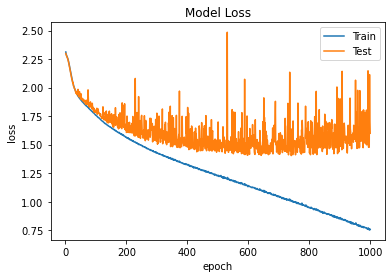

In [10]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_loss.pdf'
)

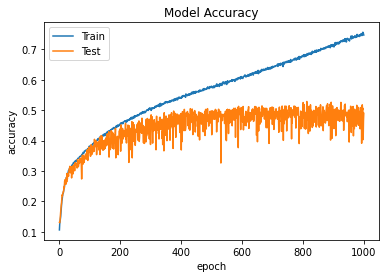

In [11]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_accuracy.pdf'
)

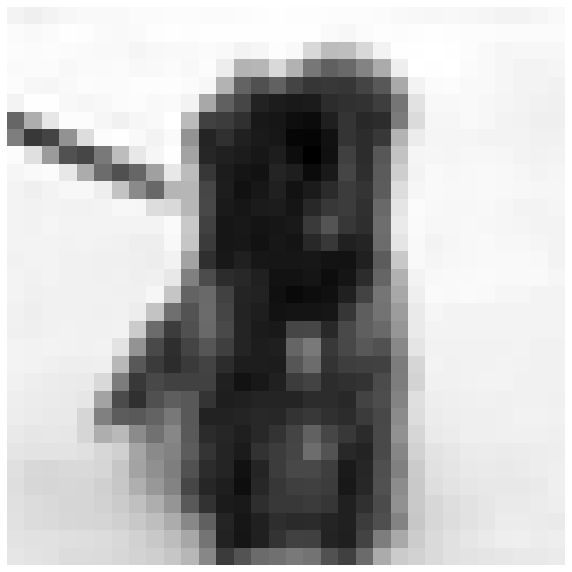

In [13]:
# test image 1
x1 = x_test[0,0:1024]
x1 = x1.reshape(32,32)

x2 = x_test[0,1024:2048]
x2 = x2.reshape(32,32)

x3 = x_test[0,2048:3072]
x3 = x3.reshape(32,32)

x = np.add(x1, x2)
x = np.add(x, x3)

plt.figure(figsize=(10, 15))
plt.gray()
plt.axis('off')
plt.imshow(x)
plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_test1.pdf'
)

(1, 24, 24, 50)


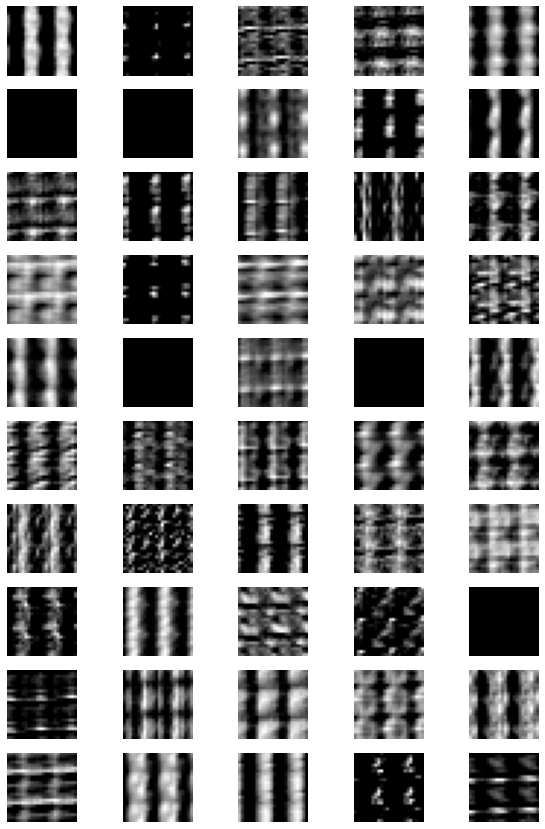

In [14]:
ax = []
# Show feature map at conv1
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)

conv1 = np.array(conv1)
print(conv1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = conv1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 12, 12, 50)


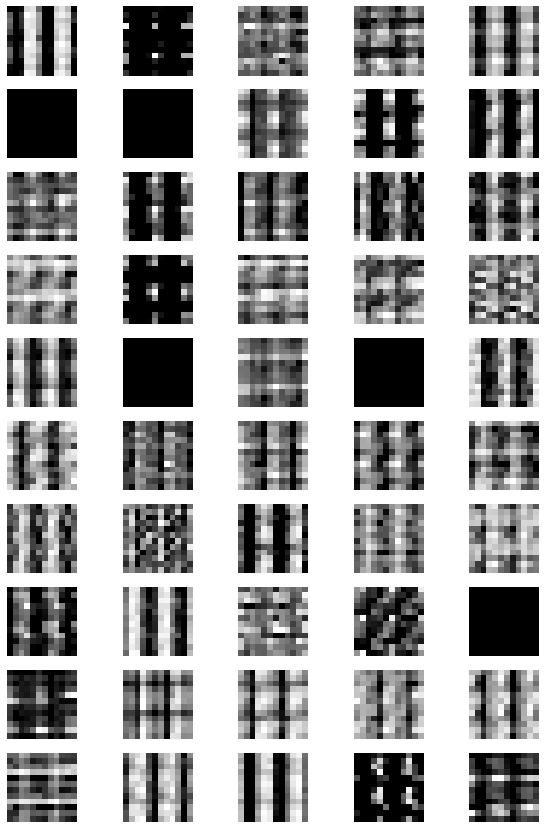

In [15]:
# Show feature map at pooling layer 1
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)

pool1 = np.array(pool1)
print(pool1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = pool1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 8, 8, 60)


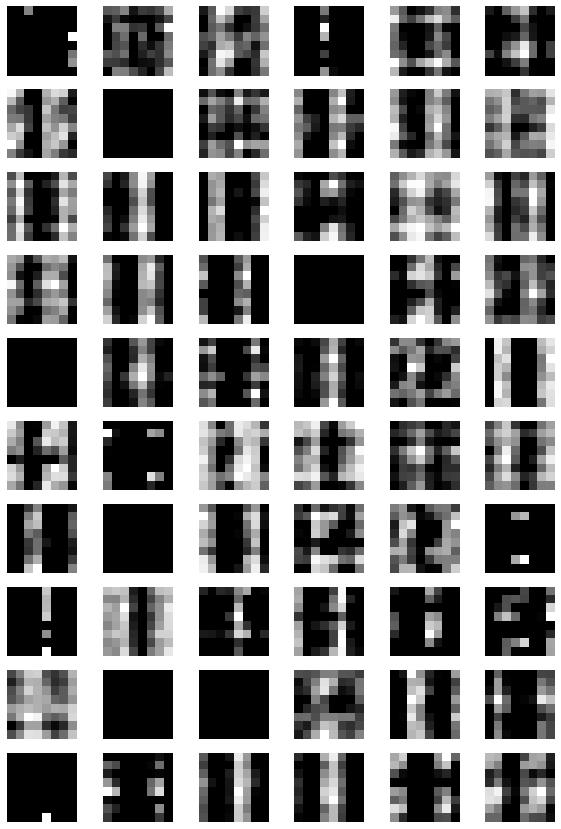

In [16]:
# Show feature map at conv layer 2
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)

conv2 = np.array(conv2)
print(conv2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = conv2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 4, 4, 60)


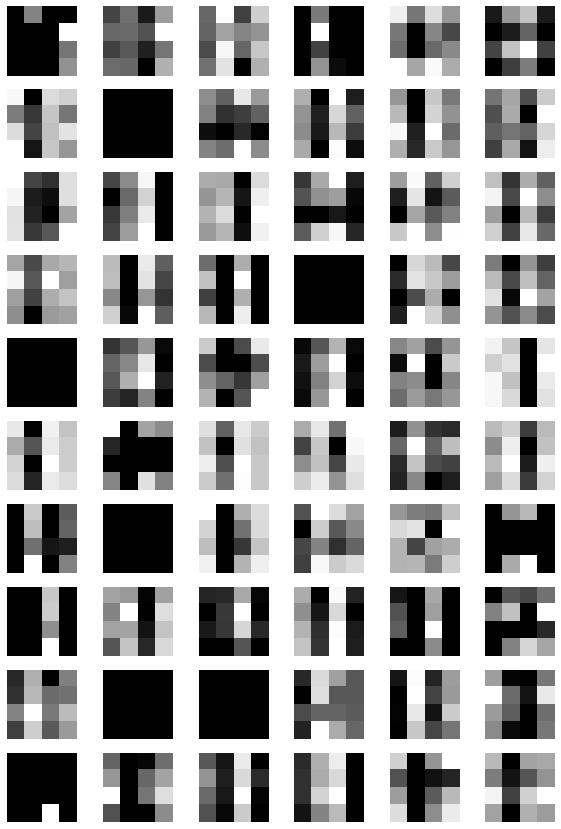

In [17]:
# Show feature map at pooling layer 2
x = x_test[0,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)
pool2 = model.layers[4]
pool2 = pool2(conv2)

pool2 = np.array(pool2)
print(pool2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = pool2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

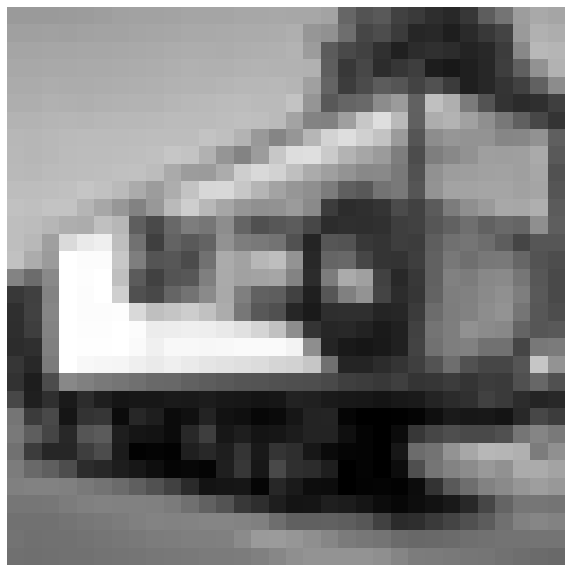

In [18]:
# test image 1
x1 = x_test[1,0:1024]
x1 = x1.reshape(32,32)

x2 = x_test[1,1024:2048]
x2 = x2.reshape(32,32)

x3 = x_test[1,2048:3072]
x3 = x3.reshape(32,32)

x = np.add(x1, x2)
x = np.add(x, x3)

plt.figure(figsize=(10, 15))
plt.gray()
plt.axis('off'); 
plt.imshow(x)
plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_1a_test2.pdf'
)

(1, 24, 24, 50)


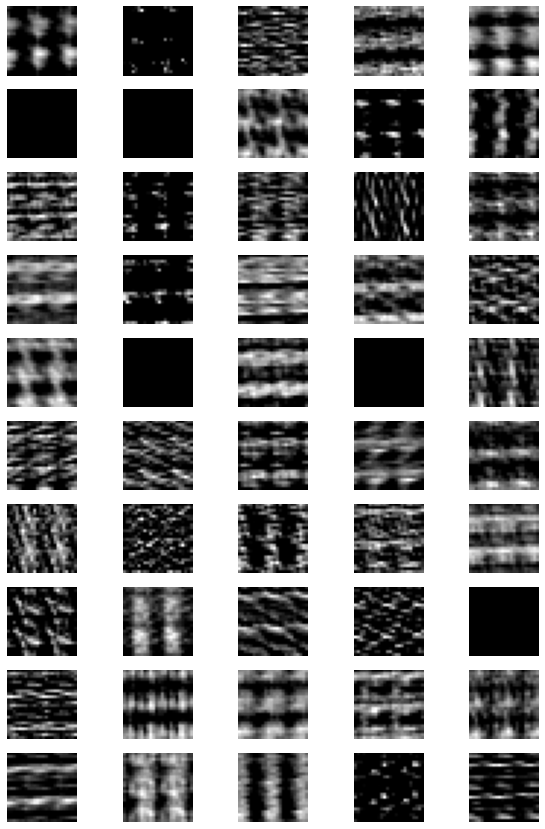

In [19]:
# Show feature map at conv1
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)

conv1 = np.array(conv1)
print(conv1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = conv1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 12, 12, 50)


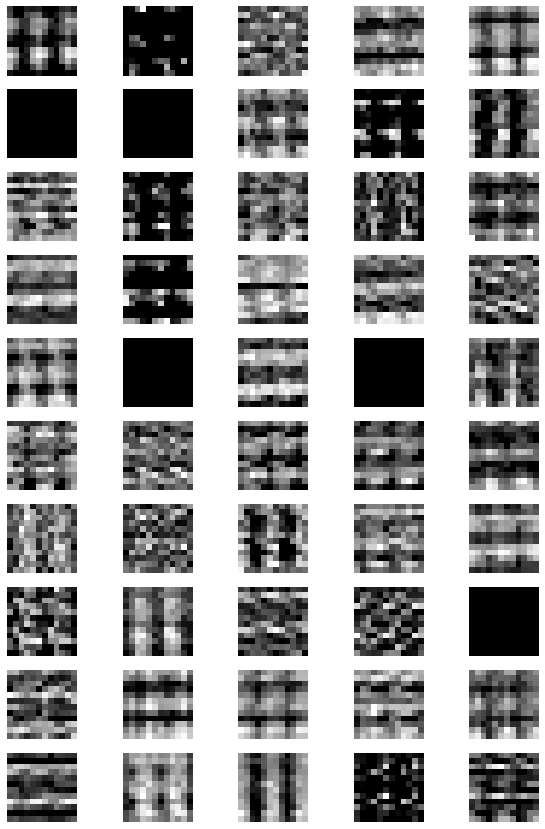

In [20]:
# Show feature map at pooling layer 1
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)

pool1 = np.array(pool1)
print(pool1.shape)
fig = plt.figure(figsize=(10, 15))
columns = 5
rows = 10
for i in range(columns*rows):
    img = pool1[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 8, 8, 60)


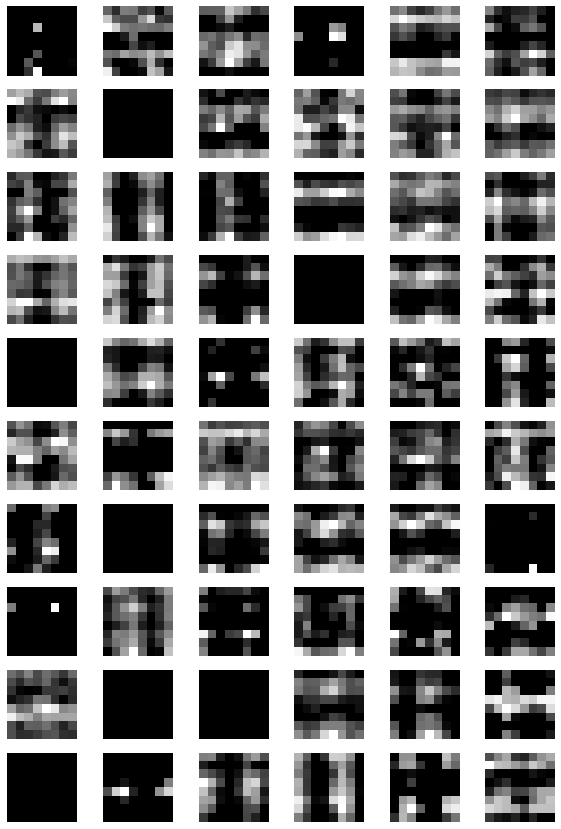

In [21]:
# Show feature map at conv layer 2
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)

conv2 = np.array(conv2)
print(conv2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = conv2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

(1, 4, 4, 60)


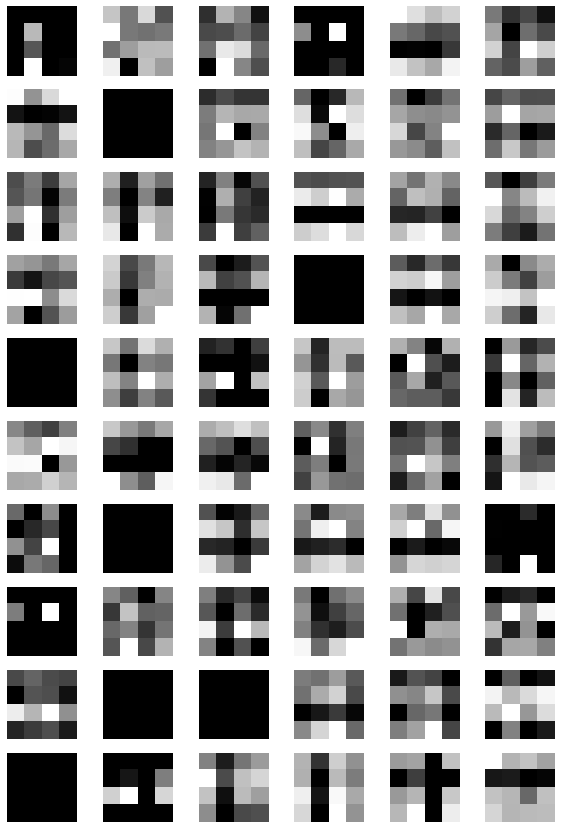

In [22]:
# Show feature map at pooling layer 2
x = x_test[1,:].reshape(1,32,32,3)
conv1 = model.layers[1]
conv1 = conv1(x)
pool1 = model.layers[2]
pool1 = pool1(conv1)
conv2 = model.layers[3]
conv2 = conv2(pool1)
pool2 = model.layers[4]
pool2 = pool2(conv2)

pool2 = np.array(pool2)
print(pool2.shape)
fig = plt.figure(figsize=(10, 15))
columns = 6
rows = 10
for i in range(columns*rows):
    img = pool2[0,:,:,i]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.axis('off'),plt.imshow(img)
    
plt.gray()
plt.show()

## Part A: Object Recognition Question 2

In [23]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

# define the grid search parameters
c1 = [10, 30, 50, 70, 90]
c2 = [20, 40, 60, 80, 100]

In [24]:
last_10_acc = []
histories = {}

for num_ch_c1 in c1:
    for num_ch_c2 in c2:
        print("*************************************************************************************")
        print("conv layer 1 channels: " + str(num_ch_c1) + " conv layer 2 channels: " + str(num_ch_c2))
        print("*************************************************************************************")
        
        #build model
        model = tf.keras.Sequential()
        model.add(layers.Input(shape=(3072, )))
        model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
        model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
        model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
        model.add(layers.Flatten())
        model.add(layers.Dense(300, activation = None))
        model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
        print(model.summary())
        
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
        histories['c1-{}-c2-{}'.format(num_ch_c1,num_ch_c2)] = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test))
        
        mean_acc = np.mean(histories['c1-{}-c2-{}'.format(num_ch_c1,num_ch_c2)].history['val_accuracy'][-10:])
        print("c1: " + str(num_ch_c1) + " c2: " + str(num_ch_c2) + " last 10 epochs mean acc: " + str(mean_acc*100) +"%")
        last_10_acc.append(mean_acc)

*************************************************************************************
conv layer 1 channels: 10 conv layer 2 channels: 20
*************************************************************************************
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        2440      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
____________________________

Epoch 47/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9232 - accuracy: 0.3094 - val_loss: 1.9388 - val_accuracy: 0.3025
Epoch 48/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9200 - accuracy: 0.3094 - val_loss: 1.9236 - val_accuracy: 0.3060
Epoch 49/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9173 - accuracy: 0.3101 - val_loss: 1.9175 - val_accuracy: 0.3105
Epoch 50/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9136 - accuracy: 0.3092 - val_loss: 1.9189 - val_accuracy: 0.2965
Epoch 51/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9111 - accuracy: 0.3118 - val_loss: 1.9472 - val_accuracy: 0.2925
Epoch 52/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9087 - accuracy: 0.3112 - val_loss: 1.9180 - val_accuracy: 0.3100
Epoch 53/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.9060 - accuracy: 0.3147 - val_loss: 1.9105 - val_accuracy: 0.3070

Epoch 161/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7141 - accuracy: 0.3930 - val_loss: 1.7572 - val_accuracy: 0.3835
Epoch 162/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7074 - accuracy: 0.3951 - val_loss: 1.7914 - val_accuracy: 0.3780
Epoch 163/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7071 - accuracy: 0.3972 - val_loss: 1.7438 - val_accuracy: 0.3935
Epoch 164/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7074 - accuracy: 0.3968 - val_loss: 1.8313 - val_accuracy: 0.3515
Epoch 165/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7044 - accuracy: 0.3959 - val_loss: 1.7342 - val_accuracy: 0.3805
Epoch 166/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7014 - accuracy: 0.3975 - val_loss: 1.7381 - val_accuracy: 0.3860
Epoch 167/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7019 - accuracy: 0.4011 - val_loss: 1.7247 - val_accuracy:

Epoch 218/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6392 - accuracy: 0.4251 - val_loss: 1.6820 - val_accuracy: 0.4080
Epoch 219/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6336 - accuracy: 0.4224 - val_loss: 1.7226 - val_accuracy: 0.3855
Epoch 220/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6369 - accuracy: 0.4196 - val_loss: 1.7001 - val_accuracy: 0.3995
Epoch 221/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6327 - accuracy: 0.4232 - val_loss: 1.8074 - val_accuracy: 0.3660
Epoch 222/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6362 - accuracy: 0.4228 - val_loss: 1.6844 - val_accuracy: 0.3965
Epoch 223/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6347 - accuracy: 0.4249 - val_loss: 1.7137 - val_accuracy: 0.3770
Epoch 224/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6312 - accuracy: 0.4240 - val_loss: 1.6740 - val_accuracy:

Epoch 275/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5771 - accuracy: 0.4450 - val_loss: 1.7069 - val_accuracy: 0.4145
Epoch 276/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5770 - accuracy: 0.4421 - val_loss: 1.7110 - val_accuracy: 0.3895
Epoch 277/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5744 - accuracy: 0.4439 - val_loss: 1.8675 - val_accuracy: 0.3445
Epoch 278/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5787 - accuracy: 0.4453 - val_loss: 1.6554 - val_accuracy: 0.4145
Epoch 279/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5743 - accuracy: 0.4474 - val_loss: 1.6743 - val_accuracy: 0.4165
Epoch 280/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5723 - accuracy: 0.4466 - val_loss: 1.8178 - val_accuracy: 0.3570
Epoch 281/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5716 - accuracy: 0.4457 - val_loss: 1.7355 - val_accuracy:

Epoch 332/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5275 - accuracy: 0.4596 - val_loss: 1.5974 - val_accuracy: 0.4470
Epoch 333/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5261 - accuracy: 0.4619 - val_loss: 1.6873 - val_accuracy: 0.4210
Epoch 334/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5269 - accuracy: 0.4595 - val_loss: 1.6843 - val_accuracy: 0.4160
Epoch 335/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5281 - accuracy: 0.4608 - val_loss: 1.6748 - val_accuracy: 0.3965
Epoch 336/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5223 - accuracy: 0.4641 - val_loss: 1.6734 - val_accuracy: 0.4055
Epoch 337/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5285 - accuracy: 0.4635 - val_loss: 1.5957 - val_accuracy: 0.4405
Epoch 338/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5201 - accuracy: 0.4626 - val_loss: 1.6849 - val_accuracy:

Epoch 389/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4805 - accuracy: 0.4779 - val_loss: 1.5897 - val_accuracy: 0.4450
Epoch 390/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4808 - accuracy: 0.4771 - val_loss: 1.6742 - val_accuracy: 0.4130
Epoch 391/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4801 - accuracy: 0.4756 - val_loss: 1.6234 - val_accuracy: 0.4320
Epoch 392/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4782 - accuracy: 0.4782 - val_loss: 1.7469 - val_accuracy: 0.3970
Epoch 393/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4799 - accuracy: 0.4792 - val_loss: 1.5960 - val_accuracy: 0.4585
Epoch 394/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4814 - accuracy: 0.4794 - val_loss: 1.6027 - val_accuracy: 0.4385
Epoch 395/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4773 - accuracy: 0.4769 - val_loss: 1.5777 - val_accuracy:

Epoch 446/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4368 - accuracy: 0.4943 - val_loss: 1.5836 - val_accuracy: 0.4635
Epoch 447/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4387 - accuracy: 0.4990 - val_loss: 1.7583 - val_accuracy: 0.3980
Epoch 448/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4417 - accuracy: 0.4913 - val_loss: 1.5862 - val_accuracy: 0.4505
Epoch 449/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4390 - accuracy: 0.4950 - val_loss: 1.6598 - val_accuracy: 0.4315
Epoch 450/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4386 - accuracy: 0.4929 - val_loss: 1.6171 - val_accuracy: 0.4330
Epoch 451/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4392 - accuracy: 0.4907 - val_loss: 1.6031 - val_accuracy: 0.4475
Epoch 452/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4348 - accuracy: 0.4929 - val_loss: 1.5689 - val_accuracy:

Epoch 559/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3715 - accuracy: 0.5193 - val_loss: 1.5431 - val_accuracy: 0.4830
Epoch 560/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3760 - accuracy: 0.5124 - val_loss: 1.6759 - val_accuracy: 0.4130
Epoch 561/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3680 - accuracy: 0.5217 - val_loss: 1.5541 - val_accuracy: 0.4455
Epoch 562/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3685 - accuracy: 0.5208 - val_loss: 1.5714 - val_accuracy: 0.4565
Epoch 563/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3681 - accuracy: 0.5203 - val_loss: 1.5941 - val_accuracy: 0.4420
Epoch 564/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3679 - accuracy: 0.5195 - val_loss: 1.5721 - val_accuracy: 0.4460
Epoch 565/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3711 - accuracy: 0.5174 - val_loss: 1.6017 - val_accuracy:

Epoch 616/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3406 - accuracy: 0.5277 - val_loss: 1.5840 - val_accuracy: 0.4510
Epoch 617/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3425 - accuracy: 0.5223 - val_loss: 1.7097 - val_accuracy: 0.4100
Epoch 618/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3415 - accuracy: 0.5279 - val_loss: 1.6436 - val_accuracy: 0.4350
Epoch 619/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3403 - accuracy: 0.5290 - val_loss: 1.5423 - val_accuracy: 0.4700
Epoch 620/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3394 - accuracy: 0.5313 - val_loss: 1.5312 - val_accuracy: 0.4580
Epoch 621/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3364 - accuracy: 0.5319 - val_loss: 1.5305 - val_accuracy: 0.4675
Epoch 622/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3330 - accuracy: 0.5276 - val_loss: 1.5333 - val_accuracy:

Epoch 673/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3109 - accuracy: 0.5430 - val_loss: 1.5138 - val_accuracy: 0.4860
Epoch 674/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3130 - accuracy: 0.5374 - val_loss: 1.5893 - val_accuracy: 0.4375
Epoch 675/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3079 - accuracy: 0.5388 - val_loss: 1.5605 - val_accuracy: 0.4675
Epoch 676/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3090 - accuracy: 0.5373 - val_loss: 1.5085 - val_accuracy: 0.4770
Epoch 677/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3071 - accuracy: 0.5437 - val_loss: 1.5328 - val_accuracy: 0.4710
Epoch 678/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3071 - accuracy: 0.5408 - val_loss: 1.5524 - val_accuracy: 0.4555
Epoch 679/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3054 - accuracy: 0.5444 - val_loss: 1.6089 - val_accuracy:

Epoch 730/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2833 - accuracy: 0.5482 - val_loss: 1.8404 - val_accuracy: 0.4100
Epoch 731/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2871 - accuracy: 0.5532 - val_loss: 1.5193 - val_accuracy: 0.4755
Epoch 732/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2795 - accuracy: 0.5534 - val_loss: 1.5295 - val_accuracy: 0.4715
Epoch 733/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2795 - accuracy: 0.5526 - val_loss: 1.6273 - val_accuracy: 0.4505
Epoch 734/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2829 - accuracy: 0.5510 - val_loss: 1.5911 - val_accuracy: 0.4565
Epoch 735/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2839 - accuracy: 0.5478 - val_loss: 1.5334 - val_accuracy: 0.4675
Epoch 736/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2765 - accuracy: 0.5573 - val_loss: 1.7525 - val_accuracy:

Epoch 787/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2565 - accuracy: 0.5589 - val_loss: 1.5270 - val_accuracy: 0.4665
Epoch 788/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2523 - accuracy: 0.5628 - val_loss: 1.6213 - val_accuracy: 0.4515
Epoch 789/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2569 - accuracy: 0.5607 - val_loss: 1.6184 - val_accuracy: 0.4470
Epoch 790/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2569 - accuracy: 0.5637 - val_loss: 1.6001 - val_accuracy: 0.4620
Epoch 791/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2529 - accuracy: 0.5603 - val_loss: 1.7371 - val_accuracy: 0.4210
Epoch 792/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2561 - accuracy: 0.5623 - val_loss: 1.5295 - val_accuracy: 0.4680
Epoch 793/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2536 - accuracy: 0.5635 - val_loss: 1.5332 - val_accuracy:

Epoch 844/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2266 - accuracy: 0.5725 - val_loss: 1.5431 - val_accuracy: 0.4605
Epoch 845/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2277 - accuracy: 0.5719 - val_loss: 1.5430 - val_accuracy: 0.4740
Epoch 846/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2285 - accuracy: 0.5722 - val_loss: 1.6003 - val_accuracy: 0.4365
Epoch 847/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2286 - accuracy: 0.5727 - val_loss: 1.6212 - val_accuracy: 0.4505
Epoch 848/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2257 - accuracy: 0.5701 - val_loss: 1.5360 - val_accuracy: 0.4760
Epoch 849/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2300 - accuracy: 0.5683 - val_loss: 1.5227 - val_accuracy: 0.4750
Epoch 850/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2270 - accuracy: 0.5676 - val_loss: 1.6477 - val_accuracy:

Epoch 901/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2028 - accuracy: 0.5808 - val_loss: 1.7021 - val_accuracy: 0.4250
Epoch 902/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2087 - accuracy: 0.5745 - val_loss: 2.0963 - val_accuracy: 0.3780
Epoch 903/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2146 - accuracy: 0.5747 - val_loss: 1.5610 - val_accuracy: 0.4710
Epoch 904/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1989 - accuracy: 0.5777 - val_loss: 1.5365 - val_accuracy: 0.4740
Epoch 905/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.5807 - val_loss: 1.5670 - val_accuracy: 0.4860
Epoch 906/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2040 - accuracy: 0.5790 - val_loss: 1.5558 - val_accuracy: 0.4750
Epoch 907/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2057 - accuracy: 0.5805 - val_loss: 1.5036 - val_accuracy:

Epoch 958/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1795 - accuracy: 0.5878 - val_loss: 1.5949 - val_accuracy: 0.4630
Epoch 959/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1864 - accuracy: 0.5862 - val_loss: 1.9930 - val_accuracy: 0.3730
Epoch 960/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1878 - accuracy: 0.5851 - val_loss: 1.5075 - val_accuracy: 0.4830
Epoch 961/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1781 - accuracy: 0.5884 - val_loss: 1.6006 - val_accuracy: 0.4450
Epoch 962/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1793 - accuracy: 0.5891 - val_loss: 1.6508 - val_accuracy: 0.4430
Epoch 963/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1784 - accuracy: 0.5880 - val_loss: 1.5065 - val_accuracy: 0.4945
Epoch 964/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1734 - accuracy: 0.5888 - val_loss: 1.6877 - val_accuracy:

79/79 [==============================] - 0s 3ms/step - loss: 1.8886 - accuracy: 0.3191 - val_loss: 1.8835 - val_accuracy: 0.3135
Epoch 61/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8850 - accuracy: 0.3198 - val_loss: 1.8865 - val_accuracy: 0.3175
Epoch 62/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8826 - accuracy: 0.3227 - val_loss: 1.9025 - val_accuracy: 0.3055
Epoch 63/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8795 - accuracy: 0.3251 - val_loss: 1.9007 - val_accuracy: 0.3140
Epoch 64/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8767 - accuracy: 0.3245 - val_loss: 1.9120 - val_accuracy: 0.3065
Epoch 65/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8747 - accuracy: 0.3255 - val_loss: 1.8765 - val_accuracy: 0.3195
Epoch 66/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8707 - accuracy: 0.3264 - val_loss: 1.8684 - val_accuracy: 0.3315
Epoch 67/1000

Epoch 174/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6539 - accuracy: 0.4126 - val_loss: 1.6749 - val_accuracy: 0.4045
Epoch 175/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6520 - accuracy: 0.4106 - val_loss: 1.7170 - val_accuracy: 0.3870
Epoch 176/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6517 - accuracy: 0.4114 - val_loss: 1.6778 - val_accuracy: 0.4120
Epoch 177/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6468 - accuracy: 0.4142 - val_loss: 1.7055 - val_accuracy: 0.3800
Epoch 178/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6471 - accuracy: 0.4168 - val_loss: 1.6943 - val_accuracy: 0.3845
Epoch 179/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6465 - accuracy: 0.4141 - val_loss: 1.7772 - val_accuracy: 0.3700
Epoch 180/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6426 - accuracy: 0.4179 - val_loss: 1.6977 - val_accuracy:

Epoch 231/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5653 - accuracy: 0.4430 - val_loss: 1.6694 - val_accuracy: 0.4270
Epoch 232/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5641 - accuracy: 0.4464 - val_loss: 1.6381 - val_accuracy: 0.4090
Epoch 233/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5612 - accuracy: 0.4483 - val_loss: 1.7804 - val_accuracy: 0.3775
Epoch 234/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5627 - accuracy: 0.4504 - val_loss: 1.6770 - val_accuracy: 0.4365
Epoch 235/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5616 - accuracy: 0.4456 - val_loss: 1.7050 - val_accuracy: 0.3975
Epoch 236/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5619 - accuracy: 0.4505 - val_loss: 1.6141 - val_accuracy: 0.4135
Epoch 237/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5560 - accuracy: 0.4516 - val_loss: 1.6705 - val_accuracy:

Epoch 288/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4995 - accuracy: 0.4777 - val_loss: 1.6171 - val_accuracy: 0.4360
Epoch 289/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4946 - accuracy: 0.4773 - val_loss: 1.5751 - val_accuracy: 0.4365
Epoch 290/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4954 - accuracy: 0.4757 - val_loss: 1.5664 - val_accuracy: 0.4695
Epoch 291/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4933 - accuracy: 0.4719 - val_loss: 1.7641 - val_accuracy: 0.3925
Epoch 292/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4921 - accuracy: 0.4745 - val_loss: 1.5858 - val_accuracy: 0.4400
Epoch 293/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4918 - accuracy: 0.4803 - val_loss: 1.5735 - val_accuracy: 0.4540
Epoch 294/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4895 - accuracy: 0.4741 - val_loss: 1.5958 - val_accuracy:

Epoch 345/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4440 - accuracy: 0.4932 - val_loss: 1.5222 - val_accuracy: 0.4780
Epoch 346/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4372 - accuracy: 0.4950 - val_loss: 1.5688 - val_accuracy: 0.4550
Epoch 347/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4345 - accuracy: 0.4979 - val_loss: 1.5460 - val_accuracy: 0.4575
Epoch 348/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4325 - accuracy: 0.4991 - val_loss: 1.6029 - val_accuracy: 0.4310
Epoch 349/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4342 - accuracy: 0.4974 - val_loss: 1.6672 - val_accuracy: 0.4220
Epoch 350/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4346 - accuracy: 0.4957 - val_loss: 1.6849 - val_accuracy: 0.4455
Epoch 351/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4369 - accuracy: 0.4998 - val_loss: 1.5125 - val_accuracy:

Epoch 402/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3871 - accuracy: 0.5125 - val_loss: 1.5514 - val_accuracy: 0.4545
Epoch 403/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3905 - accuracy: 0.5141 - val_loss: 1.5383 - val_accuracy: 0.4735
Epoch 404/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3899 - accuracy: 0.5153 - val_loss: 1.8258 - val_accuracy: 0.3850
Epoch 405/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3850 - accuracy: 0.5160 - val_loss: 1.5000 - val_accuracy: 0.4860
Epoch 406/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3837 - accuracy: 0.5153 - val_loss: 1.6007 - val_accuracy: 0.4450
Epoch 407/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3853 - accuracy: 0.5160 - val_loss: 1.5576 - val_accuracy: 0.4570
Epoch 408/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3829 - accuracy: 0.5158 - val_loss: 1.5278 - val_accuracy:

Epoch 459/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3420 - accuracy: 0.5322 - val_loss: 1.5191 - val_accuracy: 0.4725
Epoch 460/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3394 - accuracy: 0.5356 - val_loss: 1.5556 - val_accuracy: 0.4550
Epoch 461/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3469 - accuracy: 0.5315 - val_loss: 1.7307 - val_accuracy: 0.3990
Epoch 462/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3420 - accuracy: 0.5354 - val_loss: 1.5452 - val_accuracy: 0.4785
Epoch 463/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3378 - accuracy: 0.5339 - val_loss: 1.4892 - val_accuracy: 0.4905
Epoch 464/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3374 - accuracy: 0.5371 - val_loss: 1.5329 - val_accuracy: 0.4690
Epoch 465/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3387 - accuracy: 0.5358 - val_loss: 1.5486 - val_accuracy:

Epoch 516/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2998 - accuracy: 0.5450 - val_loss: 1.5266 - val_accuracy: 0.4690
Epoch 517/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2983 - accuracy: 0.5438 - val_loss: 1.6444 - val_accuracy: 0.4295
Epoch 518/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3047 - accuracy: 0.5456 - val_loss: 1.5135 - val_accuracy: 0.4800
Epoch 519/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2949 - accuracy: 0.5504 - val_loss: 1.4869 - val_accuracy: 0.4895
Epoch 520/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3006 - accuracy: 0.5475 - val_loss: 1.5272 - val_accuracy: 0.4685
Epoch 521/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2970 - accuracy: 0.5424 - val_loss: 1.5686 - val_accuracy: 0.4475
Epoch 522/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3015 - accuracy: 0.5462 - val_loss: 1.5008 - val_accuracy:

Epoch 573/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2642 - accuracy: 0.5591 - val_loss: 1.4839 - val_accuracy: 0.4915
Epoch 574/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2637 - accuracy: 0.5618 - val_loss: 1.4850 - val_accuracy: 0.4965
Epoch 575/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2635 - accuracy: 0.5602 - val_loss: 1.4789 - val_accuracy: 0.4980
Epoch 576/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.5603 - val_loss: 1.6684 - val_accuracy: 0.4475
Epoch 577/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2664 - accuracy: 0.5600 - val_loss: 1.4692 - val_accuracy: 0.5040
Epoch 578/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2595 - accuracy: 0.5619 - val_loss: 1.4679 - val_accuracy: 0.4965
Epoch 579/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2606 - accuracy: 0.5599 - val_loss: 1.6896 - val_accuracy:

Epoch 630/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2291 - accuracy: 0.5717 - val_loss: 1.4835 - val_accuracy: 0.4970
Epoch 631/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2277 - accuracy: 0.5739 - val_loss: 1.4729 - val_accuracy: 0.4955
Epoch 632/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2225 - accuracy: 0.5735 - val_loss: 1.5383 - val_accuracy: 0.4660
Epoch 633/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2229 - accuracy: 0.5734 - val_loss: 1.4813 - val_accuracy: 0.4985
Epoch 634/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2236 - accuracy: 0.5748 - val_loss: 1.5904 - val_accuracy: 0.4560
Epoch 635/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2234 - accuracy: 0.5708 - val_loss: 1.4524 - val_accuracy: 0.5065
Epoch 636/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2220 - accuracy: 0.5735 - val_loss: 1.4844 - val_accuracy:

Epoch 687/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1906 - accuracy: 0.5828 - val_loss: 1.5206 - val_accuracy: 0.4725
Epoch 688/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1944 - accuracy: 0.5810 - val_loss: 1.6663 - val_accuracy: 0.4285
Epoch 689/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1897 - accuracy: 0.5842 - val_loss: 1.6510 - val_accuracy: 0.4350
Epoch 690/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1916 - accuracy: 0.5837 - val_loss: 1.5579 - val_accuracy: 0.4705
Epoch 691/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.5841 - val_loss: 1.4809 - val_accuracy: 0.4945
Epoch 692/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1874 - accuracy: 0.5873 - val_loss: 1.4945 - val_accuracy: 0.5000
Epoch 693/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1879 - accuracy: 0.5854 - val_loss: 1.5045 - val_accuracy:

Epoch 744/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1622 - accuracy: 0.5905 - val_loss: 1.5430 - val_accuracy: 0.4665
Epoch 745/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1552 - accuracy: 0.5998 - val_loss: 1.4637 - val_accuracy: 0.4985
Epoch 746/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1557 - accuracy: 0.5993 - val_loss: 1.4720 - val_accuracy: 0.4950
Epoch 747/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1594 - accuracy: 0.5984 - val_loss: 1.7712 - val_accuracy: 0.4005
Epoch 748/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1598 - accuracy: 0.5967 - val_loss: 1.4591 - val_accuracy: 0.4985
Epoch 749/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1526 - accuracy: 0.5977 - val_loss: 1.4723 - val_accuracy: 0.5065
Epoch 750/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1545 - accuracy: 0.5951 - val_loss: 1.5157 - val_accuracy:

Epoch 857/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.6176 - val_loss: 1.5566 - val_accuracy: 0.4720
Epoch 858/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.6212 - val_loss: 1.4711 - val_accuracy: 0.4995
Epoch 859/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0916 - accuracy: 0.6180 - val_loss: 1.5064 - val_accuracy: 0.4875
Epoch 860/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.6159 - val_loss: 1.5760 - val_accuracy: 0.4775
Epoch 861/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.6162 - val_loss: 1.4911 - val_accuracy: 0.4955
Epoch 862/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.6152 - val_loss: 1.5475 - val_accuracy: 0.4665
Epoch 863/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.6170 - val_loss: 1.5510 - val_accuracy:

Epoch 914/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.6266 - val_loss: 1.5725 - val_accuracy: 0.4850
Epoch 915/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0669 - accuracy: 0.6277 - val_loss: 1.6096 - val_accuracy: 0.4720
Epoch 916/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0639 - accuracy: 0.6268 - val_loss: 1.6061 - val_accuracy: 0.4635
Epoch 917/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.6258 - val_loss: 1.5330 - val_accuracy: 0.4880
Epoch 918/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.6310 - val_loss: 1.5554 - val_accuracy: 0.4790
Epoch 919/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0625 - accuracy: 0.6262 - val_loss: 1.4731 - val_accuracy: 0.5080
Epoch 920/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0598 - accuracy: 0.6263 - val_loss: 1.5381 - val_accuracy:

Epoch 971/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0340 - accuracy: 0.6376 - val_loss: 1.5346 - val_accuracy: 0.4920
Epoch 972/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0337 - accuracy: 0.6356 - val_loss: 1.5166 - val_accuracy: 0.4835
Epoch 973/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0333 - accuracy: 0.6361 - val_loss: 1.5028 - val_accuracy: 0.4950
Epoch 974/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0351 - accuracy: 0.6343 - val_loss: 1.6678 - val_accuracy: 0.4540
Epoch 975/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0315 - accuracy: 0.6351 - val_loss: 1.6047 - val_accuracy: 0.4690
Epoch 976/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0283 - accuracy: 0.6422 - val_loss: 1.5473 - val_accuracy: 0.4790
Epoch 977/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0268 - accuracy: 0.6402 - val_loss: 1.5309 - val_accuracy:

79/79 [==============================] - 0s 3ms/step - loss: 1.8588 - accuracy: 0.3374 - val_loss: 1.9662 - val_accuracy: 0.2750
Epoch 74/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8577 - accuracy: 0.3402 - val_loss: 2.0373 - val_accuracy: 0.2685
Epoch 75/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8579 - accuracy: 0.3407 - val_loss: 1.9147 - val_accuracy: 0.3150
Epoch 76/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8540 - accuracy: 0.3451 - val_loss: 1.8692 - val_accuracy: 0.3355
Epoch 77/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8503 - accuracy: 0.3418 - val_loss: 1.8788 - val_accuracy: 0.3325
Epoch 78/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8488 - accuracy: 0.3446 - val_loss: 1.9024 - val_accuracy: 0.2945
Epoch 79/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8454 - accuracy: 0.3463 - val_loss: 1.8820 - val_accuracy: 0.3260
Epoch 80/1000

Epoch 187/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6649 - accuracy: 0.4169 - val_loss: 1.7120 - val_accuracy: 0.3970
Epoch 188/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6604 - accuracy: 0.4166 - val_loss: 1.7877 - val_accuracy: 0.3640
Epoch 189/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6610 - accuracy: 0.4155 - val_loss: 1.8256 - val_accuracy: 0.3620
Epoch 190/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6567 - accuracy: 0.4164 - val_loss: 1.7676 - val_accuracy: 0.3685
Epoch 191/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6588 - accuracy: 0.4128 - val_loss: 1.8576 - val_accuracy: 0.3460
Epoch 192/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6548 - accuracy: 0.4167 - val_loss: 1.7211 - val_accuracy: 0.3905
Epoch 193/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6534 - accuracy: 0.4206 - val_loss: 1.7668 - val_accuracy:

Epoch 244/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5917 - accuracy: 0.4400 - val_loss: 1.7171 - val_accuracy: 0.4100
Epoch 245/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5896 - accuracy: 0.4427 - val_loss: 1.7903 - val_accuracy: 0.3655
Epoch 246/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5911 - accuracy: 0.4405 - val_loss: 1.6357 - val_accuracy: 0.4320
Epoch 247/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5878 - accuracy: 0.4399 - val_loss: 1.6543 - val_accuracy: 0.4120
Epoch 248/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5856 - accuracy: 0.4418 - val_loss: 1.8021 - val_accuracy: 0.3585
Epoch 249/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5863 - accuracy: 0.4425 - val_loss: 1.7544 - val_accuracy: 0.3800
Epoch 250/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5855 - accuracy: 0.4421 - val_loss: 1.8343 - val_accuracy:

Epoch 301/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5268 - accuracy: 0.4643 - val_loss: 1.7093 - val_accuracy: 0.3995
Epoch 302/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5237 - accuracy: 0.4634 - val_loss: 1.5952 - val_accuracy: 0.4515
Epoch 303/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5223 - accuracy: 0.4661 - val_loss: 1.6090 - val_accuracy: 0.4230
Epoch 304/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5202 - accuracy: 0.4649 - val_loss: 1.6803 - val_accuracy: 0.4080
Epoch 305/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5192 - accuracy: 0.4645 - val_loss: 1.5961 - val_accuracy: 0.4395
Epoch 306/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5170 - accuracy: 0.4667 - val_loss: 1.6625 - val_accuracy: 0.4035
Epoch 307/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5153 - accuracy: 0.4655 - val_loss: 1.8546 - val_accuracy:

Epoch 358/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4626 - accuracy: 0.4825 - val_loss: 1.6389 - val_accuracy: 0.4265
Epoch 359/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4655 - accuracy: 0.4843 - val_loss: 1.6578 - val_accuracy: 0.4070
Epoch 360/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4626 - accuracy: 0.4890 - val_loss: 1.6372 - val_accuracy: 0.4290
Epoch 361/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4624 - accuracy: 0.4895 - val_loss: 1.6034 - val_accuracy: 0.4440
Epoch 362/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4620 - accuracy: 0.4851 - val_loss: 1.6005 - val_accuracy: 0.4325
Epoch 363/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4598 - accuracy: 0.4864 - val_loss: 1.5804 - val_accuracy: 0.4470
Epoch 364/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4541 - accuracy: 0.4856 - val_loss: 1.8549 - val_accuracy:

Epoch 415/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4096 - accuracy: 0.5022 - val_loss: 1.6577 - val_accuracy: 0.4210
Epoch 416/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4057 - accuracy: 0.5065 - val_loss: 1.5883 - val_accuracy: 0.4285
Epoch 417/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4012 - accuracy: 0.5102 - val_loss: 1.5886 - val_accuracy: 0.4485
Epoch 418/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4019 - accuracy: 0.5099 - val_loss: 1.5472 - val_accuracy: 0.4560
Epoch 419/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4000 - accuracy: 0.5120 - val_loss: 1.5500 - val_accuracy: 0.4555
Epoch 420/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4013 - accuracy: 0.5077 - val_loss: 1.5428 - val_accuracy: 0.4545
Epoch 421/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3941 - accuracy: 0.5128 - val_loss: 1.5316 - val_accuracy:

Epoch 472/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3544 - accuracy: 0.5286 - val_loss: 1.5235 - val_accuracy: 0.4625
Epoch 473/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3493 - accuracy: 0.5284 - val_loss: 1.5983 - val_accuracy: 0.4450
Epoch 474/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3501 - accuracy: 0.5266 - val_loss: 1.6258 - val_accuracy: 0.4540
Epoch 475/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3533 - accuracy: 0.5287 - val_loss: 1.6248 - val_accuracy: 0.4245
Epoch 476/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3499 - accuracy: 0.5298 - val_loss: 1.6864 - val_accuracy: 0.4130
Epoch 477/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3490 - accuracy: 0.5308 - val_loss: 1.5328 - val_accuracy: 0.4590
Epoch 478/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3494 - accuracy: 0.5263 - val_loss: 1.5013 - val_accuracy:

Epoch 529/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3064 - accuracy: 0.5428 - val_loss: 1.4864 - val_accuracy: 0.4910
Epoch 530/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3040 - accuracy: 0.5426 - val_loss: 1.5314 - val_accuracy: 0.4690
Epoch 531/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3007 - accuracy: 0.5446 - val_loss: 2.2951 - val_accuracy: 0.3375
Epoch 532/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3117 - accuracy: 0.5444 - val_loss: 1.4989 - val_accuracy: 0.4750
Epoch 533/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2988 - accuracy: 0.5458 - val_loss: 1.5622 - val_accuracy: 0.4465
Epoch 534/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3005 - accuracy: 0.5424 - val_loss: 1.5663 - val_accuracy: 0.4380
Epoch 535/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3013 - accuracy: 0.5433 - val_loss: 1.4903 - val_accuracy:

Epoch 642/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2205 - accuracy: 0.5715 - val_loss: 1.5055 - val_accuracy: 0.4780
Epoch 643/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2180 - accuracy: 0.5743 - val_loss: 1.4710 - val_accuracy: 0.4985
Epoch 644/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2135 - accuracy: 0.5790 - val_loss: 1.6061 - val_accuracy: 0.4525
Epoch 645/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2223 - accuracy: 0.5725 - val_loss: 1.5267 - val_accuracy: 0.4710
Epoch 646/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2146 - accuracy: 0.5807 - val_loss: 1.6048 - val_accuracy: 0.4530
Epoch 647/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2122 - accuracy: 0.5769 - val_loss: 1.4674 - val_accuracy: 0.4935
Epoch 648/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2116 - accuracy: 0.5759 - val_loss: 1.6342 - val_accuracy:

Epoch 699/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1759 - accuracy: 0.5892 - val_loss: 1.4694 - val_accuracy: 0.5020
Epoch 700/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1758 - accuracy: 0.5908 - val_loss: 1.5862 - val_accuracy: 0.4545
Epoch 701/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1750 - accuracy: 0.5927 - val_loss: 1.5140 - val_accuracy: 0.4855
Epoch 702/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1711 - accuracy: 0.5924 - val_loss: 1.4988 - val_accuracy: 0.4825
Epoch 703/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1759 - accuracy: 0.5929 - val_loss: 1.4610 - val_accuracy: 0.5020
Epoch 704/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1685 - accuracy: 0.5897 - val_loss: 1.5909 - val_accuracy: 0.4585
Epoch 705/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1745 - accuracy: 0.5882 - val_loss: 1.5035 - val_accuracy:

Epoch 812/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0983 - accuracy: 0.6159 - val_loss: 1.5164 - val_accuracy: 0.4780
Epoch 813/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.6215 - val_loss: 1.4448 - val_accuracy: 0.5005
Epoch 814/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0893 - accuracy: 0.6234 - val_loss: 1.5066 - val_accuracy: 0.4825
Epoch 815/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0878 - accuracy: 0.6253 - val_loss: 1.7482 - val_accuracy: 0.4340
Epoch 816/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.6159 - val_loss: 1.5191 - val_accuracy: 0.4940
Epoch 817/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0993 - accuracy: 0.6204 - val_loss: 1.5470 - val_accuracy: 0.4775
Epoch 818/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.6201 - val_loss: 1.6089 - val_accuracy:

Epoch 869/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0560 - accuracy: 0.6304 - val_loss: 1.5422 - val_accuracy: 0.4680
Epoch 870/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0537 - accuracy: 0.6372 - val_loss: 1.4856 - val_accuracy: 0.4920
Epoch 871/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0520 - accuracy: 0.6373 - val_loss: 1.6139 - val_accuracy: 0.4745
Epoch 872/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0593 - accuracy: 0.6336 - val_loss: 1.6034 - val_accuracy: 0.4650
Epoch 873/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0480 - accuracy: 0.6381 - val_loss: 1.6669 - val_accuracy: 0.4595
Epoch 874/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0530 - accuracy: 0.6371 - val_loss: 1.6578 - val_accuracy: 0.4545
Epoch 875/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0538 - accuracy: 0.6357 - val_loss: 1.5283 - val_accuracy:

Epoch 926/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0174 - accuracy: 0.6461 - val_loss: 1.5171 - val_accuracy: 0.4890
Epoch 927/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0110 - accuracy: 0.6523 - val_loss: 1.5599 - val_accuracy: 0.4580
Epoch 928/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.6540 - val_loss: 1.5806 - val_accuracy: 0.4590
Epoch 929/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0151 - accuracy: 0.6522 - val_loss: 1.5389 - val_accuracy: 0.4800
Epoch 930/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0111 - accuracy: 0.6505 - val_loss: 1.6275 - val_accuracy: 0.4530
Epoch 931/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0173 - accuracy: 0.6498 - val_loss: 1.5151 - val_accuracy: 0.5020
Epoch 932/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0109 - accuracy: 0.6538 - val_loss: 1.5328 - val_accuracy:

Epoch 983/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9771 - accuracy: 0.6661 - val_loss: 1.6553 - val_accuracy: 0.4745
Epoch 984/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9766 - accuracy: 0.6663 - val_loss: 1.6235 - val_accuracy: 0.4800
Epoch 985/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9776 - accuracy: 0.6661 - val_loss: 1.6385 - val_accuracy: 0.4590
Epoch 986/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9730 - accuracy: 0.6669 - val_loss: 1.6645 - val_accuracy: 0.4670
Epoch 987/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9802 - accuracy: 0.6642 - val_loss: 1.5386 - val_accuracy: 0.4850
Epoch 988/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9729 - accuracy: 0.6703 - val_loss: 1.7009 - val_accuracy: 0.4440
Epoch 989/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9759 - accuracy: 0.6639 - val_loss: 1.5103 - val_accuracy:

79/79 [==============================] - 0s 3ms/step - loss: 1.7797 - accuracy: 0.3714 - val_loss: 1.7989 - val_accuracy: 0.3670
Epoch 86/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7787 - accuracy: 0.3714 - val_loss: 1.8099 - val_accuracy: 0.3580
Epoch 87/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7743 - accuracy: 0.3732 - val_loss: 1.7820 - val_accuracy: 0.3800
Epoch 88/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7728 - accuracy: 0.3732 - val_loss: 1.8449 - val_accuracy: 0.3580
Epoch 89/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7706 - accuracy: 0.3730 - val_loss: 1.7989 - val_accuracy: 0.3705
Epoch 90/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7660 - accuracy: 0.3758 - val_loss: 1.8064 - val_accuracy: 0.3555
Epoch 91/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7633 - accuracy: 0.3727 - val_loss: 1.7808 - val_accuracy: 0.3815
Epoch 92/1000

79/79 [==============================] - 0s 3ms/step - loss: 1.6448 - accuracy: 0.4199 - val_loss: 1.7205 - val_accuracy: 0.3950
Epoch 143/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6418 - accuracy: 0.4222 - val_loss: 1.6748 - val_accuracy: 0.4095
Epoch 144/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6418 - accuracy: 0.4191 - val_loss: 1.7640 - val_accuracy: 0.3775
Epoch 145/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6397 - accuracy: 0.4208 - val_loss: 1.7011 - val_accuracy: 0.3945
Epoch 146/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6363 - accuracy: 0.4247 - val_loss: 1.6784 - val_accuracy: 0.4080
Epoch 147/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6365 - accuracy: 0.4236 - val_loss: 1.7210 - val_accuracy: 0.3980
Epoch 148/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6340 - accuracy: 0.4247 - val_loss: 1.6950 - val_accuracy: 0.4070
Epoch 1

Epoch 199/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5458 - accuracy: 0.4550 - val_loss: 1.7224 - val_accuracy: 0.3915
Epoch 200/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5458 - accuracy: 0.4586 - val_loss: 1.6023 - val_accuracy: 0.4530
Epoch 201/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5419 - accuracy: 0.4589 - val_loss: 1.5938 - val_accuracy: 0.4470
Epoch 202/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5431 - accuracy: 0.4631 - val_loss: 1.6944 - val_accuracy: 0.3945
Epoch 203/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5427 - accuracy: 0.4594 - val_loss: 1.5938 - val_accuracy: 0.4470
Epoch 204/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5367 - accuracy: 0.4603 - val_loss: 1.6781 - val_accuracy: 0.4170
Epoch 205/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5400 - accuracy: 0.4644 - val_loss: 1.6463 - val_accuracy:

Epoch 256/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4732 - accuracy: 0.4843 - val_loss: 1.6387 - val_accuracy: 0.4300
Epoch 257/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4721 - accuracy: 0.4848 - val_loss: 1.6260 - val_accuracy: 0.4335
Epoch 258/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4686 - accuracy: 0.4891 - val_loss: 1.5886 - val_accuracy: 0.4605
Epoch 259/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4676 - accuracy: 0.4898 - val_loss: 1.7598 - val_accuracy: 0.3920
Epoch 260/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4715 - accuracy: 0.4846 - val_loss: 1.5545 - val_accuracy: 0.4620
Epoch 261/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4664 - accuracy: 0.4893 - val_loss: 1.5810 - val_accuracy: 0.4350
Epoch 262/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4628 - accuracy: 0.4914 - val_loss: 1.5370 - val_accuracy:

Epoch 313/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4074 - accuracy: 0.5079 - val_loss: 1.5950 - val_accuracy: 0.4500
Epoch 314/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4074 - accuracy: 0.5118 - val_loss: 1.5723 - val_accuracy: 0.4480
Epoch 315/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4034 - accuracy: 0.5113 - val_loss: 1.6225 - val_accuracy: 0.4360
Epoch 316/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4043 - accuracy: 0.5110 - val_loss: 1.5972 - val_accuracy: 0.4380
Epoch 317/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4040 - accuracy: 0.5126 - val_loss: 1.5978 - val_accuracy: 0.4320
Epoch 318/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4028 - accuracy: 0.5101 - val_loss: 1.8753 - val_accuracy: 0.3625
Epoch 319/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4064 - accuracy: 0.5113 - val_loss: 1.5142 - val_accuracy:

Epoch 370/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3488 - accuracy: 0.5323 - val_loss: 1.5190 - val_accuracy: 0.4575
Epoch 371/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3481 - accuracy: 0.5302 - val_loss: 1.5551 - val_accuracy: 0.4595
Epoch 372/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3471 - accuracy: 0.5344 - val_loss: 1.6408 - val_accuracy: 0.4255
Epoch 373/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3531 - accuracy: 0.5306 - val_loss: 1.5407 - val_accuracy: 0.4760
Epoch 374/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3450 - accuracy: 0.5337 - val_loss: 2.1578 - val_accuracy: 0.3385
Epoch 375/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3555 - accuracy: 0.5283 - val_loss: 1.5177 - val_accuracy: 0.4750
Epoch 376/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3461 - accuracy: 0.5316 - val_loss: 1.5009 - val_accuracy:

Epoch 427/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2943 - accuracy: 0.5553 - val_loss: 1.6651 - val_accuracy: 0.4400
Epoch 428/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2933 - accuracy: 0.5505 - val_loss: 1.4843 - val_accuracy: 0.4825
Epoch 429/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2965 - accuracy: 0.5516 - val_loss: 1.6598 - val_accuracy: 0.4135
Epoch 430/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2952 - accuracy: 0.5492 - val_loss: 1.5400 - val_accuracy: 0.4475
Epoch 431/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2993 - accuracy: 0.5521 - val_loss: 1.4560 - val_accuracy: 0.4965
Epoch 432/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2897 - accuracy: 0.5556 - val_loss: 1.5235 - val_accuracy: 0.4630
Epoch 433/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2902 - accuracy: 0.5552 - val_loss: 1.6135 - val_accuracy:

Epoch 484/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2452 - accuracy: 0.5694 - val_loss: 1.5080 - val_accuracy: 0.4760
Epoch 485/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2434 - accuracy: 0.5712 - val_loss: 1.5501 - val_accuracy: 0.4525
Epoch 486/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2417 - accuracy: 0.5722 - val_loss: 1.4876 - val_accuracy: 0.4745
Epoch 487/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2445 - accuracy: 0.5711 - val_loss: 1.5353 - val_accuracy: 0.4830
Epoch 488/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2412 - accuracy: 0.5704 - val_loss: 1.5382 - val_accuracy: 0.4635
Epoch 489/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2378 - accuracy: 0.5719 - val_loss: 1.4688 - val_accuracy: 0.4890
Epoch 490/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2415 - accuracy: 0.5693 - val_loss: 1.4604 - val_accuracy:

Epoch 541/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1955 - accuracy: 0.5865 - val_loss: 1.4927 - val_accuracy: 0.4875
Epoch 542/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.5858 - val_loss: 1.4796 - val_accuracy: 0.4795
Epoch 543/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1910 - accuracy: 0.5899 - val_loss: 1.5498 - val_accuracy: 0.4620
Epoch 544/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1919 - accuracy: 0.5864 - val_loss: 1.5760 - val_accuracy: 0.4605
Epoch 545/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1952 - accuracy: 0.5882 - val_loss: 1.5288 - val_accuracy: 0.4580
Epoch 546/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1872 - accuracy: 0.5894 - val_loss: 1.4646 - val_accuracy: 0.4880
Epoch 547/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1911 - accuracy: 0.5862 - val_loss: 1.8044 - val_accuracy:

Epoch 598/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1468 - accuracy: 0.6048 - val_loss: 1.4234 - val_accuracy: 0.5050
Epoch 599/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1395 - accuracy: 0.6084 - val_loss: 1.4575 - val_accuracy: 0.4835
Epoch 600/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1429 - accuracy: 0.6050 - val_loss: 1.5462 - val_accuracy: 0.4635
Epoch 601/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1473 - accuracy: 0.6093 - val_loss: 1.4517 - val_accuracy: 0.4875
Epoch 602/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1442 - accuracy: 0.6007 - val_loss: 1.5650 - val_accuracy: 0.4460
Epoch 603/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1452 - accuracy: 0.6048 - val_loss: 1.5699 - val_accuracy: 0.4580
Epoch 604/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1422 - accuracy: 0.6086 - val_loss: 1.4524 - val_accuracy:

Epoch 655/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0971 - accuracy: 0.6218 - val_loss: 1.7820 - val_accuracy: 0.4175
Epoch 656/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.6217 - val_loss: 1.4253 - val_accuracy: 0.5080
Epoch 657/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.6241 - val_loss: 1.5100 - val_accuracy: 0.4710
Epoch 658/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.6249 - val_loss: 1.5587 - val_accuracy: 0.4755
Epoch 659/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0961 - accuracy: 0.6197 - val_loss: 1.5084 - val_accuracy: 0.4810
Epoch 660/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0934 - accuracy: 0.6263 - val_loss: 1.6515 - val_accuracy: 0.4430
Epoch 661/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.6238 - val_loss: 1.4398 - val_accuracy:

Epoch 712/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0475 - accuracy: 0.6382 - val_loss: 1.5077 - val_accuracy: 0.4745
Epoch 713/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0417 - accuracy: 0.6440 - val_loss: 1.5432 - val_accuracy: 0.4745
Epoch 714/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0434 - accuracy: 0.6418 - val_loss: 1.6570 - val_accuracy: 0.4355
Epoch 715/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0432 - accuracy: 0.6434 - val_loss: 1.5921 - val_accuracy: 0.4585
Epoch 716/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0428 - accuracy: 0.6414 - val_loss: 1.5857 - val_accuracy: 0.4565
Epoch 717/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0409 - accuracy: 0.6447 - val_loss: 1.6525 - val_accuracy: 0.4295
Epoch 718/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0442 - accuracy: 0.6423 - val_loss: 1.4762 - val_accuracy:

Epoch 769/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9928 - accuracy: 0.6607 - val_loss: 1.4817 - val_accuracy: 0.4870
Epoch 770/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9916 - accuracy: 0.6619 - val_loss: 1.5746 - val_accuracy: 0.4695
Epoch 771/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9951 - accuracy: 0.6600 - val_loss: 1.5283 - val_accuracy: 0.4835
Epoch 772/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9940 - accuracy: 0.6571 - val_loss: 1.6167 - val_accuracy: 0.4580
Epoch 773/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9973 - accuracy: 0.6601 - val_loss: 1.5066 - val_accuracy: 0.4810
Epoch 774/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9878 - accuracy: 0.6616 - val_loss: 1.4903 - val_accuracy: 0.4980
Epoch 775/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9910 - accuracy: 0.6646 - val_loss: 1.5724 - val_accuracy:

Epoch 826/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9525 - accuracy: 0.6723 - val_loss: 1.6713 - val_accuracy: 0.4525
Epoch 827/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9460 - accuracy: 0.6816 - val_loss: 1.6776 - val_accuracy: 0.4530
Epoch 828/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9439 - accuracy: 0.6772 - val_loss: 1.6261 - val_accuracy: 0.4675
Epoch 829/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9411 - accuracy: 0.6815 - val_loss: 1.9105 - val_accuracy: 0.4285
Epoch 830/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9497 - accuracy: 0.6751 - val_loss: 1.7648 - val_accuracy: 0.4255
Epoch 831/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.6774 - val_loss: 1.7539 - val_accuracy: 0.4285
Epoch 832/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9391 - accuracy: 0.6809 - val_loss: 1.6572 - val_accuracy:

Epoch 883/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8976 - accuracy: 0.6987 - val_loss: 1.6472 - val_accuracy: 0.4725
Epoch 884/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8939 - accuracy: 0.6975 - val_loss: 1.6082 - val_accuracy: 0.4850
Epoch 885/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.6956 - val_loss: 1.6996 - val_accuracy: 0.4500
Epoch 886/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8983 - accuracy: 0.6954 - val_loss: 1.5055 - val_accuracy: 0.5010
Epoch 887/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8907 - accuracy: 0.6935 - val_loss: 1.6012 - val_accuracy: 0.4770
Epoch 888/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8877 - accuracy: 0.6980 - val_loss: 1.5250 - val_accuracy: 0.4950
Epoch 889/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8837 - accuracy: 0.7025 - val_loss: 1.6706 - val_accuracy:

Epoch 940/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.7151 - val_loss: 1.8956 - val_accuracy: 0.4435
Epoch 941/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8340 - accuracy: 0.7207 - val_loss: 1.7131 - val_accuracy: 0.4625
Epoch 942/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.7184 - val_loss: 1.6007 - val_accuracy: 0.4720
Epoch 943/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.7152 - val_loss: 1.6963 - val_accuracy: 0.4455
Epoch 944/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8390 - accuracy: 0.7213 - val_loss: 1.7643 - val_accuracy: 0.4505
Epoch 945/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.7153 - val_loss: 1.7928 - val_accuracy: 0.4290
Epoch 946/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.7240 - val_loss: 1.8736 - val_accuracy:

Epoch 997/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7874 - accuracy: 0.7394 - val_loss: 1.6603 - val_accuracy: 0.4775
Epoch 998/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7835 - accuracy: 0.7417 - val_loss: 1.9553 - val_accuracy: 0.4320
Epoch 999/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7904 - accuracy: 0.7382 - val_loss: 1.6277 - val_accuracy: 0.4740
Epoch 1000/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.7883 - accuracy: 0.7390 - val_loss: 1.6078 - val_accuracy: 0.4825
c1: 10 c2: 80 last 10 epochs mean acc: 46.53499960899353%
*************************************************************************************
conv layer 1 channels: 10 conv layer 2 channels: 100
*************************************************************************************
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape           

79/79 [==============================] - 0s 3ms/step - loss: 1.8039 - accuracy: 0.3614 - val_loss: 1.8298 - val_accuracy: 0.3540
Epoch 100/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8056 - accuracy: 0.3598 - val_loss: 1.8262 - val_accuracy: 0.3415
Epoch 101/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.8005 - accuracy: 0.3579 - val_loss: 1.8295 - val_accuracy: 0.3465
Epoch 102/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7991 - accuracy: 0.3609 - val_loss: 1.8431 - val_accuracy: 0.3280
Epoch 103/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7989 - accuracy: 0.3686 - val_loss: 1.8391 - val_accuracy: 0.3390
Epoch 104/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7966 - accuracy: 0.3623 - val_loss: 1.8299 - val_accuracy: 0.3405
Epoch 105/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7925 - accuracy: 0.3628 - val_loss: 1.8200 - val_accuracy: 0.3615
Epoch 1

Epoch 156/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6901 - accuracy: 0.4036 - val_loss: 1.7497 - val_accuracy: 0.3840
Epoch 157/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6884 - accuracy: 0.4043 - val_loss: 1.7351 - val_accuracy: 0.3985
Epoch 158/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6869 - accuracy: 0.4070 - val_loss: 1.7028 - val_accuracy: 0.4090
Epoch 159/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6836 - accuracy: 0.4073 - val_loss: 1.7999 - val_accuracy: 0.3600
Epoch 160/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6824 - accuracy: 0.4063 - val_loss: 1.7656 - val_accuracy: 0.3810
Epoch 161/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6845 - accuracy: 0.4051 - val_loss: 1.7496 - val_accuracy: 0.3795
Epoch 162/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.6776 - accuracy: 0.4128 - val_loss: 1.7405 - val_accuracy:

Epoch 213/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5897 - accuracy: 0.4401 - val_loss: 1.7058 - val_accuracy: 0.3880
Epoch 214/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5907 - accuracy: 0.4444 - val_loss: 1.6618 - val_accuracy: 0.4275
Epoch 215/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5903 - accuracy: 0.4431 - val_loss: 1.7687 - val_accuracy: 0.3785
Epoch 216/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5883 - accuracy: 0.4448 - val_loss: 1.7282 - val_accuracy: 0.3880
Epoch 217/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5903 - accuracy: 0.4438 - val_loss: 1.6829 - val_accuracy: 0.4075
Epoch 218/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5872 - accuracy: 0.4414 - val_loss: 1.6604 - val_accuracy: 0.4315
Epoch 219/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5812 - accuracy: 0.4429 - val_loss: 1.6851 - val_accuracy:

Epoch 270/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5162 - accuracy: 0.4716 - val_loss: 1.6687 - val_accuracy: 0.4175
Epoch 271/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5173 - accuracy: 0.4684 - val_loss: 1.6485 - val_accuracy: 0.4170
Epoch 272/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5155 - accuracy: 0.4714 - val_loss: 1.6232 - val_accuracy: 0.4385
Epoch 273/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5138 - accuracy: 0.4738 - val_loss: 1.6490 - val_accuracy: 0.4125
Epoch 274/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5113 - accuracy: 0.4716 - val_loss: 1.6603 - val_accuracy: 0.4110
Epoch 275/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5101 - accuracy: 0.4762 - val_loss: 1.6760 - val_accuracy: 0.4210
Epoch 276/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5090 - accuracy: 0.4680 - val_loss: 1.6647 - val_accuracy:

Epoch 327/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4518 - accuracy: 0.4944 - val_loss: 1.5948 - val_accuracy: 0.4330
Epoch 328/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4496 - accuracy: 0.4901 - val_loss: 1.7584 - val_accuracy: 0.3850
Epoch 329/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4458 - accuracy: 0.4954 - val_loss: 1.6519 - val_accuracy: 0.4285
Epoch 330/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4462 - accuracy: 0.4943 - val_loss: 1.5787 - val_accuracy: 0.4385
Epoch 331/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4477 - accuracy: 0.5003 - val_loss: 1.5908 - val_accuracy: 0.4395
Epoch 332/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4418 - accuracy: 0.5009 - val_loss: 1.5681 - val_accuracy: 0.4480
Epoch 333/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4413 - accuracy: 0.4990 - val_loss: 1.7487 - val_accuracy:

Epoch 384/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3861 - accuracy: 0.5194 - val_loss: 1.6303 - val_accuracy: 0.4150
Epoch 385/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3869 - accuracy: 0.5152 - val_loss: 1.5813 - val_accuracy: 0.4305
Epoch 386/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3857 - accuracy: 0.5186 - val_loss: 1.5652 - val_accuracy: 0.4655
Epoch 387/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3806 - accuracy: 0.5182 - val_loss: 1.5096 - val_accuracy: 0.4760
Epoch 388/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3810 - accuracy: 0.5189 - val_loss: 1.5328 - val_accuracy: 0.4545
Epoch 389/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3815 - accuracy: 0.5203 - val_loss: 1.5508 - val_accuracy: 0.4675
Epoch 390/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3783 - accuracy: 0.5236 - val_loss: 1.5948 - val_accuracy:

Epoch 441/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3309 - accuracy: 0.5396 - val_loss: 1.5072 - val_accuracy: 0.4825
Epoch 442/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3277 - accuracy: 0.5364 - val_loss: 1.7574 - val_accuracy: 0.4125
Epoch 443/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3308 - accuracy: 0.5383 - val_loss: 1.5258 - val_accuracy: 0.4780
Epoch 444/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3258 - accuracy: 0.5372 - val_loss: 1.5072 - val_accuracy: 0.4735
Epoch 445/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3269 - accuracy: 0.5426 - val_loss: 1.4971 - val_accuracy: 0.4835
Epoch 446/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3231 - accuracy: 0.5368 - val_loss: 1.5733 - val_accuracy: 0.4710
Epoch 447/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3238 - accuracy: 0.5390 - val_loss: 1.7488 - val_accuracy:

Epoch 498/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2769 - accuracy: 0.5551 - val_loss: 1.5776 - val_accuracy: 0.4570
Epoch 499/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2759 - accuracy: 0.5575 - val_loss: 1.4938 - val_accuracy: 0.4870
Epoch 500/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2751 - accuracy: 0.5610 - val_loss: 1.5289 - val_accuracy: 0.4750
Epoch 501/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2781 - accuracy: 0.5553 - val_loss: 1.7382 - val_accuracy: 0.4070
Epoch 502/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2789 - accuracy: 0.5580 - val_loss: 1.5037 - val_accuracy: 0.4820
Epoch 503/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2731 - accuracy: 0.5567 - val_loss: 1.5120 - val_accuracy: 0.4650
Epoch 504/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2688 - accuracy: 0.5596 - val_loss: 1.5304 - val_accuracy:

Epoch 555/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2285 - accuracy: 0.5717 - val_loss: 1.5843 - val_accuracy: 0.4685
Epoch 556/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2254 - accuracy: 0.5757 - val_loss: 1.7208 - val_accuracy: 0.4280
Epoch 557/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2273 - accuracy: 0.5730 - val_loss: 1.5189 - val_accuracy: 0.4785
Epoch 558/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2214 - accuracy: 0.5738 - val_loss: 1.4854 - val_accuracy: 0.4940
Epoch 559/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2236 - accuracy: 0.5758 - val_loss: 1.4678 - val_accuracy: 0.5060
Epoch 560/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2246 - accuracy: 0.5753 - val_loss: 1.6801 - val_accuracy: 0.4225
Epoch 561/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2189 - accuracy: 0.5790 - val_loss: 1.5859 - val_accuracy:

Epoch 612/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1771 - accuracy: 0.5886 - val_loss: 1.5698 - val_accuracy: 0.4615
Epoch 613/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1795 - accuracy: 0.5896 - val_loss: 1.5453 - val_accuracy: 0.4760
Epoch 614/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1748 - accuracy: 0.5952 - val_loss: 1.5969 - val_accuracy: 0.4635
Epoch 615/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1760 - accuracy: 0.5919 - val_loss: 1.6362 - val_accuracy: 0.4360
Epoch 616/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1724 - accuracy: 0.5954 - val_loss: 1.5688 - val_accuracy: 0.4585
Epoch 617/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1735 - accuracy: 0.5903 - val_loss: 1.5250 - val_accuracy: 0.4780
Epoch 618/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1757 - accuracy: 0.5940 - val_loss: 1.6432 - val_accuracy:

Epoch 669/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1300 - accuracy: 0.6128 - val_loss: 1.5394 - val_accuracy: 0.4745
Epoch 670/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1230 - accuracy: 0.6082 - val_loss: 1.4819 - val_accuracy: 0.4935
Epoch 671/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1247 - accuracy: 0.6135 - val_loss: 1.4925 - val_accuracy: 0.4920
Epoch 672/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1311 - accuracy: 0.6067 - val_loss: 1.4679 - val_accuracy: 0.4985
Epoch 673/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1209 - accuracy: 0.6133 - val_loss: 1.5245 - val_accuracy: 0.4850
Epoch 674/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1237 - accuracy: 0.6107 - val_loss: 1.4968 - val_accuracy: 0.4735
Epoch 675/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1182 - accuracy: 0.6138 - val_loss: 1.5613 - val_accuracy:

Epoch 726/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.6277 - val_loss: 1.6167 - val_accuracy: 0.4725
Epoch 727/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.6288 - val_loss: 1.4706 - val_accuracy: 0.4880
Epoch 728/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0734 - accuracy: 0.6294 - val_loss: 1.7605 - val_accuracy: 0.4160
Epoch 729/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.6246 - val_loss: 1.8829 - val_accuracy: 0.4125
Epoch 730/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0770 - accuracy: 0.6308 - val_loss: 1.8141 - val_accuracy: 0.4280
Epoch 731/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0768 - accuracy: 0.6281 - val_loss: 1.5084 - val_accuracy: 0.4840
Epoch 732/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.6304 - val_loss: 1.4490 - val_accuracy:

Epoch 783/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0307 - accuracy: 0.6508 - val_loss: 1.5301 - val_accuracy: 0.4735
Epoch 784/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0241 - accuracy: 0.6485 - val_loss: 1.5273 - val_accuracy: 0.4820
Epoch 785/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0215 - accuracy: 0.6465 - val_loss: 1.4830 - val_accuracy: 0.4950
Epoch 786/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0217 - accuracy: 0.6485 - val_loss: 1.7667 - val_accuracy: 0.4370
Epoch 787/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0317 - accuracy: 0.6467 - val_loss: 1.6142 - val_accuracy: 0.4575
Epoch 788/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0165 - accuracy: 0.6544 - val_loss: 1.8482 - val_accuracy: 0.4075
Epoch 789/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0265 - accuracy: 0.6501 - val_loss: 1.6052 - val_accuracy:

Epoch 840/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9666 - accuracy: 0.6697 - val_loss: 1.5275 - val_accuracy: 0.4930
Epoch 841/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9714 - accuracy: 0.6699 - val_loss: 1.5709 - val_accuracy: 0.4515
Epoch 842/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9704 - accuracy: 0.6671 - val_loss: 1.5486 - val_accuracy: 0.4930
Epoch 843/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9724 - accuracy: 0.6713 - val_loss: 1.4677 - val_accuracy: 0.5010
Epoch 844/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9653 - accuracy: 0.6692 - val_loss: 1.6738 - val_accuracy: 0.4350
Epoch 845/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9707 - accuracy: 0.6674 - val_loss: 1.4954 - val_accuracy: 0.4995
Epoch 846/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9667 - accuracy: 0.6724 - val_loss: 1.5375 - val_accuracy:

Epoch 897/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9218 - accuracy: 0.6929 - val_loss: 1.4847 - val_accuracy: 0.5035
Epoch 898/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9190 - accuracy: 0.6877 - val_loss: 1.5516 - val_accuracy: 0.4800
Epoch 899/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9254 - accuracy: 0.6834 - val_loss: 1.6791 - val_accuracy: 0.4480
Epoch 900/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9230 - accuracy: 0.6858 - val_loss: 1.5943 - val_accuracy: 0.4755
Epoch 901/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9224 - accuracy: 0.6885 - val_loss: 1.7417 - val_accuracy: 0.4520
Epoch 902/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9246 - accuracy: 0.6861 - val_loss: 1.7944 - val_accuracy: 0.4570
Epoch 903/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.9219 - accuracy: 0.6881 - val_loss: 1.5497 - val_accuracy:

Epoch 954/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8762 - accuracy: 0.7074 - val_loss: 1.7080 - val_accuracy: 0.4610
Epoch 955/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8739 - accuracy: 0.7072 - val_loss: 1.6268 - val_accuracy: 0.4730
Epoch 956/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8641 - accuracy: 0.7076 - val_loss: 1.5543 - val_accuracy: 0.4740
Epoch 957/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.7082 - val_loss: 1.5887 - val_accuracy: 0.4855
Epoch 958/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.7084 - val_loss: 1.6358 - val_accuracy: 0.4610
Epoch 959/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8688 - accuracy: 0.7068 - val_loss: 2.2669 - val_accuracy: 0.3940
Epoch 960/1000
79/79 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.7056 - val_loss: 1.5344 - val_accuracy:

79/79 [==============================] - 0s 6ms/step - loss: 2.3013 - accuracy: 0.1022 - val_loss: 2.2864 - val_accuracy: 0.1140
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2799 - accuracy: 0.1278 - val_loss: 2.2754 - val_accuracy: 0.1525
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2711 - accuracy: 0.1653 - val_loss: 2.2669 - val_accuracy: 0.1690
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2629 - accuracy: 0.1785 - val_loss: 2.2587 - val_accuracy: 0.1780
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2543 - accuracy: 0.1879 - val_loss: 2.2496 - val_accuracy: 0.1980
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2454 - accuracy: 0.2043 - val_loss: 2.2403 - val_accuracy: 0.1940
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2362 - accuracy: 0.2073 - val_loss: 2.2308 - val_accuracy: 0.2105
Epoch 8/1000
79/79 

Epoch 115/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7320 - accuracy: 0.3895 - val_loss: 1.7819 - val_accuracy: 0.3525
Epoch 116/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7283 - accuracy: 0.3905 - val_loss: 1.7587 - val_accuracy: 0.3780
Epoch 117/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7267 - accuracy: 0.3885 - val_loss: 1.7555 - val_accuracy: 0.3790
Epoch 118/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7243 - accuracy: 0.3915 - val_loss: 1.7646 - val_accuracy: 0.3695
Epoch 119/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7241 - accuracy: 0.3915 - val_loss: 1.7384 - val_accuracy: 0.3825
Epoch 120/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7220 - accuracy: 0.3898 - val_loss: 1.7432 - val_accuracy: 0.3720
Epoch 121/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.7198 - accuracy: 0.3947 - val_loss: 1.7569 - val_accuracy:

Epoch 228/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5469 - accuracy: 0.4594 - val_loss: 1.8263 - val_accuracy: 0.3710
Epoch 229/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5501 - accuracy: 0.4556 - val_loss: 1.9852 - val_accuracy: 0.3415
Epoch 230/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5480 - accuracy: 0.4563 - val_loss: 1.6103 - val_accuracy: 0.4410
Epoch 231/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5428 - accuracy: 0.4585 - val_loss: 1.6804 - val_accuracy: 0.4055
Epoch 232/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5426 - accuracy: 0.4564 - val_loss: 1.6117 - val_accuracy: 0.4170
Epoch 233/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.5398 - accuracy: 0.4610 - val_loss: 1.7395 - val_accuracy: 0.3950
Epoch 234/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5405 - accuracy: 0.4605 - val_loss: 1.7090 - val_accuracy:

Epoch 285/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4791 - accuracy: 0.4802 - val_loss: 1.7572 - val_accuracy: 0.3670
Epoch 286/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4796 - accuracy: 0.4818 - val_loss: 1.5441 - val_accuracy: 0.4450
Epoch 287/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4733 - accuracy: 0.4851 - val_loss: 1.6238 - val_accuracy: 0.4125
Epoch 288/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4782 - accuracy: 0.4846 - val_loss: 1.5639 - val_accuracy: 0.4465
Epoch 289/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4722 - accuracy: 0.4851 - val_loss: 1.5594 - val_accuracy: 0.4400
Epoch 290/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4720 - accuracy: 0.4849 - val_loss: 1.5396 - val_accuracy: 0.4645
Epoch 291/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4708 - accuracy: 0.4814 - val_loss: 1.7289 - val_accuracy:

Epoch 342/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4217 - accuracy: 0.5050 - val_loss: 1.6282 - val_accuracy: 0.4155
Epoch 343/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4204 - accuracy: 0.5034 - val_loss: 1.5294 - val_accuracy: 0.4710
Epoch 344/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4197 - accuracy: 0.5016 - val_loss: 1.9138 - val_accuracy: 0.3515
Epoch 345/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.5028 - val_loss: 1.5242 - val_accuracy: 0.4740
Epoch 346/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4178 - accuracy: 0.5054 - val_loss: 1.5406 - val_accuracy: 0.4505
Epoch 347/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4139 - accuracy: 0.5079 - val_loss: 1.5364 - val_accuracy: 0.4490
Epoch 348/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.4124 - accuracy: 0.5097 - val_loss: 1.6838 - val_accuracy:

Epoch 399/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3777 - accuracy: 0.5133 - val_loss: 1.6268 - val_accuracy: 0.4235
Epoch 400/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3742 - accuracy: 0.5186 - val_loss: 1.4852 - val_accuracy: 0.4755
Epoch 401/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3737 - accuracy: 0.5220 - val_loss: 1.5983 - val_accuracy: 0.4265
Epoch 402/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3704 - accuracy: 0.5228 - val_loss: 1.5215 - val_accuracy: 0.4555
Epoch 403/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3758 - accuracy: 0.5193 - val_loss: 1.5389 - val_accuracy: 0.4530
Epoch 404/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3754 - accuracy: 0.5192 - val_loss: 1.7919 - val_accuracy: 0.3980
Epoch 405/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3687 - accuracy: 0.5227 - val_loss: 1.5221 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3284 - accuracy: 0.5357 - val_loss: 1.5989 - val_accuracy: 0.4445
Epoch 457/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3296 - accuracy: 0.5319 - val_loss: 1.5282 - val_accuracy: 0.4590
Epoch 458/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3329 - accuracy: 0.5318 - val_loss: 1.5054 - val_accuracy: 0.4710
Epoch 459/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3254 - accuracy: 0.5360 - val_loss: 1.4897 - val_accuracy: 0.4720
Epoch 460/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.3255 - accuracy: 0.5374 - val_loss: 1.5881 - val_accuracy: 0.4295
Epoch 461/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3353 - accuracy: 0.5329 - val_loss: 1.7943 - val_accuracy: 0.3840
Epoch 462/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3285 - accuracy: 0.5359 - val_loss: 1.5843 - val_accuracy:

Epoch 513/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2935 - accuracy: 0.5472 - val_loss: 1.4970 - val_accuracy: 0.4775
Epoch 514/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2907 - accuracy: 0.5467 - val_loss: 1.4662 - val_accuracy: 0.4870
Epoch 515/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2886 - accuracy: 0.5510 - val_loss: 1.5491 - val_accuracy: 0.4705
Epoch 516/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2867 - accuracy: 0.5497 - val_loss: 1.4854 - val_accuracy: 0.4745
Epoch 517/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2848 - accuracy: 0.5503 - val_loss: 1.8058 - val_accuracy: 0.3725
Epoch 518/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2987 - accuracy: 0.5443 - val_loss: 1.4775 - val_accuracy: 0.4790
Epoch 519/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2822 - accuracy: 0.5529 - val_loss: 1.4878 - val_accuracy:

Epoch 570/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2515 - accuracy: 0.5610 - val_loss: 1.4759 - val_accuracy: 0.4855
Epoch 571/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2512 - accuracy: 0.5645 - val_loss: 1.4651 - val_accuracy: 0.4840
Epoch 572/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2530 - accuracy: 0.5602 - val_loss: 1.5362 - val_accuracy: 0.4565
Epoch 573/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2499 - accuracy: 0.5606 - val_loss: 1.4586 - val_accuracy: 0.4945
Epoch 574/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2495 - accuracy: 0.5636 - val_loss: 1.5100 - val_accuracy: 0.4795
Epoch 575/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2503 - accuracy: 0.5623 - val_loss: 1.5122 - val_accuracy: 0.4715
Epoch 576/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2576 - accuracy: 0.5594 - val_loss: 1.7551 - val_accuracy:

Epoch 627/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2128 - accuracy: 0.5764 - val_loss: 1.4698 - val_accuracy: 0.4865
Epoch 628/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2119 - accuracy: 0.5798 - val_loss: 1.4564 - val_accuracy: 0.4880
Epoch 629/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2167 - accuracy: 0.5761 - val_loss: 1.5565 - val_accuracy: 0.4555
Epoch 630/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2127 - accuracy: 0.5734 - val_loss: 1.4822 - val_accuracy: 0.4740
Epoch 631/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2136 - accuracy: 0.5760 - val_loss: 1.4463 - val_accuracy: 0.4895
Epoch 632/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2072 - accuracy: 0.5765 - val_loss: 1.5602 - val_accuracy: 0.4490
Epoch 633/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.2082 - accuracy: 0.5789 - val_loss: 1.4869 - val_accuracy:

Epoch 684/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1818 - accuracy: 0.5891 - val_loss: 1.5357 - val_accuracy: 0.4635
Epoch 685/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1759 - accuracy: 0.5889 - val_loss: 1.6363 - val_accuracy: 0.4325
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1780 - accuracy: 0.5842 - val_loss: 1.6168 - val_accuracy: 0.4455
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1769 - accuracy: 0.5895 - val_loss: 1.5104 - val_accuracy: 0.4650
Epoch 688/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1807 - accuracy: 0.5879 - val_loss: 1.6654 - val_accuracy: 0.4340
Epoch 689/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1755 - accuracy: 0.5880 - val_loss: 1.8842 - val_accuracy: 0.3925
Epoch 690/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1771 - accuracy: 0.5859 - val_loss: 1.6539 - val_accuracy:

Epoch 741/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1448 - accuracy: 0.5987 - val_loss: 1.4270 - val_accuracy: 0.4965
Epoch 742/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1410 - accuracy: 0.6021 - val_loss: 1.4318 - val_accuracy: 0.4925
Epoch 743/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1427 - accuracy: 0.5997 - val_loss: 1.5320 - val_accuracy: 0.4815
Epoch 744/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1423 - accuracy: 0.6017 - val_loss: 1.5412 - val_accuracy: 0.4710
Epoch 745/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1341 - accuracy: 0.6023 - val_loss: 1.4687 - val_accuracy: 0.4870
Epoch 746/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1403 - accuracy: 0.6016 - val_loss: 1.4632 - val_accuracy: 0.4880
Epoch 747/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.1407 - accuracy: 0.5991 - val_loss: 1.7611 - val_accuracy:

Epoch 854/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0684 - accuracy: 0.6274 - val_loss: 1.5212 - val_accuracy: 0.4630
Epoch 855/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.6310 - val_loss: 1.4922 - val_accuracy: 0.4820
Epoch 856/1000
79/79 [==============================] - 0s 3ms/step - loss: 1.0715 - accuracy: 0.6260 - val_loss: 1.5927 - val_accuracy: 0.4585
Epoch 857/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0663 - accuracy: 0.6277 - val_loss: 1.4837 - val_accuracy: 0.4785
Epoch 858/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0669 - accuracy: 0.6287 - val_loss: 1.4203 - val_accuracy: 0.4975
Epoch 859/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0615 - accuracy: 0.6295 - val_loss: 1.4690 - val_accuracy: 0.4955
Epoch 860/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0632 - accuracy: 0.6295 - val_loss: 1.6070 - val_accuracy:

Epoch 911/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0346 - accuracy: 0.6392 - val_loss: 1.4675 - val_accuracy: 0.4875
Epoch 912/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0324 - accuracy: 0.6412 - val_loss: 1.4492 - val_accuracy: 0.4990
Epoch 913/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0348 - accuracy: 0.6396 - val_loss: 1.4579 - val_accuracy: 0.4935
Epoch 914/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0303 - accuracy: 0.6444 - val_loss: 1.6846 - val_accuracy: 0.4505
Epoch 915/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.6454 - val_loss: 1.6609 - val_accuracy: 0.4610
Epoch 916/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0328 - accuracy: 0.6429 - val_loss: 1.6920 - val_accuracy: 0.4385
Epoch 917/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0348 - accuracy: 0.6401 - val_loss: 1.6159 - val_accuracy:

Epoch 968/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.6542 - val_loss: 1.6912 - val_accuracy: 0.4360
Epoch 969/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9958 - accuracy: 0.6551 - val_loss: 1.5944 - val_accuracy: 0.4570
Epoch 970/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9923 - accuracy: 0.6581 - val_loss: 1.5587 - val_accuracy: 0.4755
Epoch 971/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9965 - accuracy: 0.6516 - val_loss: 1.4533 - val_accuracy: 0.5010
Epoch 972/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.6569 - val_loss: 1.5316 - val_accuracy: 0.4675
Epoch 973/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9930 - accuracy: 0.6541 - val_loss: 1.5339 - val_accuracy: 0.4815
Epoch 974/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9993 - accuracy: 0.6484 - val_loss: 1.6210 - val_accuracy:

79/79 [==============================] - 0s 4ms/step - loss: 1.8446 - accuracy: 0.3424 - val_loss: 1.8537 - val_accuracy: 0.3405
Epoch 71/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8415 - accuracy: 0.3462 - val_loss: 1.8936 - val_accuracy: 0.3110
Epoch 72/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8374 - accuracy: 0.3468 - val_loss: 1.8841 - val_accuracy: 0.3200
Epoch 73/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8362 - accuracy: 0.3462 - val_loss: 1.8921 - val_accuracy: 0.3115
Epoch 74/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8334 - accuracy: 0.3522 - val_loss: 1.9877 - val_accuracy: 0.2780
Epoch 75/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8334 - accuracy: 0.3466 - val_loss: 1.8943 - val_accuracy: 0.3280
Epoch 76/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.8291 - accuracy: 0.3518 - val_loss: 1.8451 - val_accuracy: 0.3470
Epoch 77/1000

Epoch 184/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6065 - accuracy: 0.4315 - val_loss: 1.6537 - val_accuracy: 0.4095
Epoch 185/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6022 - accuracy: 0.4359 - val_loss: 1.6511 - val_accuracy: 0.4250
Epoch 186/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6013 - accuracy: 0.4395 - val_loss: 1.8414 - val_accuracy: 0.3530
Epoch 187/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6046 - accuracy: 0.4330 - val_loss: 1.7061 - val_accuracy: 0.3930
Epoch 188/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5996 - accuracy: 0.4390 - val_loss: 1.7376 - val_accuracy: 0.3940
Epoch 189/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5992 - accuracy: 0.4399 - val_loss: 1.8119 - val_accuracy: 0.3800
Epoch 190/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5948 - accuracy: 0.4359 - val_loss: 1.6737 - val_accuracy:

Epoch 241/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5299 - accuracy: 0.4605 - val_loss: 1.5924 - val_accuracy: 0.4345
Epoch 242/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5232 - accuracy: 0.4680 - val_loss: 1.7366 - val_accuracy: 0.3855
Epoch 243/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5239 - accuracy: 0.4675 - val_loss: 1.5707 - val_accuracy: 0.4525
Epoch 244/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5226 - accuracy: 0.4646 - val_loss: 1.6819 - val_accuracy: 0.4240
Epoch 245/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5212 - accuracy: 0.4668 - val_loss: 1.6954 - val_accuracy: 0.4040
Epoch 246/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5237 - accuracy: 0.4671 - val_loss: 1.5830 - val_accuracy: 0.4500
Epoch 247/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5191 - accuracy: 0.4701 - val_loss: 1.6465 - val_accuracy:

Epoch 298/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4519 - accuracy: 0.4933 - val_loss: 1.5614 - val_accuracy: 0.4505
Epoch 299/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4549 - accuracy: 0.4925 - val_loss: 1.6072 - val_accuracy: 0.4280
Epoch 300/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4564 - accuracy: 0.4914 - val_loss: 1.7258 - val_accuracy: 0.3920
Epoch 301/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4553 - accuracy: 0.4939 - val_loss: 1.6219 - val_accuracy: 0.4345
Epoch 302/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4535 - accuracy: 0.4952 - val_loss: 1.5322 - val_accuracy: 0.4710
Epoch 303/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4557 - accuracy: 0.4930 - val_loss: 1.5627 - val_accuracy: 0.4505
Epoch 304/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4513 - accuracy: 0.4929 - val_loss: 1.6061 - val_accuracy:

Epoch 355/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4016 - accuracy: 0.5131 - val_loss: 1.6205 - val_accuracy: 0.4250
Epoch 356/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3958 - accuracy: 0.5138 - val_loss: 1.5183 - val_accuracy: 0.4715
Epoch 357/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3957 - accuracy: 0.5098 - val_loss: 1.5450 - val_accuracy: 0.4580
Epoch 358/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3949 - accuracy: 0.5154 - val_loss: 1.6369 - val_accuracy: 0.4330
Epoch 359/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4003 - accuracy: 0.5108 - val_loss: 1.5887 - val_accuracy: 0.4375
Epoch 360/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3932 - accuracy: 0.5139 - val_loss: 1.5112 - val_accuracy: 0.4780
Epoch 361/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3954 - accuracy: 0.5176 - val_loss: 1.5211 - val_accuracy:

Epoch 412/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3417 - accuracy: 0.5334 - val_loss: 1.4921 - val_accuracy: 0.4790
Epoch 413/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3452 - accuracy: 0.5336 - val_loss: 1.5199 - val_accuracy: 0.4675
Epoch 414/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3454 - accuracy: 0.5327 - val_loss: 1.7541 - val_accuracy: 0.4000
Epoch 415/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3473 - accuracy: 0.5315 - val_loss: 1.6754 - val_accuracy: 0.4185
Epoch 416/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3437 - accuracy: 0.5364 - val_loss: 1.5723 - val_accuracy: 0.4455
Epoch 417/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3405 - accuracy: 0.5345 - val_loss: 1.5473 - val_accuracy: 0.4675
Epoch 418/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3394 - accuracy: 0.5362 - val_loss: 1.5062 - val_accuracy:

Epoch 469/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3025 - accuracy: 0.5497 - val_loss: 1.5570 - val_accuracy: 0.4685
Epoch 470/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2980 - accuracy: 0.5484 - val_loss: 1.4815 - val_accuracy: 0.4835
Epoch 471/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2956 - accuracy: 0.5519 - val_loss: 1.5250 - val_accuracy: 0.4680
Epoch 472/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2963 - accuracy: 0.5505 - val_loss: 1.4686 - val_accuracy: 0.4930
Epoch 473/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2921 - accuracy: 0.5537 - val_loss: 1.7746 - val_accuracy: 0.4040
Epoch 474/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2963 - accuracy: 0.5533 - val_loss: 1.5706 - val_accuracy: 0.4600
Epoch 475/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2941 - accuracy: 0.5504 - val_loss: 1.5689 - val_accuracy:

Epoch 526/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2554 - accuracy: 0.5651 - val_loss: 1.4968 - val_accuracy: 0.4680
Epoch 527/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2542 - accuracy: 0.5629 - val_loss: 1.4609 - val_accuracy: 0.4890
Epoch 528/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2508 - accuracy: 0.5699 - val_loss: 1.5467 - val_accuracy: 0.4725
Epoch 529/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2497 - accuracy: 0.5661 - val_loss: 1.4654 - val_accuracy: 0.4940
Epoch 530/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2493 - accuracy: 0.5700 - val_loss: 1.5013 - val_accuracy: 0.4790
Epoch 531/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2474 - accuracy: 0.5674 - val_loss: 2.2605 - val_accuracy: 0.3485
Epoch 532/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2560 - accuracy: 0.5640 - val_loss: 1.4906 - val_accuracy:

Epoch 583/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2057 - accuracy: 0.5847 - val_loss: 1.4646 - val_accuracy: 0.4960
Epoch 584/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2034 - accuracy: 0.5838 - val_loss: 1.5305 - val_accuracy: 0.4735
Epoch 585/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2071 - accuracy: 0.5814 - val_loss: 1.4802 - val_accuracy: 0.4810
Epoch 586/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2031 - accuracy: 0.5893 - val_loss: 1.4858 - val_accuracy: 0.4965
Epoch 587/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2087 - accuracy: 0.5804 - val_loss: 1.4808 - val_accuracy: 0.4860
Epoch 588/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2058 - accuracy: 0.5857 - val_loss: 1.8018 - val_accuracy: 0.4190
Epoch 589/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2086 - accuracy: 0.5811 - val_loss: 1.4439 - val_accuracy:

Epoch 640/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1635 - accuracy: 0.5984 - val_loss: 1.5018 - val_accuracy: 0.4865
Epoch 641/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1649 - accuracy: 0.5990 - val_loss: 1.5090 - val_accuracy: 0.4785
Epoch 642/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1647 - accuracy: 0.5984 - val_loss: 1.4600 - val_accuracy: 0.5030
Epoch 643/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1653 - accuracy: 0.5975 - val_loss: 1.4604 - val_accuracy: 0.4985
Epoch 644/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1598 - accuracy: 0.6013 - val_loss: 1.4850 - val_accuracy: 0.4855
Epoch 645/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1622 - accuracy: 0.6000 - val_loss: 1.4815 - val_accuracy: 0.4830
Epoch 646/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1627 - accuracy: 0.5984 - val_loss: 1.4987 - val_accuracy:

Epoch 697/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1224 - accuracy: 0.6115 - val_loss: 1.5188 - val_accuracy: 0.4665
Epoch 698/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1224 - accuracy: 0.6126 - val_loss: 1.4682 - val_accuracy: 0.4905
Epoch 699/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1202 - accuracy: 0.6144 - val_loss: 1.4721 - val_accuracy: 0.4960
Epoch 700/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1190 - accuracy: 0.6122 - val_loss: 1.6271 - val_accuracy: 0.4530
Epoch 701/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1216 - accuracy: 0.6155 - val_loss: 1.5292 - val_accuracy: 0.4825
Epoch 702/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1159 - accuracy: 0.6195 - val_loss: 1.5167 - val_accuracy: 0.4790
Epoch 703/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1197 - accuracy: 0.6151 - val_loss: 1.4706 - val_accuracy:

Epoch 754/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.6320 - val_loss: 1.6438 - val_accuracy: 0.4425
Epoch 755/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.6309 - val_loss: 1.4451 - val_accuracy: 0.4985
Epoch 756/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0741 - accuracy: 0.6289 - val_loss: 1.4301 - val_accuracy: 0.5105
Epoch 757/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.6309 - val_loss: 1.4900 - val_accuracy: 0.4930
Epoch 758/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0732 - accuracy: 0.6332 - val_loss: 1.4916 - val_accuracy: 0.4805
Epoch 759/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0746 - accuracy: 0.6318 - val_loss: 1.5655 - val_accuracy: 0.4735
Epoch 760/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0714 - accuracy: 0.6307 - val_loss: 1.6133 - val_accuracy:

Epoch 811/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0329 - accuracy: 0.6448 - val_loss: 1.5841 - val_accuracy: 0.4630
Epoch 812/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0349 - accuracy: 0.6414 - val_loss: 1.4818 - val_accuracy: 0.4895
Epoch 813/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0327 - accuracy: 0.6464 - val_loss: 1.4865 - val_accuracy: 0.4945
Epoch 814/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0266 - accuracy: 0.6472 - val_loss: 1.5424 - val_accuracy: 0.4795
Epoch 815/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0294 - accuracy: 0.6448 - val_loss: 1.5773 - val_accuracy: 0.4720
Epoch 816/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.6466 - val_loss: 1.5091 - val_accuracy: 0.4875
Epoch 817/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0322 - accuracy: 0.6477 - val_loss: 1.5341 - val_accuracy:

Epoch 868/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9892 - accuracy: 0.6646 - val_loss: 1.5508 - val_accuracy: 0.4880
Epoch 869/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9908 - accuracy: 0.6582 - val_loss: 1.5404 - val_accuracy: 0.4865
Epoch 870/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9876 - accuracy: 0.6633 - val_loss: 1.5141 - val_accuracy: 0.4800
Epoch 871/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9872 - accuracy: 0.6634 - val_loss: 1.5372 - val_accuracy: 0.4795
Epoch 872/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9915 - accuracy: 0.6604 - val_loss: 1.6175 - val_accuracy: 0.4575
Epoch 873/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9849 - accuracy: 0.6626 - val_loss: 1.6565 - val_accuracy: 0.4585
Epoch 874/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9870 - accuracy: 0.6613 - val_loss: 1.6627 - val_accuracy:

Epoch 925/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9434 - accuracy: 0.6766 - val_loss: 1.5007 - val_accuracy: 0.4990
Epoch 926/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9479 - accuracy: 0.6737 - val_loss: 1.5093 - val_accuracy: 0.5000
Epoch 927/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9420 - accuracy: 0.6746 - val_loss: 1.5229 - val_accuracy: 0.4805
Epoch 928/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9443 - accuracy: 0.6768 - val_loss: 1.6783 - val_accuracy: 0.4510
Epoch 929/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9448 - accuracy: 0.6762 - val_loss: 1.5534 - val_accuracy: 0.4575
Epoch 930/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9380 - accuracy: 0.6787 - val_loss: 1.5811 - val_accuracy: 0.4570
Epoch 931/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9441 - accuracy: 0.6772 - val_loss: 1.5186 - val_accuracy:

Epoch 982/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9057 - accuracy: 0.6914 - val_loss: 1.7747 - val_accuracy: 0.4435
Epoch 983/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9043 - accuracy: 0.6908 - val_loss: 1.9474 - val_accuracy: 0.4010
Epoch 984/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9085 - accuracy: 0.6928 - val_loss: 1.6428 - val_accuracy: 0.4745
Epoch 985/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9010 - accuracy: 0.6966 - val_loss: 1.6743 - val_accuracy: 0.4435
Epoch 986/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9000 - accuracy: 0.6955 - val_loss: 1.5618 - val_accuracy: 0.4940
Epoch 987/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8997 - accuracy: 0.6951 - val_loss: 1.6055 - val_accuracy: 0.4615
Epoch 988/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8981 - accuracy: 0.6985 - val_loss: 1.5940 - val_accuracy:

79/79 [==============================] - 0s 4ms/step - loss: 1.7855 - accuracy: 0.3693 - val_loss: 1.8134 - val_accuracy: 0.3540
Epoch 85/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7842 - accuracy: 0.3717 - val_loss: 1.8187 - val_accuracy: 0.3575
Epoch 86/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7839 - accuracy: 0.3728 - val_loss: 1.8432 - val_accuracy: 0.3410
Epoch 87/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7793 - accuracy: 0.3727 - val_loss: 1.7903 - val_accuracy: 0.3735
Epoch 88/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7789 - accuracy: 0.3684 - val_loss: 1.8576 - val_accuracy: 0.3410
Epoch 89/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7771 - accuracy: 0.3721 - val_loss: 1.8161 - val_accuracy: 0.3670
Epoch 90/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7726 - accuracy: 0.3762 - val_loss: 1.8434 - val_accuracy: 0.3460
Epoch 91/1000

79/79 [==============================] - 0s 4ms/step - loss: 1.6596 - accuracy: 0.4119 - val_loss: 1.6887 - val_accuracy: 0.4125
Epoch 142/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6584 - accuracy: 0.4160 - val_loss: 1.7404 - val_accuracy: 0.3855
Epoch 143/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6556 - accuracy: 0.4158 - val_loss: 1.6982 - val_accuracy: 0.4130
Epoch 144/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6562 - accuracy: 0.4123 - val_loss: 1.8175 - val_accuracy: 0.3535
Epoch 145/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6540 - accuracy: 0.4157 - val_loss: 1.7162 - val_accuracy: 0.3995
Epoch 146/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6502 - accuracy: 0.4206 - val_loss: 1.6985 - val_accuracy: 0.4040
Epoch 147/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6499 - accuracy: 0.4190 - val_loss: 1.7277 - val_accuracy: 0.3915
Epoch 1

Epoch 198/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5611 - accuracy: 0.4520 - val_loss: 1.6380 - val_accuracy: 0.4250
Epoch 199/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5589 - accuracy: 0.4526 - val_loss: 1.7214 - val_accuracy: 0.3905
Epoch 200/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5592 - accuracy: 0.4518 - val_loss: 1.6338 - val_accuracy: 0.4330
Epoch 201/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5553 - accuracy: 0.4570 - val_loss: 1.6150 - val_accuracy: 0.4400
Epoch 202/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5547 - accuracy: 0.4564 - val_loss: 1.7303 - val_accuracy: 0.3775
Epoch 203/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5554 - accuracy: 0.4556 - val_loss: 1.6147 - val_accuracy: 0.4555
Epoch 204/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5500 - accuracy: 0.4561 - val_loss: 1.7032 - val_accuracy:

Epoch 255/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4821 - accuracy: 0.4814 - val_loss: 1.5684 - val_accuracy: 0.4485
Epoch 256/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4828 - accuracy: 0.4809 - val_loss: 1.6415 - val_accuracy: 0.4315
Epoch 257/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4806 - accuracy: 0.4805 - val_loss: 1.6490 - val_accuracy: 0.4245
Epoch 258/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4796 - accuracy: 0.4784 - val_loss: 1.6283 - val_accuracy: 0.4470
Epoch 259/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4783 - accuracy: 0.4781 - val_loss: 1.7828 - val_accuracy: 0.3975
Epoch 260/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4803 - accuracy: 0.4827 - val_loss: 1.5624 - val_accuracy: 0.4625
Epoch 261/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4759 - accuracy: 0.4852 - val_loss: 1.6045 - val_accuracy:

Epoch 312/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4145 - accuracy: 0.5050 - val_loss: 1.5590 - val_accuracy: 0.4610
Epoch 313/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4103 - accuracy: 0.5069 - val_loss: 1.6333 - val_accuracy: 0.4540
Epoch 314/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4113 - accuracy: 0.5041 - val_loss: 1.6042 - val_accuracy: 0.4410
Epoch 315/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4088 - accuracy: 0.5042 - val_loss: 1.6441 - val_accuracy: 0.4340
Epoch 316/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4073 - accuracy: 0.5073 - val_loss: 1.5770 - val_accuracy: 0.4620
Epoch 317/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4077 - accuracy: 0.5094 - val_loss: 1.6481 - val_accuracy: 0.4230
Epoch 318/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4058 - accuracy: 0.5082 - val_loss: 1.8033 - val_accuracy:

Epoch 369/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3504 - accuracy: 0.5291 - val_loss: 1.4888 - val_accuracy: 0.4850
Epoch 370/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3445 - accuracy: 0.5306 - val_loss: 1.5408 - val_accuracy: 0.4550
Epoch 371/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3452 - accuracy: 0.5292 - val_loss: 1.5342 - val_accuracy: 0.4645
Epoch 372/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3439 - accuracy: 0.5324 - val_loss: 1.6214 - val_accuracy: 0.4340
Epoch 373/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3486 - accuracy: 0.5313 - val_loss: 1.6412 - val_accuracy: 0.4630
Epoch 374/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3430 - accuracy: 0.5317 - val_loss: 2.1809 - val_accuracy: 0.3315
Epoch 375/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3498 - accuracy: 0.5269 - val_loss: 1.5819 - val_accuracy:

Epoch 426/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2898 - accuracy: 0.5454 - val_loss: 1.4627 - val_accuracy: 0.4905
Epoch 427/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2849 - accuracy: 0.5536 - val_loss: 1.6480 - val_accuracy: 0.4350
Epoch 428/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2852 - accuracy: 0.5497 - val_loss: 1.4964 - val_accuracy: 0.4790
Epoch 429/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2874 - accuracy: 0.5514 - val_loss: 1.6577 - val_accuracy: 0.4200
Epoch 430/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2851 - accuracy: 0.5509 - val_loss: 1.5745 - val_accuracy: 0.4425
Epoch 431/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2885 - accuracy: 0.5512 - val_loss: 1.4663 - val_accuracy: 0.4950
Epoch 432/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2834 - accuracy: 0.5523 - val_loss: 1.5117 - val_accuracy:

Epoch 483/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2378 - accuracy: 0.5696 - val_loss: 1.6177 - val_accuracy: 0.4385
Epoch 484/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2362 - accuracy: 0.5695 - val_loss: 1.4668 - val_accuracy: 0.4940
Epoch 485/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2295 - accuracy: 0.5714 - val_loss: 1.5748 - val_accuracy: 0.4525
Epoch 486/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2285 - accuracy: 0.5718 - val_loss: 1.4738 - val_accuracy: 0.4855
Epoch 487/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2299 - accuracy: 0.5703 - val_loss: 1.5479 - val_accuracy: 0.4775
Epoch 488/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2291 - accuracy: 0.5724 - val_loss: 1.4590 - val_accuracy: 0.4865
Epoch 489/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2236 - accuracy: 0.5741 - val_loss: 1.4551 - val_accuracy:

Epoch 596/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1310 - accuracy: 0.6092 - val_loss: 1.6436 - val_accuracy: 0.4580
Epoch 597/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1317 - accuracy: 0.6064 - val_loss: 1.4338 - val_accuracy: 0.5010
Epoch 598/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1287 - accuracy: 0.6080 - val_loss: 1.4148 - val_accuracy: 0.4990
Epoch 599/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1221 - accuracy: 0.6095 - val_loss: 1.4423 - val_accuracy: 0.5090
Epoch 600/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1272 - accuracy: 0.6083 - val_loss: 1.5769 - val_accuracy: 0.4590
Epoch 601/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1326 - accuracy: 0.6027 - val_loss: 1.4570 - val_accuracy: 0.4975
Epoch 602/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1293 - accuracy: 0.6046 - val_loss: 1.5535 - val_accuracy:

Epoch 653/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0711 - accuracy: 0.6319 - val_loss: 1.5785 - val_accuracy: 0.4770
Epoch 654/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0808 - accuracy: 0.6247 - val_loss: 1.4979 - val_accuracy: 0.4805
Epoch 655/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.6240 - val_loss: 1.7278 - val_accuracy: 0.4250
Epoch 656/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0782 - accuracy: 0.6271 - val_loss: 1.4494 - val_accuracy: 0.4930
Epoch 657/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0772 - accuracy: 0.6258 - val_loss: 1.4734 - val_accuracy: 0.4920
Epoch 658/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0739 - accuracy: 0.6250 - val_loss: 1.6398 - val_accuracy: 0.4605
Epoch 659/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.6239 - val_loss: 1.4992 - val_accuracy:

Epoch 710/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0218 - accuracy: 0.6461 - val_loss: 1.7540 - val_accuracy: 0.4325
Epoch 711/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0217 - accuracy: 0.6440 - val_loss: 1.4571 - val_accuracy: 0.4975
Epoch 712/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0239 - accuracy: 0.6456 - val_loss: 1.4963 - val_accuracy: 0.4985
Epoch 713/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0253 - accuracy: 0.6459 - val_loss: 1.4845 - val_accuracy: 0.4840
Epoch 714/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0214 - accuracy: 0.6430 - val_loss: 1.5769 - val_accuracy: 0.4520
Epoch 715/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0203 - accuracy: 0.6435 - val_loss: 1.5830 - val_accuracy: 0.4450
Epoch 716/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0205 - accuracy: 0.6495 - val_loss: 1.6398 - val_accuracy:

Epoch 767/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9724 - accuracy: 0.6655 - val_loss: 1.4991 - val_accuracy: 0.4910
Epoch 768/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9701 - accuracy: 0.6647 - val_loss: 1.7265 - val_accuracy: 0.4345
Epoch 769/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9747 - accuracy: 0.6584 - val_loss: 1.5029 - val_accuracy: 0.4780
Epoch 770/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9690 - accuracy: 0.6674 - val_loss: 1.5755 - val_accuracy: 0.4765
Epoch 771/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.6642 - val_loss: 1.4688 - val_accuracy: 0.5105
Epoch 772/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.6647 - val_loss: 1.5770 - val_accuracy: 0.4735
Epoch 773/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9679 - accuracy: 0.6658 - val_loss: 1.4820 - val_accuracy:

Epoch 824/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9263 - accuracy: 0.6818 - val_loss: 1.5032 - val_accuracy: 0.4840
Epoch 825/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9198 - accuracy: 0.6821 - val_loss: 1.4996 - val_accuracy: 0.4930
Epoch 826/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9199 - accuracy: 0.6866 - val_loss: 1.5599 - val_accuracy: 0.4735
Epoch 827/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9169 - accuracy: 0.6836 - val_loss: 1.6161 - val_accuracy: 0.4685
Epoch 828/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9149 - accuracy: 0.6862 - val_loss: 1.6856 - val_accuracy: 0.4545
Epoch 829/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9145 - accuracy: 0.6864 - val_loss: 1.8936 - val_accuracy: 0.4210
Epoch 830/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9209 - accuracy: 0.6850 - val_loss: 1.6680 - val_accuracy:

Epoch 881/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8636 - accuracy: 0.7041 - val_loss: 1.4862 - val_accuracy: 0.5080
Epoch 882/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8569 - accuracy: 0.7111 - val_loss: 1.5494 - val_accuracy: 0.4800
Epoch 883/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.7065 - val_loss: 1.6176 - val_accuracy: 0.4880
Epoch 884/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8663 - accuracy: 0.7084 - val_loss: 1.5987 - val_accuracy: 0.4715
Epoch 885/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8606 - accuracy: 0.7077 - val_loss: 1.6660 - val_accuracy: 0.4640
Epoch 886/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8647 - accuracy: 0.7094 - val_loss: 1.5189 - val_accuracy: 0.4900
Epoch 887/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8572 - accuracy: 0.7089 - val_loss: 1.6068 - val_accuracy:

Epoch 938/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8035 - accuracy: 0.7325 - val_loss: 1.6962 - val_accuracy: 0.4590
Epoch 939/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8156 - accuracy: 0.7258 - val_loss: 1.5097 - val_accuracy: 0.5000
Epoch 940/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8029 - accuracy: 0.7319 - val_loss: 1.6296 - val_accuracy: 0.4740
Epoch 941/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7994 - accuracy: 0.7344 - val_loss: 1.7314 - val_accuracy: 0.4545
Epoch 942/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8051 - accuracy: 0.7316 - val_loss: 1.5337 - val_accuracy: 0.4885
Epoch 943/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8069 - accuracy: 0.7311 - val_loss: 1.5537 - val_accuracy: 0.4910
Epoch 944/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8030 - accuracy: 0.7316 - val_loss: 1.6070 - val_accuracy:

Epoch 995/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7512 - accuracy: 0.7526 - val_loss: 1.5722 - val_accuracy: 0.4860
Epoch 996/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.7525 - val_loss: 1.7139 - val_accuracy: 0.4735
Epoch 997/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7512 - accuracy: 0.7519 - val_loss: 1.5742 - val_accuracy: 0.4915
Epoch 998/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7463 - accuracy: 0.7557 - val_loss: 2.6844 - val_accuracy: 0.3370
Epoch 999/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7683 - accuracy: 0.7514 - val_loss: 1.6826 - val_accuracy: 0.4620
Epoch 1000/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7507 - accuracy: 0.7529 - val_loss: 1.6013 - val_accuracy: 0.4825
c1: 30 c2: 60 last 10 epochs mean acc: 46.500000059604645%
****************************************************************************

79/79 [==============================] - 0s 4ms/step - loss: 1.7539 - accuracy: 0.3791 - val_loss: 1.7970 - val_accuracy: 0.3650
Epoch 98/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7518 - accuracy: 0.3841 - val_loss: 1.7723 - val_accuracy: 0.3890
Epoch 99/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7494 - accuracy: 0.3868 - val_loss: 1.7852 - val_accuracy: 0.3710
Epoch 100/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7501 - accuracy: 0.3799 - val_loss: 1.7953 - val_accuracy: 0.3695
Epoch 101/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7456 - accuracy: 0.3842 - val_loss: 1.7703 - val_accuracy: 0.3730
Epoch 102/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7434 - accuracy: 0.3847 - val_loss: 1.7958 - val_accuracy: 0.3590
Epoch 103/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7427 - accuracy: 0.3877 - val_loss: 1.8117 - val_accuracy: 0.3635
Epoch 104

79/79 [==============================] - 0s 4ms/step - loss: 1.6407 - accuracy: 0.4255 - val_loss: 1.7718 - val_accuracy: 0.3860
Epoch 155/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6371 - accuracy: 0.4235 - val_loss: 1.6661 - val_accuracy: 0.4145
Epoch 156/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6359 - accuracy: 0.4255 - val_loss: 1.7071 - val_accuracy: 0.3960
Epoch 157/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6351 - accuracy: 0.4254 - val_loss: 1.6984 - val_accuracy: 0.4075
Epoch 158/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6333 - accuracy: 0.4326 - val_loss: 1.6612 - val_accuracy: 0.4260
Epoch 159/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6299 - accuracy: 0.4307 - val_loss: 1.7333 - val_accuracy: 0.3895
Epoch 160/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6296 - accuracy: 0.4318 - val_loss: 1.7090 - val_accuracy: 0.4015
Epoch 1

Epoch 211/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5522 - accuracy: 0.4582 - val_loss: 1.6244 - val_accuracy: 0.4335
Epoch 212/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5438 - accuracy: 0.4604 - val_loss: 1.6197 - val_accuracy: 0.4405
Epoch 213/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5436 - accuracy: 0.4658 - val_loss: 1.6475 - val_accuracy: 0.4245
Epoch 214/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5434 - accuracy: 0.4656 - val_loss: 1.6451 - val_accuracy: 0.4280
Epoch 215/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5440 - accuracy: 0.4583 - val_loss: 1.6892 - val_accuracy: 0.4105
Epoch 216/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5414 - accuracy: 0.4623 - val_loss: 1.6410 - val_accuracy: 0.4260
Epoch 217/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5415 - accuracy: 0.4609 - val_loss: 1.6371 - val_accuracy:

Epoch 268/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4696 - accuracy: 0.4874 - val_loss: 1.6087 - val_accuracy: 0.4480
Epoch 269/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4674 - accuracy: 0.4920 - val_loss: 1.6239 - val_accuracy: 0.4290
Epoch 270/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4657 - accuracy: 0.4910 - val_loss: 1.5875 - val_accuracy: 0.4400
Epoch 271/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4670 - accuracy: 0.4889 - val_loss: 1.5968 - val_accuracy: 0.4410
Epoch 272/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4645 - accuracy: 0.4933 - val_loss: 1.5516 - val_accuracy: 0.4735
Epoch 273/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4636 - accuracy: 0.4927 - val_loss: 1.5769 - val_accuracy: 0.4505
Epoch 274/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4616 - accuracy: 0.4936 - val_loss: 1.5834 - val_accuracy:

Epoch 325/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4012 - accuracy: 0.5128 - val_loss: 1.5222 - val_accuracy: 0.4645
Epoch 326/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3970 - accuracy: 0.5188 - val_loss: 1.6653 - val_accuracy: 0.4370
Epoch 327/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3974 - accuracy: 0.5149 - val_loss: 1.5819 - val_accuracy: 0.4460
Epoch 328/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3963 - accuracy: 0.5182 - val_loss: 1.7247 - val_accuracy: 0.3880
Epoch 329/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3950 - accuracy: 0.5166 - val_loss: 1.6254 - val_accuracy: 0.4335
Epoch 330/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3938 - accuracy: 0.5181 - val_loss: 1.5172 - val_accuracy: 0.4780
Epoch 331/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3940 - accuracy: 0.5221 - val_loss: 1.5544 - val_accuracy:

Epoch 382/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3368 - accuracy: 0.5372 - val_loss: 1.5516 - val_accuracy: 0.4625
Epoch 383/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3379 - accuracy: 0.5365 - val_loss: 1.6715 - val_accuracy: 0.4360
Epoch 384/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3335 - accuracy: 0.5414 - val_loss: 1.5926 - val_accuracy: 0.4395
Epoch 385/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3344 - accuracy: 0.5427 - val_loss: 1.5584 - val_accuracy: 0.4525
Epoch 386/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3343 - accuracy: 0.5410 - val_loss: 1.5158 - val_accuracy: 0.4890
Epoch 387/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3283 - accuracy: 0.5388 - val_loss: 1.4928 - val_accuracy: 0.4830
Epoch 388/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3289 - accuracy: 0.5386 - val_loss: 1.4969 - val_accuracy:

Epoch 439/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2833 - accuracy: 0.5542 - val_loss: 1.6413 - val_accuracy: 0.4295
Epoch 440/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2845 - accuracy: 0.5568 - val_loss: 1.6252 - val_accuracy: 0.4410
Epoch 441/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2783 - accuracy: 0.5608 - val_loss: 1.4973 - val_accuracy: 0.4820
Epoch 442/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2764 - accuracy: 0.5630 - val_loss: 1.5989 - val_accuracy: 0.4515
Epoch 443/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2770 - accuracy: 0.5595 - val_loss: 1.4797 - val_accuracy: 0.4870
Epoch 444/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2739 - accuracy: 0.5560 - val_loss: 1.4625 - val_accuracy: 0.4905
Epoch 445/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2751 - accuracy: 0.5588 - val_loss: 1.4822 - val_accuracy:

Epoch 496/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2269 - accuracy: 0.5746 - val_loss: 1.4468 - val_accuracy: 0.4990
Epoch 497/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2224 - accuracy: 0.5792 - val_loss: 1.5320 - val_accuracy: 0.4630
Epoch 498/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2235 - accuracy: 0.5750 - val_loss: 1.5154 - val_accuracy: 0.4750
Epoch 499/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2227 - accuracy: 0.5755 - val_loss: 1.4638 - val_accuracy: 0.4880
Epoch 500/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2225 - accuracy: 0.5805 - val_loss: 1.4929 - val_accuracy: 0.4795
Epoch 501/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2238 - accuracy: 0.5786 - val_loss: 1.6432 - val_accuracy: 0.4345
Epoch 502/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2241 - accuracy: 0.5793 - val_loss: 1.4783 - val_accuracy:

Epoch 553/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1737 - accuracy: 0.5935 - val_loss: 1.4615 - val_accuracy: 0.4980
Epoch 554/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1689 - accuracy: 0.5939 - val_loss: 1.5123 - val_accuracy: 0.4715
Epoch 555/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1696 - accuracy: 0.6007 - val_loss: 1.4782 - val_accuracy: 0.4875
Epoch 556/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1676 - accuracy: 0.5938 - val_loss: 1.6489 - val_accuracy: 0.4510
Epoch 557/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1743 - accuracy: 0.5957 - val_loss: 1.4767 - val_accuracy: 0.4875
Epoch 558/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1671 - accuracy: 0.5963 - val_loss: 1.5524 - val_accuracy: 0.4780
Epoch 559/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1709 - accuracy: 0.5984 - val_loss: 1.4639 - val_accuracy:

Epoch 610/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1156 - accuracy: 0.6160 - val_loss: 1.6194 - val_accuracy: 0.4445
Epoch 611/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1171 - accuracy: 0.6153 - val_loss: 1.5253 - val_accuracy: 0.4770
Epoch 612/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1183 - accuracy: 0.6138 - val_loss: 1.5034 - val_accuracy: 0.4905
Epoch 613/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1178 - accuracy: 0.6153 - val_loss: 1.6126 - val_accuracy: 0.4580
Epoch 614/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1175 - accuracy: 0.6207 - val_loss: 1.5860 - val_accuracy: 0.4510
Epoch 615/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1156 - accuracy: 0.6119 - val_loss: 1.5652 - val_accuracy: 0.4730
Epoch 616/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1116 - accuracy: 0.6185 - val_loss: 1.5246 - val_accuracy:

Epoch 667/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0708 - accuracy: 0.6327 - val_loss: 1.4786 - val_accuracy: 0.4775
Epoch 668/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0669 - accuracy: 0.6335 - val_loss: 1.4889 - val_accuracy: 0.4915
Epoch 669/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0676 - accuracy: 0.6351 - val_loss: 1.5091 - val_accuracy: 0.4815
Epoch 670/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.6393 - val_loss: 1.4426 - val_accuracy: 0.5030
Epoch 671/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0619 - accuracy: 0.6381 - val_loss: 1.4740 - val_accuracy: 0.4935
Epoch 672/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.6365 - val_loss: 1.4825 - val_accuracy: 0.4870
Epoch 673/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.6361 - val_loss: 1.4679 - val_accuracy:

Epoch 724/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0110 - accuracy: 0.6557 - val_loss: 1.5325 - val_accuracy: 0.4780
Epoch 725/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0098 - accuracy: 0.6560 - val_loss: 1.4946 - val_accuracy: 0.4920
Epoch 726/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0125 - accuracy: 0.6585 - val_loss: 1.4441 - val_accuracy: 0.5035
Epoch 727/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0026 - accuracy: 0.6534 - val_loss: 1.4455 - val_accuracy: 0.5040
Epoch 728/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0099 - accuracy: 0.6557 - val_loss: 1.8355 - val_accuracy: 0.4250
Epoch 729/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0136 - accuracy: 0.6563 - val_loss: 1.5997 - val_accuracy: 0.4625
Epoch 730/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0050 - accuracy: 0.6569 - val_loss: 1.6387 - val_accuracy:

Epoch 781/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9587 - accuracy: 0.6749 - val_loss: 1.4965 - val_accuracy: 0.4945
Epoch 782/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9574 - accuracy: 0.6766 - val_loss: 1.4669 - val_accuracy: 0.5075
Epoch 783/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9598 - accuracy: 0.6759 - val_loss: 1.5090 - val_accuracy: 0.4870
Epoch 784/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9539 - accuracy: 0.6787 - val_loss: 1.4430 - val_accuracy: 0.5060
Epoch 785/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9456 - accuracy: 0.6800 - val_loss: 1.4445 - val_accuracy: 0.5070
Epoch 786/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9497 - accuracy: 0.6780 - val_loss: 1.5186 - val_accuracy: 0.4875
Epoch 787/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9492 - accuracy: 0.6785 - val_loss: 1.5445 - val_accuracy:

Epoch 838/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8993 - accuracy: 0.6945 - val_loss: 1.5245 - val_accuracy: 0.4880
Epoch 839/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8986 - accuracy: 0.6994 - val_loss: 1.4837 - val_accuracy: 0.4885
Epoch 840/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8923 - accuracy: 0.7003 - val_loss: 1.4579 - val_accuracy: 0.5075
Epoch 841/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8931 - accuracy: 0.7019 - val_loss: 1.5772 - val_accuracy: 0.4680
Epoch 842/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8919 - accuracy: 0.6969 - val_loss: 1.6688 - val_accuracy: 0.4740
Epoch 843/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8993 - accuracy: 0.6988 - val_loss: 1.5174 - val_accuracy: 0.4940
Epoch 844/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8904 - accuracy: 0.6992 - val_loss: 1.5776 - val_accuracy:

Epoch 895/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8427 - accuracy: 0.7228 - val_loss: 1.6773 - val_accuracy: 0.4555
Epoch 896/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8441 - accuracy: 0.7165 - val_loss: 1.9200 - val_accuracy: 0.4050
Epoch 897/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8383 - accuracy: 0.7203 - val_loss: 1.4616 - val_accuracy: 0.5150
Epoch 898/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8348 - accuracy: 0.7234 - val_loss: 1.5255 - val_accuracy: 0.4935
Epoch 899/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8415 - accuracy: 0.7208 - val_loss: 1.7256 - val_accuracy: 0.4310
Epoch 900/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8396 - accuracy: 0.7177 - val_loss: 1.5528 - val_accuracy: 0.4895
Epoch 901/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8456 - accuracy: 0.7188 - val_loss: 1.7899 - val_accuracy:

Epoch 952/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7904 - accuracy: 0.7352 - val_loss: 2.2501 - val_accuracy: 0.3800
Epoch 953/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7953 - accuracy: 0.7379 - val_loss: 1.5955 - val_accuracy: 0.4780
Epoch 954/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7903 - accuracy: 0.7371 - val_loss: 1.7328 - val_accuracy: 0.4490
Epoch 955/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.7397 - val_loss: 1.9087 - val_accuracy: 0.4320
Epoch 956/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.7424 - val_loss: 1.6077 - val_accuracy: 0.4670
Epoch 957/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.7423 - val_loss: 1.5684 - val_accuracy: 0.4920
Epoch 958/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7774 - accuracy: 0.7443 - val_loss: 1.6082 - val_accuracy:

79/79 [==============================] - 1s 6ms/step - loss: 2.3018 - accuracy: 0.1166 - val_loss: 2.2921 - val_accuracy: 0.1410
Epoch 2/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2889 - accuracy: 0.1273 - val_loss: 2.2828 - val_accuracy: 0.1350
Epoch 3/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2804 - accuracy: 0.1385 - val_loss: 2.2753 - val_accuracy: 0.1520
Epoch 4/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2729 - accuracy: 0.1528 - val_loss: 2.2683 - val_accuracy: 0.1615
Epoch 5/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2657 - accuracy: 0.1699 - val_loss: 2.2611 - val_accuracy: 0.1760
Epoch 6/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2581 - accuracy: 0.1852 - val_loss: 2.2533 - val_accuracy: 0.1935
Epoch 7/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.2499 - accuracy: 0.1979 - val_loss: 2.2448 - val_accuracy: 0.2050
Epoch 8/1000
79/79 

79/79 [==============================] - 0s 4ms/step - loss: 1.6945 - accuracy: 0.4072 - val_loss: 1.7356 - val_accuracy: 0.3900
Epoch 116/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6911 - accuracy: 0.4025 - val_loss: 1.7282 - val_accuracy: 0.4040
Epoch 117/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6889 - accuracy: 0.4040 - val_loss: 1.7311 - val_accuracy: 0.3950
Epoch 118/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6871 - accuracy: 0.4052 - val_loss: 1.7442 - val_accuracy: 0.3785
Epoch 119/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6850 - accuracy: 0.4072 - val_loss: 1.7159 - val_accuracy: 0.3970
Epoch 120/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6828 - accuracy: 0.4084 - val_loss: 1.7311 - val_accuracy: 0.3885
Epoch 121/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6817 - accuracy: 0.4094 - val_loss: 1.7086 - val_accuracy: 0.4075
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5840 - accuracy: 0.4473 - val_loss: 1.6399 - val_accuracy: 0.4320
Epoch 173/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5830 - accuracy: 0.4496 - val_loss: 1.6530 - val_accuracy: 0.4175
Epoch 174/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5827 - accuracy: 0.4510 - val_loss: 1.6287 - val_accuracy: 0.4305
Epoch 175/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5820 - accuracy: 0.4510 - val_loss: 1.6976 - val_accuracy: 0.4110
Epoch 176/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5808 - accuracy: 0.4494 - val_loss: 1.6379 - val_accuracy: 0.4250
Epoch 177/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5760 - accuracy: 0.4480 - val_loss: 1.6700 - val_accuracy: 0.4005
Epoch 178/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5758 - accuracy: 0.4520 - val_loss: 1.6520 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5036 - accuracy: 0.4771 - val_loss: 1.9133 - val_accuracy: 0.3655
Epoch 230/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5015 - accuracy: 0.4761 - val_loss: 1.5671 - val_accuracy: 0.4615
Epoch 231/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4962 - accuracy: 0.4815 - val_loss: 1.5952 - val_accuracy: 0.4495
Epoch 232/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4959 - accuracy: 0.4757 - val_loss: 1.6189 - val_accuracy: 0.4165
Epoch 233/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4922 - accuracy: 0.4802 - val_loss: 1.7084 - val_accuracy: 0.4010
Epoch 234/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4932 - accuracy: 0.4839 - val_loss: 1.7053 - val_accuracy: 0.4175
Epoch 235/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4951 - accuracy: 0.4796 - val_loss: 1.7899 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4238 - accuracy: 0.5066 - val_loss: 1.5128 - val_accuracy: 0.4720
Epoch 287/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4188 - accuracy: 0.5070 - val_loss: 1.6867 - val_accuracy: 0.4120
Epoch 288/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4242 - accuracy: 0.5092 - val_loss: 1.5366 - val_accuracy: 0.4560
Epoch 289/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4171 - accuracy: 0.5111 - val_loss: 1.5294 - val_accuracy: 0.4590
Epoch 290/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4176 - accuracy: 0.5086 - val_loss: 1.5382 - val_accuracy: 0.4730
Epoch 291/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4144 - accuracy: 0.5111 - val_loss: 1.6282 - val_accuracy: 0.4350
Epoch 292/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4129 - accuracy: 0.5123 - val_loss: 1.5394 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3518 - accuracy: 0.5353 - val_loss: 1.5229 - val_accuracy: 0.4865
Epoch 344/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3510 - accuracy: 0.5326 - val_loss: 1.8310 - val_accuracy: 0.3785
Epoch 345/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3583 - accuracy: 0.5347 - val_loss: 1.4783 - val_accuracy: 0.4940
Epoch 346/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3497 - accuracy: 0.5332 - val_loss: 1.5242 - val_accuracy: 0.4580
Epoch 347/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3465 - accuracy: 0.5389 - val_loss: 1.4753 - val_accuracy: 0.4890
Epoch 348/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3448 - accuracy: 0.5361 - val_loss: 1.5932 - val_accuracy: 0.4290
Epoch 349/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3463 - accuracy: 0.5356 - val_loss: 1.5962 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2916 - accuracy: 0.5569 - val_loss: 1.4687 - val_accuracy: 0.4990
Epoch 401/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2908 - accuracy: 0.5567 - val_loss: 1.9634 - val_accuracy: 0.3385
Epoch 402/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2885 - accuracy: 0.5551 - val_loss: 1.5475 - val_accuracy: 0.4605
Epoch 403/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2918 - accuracy: 0.5561 - val_loss: 1.5556 - val_accuracy: 0.4515
Epoch 404/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2906 - accuracy: 0.5573 - val_loss: 1.6929 - val_accuracy: 0.4210
Epoch 405/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2830 - accuracy: 0.5613 - val_loss: 1.4643 - val_accuracy: 0.5025
Epoch 406/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2800 - accuracy: 0.5585 - val_loss: 1.4938 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.5779 - val_loss: 1.5146 - val_accuracy: 0.4710
Epoch 458/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2287 - accuracy: 0.5761 - val_loss: 1.5932 - val_accuracy: 0.4480
Epoch 459/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2261 - accuracy: 0.5783 - val_loss: 1.4606 - val_accuracy: 0.4910
Epoch 460/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2250 - accuracy: 0.5761 - val_loss: 1.5917 - val_accuracy: 0.4500
Epoch 461/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2321 - accuracy: 0.5788 - val_loss: 1.6300 - val_accuracy: 0.4400
Epoch 462/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2256 - accuracy: 0.5819 - val_loss: 1.4961 - val_accuracy: 0.4895
Epoch 463/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2229 - accuracy: 0.5810 - val_loss: 1.4466 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1717 - accuracy: 0.5949 - val_loss: 1.4299 - val_accuracy: 0.5055
Epoch 515/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1683 - accuracy: 0.6000 - val_loss: 1.4680 - val_accuracy: 0.4990
Epoch 516/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1704 - accuracy: 0.5939 - val_loss: 1.4986 - val_accuracy: 0.4850
Epoch 517/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1648 - accuracy: 0.6008 - val_loss: 1.9773 - val_accuracy: 0.3620
Epoch 518/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1786 - accuracy: 0.5938 - val_loss: 1.4505 - val_accuracy: 0.4980
Epoch 519/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1610 - accuracy: 0.6034 - val_loss: 1.4927 - val_accuracy: 0.4835
Epoch 520/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1714 - accuracy: 0.5952 - val_loss: 1.5042 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1120 - accuracy: 0.6172 - val_loss: 1.4690 - val_accuracy: 0.4950
Epoch 572/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1153 - accuracy: 0.6184 - val_loss: 1.5512 - val_accuracy: 0.4620
Epoch 573/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1145 - accuracy: 0.6148 - val_loss: 1.4414 - val_accuracy: 0.5005
Epoch 574/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1095 - accuracy: 0.6198 - val_loss: 1.5255 - val_accuracy: 0.4850
Epoch 575/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1143 - accuracy: 0.6195 - val_loss: 1.5548 - val_accuracy: 0.4760
Epoch 576/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1157 - accuracy: 0.6153 - val_loss: 1.6632 - val_accuracy: 0.4640
Epoch 577/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1131 - accuracy: 0.6185 - val_loss: 1.4557 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.6414 - val_loss: 1.4685 - val_accuracy: 0.4945
Epoch 629/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.6373 - val_loss: 1.5493 - val_accuracy: 0.4710
Epoch 630/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0566 - accuracy: 0.6373 - val_loss: 1.4957 - val_accuracy: 0.4840
Epoch 631/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0565 - accuracy: 0.6398 - val_loss: 1.4166 - val_accuracy: 0.5105
Epoch 632/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0469 - accuracy: 0.6434 - val_loss: 1.5602 - val_accuracy: 0.4575
Epoch 633/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0496 - accuracy: 0.6405 - val_loss: 1.4902 - val_accuracy: 0.4965
Epoch 634/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0488 - accuracy: 0.6409 - val_loss: 1.5324 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9945 - accuracy: 0.6617 - val_loss: 1.6521 - val_accuracy: 0.4455
Epoch 686/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9969 - accuracy: 0.6604 - val_loss: 1.6064 - val_accuracy: 0.4600
Epoch 687/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9936 - accuracy: 0.6635 - val_loss: 1.6331 - val_accuracy: 0.4550
Epoch 688/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9989 - accuracy: 0.6571 - val_loss: 1.7486 - val_accuracy: 0.4265
Epoch 689/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9898 - accuracy: 0.6639 - val_loss: 1.7252 - val_accuracy: 0.4360
Epoch 690/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9932 - accuracy: 0.6613 - val_loss: 1.4398 - val_accuracy: 0.5120
Epoch 691/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9915 - accuracy: 0.6594 - val_loss: 1.5804 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9335 - accuracy: 0.6835 - val_loss: 1.4052 - val_accuracy: 0.5165
Epoch 743/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9329 - accuracy: 0.6845 - val_loss: 1.5331 - val_accuracy: 0.4925
Epoch 744/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9348 - accuracy: 0.6829 - val_loss: 1.5263 - val_accuracy: 0.4880
Epoch 745/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9306 - accuracy: 0.6878 - val_loss: 1.4474 - val_accuracy: 0.5130
Epoch 746/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9290 - accuracy: 0.6867 - val_loss: 1.4671 - val_accuracy: 0.4960
Epoch 747/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9337 - accuracy: 0.6846 - val_loss: 2.1104 - val_accuracy: 0.3595
Epoch 748/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9385 - accuracy: 0.6842 - val_loss: 1.4246 - val_accuracy:

Epoch 855/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8089 - accuracy: 0.7329 - val_loss: 1.6074 - val_accuracy: 0.4880
Epoch 856/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8108 - accuracy: 0.7312 - val_loss: 1.6534 - val_accuracy: 0.4675
Epoch 857/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8038 - accuracy: 0.7342 - val_loss: 1.5610 - val_accuracy: 0.4875
Epoch 858/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8035 - accuracy: 0.7327 - val_loss: 1.4642 - val_accuracy: 0.5215
Epoch 859/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.7320 - val_loss: 1.5483 - val_accuracy: 0.4870
Epoch 860/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8068 - accuracy: 0.7352 - val_loss: 1.7183 - val_accuracy: 0.4620
Epoch 861/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8060 - accuracy: 0.7354 - val_loss: 1.5065 - val_accuracy:

Epoch 912/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.7511 - accuracy: 0.7513 - val_loss: 1.4849 - val_accuracy: 0.5150
Epoch 913/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7471 - accuracy: 0.7562 - val_loss: 1.5314 - val_accuracy: 0.4995
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7440 - accuracy: 0.7524 - val_loss: 2.1883 - val_accuracy: 0.3955
Epoch 915/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7524 - accuracy: 0.7567 - val_loss: 1.7870 - val_accuracy: 0.4595
Epoch 916/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7471 - accuracy: 0.7561 - val_loss: 1.6988 - val_accuracy: 0.4560
Epoch 917/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7467 - accuracy: 0.7532 - val_loss: 1.6841 - val_accuracy: 0.4660
Epoch 918/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7448 - accuracy: 0.7556 - val_loss: 1.5997 - val_accuracy:

79/79 [==============================] - 0s 4ms/step - loss: 2.2091 - accuracy: 0.2030 - val_loss: 2.2059 - val_accuracy: 0.2090
Epoch 14/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1987 - accuracy: 0.2087 - val_loss: 2.1951 - val_accuracy: 0.2095
Epoch 15/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1878 - accuracy: 0.2109 - val_loss: 2.1838 - val_accuracy: 0.2240
Epoch 16/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1764 - accuracy: 0.2183 - val_loss: 2.1723 - val_accuracy: 0.2285
Epoch 17/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1650 - accuracy: 0.2194 - val_loss: 2.1605 - val_accuracy: 0.2330
Epoch 18/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1533 - accuracy: 0.2301 - val_loss: 2.1489 - val_accuracy: 0.2365
Epoch 19/1000
79/79 [==============================] - 0s 4ms/step - loss: 2.1419 - accuracy: 0.2307 - val_loss: 2.1377 - val_accuracy: 0.2445
Epoch 20/1000

79/79 [==============================] - 0s 4ms/step - loss: 1.7097 - accuracy: 0.3966 - val_loss: 1.7256 - val_accuracy: 0.3865
Epoch 128/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7070 - accuracy: 0.3935 - val_loss: 1.7820 - val_accuracy: 0.3935
Epoch 129/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7035 - accuracy: 0.3991 - val_loss: 1.7542 - val_accuracy: 0.3855
Epoch 130/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7049 - accuracy: 0.3964 - val_loss: 1.7947 - val_accuracy: 0.3695
Epoch 131/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7055 - accuracy: 0.3962 - val_loss: 1.8857 - val_accuracy: 0.3160
Epoch 132/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7033 - accuracy: 0.4038 - val_loss: 1.7804 - val_accuracy: 0.3780
Epoch 133/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7016 - accuracy: 0.3971 - val_loss: 1.7264 - val_accuracy: 0.3935
Epoch 1

Epoch 184/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6358 - accuracy: 0.4210 - val_loss: 1.6842 - val_accuracy: 0.4025
Epoch 185/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6299 - accuracy: 0.4222 - val_loss: 1.6768 - val_accuracy: 0.4165
Epoch 186/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6308 - accuracy: 0.4242 - val_loss: 1.9865 - val_accuracy: 0.3035
Epoch 187/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6331 - accuracy: 0.4264 - val_loss: 1.7206 - val_accuracy: 0.3940
Epoch 188/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6279 - accuracy: 0.4265 - val_loss: 1.8603 - val_accuracy: 0.3420
Epoch 189/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6302 - accuracy: 0.4274 - val_loss: 1.9809 - val_accuracy: 0.3355
Epoch 190/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.6255 - accuracy: 0.4239 - val_loss: 1.7118 - val_accuracy:

Epoch 241/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5663 - accuracy: 0.4489 - val_loss: 1.6169 - val_accuracy: 0.4190
Epoch 242/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5605 - accuracy: 0.4529 - val_loss: 1.7306 - val_accuracy: 0.3850
Epoch 243/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5602 - accuracy: 0.4495 - val_loss: 1.6071 - val_accuracy: 0.4380
Epoch 244/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5615 - accuracy: 0.4489 - val_loss: 1.7969 - val_accuracy: 0.3955
Epoch 245/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5598 - accuracy: 0.4543 - val_loss: 1.7277 - val_accuracy: 0.3905
Epoch 246/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5598 - accuracy: 0.4498 - val_loss: 1.6100 - val_accuracy: 0.4310
Epoch 247/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5571 - accuracy: 0.4535 - val_loss: 1.6617 - val_accuracy:

Epoch 298/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4951 - accuracy: 0.4758 - val_loss: 1.5825 - val_accuracy: 0.4525
Epoch 299/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4983 - accuracy: 0.4747 - val_loss: 1.6695 - val_accuracy: 0.4095
Epoch 300/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4996 - accuracy: 0.4740 - val_loss: 1.8263 - val_accuracy: 0.3750
Epoch 301/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5008 - accuracy: 0.4737 - val_loss: 1.6830 - val_accuracy: 0.4055
Epoch 302/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4983 - accuracy: 0.4751 - val_loss: 1.5550 - val_accuracy: 0.4575
Epoch 303/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4992 - accuracy: 0.4742 - val_loss: 1.5587 - val_accuracy: 0.4495
Epoch 304/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4940 - accuracy: 0.4754 - val_loss: 1.6289 - val_accuracy:

Epoch 355/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4504 - accuracy: 0.4928 - val_loss: 1.6112 - val_accuracy: 0.4230
Epoch 356/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4451 - accuracy: 0.4961 - val_loss: 1.5684 - val_accuracy: 0.4490
Epoch 357/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4460 - accuracy: 0.4949 - val_loss: 1.5964 - val_accuracy: 0.4355
Epoch 358/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4464 - accuracy: 0.4954 - val_loss: 1.6484 - val_accuracy: 0.4245
Epoch 359/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4469 - accuracy: 0.4968 - val_loss: 1.6082 - val_accuracy: 0.4300
Epoch 360/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4448 - accuracy: 0.4957 - val_loss: 1.5705 - val_accuracy: 0.4530
Epoch 361/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4442 - accuracy: 0.4995 - val_loss: 1.5630 - val_accuracy:

Epoch 468/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3542 - accuracy: 0.5302 - val_loss: 1.5082 - val_accuracy: 0.4755
Epoch 469/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3596 - accuracy: 0.5279 - val_loss: 1.5474 - val_accuracy: 0.4645
Epoch 470/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3578 - accuracy: 0.5292 - val_loss: 1.4856 - val_accuracy: 0.4810
Epoch 471/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3538 - accuracy: 0.5335 - val_loss: 1.5486 - val_accuracy: 0.4455
Epoch 472/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3534 - accuracy: 0.5308 - val_loss: 1.4773 - val_accuracy: 0.4745
Epoch 473/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3481 - accuracy: 0.5336 - val_loss: 1.6275 - val_accuracy: 0.4240
Epoch 474/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3509 - accuracy: 0.5340 - val_loss: 1.5676 - val_accuracy:

Epoch 525/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3167 - accuracy: 0.5476 - val_loss: 1.4718 - val_accuracy: 0.4835
Epoch 526/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3160 - accuracy: 0.5451 - val_loss: 1.5007 - val_accuracy: 0.4715
Epoch 527/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3151 - accuracy: 0.5454 - val_loss: 1.4733 - val_accuracy: 0.4870
Epoch 528/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3093 - accuracy: 0.5472 - val_loss: 1.5927 - val_accuracy: 0.4625
Epoch 529/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3119 - accuracy: 0.5440 - val_loss: 1.4785 - val_accuracy: 0.4865
Epoch 530/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3104 - accuracy: 0.5456 - val_loss: 1.4908 - val_accuracy: 0.4690
Epoch 531/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3075 - accuracy: 0.5497 - val_loss: 2.1701 - val_accuracy:

Epoch 582/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2715 - accuracy: 0.5595 - val_loss: 1.6115 - val_accuracy: 0.4660
Epoch 583/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2706 - accuracy: 0.5574 - val_loss: 1.4708 - val_accuracy: 0.4750
Epoch 584/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2693 - accuracy: 0.5586 - val_loss: 1.5040 - val_accuracy: 0.4710
Epoch 585/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2698 - accuracy: 0.5605 - val_loss: 1.4661 - val_accuracy: 0.4720
Epoch 586/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2681 - accuracy: 0.5621 - val_loss: 1.4722 - val_accuracy: 0.4780
Epoch 587/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2739 - accuracy: 0.5596 - val_loss: 1.4808 - val_accuracy: 0.4760
Epoch 588/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2694 - accuracy: 0.5597 - val_loss: 1.8226 - val_accuracy:

Epoch 639/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2376 - accuracy: 0.5688 - val_loss: 1.4825 - val_accuracy: 0.4665
Epoch 640/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2313 - accuracy: 0.5707 - val_loss: 1.4729 - val_accuracy: 0.4760
Epoch 641/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2351 - accuracy: 0.5737 - val_loss: 1.4533 - val_accuracy: 0.4850
Epoch 642/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2333 - accuracy: 0.5729 - val_loss: 1.4379 - val_accuracy: 0.4950
Epoch 643/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2331 - accuracy: 0.5747 - val_loss: 1.4450 - val_accuracy: 0.4860
Epoch 644/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2299 - accuracy: 0.5743 - val_loss: 1.5905 - val_accuracy: 0.4665
Epoch 645/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2342 - accuracy: 0.5759 - val_loss: 1.4837 - val_accuracy:

Epoch 696/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1907 - accuracy: 0.5865 - val_loss: 1.4575 - val_accuracy: 0.4890
Epoch 697/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1960 - accuracy: 0.5903 - val_loss: 1.4902 - val_accuracy: 0.4720
Epoch 698/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1953 - accuracy: 0.5895 - val_loss: 1.4685 - val_accuracy: 0.4835
Epoch 699/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1922 - accuracy: 0.5903 - val_loss: 1.4334 - val_accuracy: 0.4860
Epoch 700/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1913 - accuracy: 0.5863 - val_loss: 1.6279 - val_accuracy: 0.4480
Epoch 701/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1950 - accuracy: 0.5889 - val_loss: 1.5015 - val_accuracy: 0.4805
Epoch 702/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1888 - accuracy: 0.5876 - val_loss: 1.5773 - val_accuracy:

Epoch 809/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1199 - accuracy: 0.6141 - val_loss: 1.6170 - val_accuracy: 0.4535
Epoch 810/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1204 - accuracy: 0.6155 - val_loss: 1.6420 - val_accuracy: 0.4490
Epoch 811/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1186 - accuracy: 0.6141 - val_loss: 1.5235 - val_accuracy: 0.4730
Epoch 812/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1198 - accuracy: 0.6161 - val_loss: 1.4947 - val_accuracy: 0.4750
Epoch 813/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1148 - accuracy: 0.6171 - val_loss: 1.4081 - val_accuracy: 0.4995
Epoch 814/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1081 - accuracy: 0.6199 - val_loss: 1.4904 - val_accuracy: 0.4795
Epoch 815/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1102 - accuracy: 0.6191 - val_loss: 1.5548 - val_accuracy:

Epoch 922/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0388 - accuracy: 0.6463 - val_loss: 1.6190 - val_accuracy: 0.4510
Epoch 923/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0418 - accuracy: 0.6461 - val_loss: 1.4598 - val_accuracy: 0.4945
Epoch 924/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0339 - accuracy: 0.6463 - val_loss: 1.5736 - val_accuracy: 0.4725
Epoch 925/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0343 - accuracy: 0.6431 - val_loss: 1.4246 - val_accuracy: 0.5030
Epoch 926/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0370 - accuracy: 0.6476 - val_loss: 1.4349 - val_accuracy: 0.5035
Epoch 927/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0307 - accuracy: 0.6506 - val_loss: 1.4481 - val_accuracy: 0.5010
Epoch 928/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.6525 - val_loss: 1.6284 - val_accuracy:

Epoch 979/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9977 - accuracy: 0.6577 - val_loss: 1.4871 - val_accuracy: 0.4810
Epoch 980/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9982 - accuracy: 0.6601 - val_loss: 1.4782 - val_accuracy: 0.4960
Epoch 981/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0013 - accuracy: 0.6566 - val_loss: 1.5352 - val_accuracy: 0.4860
Epoch 982/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0016 - accuracy: 0.6549 - val_loss: 1.7059 - val_accuracy: 0.4410
Epoch 983/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9964 - accuracy: 0.6616 - val_loss: 1.5835 - val_accuracy: 0.4650
Epoch 984/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0010 - accuracy: 0.6581 - val_loss: 1.5838 - val_accuracy: 0.4850
Epoch 985/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.6635 - val_loss: 1.5568 - val_accuracy:

79/79 [==============================] - 0s 4ms/step - loss: 1.7920 - accuracy: 0.3630 - val_loss: 1.8653 - val_accuracy: 0.3250
Epoch 82/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7908 - accuracy: 0.3621 - val_loss: 1.8253 - val_accuracy: 0.3420
Epoch 83/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7876 - accuracy: 0.3663 - val_loss: 1.8260 - val_accuracy: 0.3445
Epoch 84/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7837 - accuracy: 0.3659 - val_loss: 1.8039 - val_accuracy: 0.3505
Epoch 85/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7821 - accuracy: 0.3663 - val_loss: 1.8214 - val_accuracy: 0.3460
Epoch 86/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7816 - accuracy: 0.3698 - val_loss: 1.8444 - val_accuracy: 0.3225
Epoch 87/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.7769 - accuracy: 0.3666 - val_loss: 1.7916 - val_accuracy: 0.3670
Epoch 88/1000

Epoch 195/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5653 - accuracy: 0.4506 - val_loss: 1.6562 - val_accuracy: 0.4045
Epoch 196/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5640 - accuracy: 0.4511 - val_loss: 1.6438 - val_accuracy: 0.4240
Epoch 197/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5589 - accuracy: 0.4517 - val_loss: 1.6272 - val_accuracy: 0.4265
Epoch 198/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5595 - accuracy: 0.4556 - val_loss: 1.6482 - val_accuracy: 0.4185
Epoch 199/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.5575 - accuracy: 0.4533 - val_loss: 1.7083 - val_accuracy: 0.4010
Epoch 200/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5572 - accuracy: 0.4538 - val_loss: 1.6162 - val_accuracy: 0.4420
Epoch 201/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5533 - accuracy: 0.4575 - val_loss: 1.6146 - val_accuracy:

Epoch 252/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4862 - accuracy: 0.4828 - val_loss: 1.5770 - val_accuracy: 0.4400
Epoch 253/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4816 - accuracy: 0.4798 - val_loss: 1.6139 - val_accuracy: 0.4310
Epoch 254/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4838 - accuracy: 0.4844 - val_loss: 1.5869 - val_accuracy: 0.4580
Epoch 255/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4825 - accuracy: 0.4833 - val_loss: 1.5864 - val_accuracy: 0.4345
Epoch 256/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4832 - accuracy: 0.4777 - val_loss: 1.6231 - val_accuracy: 0.4435
Epoch 257/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4798 - accuracy: 0.4820 - val_loss: 1.6221 - val_accuracy: 0.4330
Epoch 258/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.4780 - accuracy: 0.4849 - val_loss: 1.6449 - val_accuracy:

Epoch 365/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3610 - accuracy: 0.5272 - val_loss: 1.5009 - val_accuracy: 0.4720
Epoch 366/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3599 - accuracy: 0.5285 - val_loss: 1.5067 - val_accuracy: 0.4760
Epoch 367/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3557 - accuracy: 0.5308 - val_loss: 1.5510 - val_accuracy: 0.4490
Epoch 368/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3547 - accuracy: 0.5306 - val_loss: 1.5157 - val_accuracy: 0.4710
Epoch 369/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3566 - accuracy: 0.5296 - val_loss: 1.4784 - val_accuracy: 0.4915
Epoch 370/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3541 - accuracy: 0.5323 - val_loss: 1.5274 - val_accuracy: 0.4565
Epoch 371/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3518 - accuracy: 0.5352 - val_loss: 1.5757 - val_accuracy:

Epoch 422/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2985 - accuracy: 0.5508 - val_loss: 1.4667 - val_accuracy: 0.4885
Epoch 423/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3010 - accuracy: 0.5470 - val_loss: 1.6153 - val_accuracy: 0.4440
Epoch 424/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3058 - accuracy: 0.5479 - val_loss: 1.4739 - val_accuracy: 0.4840
Epoch 425/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3069 - accuracy: 0.5494 - val_loss: 1.5627 - val_accuracy: 0.4560
Epoch 426/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.3008 - accuracy: 0.5478 - val_loss: 1.5017 - val_accuracy: 0.4840
Epoch 427/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2964 - accuracy: 0.5536 - val_loss: 1.6419 - val_accuracy: 0.4575
Epoch 428/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2968 - accuracy: 0.5510 - val_loss: 1.4813 - val_accuracy:

Epoch 479/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2581 - accuracy: 0.5673 - val_loss: 1.6938 - val_accuracy: 0.4115
Epoch 480/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2560 - accuracy: 0.5643 - val_loss: 1.4781 - val_accuracy: 0.4895
Epoch 481/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2519 - accuracy: 0.5711 - val_loss: 1.4603 - val_accuracy: 0.4975
Epoch 482/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2500 - accuracy: 0.5670 - val_loss: 1.5793 - val_accuracy: 0.4590
Epoch 483/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2531 - accuracy: 0.5684 - val_loss: 1.6332 - val_accuracy: 0.4455
Epoch 484/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2517 - accuracy: 0.5714 - val_loss: 1.4870 - val_accuracy: 0.4955
Epoch 485/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2458 - accuracy: 0.5727 - val_loss: 1.5421 - val_accuracy:

Epoch 536/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2046 - accuracy: 0.5815 - val_loss: 1.5011 - val_accuracy: 0.4735
Epoch 537/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.2033 - accuracy: 0.5838 - val_loss: 1.5093 - val_accuracy: 0.4730
Epoch 538/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1960 - accuracy: 0.5905 - val_loss: 1.5025 - val_accuracy: 0.4920
Epoch 539/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1993 - accuracy: 0.5894 - val_loss: 1.5090 - val_accuracy: 0.4790
Epoch 540/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1982 - accuracy: 0.5889 - val_loss: 1.5091 - val_accuracy: 0.4685
Epoch 541/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1953 - accuracy: 0.5898 - val_loss: 1.4929 - val_accuracy: 0.4805
Epoch 542/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1983 - accuracy: 0.5871 - val_loss: 1.4667 - val_accuracy:

Epoch 593/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1552 - accuracy: 0.6008 - val_loss: 1.4574 - val_accuracy: 0.4990
Epoch 594/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1509 - accuracy: 0.6072 - val_loss: 1.4705 - val_accuracy: 0.4875
Epoch 595/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1524 - accuracy: 0.5991 - val_loss: 1.5569 - val_accuracy: 0.4750
Epoch 596/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1552 - accuracy: 0.6010 - val_loss: 1.7540 - val_accuracy: 0.4535
Epoch 597/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1538 - accuracy: 0.6030 - val_loss: 1.4313 - val_accuracy: 0.4995
Epoch 598/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1507 - accuracy: 0.6032 - val_loss: 1.4388 - val_accuracy: 0.5125
Epoch 599/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1425 - accuracy: 0.6058 - val_loss: 1.4682 - val_accuracy:

Epoch 650/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1062 - accuracy: 0.6174 - val_loss: 1.5577 - val_accuracy: 0.4610
Epoch 651/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1025 - accuracy: 0.6240 - val_loss: 1.9526 - val_accuracy: 0.3760
Epoch 652/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1124 - accuracy: 0.6175 - val_loss: 1.4276 - val_accuracy: 0.5010
Epoch 653/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0955 - accuracy: 0.6254 - val_loss: 1.8336 - val_accuracy: 0.4165
Epoch 654/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1087 - accuracy: 0.6153 - val_loss: 1.5661 - val_accuracy: 0.4535
Epoch 655/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1013 - accuracy: 0.6227 - val_loss: 1.6241 - val_accuracy: 0.4445
Epoch 656/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.6232 - val_loss: 1.4207 - val_accuracy:

Epoch 707/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0595 - accuracy: 0.6342 - val_loss: 1.7064 - val_accuracy: 0.4515
Epoch 708/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.6378 - val_loss: 1.4937 - val_accuracy: 0.4865
Epoch 709/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0523 - accuracy: 0.6387 - val_loss: 1.4572 - val_accuracy: 0.4980
Epoch 710/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.6370 - val_loss: 1.6386 - val_accuracy: 0.4410
Epoch 711/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.6366 - val_loss: 1.6178 - val_accuracy: 0.4655
Epoch 712/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.6362 - val_loss: 1.4382 - val_accuracy: 0.5095
Epoch 713/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0528 - accuracy: 0.6395 - val_loss: 1.4969 - val_accuracy:

Epoch 764/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0088 - accuracy: 0.6548 - val_loss: 1.5416 - val_accuracy: 0.4780
Epoch 765/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0161 - accuracy: 0.6551 - val_loss: 1.5672 - val_accuracy: 0.4565
Epoch 766/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.6569 - val_loss: 1.6121 - val_accuracy: 0.4555
Epoch 767/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0084 - accuracy: 0.6571 - val_loss: 1.4521 - val_accuracy: 0.5020
Epoch 768/1000
79/79 [==============================] - 0s 4ms/step - loss: 1.0032 - accuracy: 0.6551 - val_loss: 1.5264 - val_accuracy: 0.4800
Epoch 769/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0062 - accuracy: 0.6552 - val_loss: 1.4709 - val_accuracy: 0.4880
Epoch 770/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0029 - accuracy: 0.6546 - val_loss: 1.4968 - val_accuracy:

Epoch 821/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9609 - accuracy: 0.6719 - val_loss: 1.4497 - val_accuracy: 0.5050
Epoch 822/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9617 - accuracy: 0.6718 - val_loss: 1.6152 - val_accuracy: 0.4545
Epoch 823/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9586 - accuracy: 0.6746 - val_loss: 1.9371 - val_accuracy: 0.4175
Epoch 824/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9674 - accuracy: 0.6700 - val_loss: 1.4902 - val_accuracy: 0.4880
Epoch 825/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9605 - accuracy: 0.6712 - val_loss: 1.4564 - val_accuracy: 0.5020
Epoch 826/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9566 - accuracy: 0.6807 - val_loss: 1.5787 - val_accuracy: 0.4615
Epoch 827/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9546 - accuracy: 0.6756 - val_loss: 1.6009 - val_accuracy:

Epoch 878/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9145 - accuracy: 0.6901 - val_loss: 1.5160 - val_accuracy: 0.4940
Epoch 879/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9101 - accuracy: 0.6925 - val_loss: 1.6778 - val_accuracy: 0.4425
Epoch 880/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9173 - accuracy: 0.6895 - val_loss: 1.5953 - val_accuracy: 0.4670
Epoch 881/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9106 - accuracy: 0.6925 - val_loss: 1.4809 - val_accuracy: 0.4985
Epoch 882/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9037 - accuracy: 0.6925 - val_loss: 1.4785 - val_accuracy: 0.5020
Epoch 883/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.9095 - accuracy: 0.6908 - val_loss: 1.5711 - val_accuracy: 0.4885
Epoch 884/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9091 - accuracy: 0.6938 - val_loss: 1.5684 - val_accuracy:

Epoch 935/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8734 - accuracy: 0.7077 - val_loss: 1.6331 - val_accuracy: 0.4685
Epoch 936/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8651 - accuracy: 0.7097 - val_loss: 1.5443 - val_accuracy: 0.4920
Epoch 937/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.7133 - val_loss: 1.5030 - val_accuracy: 0.5035
Epoch 938/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.7157 - val_loss: 1.7755 - val_accuracy: 0.4540
Epoch 939/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8696 - accuracy: 0.7063 - val_loss: 1.5045 - val_accuracy: 0.4930
Epoch 940/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8588 - accuracy: 0.7142 - val_loss: 1.5531 - val_accuracy: 0.4825
Epoch 941/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.7139 - val_loss: 1.6972 - val_accuracy:

Epoch 992/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8153 - accuracy: 0.7296 - val_loss: 1.5098 - val_accuracy: 0.5025
Epoch 993/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.8130 - accuracy: 0.7315 - val_loss: 1.7193 - val_accuracy: 0.4480
Epoch 994/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.8118 - accuracy: 0.7313 - val_loss: 1.4816 - val_accuracy: 0.5130
Epoch 995/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8108 - accuracy: 0.7315 - val_loss: 1.5257 - val_accuracy: 0.4905
Epoch 996/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8140 - accuracy: 0.7291 - val_loss: 1.7195 - val_accuracy: 0.4840
Epoch 997/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.7348 - val_loss: 1.5357 - val_accuracy: 0.4920
Epoch 998/1000
79/79 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.7294 - val_loss: 1.8836 - val_accuracy

79/79 [==============================] - 0s 5ms/step - loss: 1.7704 - accuracy: 0.3739 - val_loss: 1.7926 - val_accuracy: 0.3515
Epoch 95/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7686 - accuracy: 0.3751 - val_loss: 1.7789 - val_accuracy: 0.3740
Epoch 96/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7656 - accuracy: 0.3738 - val_loss: 1.7793 - val_accuracy: 0.3675
Epoch 97/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7614 - accuracy: 0.3784 - val_loss: 1.7903 - val_accuracy: 0.3665
Epoch 98/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7598 - accuracy: 0.3793 - val_loss: 1.7820 - val_accuracy: 0.3805
Epoch 99/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7576 - accuracy: 0.3770 - val_loss: 1.7864 - val_accuracy: 0.3785
Epoch 100/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7576 - accuracy: 0.3797 - val_loss: 1.7913 - val_accuracy: 0.3720
Epoch 101/10

79/79 [==============================] - 0s 5ms/step - loss: 1.6470 - accuracy: 0.4221 - val_loss: 1.7542 - val_accuracy: 0.3800
Epoch 152/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6448 - accuracy: 0.4234 - val_loss: 1.6841 - val_accuracy: 0.4115
Epoch 153/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6411 - accuracy: 0.4216 - val_loss: 1.7109 - val_accuracy: 0.3995
Epoch 154/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.6412 - accuracy: 0.4250 - val_loss: 1.7298 - val_accuracy: 0.4060
Epoch 155/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.6375 - accuracy: 0.4257 - val_loss: 1.6707 - val_accuracy: 0.4175
Epoch 156/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6361 - accuracy: 0.4252 - val_loss: 1.6959 - val_accuracy: 0.4055
Epoch 157/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6345 - accuracy: 0.4255 - val_loss: 1.7020 - val_accuracy: 0.4075
Epoch

Epoch 208/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5503 - accuracy: 0.4617 - val_loss: 1.6199 - val_accuracy: 0.4380
Epoch 209/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5508 - accuracy: 0.4601 - val_loss: 1.6527 - val_accuracy: 0.4245
Epoch 210/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5476 - accuracy: 0.4604 - val_loss: 1.6746 - val_accuracy: 0.4185
Epoch 211/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5508 - accuracy: 0.4601 - val_loss: 1.6333 - val_accuracy: 0.4275
Epoch 212/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5435 - accuracy: 0.4598 - val_loss: 1.6127 - val_accuracy: 0.4375
Epoch 213/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5424 - accuracy: 0.4671 - val_loss: 1.6276 - val_accuracy: 0.4385
Epoch 214/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5426 - accuracy: 0.4618 - val_loss: 1.6298 - val_accuracy:

Epoch 265/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4760 - accuracy: 0.4873 - val_loss: 1.6032 - val_accuracy: 0.4505
Epoch 266/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4736 - accuracy: 0.4858 - val_loss: 1.5673 - val_accuracy: 0.4580
Epoch 267/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4698 - accuracy: 0.4905 - val_loss: 1.5747 - val_accuracy: 0.4520
Epoch 268/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4710 - accuracy: 0.4885 - val_loss: 1.6193 - val_accuracy: 0.4460
Epoch 269/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4683 - accuracy: 0.4884 - val_loss: 1.5760 - val_accuracy: 0.4525
Epoch 270/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4667 - accuracy: 0.4926 - val_loss: 1.6062 - val_accuracy: 0.4385
Epoch 271/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4678 - accuracy: 0.4886 - val_loss: 1.6053 - val_accuracy:

Epoch 322/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4068 - accuracy: 0.5126 - val_loss: 1.5782 - val_accuracy: 0.4470
Epoch 323/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4053 - accuracy: 0.5131 - val_loss: 1.6021 - val_accuracy: 0.4445
Epoch 324/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4054 - accuracy: 0.5130 - val_loss: 1.5480 - val_accuracy: 0.4585
Epoch 325/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.4053 - accuracy: 0.5104 - val_loss: 1.5440 - val_accuracy: 0.4645
Epoch 326/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4014 - accuracy: 0.5140 - val_loss: 1.7004 - val_accuracy: 0.4150
Epoch 327/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4032 - accuracy: 0.5125 - val_loss: 1.6017 - val_accuracy: 0.4310
Epoch 328/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4010 - accuracy: 0.5154 - val_loss: 1.6283 - val_accuracy

Epoch 379/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3470 - accuracy: 0.5266 - val_loss: 1.5677 - val_accuracy: 0.4585
Epoch 380/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3434 - accuracy: 0.5332 - val_loss: 1.4921 - val_accuracy: 0.4980
Epoch 381/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.3431 - accuracy: 0.5291 - val_loss: 1.5119 - val_accuracy: 0.4845
Epoch 382/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3415 - accuracy: 0.5349 - val_loss: 1.5723 - val_accuracy: 0.4515
Epoch 383/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3421 - accuracy: 0.5300 - val_loss: 1.7352 - val_accuracy: 0.4150
Epoch 384/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3382 - accuracy: 0.5356 - val_loss: 1.5657 - val_accuracy: 0.4520
Epoch 385/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3387 - accuracy: 0.5331 - val_loss: 1.5593 - val_accuracy

Epoch 436/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2902 - accuracy: 0.5545 - val_loss: 1.4826 - val_accuracy: 0.4725
Epoch 437/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2850 - accuracy: 0.5496 - val_loss: 1.4631 - val_accuracy: 0.4870
Epoch 438/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2822 - accuracy: 0.5550 - val_loss: 1.5305 - val_accuracy: 0.4620
Epoch 439/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2881 - accuracy: 0.5521 - val_loss: 1.5835 - val_accuracy: 0.4505
Epoch 440/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2880 - accuracy: 0.5548 - val_loss: 1.6170 - val_accuracy: 0.4555
Epoch 441/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2827 - accuracy: 0.5542 - val_loss: 1.4779 - val_accuracy: 0.4895
Epoch 442/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2806 - accuracy: 0.5578 - val_loss: 1.5361 - val_accuracy:

Epoch 493/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2341 - accuracy: 0.5697 - val_loss: 1.5526 - val_accuracy: 0.4555
Epoch 494/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2322 - accuracy: 0.5730 - val_loss: 1.5021 - val_accuracy: 0.4795
Epoch 495/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2335 - accuracy: 0.5740 - val_loss: 1.4799 - val_accuracy: 0.4785
Epoch 496/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2323 - accuracy: 0.5745 - val_loss: 1.4458 - val_accuracy: 0.4985
Epoch 497/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2270 - accuracy: 0.5750 - val_loss: 1.5142 - val_accuracy: 0.4665
Epoch 498/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2285 - accuracy: 0.5721 - val_loss: 1.4847 - val_accuracy: 0.4940
Epoch 499/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2258 - accuracy: 0.5776 - val_loss: 1.4694 - val_accuracy:

Epoch 550/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1854 - accuracy: 0.5910 - val_loss: 1.5391 - val_accuracy: 0.4550
Epoch 551/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1791 - accuracy: 0.5906 - val_loss: 1.4193 - val_accuracy: 0.5100
Epoch 552/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1789 - accuracy: 0.5936 - val_loss: 1.6149 - val_accuracy: 0.4670
Epoch 553/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1816 - accuracy: 0.5906 - val_loss: 1.4724 - val_accuracy: 0.4870
Epoch 554/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1750 - accuracy: 0.5919 - val_loss: 1.5742 - val_accuracy: 0.4485
Epoch 555/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1779 - accuracy: 0.5919 - val_loss: 1.5043 - val_accuracy: 0.4985
Epoch 556/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1760 - accuracy: 0.5876 - val_loss: 1.7107 - val_accuracy:

Epoch 607/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1298 - accuracy: 0.6122 - val_loss: 1.5320 - val_accuracy: 0.4650
Epoch 608/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1311 - accuracy: 0.6111 - val_loss: 1.4467 - val_accuracy: 0.4950
Epoch 609/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1243 - accuracy: 0.6138 - val_loss: 1.5443 - val_accuracy: 0.4660
Epoch 610/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1225 - accuracy: 0.6123 - val_loss: 1.6295 - val_accuracy: 0.4370
Epoch 611/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1250 - accuracy: 0.6126 - val_loss: 1.5458 - val_accuracy: 0.4755
Epoch 612/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1238 - accuracy: 0.6097 - val_loss: 1.5075 - val_accuracy: 0.4820
Epoch 613/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1253 - accuracy: 0.6143 - val_loss: 1.6124 - val_accuracy:

Epoch 664/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0768 - accuracy: 0.6307 - val_loss: 1.4674 - val_accuracy: 0.4975
Epoch 665/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0732 - accuracy: 0.6322 - val_loss: 1.4876 - val_accuracy: 0.4925
Epoch 666/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0765 - accuracy: 0.6316 - val_loss: 1.4249 - val_accuracy: 0.5075
Epoch 667/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0789 - accuracy: 0.6285 - val_loss: 1.4838 - val_accuracy: 0.4800
Epoch 668/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0753 - accuracy: 0.6292 - val_loss: 1.4963 - val_accuracy: 0.4880
Epoch 669/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0796 - accuracy: 0.6294 - val_loss: 1.4797 - val_accuracy: 0.4910
Epoch 670/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0716 - accuracy: 0.6329 - val_loss: 1.4411 - val_accuracy:

Epoch 721/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0255 - accuracy: 0.6485 - val_loss: 1.6228 - val_accuracy: 0.4520
Epoch 722/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0271 - accuracy: 0.6506 - val_loss: 1.5617 - val_accuracy: 0.4880
Epoch 723/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0261 - accuracy: 0.6456 - val_loss: 1.4380 - val_accuracy: 0.5070
Epoch 724/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0249 - accuracy: 0.6495 - val_loss: 1.4917 - val_accuracy: 0.4825
Epoch 725/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0228 - accuracy: 0.6521 - val_loss: 1.4687 - val_accuracy: 0.5075
Epoch 726/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0238 - accuracy: 0.6513 - val_loss: 1.5391 - val_accuracy: 0.4965
Epoch 727/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0168 - accuracy: 0.6497 - val_loss: 1.4492 - val_accuracy

Epoch 778/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9797 - accuracy: 0.6666 - val_loss: 1.7060 - val_accuracy: 0.4460
Epoch 779/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9775 - accuracy: 0.6635 - val_loss: 1.4533 - val_accuracy: 0.4990
Epoch 780/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9715 - accuracy: 0.6710 - val_loss: 1.5307 - val_accuracy: 0.4845
Epoch 781/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9730 - accuracy: 0.6686 - val_loss: 1.5339 - val_accuracy: 0.4840
Epoch 782/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9739 - accuracy: 0.6672 - val_loss: 1.5521 - val_accuracy: 0.4920
Epoch 783/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9770 - accuracy: 0.6657 - val_loss: 1.4874 - val_accuracy: 0.4905
Epoch 784/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9692 - accuracy: 0.6678 - val_loss: 1.4300 - val_accuracy:

Epoch 835/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9178 - accuracy: 0.6900 - val_loss: 1.5974 - val_accuracy: 0.4730
Epoch 836/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9145 - accuracy: 0.6906 - val_loss: 1.4947 - val_accuracy: 0.4905
Epoch 837/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9216 - accuracy: 0.6902 - val_loss: 1.5683 - val_accuracy: 0.4850
Epoch 838/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.6928 - val_loss: 1.5427 - val_accuracy: 0.4845
Epoch 839/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9163 - accuracy: 0.6908 - val_loss: 1.4450 - val_accuracy: 0.5120
Epoch 840/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9114 - accuracy: 0.6945 - val_loss: 1.4576 - val_accuracy: 0.5150
Epoch 841/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9112 - accuracy: 0.6936 - val_loss: 1.5999 - val_accuracy:

Epoch 892/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8773 - accuracy: 0.7071 - val_loss: 2.0847 - val_accuracy: 0.3910
Epoch 893/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8745 - accuracy: 0.7098 - val_loss: 1.4325 - val_accuracy: 0.5285
Epoch 894/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8592 - accuracy: 0.7139 - val_loss: 1.4811 - val_accuracy: 0.4995
Epoch 895/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8640 - accuracy: 0.7144 - val_loss: 1.7503 - val_accuracy: 0.4385
Epoch 896/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8663 - accuracy: 0.7095 - val_loss: 1.9689 - val_accuracy: 0.4095
Epoch 897/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8597 - accuracy: 0.7141 - val_loss: 1.4485 - val_accuracy: 0.5165
Epoch 898/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.7112 - val_loss: 1.4733 - val_accuracy:

Epoch 949/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8114 - accuracy: 0.7307 - val_loss: 1.5406 - val_accuracy: 0.5025
Epoch 950/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8090 - accuracy: 0.7342 - val_loss: 1.5866 - val_accuracy: 0.4920
Epoch 951/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8055 - accuracy: 0.7375 - val_loss: 1.5438 - val_accuracy: 0.4965
Epoch 952/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8077 - accuracy: 0.7316 - val_loss: 2.0191 - val_accuracy: 0.4105
Epoch 953/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8161 - accuracy: 0.7297 - val_loss: 1.5316 - val_accuracy: 0.4965
Epoch 954/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.7342 - val_loss: 1.6266 - val_accuracy: 0.4720
Epoch 955/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8015 - accuracy: 0.7382 - val_loss: 1.7082 - val_accuracy:

79/79 [==============================] - 1s 7ms/step - loss: 2.3046 - accuracy: 0.1019 - val_loss: 2.2967 - val_accuracy: 0.1340
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2923 - accuracy: 0.1464 - val_loss: 2.2879 - val_accuracy: 0.1580
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2841 - accuracy: 0.1589 - val_loss: 2.2806 - val_accuracy: 0.1670
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2768 - accuracy: 0.1655 - val_loss: 2.2735 - val_accuracy: 0.1755
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2695 - accuracy: 0.1739 - val_loss: 2.2662 - val_accuracy: 0.1835
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2619 - accuracy: 0.1819 - val_loss: 2.2585 - val_accuracy: 0.1915
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2539 - accuracy: 0.1912 - val_loss: 2.2502 - val_accuracy: 0.2050
Epoch 8/1000
79/79 

Epoch 58/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8265 - accuracy: 0.3516 - val_loss: 1.8384 - val_accuracy: 0.3495
Epoch 59/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8212 - accuracy: 0.3551 - val_loss: 1.8577 - val_accuracy: 0.3305
Epoch 60/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8190 - accuracy: 0.3566 - val_loss: 1.8253 - val_accuracy: 0.3525
Epoch 61/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8144 - accuracy: 0.3592 - val_loss: 1.8276 - val_accuracy: 0.3575
Epoch 62/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8115 - accuracy: 0.3600 - val_loss: 1.8394 - val_accuracy: 0.3355
Epoch 63/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8080 - accuracy: 0.3565 - val_loss: 1.8503 - val_accuracy: 0.3270
Epoch 64/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8055 - accuracy: 0.3627 - val_loss: 1.8556 - val_accuracy: 0.3280

Epoch 172/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5754 - accuracy: 0.4505 - val_loss: 1.6467 - val_accuracy: 0.4325
Epoch 173/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5747 - accuracy: 0.4501 - val_loss: 1.6510 - val_accuracy: 0.4170
Epoch 174/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5745 - accuracy: 0.4471 - val_loss: 1.6224 - val_accuracy: 0.4410
Epoch 175/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5743 - accuracy: 0.4497 - val_loss: 1.6870 - val_accuracy: 0.4070
Epoch 176/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5736 - accuracy: 0.4486 - val_loss: 1.6331 - val_accuracy: 0.4365
Epoch 177/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5682 - accuracy: 0.4474 - val_loss: 1.6842 - val_accuracy: 0.3850
Epoch 178/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5679 - accuracy: 0.4519 - val_loss: 1.6523 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5018 - accuracy: 0.4782 - val_loss: 1.8809 - val_accuracy: 0.3690
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4988 - accuracy: 0.4782 - val_loss: 1.5712 - val_accuracy: 0.4580
Epoch 231/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4945 - accuracy: 0.4789 - val_loss: 1.6094 - val_accuracy: 0.4395
Epoch 232/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4933 - accuracy: 0.4782 - val_loss: 1.6056 - val_accuracy: 0.4280
Epoch 233/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4907 - accuracy: 0.4839 - val_loss: 1.7779 - val_accuracy: 0.3875
Epoch 234/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4928 - accuracy: 0.4836 - val_loss: 1.6840 - val_accuracy: 0.4325
Epoch 235/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.4921 - accuracy: 0.4788 - val_loss: 1.7832 - val_accuracy

Epoch 286/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4283 - accuracy: 0.4998 - val_loss: 1.5171 - val_accuracy: 0.4745
Epoch 287/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4222 - accuracy: 0.5009 - val_loss: 1.6665 - val_accuracy: 0.4150
Epoch 288/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4262 - accuracy: 0.5078 - val_loss: 1.5386 - val_accuracy: 0.4620
Epoch 289/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4192 - accuracy: 0.5088 - val_loss: 1.5436 - val_accuracy: 0.4610
Epoch 290/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4207 - accuracy: 0.5081 - val_loss: 1.5434 - val_accuracy: 0.4785
Epoch 291/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4185 - accuracy: 0.5052 - val_loss: 1.6422 - val_accuracy: 0.4380
Epoch 292/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4171 - accuracy: 0.5047 - val_loss: 1.5522 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3603 - accuracy: 0.5294 - val_loss: 1.5335 - val_accuracy: 0.4750
Epoch 344/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3584 - accuracy: 0.5233 - val_loss: 1.9217 - val_accuracy: 0.3575
Epoch 345/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3671 - accuracy: 0.5261 - val_loss: 1.4861 - val_accuracy: 0.4805
Epoch 346/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3575 - accuracy: 0.5299 - val_loss: 1.5155 - val_accuracy: 0.4760
Epoch 347/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3541 - accuracy: 0.5277 - val_loss: 1.5104 - val_accuracy: 0.4720
Epoch 348/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3521 - accuracy: 0.5305 - val_loss: 1.6650 - val_accuracy: 0.4165
Epoch 349/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3562 - accuracy: 0.5247 - val_loss: 1.6701 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3026 - accuracy: 0.5486 - val_loss: 1.4906 - val_accuracy: 0.4885
Epoch 401/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3018 - accuracy: 0.5496 - val_loss: 1.8303 - val_accuracy: 0.3605
Epoch 402/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2999 - accuracy: 0.5444 - val_loss: 1.5336 - val_accuracy: 0.4685
Epoch 403/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3033 - accuracy: 0.5475 - val_loss: 1.5971 - val_accuracy: 0.4375
Epoch 404/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.3041 - accuracy: 0.5463 - val_loss: 1.7811 - val_accuracy: 0.3965
Epoch 405/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.2949 - accuracy: 0.5552 - val_loss: 1.4935 - val_accuracy: 0.4820
Epoch 406/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2922 - accuracy: 0.5516 - val_loss: 1.5007 - val_accuracy

Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2476 - accuracy: 0.5676 - val_loss: 1.5550 - val_accuracy: 0.4560
Epoch 458/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.2437 - accuracy: 0.5682 - val_loss: 1.5938 - val_accuracy: 0.4485
Epoch 459/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.2399 - accuracy: 0.5709 - val_loss: 1.4902 - val_accuracy: 0.4855
Epoch 460/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2396 - accuracy: 0.5722 - val_loss: 1.6153 - val_accuracy: 0.4425
Epoch 461/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2477 - accuracy: 0.5670 - val_loss: 1.7765 - val_accuracy: 0.4040
Epoch 462/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2417 - accuracy: 0.5706 - val_loss: 1.5642 - val_accuracy: 0.4655
Epoch 463/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2367 - accuracy: 0.5714 - val_loss: 1.4832 - val_accuracy

Epoch 570/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1320 - accuracy: 0.6125 - val_loss: 1.4509 - val_accuracy: 0.5060
Epoch 571/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1295 - accuracy: 0.6134 - val_loss: 1.5245 - val_accuracy: 0.4645
Epoch 572/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1339 - accuracy: 0.6116 - val_loss: 1.6621 - val_accuracy: 0.4320
Epoch 573/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1336 - accuracy: 0.6100 - val_loss: 1.4594 - val_accuracy: 0.4995
Epoch 574/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1251 - accuracy: 0.6177 - val_loss: 1.5698 - val_accuracy: 0.4555
Epoch 575/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1309 - accuracy: 0.6090 - val_loss: 1.5650 - val_accuracy: 0.4615
Epoch 576/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1339 - accuracy: 0.6088 - val_loss: 1.6534 - val_accuracy:

Epoch 627/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0744 - accuracy: 0.6345 - val_loss: 1.5200 - val_accuracy: 0.4860
Epoch 628/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0735 - accuracy: 0.6345 - val_loss: 1.4817 - val_accuracy: 0.4835
Epoch 629/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0777 - accuracy: 0.6320 - val_loss: 1.5099 - val_accuracy: 0.4745
Epoch 630/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0740 - accuracy: 0.6346 - val_loss: 1.4980 - val_accuracy: 0.4875
Epoch 631/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0743 - accuracy: 0.6341 - val_loss: 1.4424 - val_accuracy: 0.5010
Epoch 632/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0668 - accuracy: 0.6329 - val_loss: 1.5757 - val_accuracy: 0.4570
Epoch 633/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0674 - accuracy: 0.6327 - val_loss: 1.4807 - val_accuracy:

Epoch 684/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0195 - accuracy: 0.6524 - val_loss: 1.6135 - val_accuracy: 0.4640
Epoch 685/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0161 - accuracy: 0.6555 - val_loss: 1.7459 - val_accuracy: 0.4290
Epoch 686/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0206 - accuracy: 0.6494 - val_loss: 1.7478 - val_accuracy: 0.4205
Epoch 687/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0140 - accuracy: 0.6578 - val_loss: 1.5016 - val_accuracy: 0.5025
Epoch 688/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0163 - accuracy: 0.6570 - val_loss: 1.8256 - val_accuracy: 0.4005
Epoch 689/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0123 - accuracy: 0.6565 - val_loss: 1.8504 - val_accuracy: 0.3985
Epoch 690/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0153 - accuracy: 0.6549 - val_loss: 1.4771 - val_accuracy:

Epoch 797/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8962 - accuracy: 0.7020 - val_loss: 1.8355 - val_accuracy: 0.4220
Epoch 798/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8979 - accuracy: 0.6978 - val_loss: 1.5125 - val_accuracy: 0.5000
Epoch 799/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8968 - accuracy: 0.6971 - val_loss: 1.5324 - val_accuracy: 0.4875
Epoch 800/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8962 - accuracy: 0.7009 - val_loss: 1.5965 - val_accuracy: 0.4785
Epoch 801/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8974 - accuracy: 0.6959 - val_loss: 1.5117 - val_accuracy: 0.5050
Epoch 802/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8927 - accuracy: 0.7012 - val_loss: 1.5103 - val_accuracy: 0.5070
Epoch 803/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8873 - accuracy: 0.7065 - val_loss: 1.5766 - val_accuracy:

Epoch 854/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8338 - accuracy: 0.7248 - val_loss: 1.5704 - val_accuracy: 0.4750
Epoch 855/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8329 - accuracy: 0.7240 - val_loss: 1.6316 - val_accuracy: 0.4760
Epoch 856/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8342 - accuracy: 0.7255 - val_loss: 1.6997 - val_accuracy: 0.4525
Epoch 857/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8336 - accuracy: 0.7223 - val_loss: 1.4979 - val_accuracy: 0.4955
Epoch 858/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8287 - accuracy: 0.7255 - val_loss: 1.4678 - val_accuracy: 0.5080
Epoch 859/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8307 - accuracy: 0.7208 - val_loss: 1.6598 - val_accuracy: 0.4645
Epoch 860/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8343 - accuracy: 0.7204 - val_loss: 1.6895 - val_accuracy:

Epoch 911/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7757 - accuracy: 0.7453 - val_loss: 1.5829 - val_accuracy: 0.4825
Epoch 912/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7739 - accuracy: 0.7453 - val_loss: 1.5470 - val_accuracy: 0.4895
Epoch 913/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7721 - accuracy: 0.7450 - val_loss: 1.5979 - val_accuracy: 0.4770
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7767 - accuracy: 0.7444 - val_loss: 2.0142 - val_accuracy: 0.4115
Epoch 915/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.7793 - accuracy: 0.7442 - val_loss: 1.7403 - val_accuracy: 0.4565
Epoch 916/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7742 - accuracy: 0.7466 - val_loss: 1.6219 - val_accuracy: 0.4730
Epoch 917/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7724 - accuracy: 0.7457 - val_loss: 1.6061 - val_accuracy

79/79 [==============================] - 0s 5ms/step - loss: 2.1699 - accuracy: 0.2376 - val_loss: 2.1614 - val_accuracy: 0.2375
Epoch 13/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1544 - accuracy: 0.2399 - val_loss: 2.1460 - val_accuracy: 0.2520
Epoch 14/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1390 - accuracy: 0.2499 - val_loss: 2.1306 - val_accuracy: 0.2535
Epoch 15/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1246 - accuracy: 0.2588 - val_loss: 2.1160 - val_accuracy: 0.2515
Epoch 16/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.1108 - accuracy: 0.2602 - val_loss: 2.1028 - val_accuracy: 0.2520
Epoch 17/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0979 - accuracy: 0.2593 - val_loss: 2.0895 - val_accuracy: 0.2840
Epoch 18/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0854 - accuracy: 0.2728 - val_loss: 2.0777 - val_accuracy: 0.2700
Epoch 19/1000

79/79 [==============================] - 0s 5ms/step - loss: 1.6830 - accuracy: 0.4105 - val_loss: 1.7013 - val_accuracy: 0.4045
Epoch 127/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6799 - accuracy: 0.4128 - val_loss: 1.7141 - val_accuracy: 0.4075
Epoch 128/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6770 - accuracy: 0.4095 - val_loss: 1.7369 - val_accuracy: 0.4030
Epoch 129/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6733 - accuracy: 0.4170 - val_loss: 1.7106 - val_accuracy: 0.4065
Epoch 130/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6737 - accuracy: 0.4132 - val_loss: 1.7875 - val_accuracy: 0.3810
Epoch 131/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6742 - accuracy: 0.4135 - val_loss: 1.7912 - val_accuracy: 0.3565
Epoch 132/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6716 - accuracy: 0.4148 - val_loss: 1.7839 - val_accuracy: 0.3785
Epoch 1

Epoch 183/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5824 - accuracy: 0.4462 - val_loss: 1.7230 - val_accuracy: 0.3875
Epoch 184/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5834 - accuracy: 0.4443 - val_loss: 1.6329 - val_accuracy: 0.4290
Epoch 185/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5788 - accuracy: 0.4482 - val_loss: 1.6544 - val_accuracy: 0.4325
Epoch 186/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5777 - accuracy: 0.4468 - val_loss: 1.8398 - val_accuracy: 0.3445
Epoch 187/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5819 - accuracy: 0.4499 - val_loss: 1.6800 - val_accuracy: 0.4185
Epoch 188/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5778 - accuracy: 0.4524 - val_loss: 1.7234 - val_accuracy: 0.3965
Epoch 189/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5766 - accuracy: 0.4482 - val_loss: 1.7376 - val_accuracy:

Epoch 240/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4994 - accuracy: 0.4765 - val_loss: 1.8973 - val_accuracy: 0.3400
Epoch 241/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5039 - accuracy: 0.4721 - val_loss: 1.5805 - val_accuracy: 0.4395
Epoch 242/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4982 - accuracy: 0.4741 - val_loss: 1.7186 - val_accuracy: 0.3965
Epoch 243/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4984 - accuracy: 0.4749 - val_loss: 1.5606 - val_accuracy: 0.4725
Epoch 244/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4987 - accuracy: 0.4743 - val_loss: 1.6598 - val_accuracy: 0.4470
Epoch 245/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4970 - accuracy: 0.4770 - val_loss: 1.7237 - val_accuracy: 0.4035
Epoch 246/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4982 - accuracy: 0.4758 - val_loss: 1.5607 - val_accuracy:

Epoch 297/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4338 - accuracy: 0.4982 - val_loss: 1.5842 - val_accuracy: 0.4445
Epoch 298/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4214 - accuracy: 0.5069 - val_loss: 1.5378 - val_accuracy: 0.4770
Epoch 299/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4236 - accuracy: 0.5029 - val_loss: 1.6388 - val_accuracy: 0.4275
Epoch 300/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4268 - accuracy: 0.5063 - val_loss: 1.7690 - val_accuracy: 0.3975
Epoch 301/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4250 - accuracy: 0.5044 - val_loss: 1.6384 - val_accuracy: 0.4255
Epoch 302/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4237 - accuracy: 0.5055 - val_loss: 1.5096 - val_accuracy: 0.4860
Epoch 303/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4218 - accuracy: 0.5057 - val_loss: 1.5415 - val_accuracy:

Epoch 354/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3560 - accuracy: 0.5332 - val_loss: 1.6500 - val_accuracy: 0.4295
Epoch 355/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3604 - accuracy: 0.5289 - val_loss: 1.5366 - val_accuracy: 0.4640
Epoch 356/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3548 - accuracy: 0.5345 - val_loss: 1.4934 - val_accuracy: 0.4845
Epoch 357/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3556 - accuracy: 0.5328 - val_loss: 1.5082 - val_accuracy: 0.4720
Epoch 358/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.3545 - accuracy: 0.5284 - val_loss: 1.5686 - val_accuracy: 0.4600
Epoch 359/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3591 - accuracy: 0.5283 - val_loss: 1.5664 - val_accuracy: 0.4395
Epoch 360/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3516 - accuracy: 0.5379 - val_loss: 1.5135 - val_accuracy

Epoch 467/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2371 - accuracy: 0.5751 - val_loss: 1.6208 - val_accuracy: 0.4355
Epoch 468/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2313 - accuracy: 0.5754 - val_loss: 1.4398 - val_accuracy: 0.4980
Epoch 469/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2386 - accuracy: 0.5744 - val_loss: 1.5226 - val_accuracy: 0.4720
Epoch 470/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2320 - accuracy: 0.5743 - val_loss: 1.4421 - val_accuracy: 0.5025
Epoch 471/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2279 - accuracy: 0.5802 - val_loss: 1.4682 - val_accuracy: 0.4820
Epoch 472/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2272 - accuracy: 0.5785 - val_loss: 1.4307 - val_accuracy: 0.4995
Epoch 473/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2237 - accuracy: 0.5800 - val_loss: 1.6715 - val_accuracy:

Epoch 524/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1692 - accuracy: 0.6000 - val_loss: 1.4122 - val_accuracy: 0.5100
Epoch 525/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1730 - accuracy: 0.5971 - val_loss: 1.4341 - val_accuracy: 0.5005
Epoch 526/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1709 - accuracy: 0.5976 - val_loss: 1.4320 - val_accuracy: 0.5025
Epoch 527/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1703 - accuracy: 0.5996 - val_loss: 1.4369 - val_accuracy: 0.5025
Epoch 528/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1664 - accuracy: 0.6054 - val_loss: 1.5033 - val_accuracy: 0.4980
Epoch 529/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1640 - accuracy: 0.6025 - val_loss: 1.4318 - val_accuracy: 0.5080
Epoch 530/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1636 - accuracy: 0.5996 - val_loss: 1.4549 - val_accuracy:

Epoch 581/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1152 - accuracy: 0.6196 - val_loss: 1.4612 - val_accuracy: 0.4980
Epoch 582/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1074 - accuracy: 0.6222 - val_loss: 1.4763 - val_accuracy: 0.4885
Epoch 583/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1011 - accuracy: 0.6217 - val_loss: 1.4103 - val_accuracy: 0.5120
Epoch 584/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1041 - accuracy: 0.6214 - val_loss: 1.5177 - val_accuracy: 0.4690
Epoch 585/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1049 - accuracy: 0.6187 - val_loss: 1.4979 - val_accuracy: 0.4785
Epoch 586/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1030 - accuracy: 0.6257 - val_loss: 1.4025 - val_accuracy: 0.5195
Epoch 587/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1075 - accuracy: 0.6224 - val_loss: 1.4658 - val_accuracy:

Epoch 638/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0514 - accuracy: 0.6389 - val_loss: 1.5421 - val_accuracy: 0.4805
Epoch 639/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0539 - accuracy: 0.6400 - val_loss: 1.5417 - val_accuracy: 0.4690
Epoch 640/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0449 - accuracy: 0.6407 - val_loss: 1.4655 - val_accuracy: 0.4895
Epoch 641/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0438 - accuracy: 0.6453 - val_loss: 1.4649 - val_accuracy: 0.5005
Epoch 642/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0421 - accuracy: 0.6457 - val_loss: 1.4329 - val_accuracy: 0.5020
Epoch 643/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0430 - accuracy: 0.6470 - val_loss: 1.4255 - val_accuracy: 0.5080
Epoch 644/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0403 - accuracy: 0.6448 - val_loss: 1.5082 - val_accuracy:

Epoch 695/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9890 - accuracy: 0.6631 - val_loss: 1.6408 - val_accuracy: 0.4370
Epoch 696/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9811 - accuracy: 0.6707 - val_loss: 1.4697 - val_accuracy: 0.5040
Epoch 697/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9852 - accuracy: 0.6697 - val_loss: 1.4583 - val_accuracy: 0.4935
Epoch 698/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9823 - accuracy: 0.6695 - val_loss: 1.4874 - val_accuracy: 0.4910
Epoch 699/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9799 - accuracy: 0.6704 - val_loss: 1.3892 - val_accuracy: 0.5210
Epoch 700/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9811 - accuracy: 0.6653 - val_loss: 1.5096 - val_accuracy: 0.4780
Epoch 701/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9793 - accuracy: 0.6713 - val_loss: 1.4704 - val_accuracy:

Epoch 752/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9172 - accuracy: 0.6932 - val_loss: 1.5428 - val_accuracy: 0.4775
Epoch 753/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9217 - accuracy: 0.6909 - val_loss: 1.5321 - val_accuracy: 0.4780
Epoch 754/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.6944 - val_loss: 1.4824 - val_accuracy: 0.5040
Epoch 755/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9215 - accuracy: 0.6871 - val_loss: 1.3908 - val_accuracy: 0.5220
Epoch 756/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9137 - accuracy: 0.6921 - val_loss: 1.4515 - val_accuracy: 0.5085
Epoch 757/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9129 - accuracy: 0.6933 - val_loss: 1.4540 - val_accuracy: 0.5185
Epoch 758/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9120 - accuracy: 0.6965 - val_loss: 1.4724 - val_accuracy:

Epoch 809/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8579 - accuracy: 0.7145 - val_loss: 1.6000 - val_accuracy: 0.4780
Epoch 810/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8563 - accuracy: 0.7107 - val_loss: 1.7226 - val_accuracy: 0.4530
Epoch 811/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8548 - accuracy: 0.7183 - val_loss: 1.5499 - val_accuracy: 0.5040
Epoch 812/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8562 - accuracy: 0.7138 - val_loss: 1.5010 - val_accuracy: 0.4930
Epoch 813/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8550 - accuracy: 0.7164 - val_loss: 1.3928 - val_accuracy: 0.5285
Epoch 814/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8463 - accuracy: 0.7173 - val_loss: 1.4912 - val_accuracy: 0.4950
Epoch 815/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8442 - accuracy: 0.7194 - val_loss: 1.4918 - val_accuracy:

Epoch 866/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7910 - accuracy: 0.7434 - val_loss: 1.5133 - val_accuracy: 0.4990
Epoch 867/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7839 - accuracy: 0.7429 - val_loss: 1.7119 - val_accuracy: 0.4575
Epoch 868/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7848 - accuracy: 0.7469 - val_loss: 1.4778 - val_accuracy: 0.5045
Epoch 869/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7907 - accuracy: 0.7386 - val_loss: 1.4710 - val_accuracy: 0.5040
Epoch 870/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7905 - accuracy: 0.7419 - val_loss: 1.4882 - val_accuracy: 0.4950
Epoch 871/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7854 - accuracy: 0.7438 - val_loss: 1.5281 - val_accuracy: 0.4950
Epoch 872/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7914 - accuracy: 0.7435 - val_loss: 1.5256 - val_accuracy:

Epoch 923/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7283 - accuracy: 0.7657 - val_loss: 1.6747 - val_accuracy: 0.4675
Epoch 924/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7222 - accuracy: 0.7686 - val_loss: 1.4897 - val_accuracy: 0.5040
Epoch 925/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7157 - accuracy: 0.7704 - val_loss: 1.4324 - val_accuracy: 0.5160
Epoch 926/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7186 - accuracy: 0.7682 - val_loss: 1.5398 - val_accuracy: 0.4955
Epoch 927/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.7687 - val_loss: 1.4813 - val_accuracy: 0.5095
Epoch 928/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7168 - accuracy: 0.7711 - val_loss: 1.5322 - val_accuracy: 0.5030
Epoch 929/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.7734 - val_loss: 1.5274 - val_accuracy:

Epoch 980/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.7941 - val_loss: 1.5287 - val_accuracy: 0.5085
Epoch 981/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.7950 - val_loss: 1.5951 - val_accuracy: 0.5035
Epoch 982/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.7906 - val_loss: 1.8831 - val_accuracy: 0.4285
Epoch 983/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6565 - accuracy: 0.7935 - val_loss: 1.9794 - val_accuracy: 0.4260
Epoch 984/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6557 - accuracy: 0.7946 - val_loss: 1.7787 - val_accuracy: 0.4730
Epoch 985/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.7968 - val_loss: 1.8288 - val_accuracy: 0.4350
Epoch 986/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.7966 - val_loss: 1.9016 - val_accuracy:

Epoch 25/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0333 - accuracy: 0.2678 - val_loss: 2.0426 - val_accuracy: 0.2505
Epoch 26/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0241 - accuracy: 0.2710 - val_loss: 2.0160 - val_accuracy: 0.2725
Epoch 27/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0152 - accuracy: 0.2763 - val_loss: 2.0106 - val_accuracy: 0.2720
Epoch 28/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.0067 - accuracy: 0.2749 - val_loss: 2.0037 - val_accuracy: 0.2875
Epoch 29/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.9996 - accuracy: 0.2800 - val_loss: 1.9915 - val_accuracy: 0.2800
Epoch 30/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.9911 - accuracy: 0.2840 - val_loss: 1.9890 - val_accuracy: 0.2765
Epoch 31/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.9835 - accuracy: 0.2881 - val_loss: 1.9797 - val_accuracy: 0.2840

79/79 [==============================] - 0s 5ms/step - loss: 1.6622 - accuracy: 0.4100 - val_loss: 1.7532 - val_accuracy: 0.3750
Epoch 140/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6614 - accuracy: 0.4168 - val_loss: 1.7154 - val_accuracy: 0.4030
Epoch 141/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6559 - accuracy: 0.4157 - val_loss: 1.6814 - val_accuracy: 0.4000
Epoch 142/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6556 - accuracy: 0.4177 - val_loss: 1.7597 - val_accuracy: 0.3780
Epoch 143/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6530 - accuracy: 0.4199 - val_loss: 1.6925 - val_accuracy: 0.4045
Epoch 144/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6533 - accuracy: 0.4191 - val_loss: 1.7929 - val_accuracy: 0.3685
Epoch 145/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6509 - accuracy: 0.4223 - val_loss: 1.7495 - val_accuracy: 0.3795
Epoch 1

Epoch 196/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5706 - accuracy: 0.4507 - val_loss: 1.6833 - val_accuracy: 0.3935
Epoch 197/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5662 - accuracy: 0.4483 - val_loss: 1.6070 - val_accuracy: 0.4260
Epoch 198/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5646 - accuracy: 0.4492 - val_loss: 1.6286 - val_accuracy: 0.4230
Epoch 199/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5640 - accuracy: 0.4480 - val_loss: 1.6885 - val_accuracy: 0.4095
Epoch 200/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5648 - accuracy: 0.4502 - val_loss: 1.6277 - val_accuracy: 0.4290
Epoch 201/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5602 - accuracy: 0.4531 - val_loss: 1.6002 - val_accuracy: 0.4395
Epoch 202/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5605 - accuracy: 0.4538 - val_loss: 1.7488 - val_accuracy:

Epoch 309/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4378 - accuracy: 0.4939 - val_loss: 1.6724 - val_accuracy: 0.4275
Epoch 310/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4352 - accuracy: 0.4972 - val_loss: 1.6041 - val_accuracy: 0.4455
Epoch 311/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4353 - accuracy: 0.4930 - val_loss: 1.6060 - val_accuracy: 0.4390
Epoch 312/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4346 - accuracy: 0.4983 - val_loss: 1.5540 - val_accuracy: 0.4530
Epoch 313/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4323 - accuracy: 0.4948 - val_loss: 1.6347 - val_accuracy: 0.4305
Epoch 314/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4325 - accuracy: 0.4975 - val_loss: 1.5834 - val_accuracy: 0.4390
Epoch 315/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4289 - accuracy: 0.4987 - val_loss: 1.6697 - val_accuracy:

Epoch 422/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3319 - accuracy: 0.5376 - val_loss: 1.4841 - val_accuracy: 0.4940
Epoch 423/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3372 - accuracy: 0.5362 - val_loss: 1.6974 - val_accuracy: 0.4155
Epoch 424/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3381 - accuracy: 0.5327 - val_loss: 1.4654 - val_accuracy: 0.4965
Epoch 425/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3413 - accuracy: 0.5326 - val_loss: 1.5508 - val_accuracy: 0.4640
Epoch 426/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3336 - accuracy: 0.5362 - val_loss: 1.5000 - val_accuracy: 0.4790
Epoch 427/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3304 - accuracy: 0.5409 - val_loss: 1.7341 - val_accuracy: 0.4250
Epoch 428/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3298 - accuracy: 0.5385 - val_loss: 1.4787 - val_accuracy:

79/79 [==============================] - 0s 5ms/step - loss: 1.2464 - accuracy: 0.5665 - val_loss: 1.5706 - val_accuracy: 0.4620
Epoch 535/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2498 - accuracy: 0.5676 - val_loss: 1.4704 - val_accuracy: 0.4885
Epoch 536/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2473 - accuracy: 0.5714 - val_loss: 1.5725 - val_accuracy: 0.4595
Epoch 537/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2486 - accuracy: 0.5669 - val_loss: 1.5123 - val_accuracy: 0.4840
Epoch 538/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.2427 - accuracy: 0.5675 - val_loss: 1.4972 - val_accuracy: 0.4940
Epoch 539/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.2447 - accuracy: 0.5699 - val_loss: 1.4994 - val_accuracy: 0.4880
Epoch 540/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2422 - accuracy: 0.5725 - val_loss: 1.5248 - val_accuracy: 0.4660
Epoch 

Epoch 591/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2057 - accuracy: 0.5850 - val_loss: 1.5498 - val_accuracy: 0.4655
Epoch 592/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2024 - accuracy: 0.5837 - val_loss: 1.4717 - val_accuracy: 0.4980
Epoch 593/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2039 - accuracy: 0.5844 - val_loss: 1.4386 - val_accuracy: 0.5040
Epoch 594/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2023 - accuracy: 0.5876 - val_loss: 1.4505 - val_accuracy: 0.4925
Epoch 595/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2035 - accuracy: 0.5835 - val_loss: 1.4999 - val_accuracy: 0.4845
Epoch 596/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2017 - accuracy: 0.5865 - val_loss: 1.6270 - val_accuracy: 0.4690
Epoch 597/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2011 - accuracy: 0.5877 - val_loss: 1.4221 - val_accuracy:

Epoch 648/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1581 - accuracy: 0.6061 - val_loss: 1.5921 - val_accuracy: 0.4435
Epoch 649/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1648 - accuracy: 0.5962 - val_loss: 1.5117 - val_accuracy: 0.4865
Epoch 650/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1626 - accuracy: 0.5983 - val_loss: 1.4620 - val_accuracy: 0.4965
Epoch 651/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1544 - accuracy: 0.6035 - val_loss: 1.8785 - val_accuracy: 0.3900
Epoch 652/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1640 - accuracy: 0.5996 - val_loss: 1.4333 - val_accuracy: 0.5105
Epoch 653/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1485 - accuracy: 0.6074 - val_loss: 1.6282 - val_accuracy: 0.4625
Epoch 654/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1593 - accuracy: 0.5998 - val_loss: 1.5389 - val_accuracy:

Epoch 705/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1199 - accuracy: 0.6149 - val_loss: 1.5433 - val_accuracy: 0.4700
Epoch 706/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1144 - accuracy: 0.6185 - val_loss: 1.5469 - val_accuracy: 0.4705
Epoch 707/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1127 - accuracy: 0.6187 - val_loss: 1.6194 - val_accuracy: 0.4535
Epoch 708/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1150 - accuracy: 0.6169 - val_loss: 1.5321 - val_accuracy: 0.4765
Epoch 709/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1127 - accuracy: 0.6182 - val_loss: 1.4953 - val_accuracy: 0.4920
Epoch 710/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1097 - accuracy: 0.6186 - val_loss: 1.6350 - val_accuracy: 0.4505
Epoch 711/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1071 - accuracy: 0.6181 - val_loss: 1.4393 - val_accuracy:

Epoch 818/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0303 - accuracy: 0.6478 - val_loss: 1.7029 - val_accuracy: 0.4255
Epoch 819/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0342 - accuracy: 0.6451 - val_loss: 1.5131 - val_accuracy: 0.5015
Epoch 820/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0312 - accuracy: 0.6486 - val_loss: 1.4685 - val_accuracy: 0.5010
Epoch 821/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0259 - accuracy: 0.6524 - val_loss: 1.4605 - val_accuracy: 0.5135
Epoch 822/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0288 - accuracy: 0.6469 - val_loss: 1.4622 - val_accuracy: 0.5100
Epoch 823/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0247 - accuracy: 0.6484 - val_loss: 1.9896 - val_accuracy: 0.4120
Epoch 824/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0366 - accuracy: 0.6472 - val_loss: 1.5433 - val_accuracy:

Epoch 931/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9462 - accuracy: 0.6761 - val_loss: 1.5793 - val_accuracy: 0.4810
Epoch 932/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9416 - accuracy: 0.6806 - val_loss: 1.4753 - val_accuracy: 0.5060
Epoch 933/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9367 - accuracy: 0.6815 - val_loss: 1.5026 - val_accuracy: 0.4995
Epoch 934/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9375 - accuracy: 0.6809 - val_loss: 1.8493 - val_accuracy: 0.4465
Epoch 935/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9468 - accuracy: 0.6825 - val_loss: 1.5673 - val_accuracy: 0.4805
Epoch 936/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9392 - accuracy: 0.6832 - val_loss: 1.6419 - val_accuracy: 0.4700
Epoch 937/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9343 - accuracy: 0.6818 - val_loss: 1.4774 - val_accuracy:

Epoch 988/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8957 - accuracy: 0.6959 - val_loss: 1.6511 - val_accuracy: 0.4640
Epoch 989/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8980 - accuracy: 0.6925 - val_loss: 1.4893 - val_accuracy: 0.5020
Epoch 990/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.6964 - val_loss: 1.5428 - val_accuracy: 0.4895
Epoch 991/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8912 - accuracy: 0.7025 - val_loss: 1.4636 - val_accuracy: 0.5160
Epoch 992/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8949 - accuracy: 0.6978 - val_loss: 1.5163 - val_accuracy: 0.4930
Epoch 993/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8893 - accuracy: 0.7022 - val_loss: 1.7550 - val_accuracy: 0.4425
Epoch 994/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9011 - accuracy: 0.6919 - val_loss: 1.5947 - val_accuracy:

79/79 [==============================] - 1s 8ms/step - loss: 1.7602 - accuracy: 0.3797 - val_loss: 1.8152 - val_accuracy: 0.3480
Epoch 91/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.7573 - accuracy: 0.3804 - val_loss: 1.7858 - val_accuracy: 0.3695
Epoch 92/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7577 - accuracy: 0.3813 - val_loss: 1.7739 - val_accuracy: 0.3810
Epoch 93/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7543 - accuracy: 0.3824 - val_loss: 1.7857 - val_accuracy: 0.3685
Epoch 94/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7519 - accuracy: 0.3848 - val_loss: 1.7835 - val_accuracy: 0.3585
Epoch 95/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7499 - accuracy: 0.3840 - val_loss: 1.7612 - val_accuracy: 0.3865
Epoch 96/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7468 - accuracy: 0.3855 - val_loss: 1.7678 - val_accuracy: 0.3745
Epoch 97/100

79/79 [==============================] - 0s 5ms/step - loss: 1.6347 - accuracy: 0.4274 - val_loss: 1.7386 - val_accuracy: 0.3820
Epoch 148/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6327 - accuracy: 0.4290 - val_loss: 1.7173 - val_accuracy: 0.3870
Epoch 149/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6307 - accuracy: 0.4302 - val_loss: 1.6957 - val_accuracy: 0.4060
Epoch 150/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6292 - accuracy: 0.4259 - val_loss: 1.7047 - val_accuracy: 0.4040
Epoch 151/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6276 - accuracy: 0.4335 - val_loss: 1.7337 - val_accuracy: 0.3930
Epoch 152/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6260 - accuracy: 0.4310 - val_loss: 1.6777 - val_accuracy: 0.4170
Epoch 153/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6205 - accuracy: 0.4323 - val_loss: 1.7029 - val_accuracy: 0.4100
Epoch 

Epoch 204/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5360 - accuracy: 0.4623 - val_loss: 1.6511 - val_accuracy: 0.4240
Epoch 205/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5380 - accuracy: 0.4640 - val_loss: 1.6801 - val_accuracy: 0.4125
Epoch 206/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5354 - accuracy: 0.4666 - val_loss: 1.6596 - val_accuracy: 0.4105
Epoch 207/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5367 - accuracy: 0.4668 - val_loss: 1.6633 - val_accuracy: 0.4310
Epoch 208/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5301 - accuracy: 0.4667 - val_loss: 1.6051 - val_accuracy: 0.4400
Epoch 209/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5302 - accuracy: 0.4674 - val_loss: 1.6327 - val_accuracy: 0.4215
Epoch 210/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5282 - accuracy: 0.4649 - val_loss: 1.6884 - val_accuracy:

Epoch 261/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4623 - accuracy: 0.4930 - val_loss: 1.6177 - val_accuracy: 0.4240
Epoch 262/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4602 - accuracy: 0.4922 - val_loss: 1.5418 - val_accuracy: 0.4585
Epoch 263/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4600 - accuracy: 0.4912 - val_loss: 1.6843 - val_accuracy: 0.4080
Epoch 264/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4585 - accuracy: 0.4939 - val_loss: 1.6960 - val_accuracy: 0.4195
Epoch 265/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4568 - accuracy: 0.4973 - val_loss: 1.5709 - val_accuracy: 0.4575
Epoch 266/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4547 - accuracy: 0.4973 - val_loss: 1.5729 - val_accuracy: 0.4455
Epoch 267/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4511 - accuracy: 0.4951 - val_loss: 1.5915 - val_accuracy:

Epoch 318/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3942 - accuracy: 0.5166 - val_loss: 1.8293 - val_accuracy: 0.3745
Epoch 319/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3976 - accuracy: 0.5164 - val_loss: 1.5117 - val_accuracy: 0.4690
Epoch 320/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3879 - accuracy: 0.5226 - val_loss: 1.5406 - val_accuracy: 0.4695
Epoch 321/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3925 - accuracy: 0.5177 - val_loss: 1.5199 - val_accuracy: 0.4710
Epoch 322/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3888 - accuracy: 0.5174 - val_loss: 1.6002 - val_accuracy: 0.4430
Epoch 323/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3892 - accuracy: 0.5198 - val_loss: 1.6587 - val_accuracy: 0.4240
Epoch 324/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3881 - accuracy: 0.5195 - val_loss: 1.5776 - val_accuracy:

Epoch 375/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3374 - accuracy: 0.5406 - val_loss: 1.5384 - val_accuracy: 0.4680
Epoch 376/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3346 - accuracy: 0.5389 - val_loss: 1.4867 - val_accuracy: 0.4860
Epoch 377/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3330 - accuracy: 0.5406 - val_loss: 1.5520 - val_accuracy: 0.4550
Epoch 378/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3307 - accuracy: 0.5379 - val_loss: 1.5395 - val_accuracy: 0.4655
Epoch 379/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3307 - accuracy: 0.5374 - val_loss: 1.5819 - val_accuracy: 0.4495
Epoch 380/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3283 - accuracy: 0.5436 - val_loss: 1.4806 - val_accuracy: 0.4930
Epoch 381/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3300 - accuracy: 0.5413 - val_loss: 1.5286 - val_accuracy:

Epoch 432/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2824 - accuracy: 0.5565 - val_loss: 1.5570 - val_accuracy: 0.4450
Epoch 433/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2782 - accuracy: 0.5586 - val_loss: 1.5216 - val_accuracy: 0.4785
Epoch 434/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2809 - accuracy: 0.5551 - val_loss: 1.4777 - val_accuracy: 0.4855
Epoch 435/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2796 - accuracy: 0.5590 - val_loss: 1.4742 - val_accuracy: 0.4870
Epoch 436/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2779 - accuracy: 0.5595 - val_loss: 1.4826 - val_accuracy: 0.4795
Epoch 437/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2745 - accuracy: 0.5595 - val_loss: 1.4715 - val_accuracy: 0.4930
Epoch 438/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2718 - accuracy: 0.5617 - val_loss: 1.5157 - val_accuracy:

Epoch 489/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2258 - accuracy: 0.5801 - val_loss: 1.4724 - val_accuracy: 0.4850
Epoch 490/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2336 - accuracy: 0.5763 - val_loss: 1.4544 - val_accuracy: 0.4900
Epoch 491/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.2288 - accuracy: 0.5803 - val_loss: 1.5705 - val_accuracy: 0.4500
Epoch 492/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.2320 - accuracy: 0.5746 - val_loss: 1.5034 - val_accuracy: 0.4595
Epoch 493/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2284 - accuracy: 0.5776 - val_loss: 1.5228 - val_accuracy: 0.4680
Epoch 494/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2247 - accuracy: 0.5805 - val_loss: 1.5285 - val_accuracy: 0.4645
Epoch 495/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2266 - accuracy: 0.5807 - val_loss: 1.4567 - val_accurac

Epoch 546/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1818 - accuracy: 0.5917 - val_loss: 1.4608 - val_accuracy: 0.4895
Epoch 547/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1831 - accuracy: 0.5924 - val_loss: 1.6836 - val_accuracy: 0.4345
Epoch 548/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1780 - accuracy: 0.5960 - val_loss: 1.5044 - val_accuracy: 0.4780
Epoch 549/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1817 - accuracy: 0.5897 - val_loss: 1.7116 - val_accuracy: 0.4175
Epoch 550/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1840 - accuracy: 0.5902 - val_loss: 1.5816 - val_accuracy: 0.4260
Epoch 551/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1761 - accuracy: 0.5954 - val_loss: 1.4232 - val_accuracy: 0.5040
Epoch 552/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1747 - accuracy: 0.5956 - val_loss: 1.5402 - val_accuracy:

Epoch 603/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1333 - accuracy: 0.6071 - val_loss: 1.4355 - val_accuracy: 0.5045
Epoch 604/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1324 - accuracy: 0.6105 - val_loss: 1.4338 - val_accuracy: 0.4995
Epoch 605/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1301 - accuracy: 0.6100 - val_loss: 1.5616 - val_accuracy: 0.4650
Epoch 606/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1280 - accuracy: 0.6161 - val_loss: 1.5022 - val_accuracy: 0.4725
Epoch 607/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1321 - accuracy: 0.6116 - val_loss: 1.6293 - val_accuracy: 0.4380
Epoch 608/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1310 - accuracy: 0.6123 - val_loss: 1.4601 - val_accuracy: 0.4795
Epoch 609/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1265 - accuracy: 0.6140 - val_loss: 1.6051 - val_accuracy

Epoch 660/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0877 - accuracy: 0.6277 - val_loss: 1.7352 - val_accuracy: 0.4245
Epoch 661/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0860 - accuracy: 0.6267 - val_loss: 1.4300 - val_accuracy: 0.5025
Epoch 662/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0839 - accuracy: 0.6273 - val_loss: 1.5698 - val_accuracy: 0.4520
Epoch 663/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0789 - accuracy: 0.6296 - val_loss: 1.5310 - val_accuracy: 0.4650
Epoch 664/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0795 - accuracy: 0.6312 - val_loss: 1.4736 - val_accuracy: 0.4935
Epoch 665/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0766 - accuracy: 0.6330 - val_loss: 1.5109 - val_accuracy: 0.4890
Epoch 666/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0814 - accuracy: 0.6313 - val_loss: 1.4379 - val_accuracy:

Epoch 717/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0337 - accuracy: 0.6482 - val_loss: 1.5952 - val_accuracy: 0.4415
Epoch 718/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0419 - accuracy: 0.6446 - val_loss: 1.4799 - val_accuracy: 0.4835
Epoch 719/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0354 - accuracy: 0.6482 - val_loss: 1.4416 - val_accuracy: 0.4990
Epoch 720/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0319 - accuracy: 0.6484 - val_loss: 1.4549 - val_accuracy: 0.4955
Epoch 721/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0294 - accuracy: 0.6501 - val_loss: 1.6368 - val_accuracy: 0.4405
Epoch 722/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0291 - accuracy: 0.6529 - val_loss: 1.4500 - val_accuracy: 0.5075
Epoch 723/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0314 - accuracy: 0.6453 - val_loss: 1.4845 - val_accuracy:

Epoch 774/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9830 - accuracy: 0.6668 - val_loss: 1.4354 - val_accuracy: 0.5095
Epoch 775/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9844 - accuracy: 0.6673 - val_loss: 1.4850 - val_accuracy: 0.4950
Epoch 776/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9951 - accuracy: 0.6614 - val_loss: 1.6682 - val_accuracy: 0.4460
Epoch 777/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9883 - accuracy: 0.6661 - val_loss: 1.7979 - val_accuracy: 0.4210
Epoch 778/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9854 - accuracy: 0.6644 - val_loss: 1.5785 - val_accuracy: 0.4545
Epoch 779/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9862 - accuracy: 0.6629 - val_loss: 1.4446 - val_accuracy: 0.4990
Epoch 780/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9818 - accuracy: 0.6677 - val_loss: 1.4884 - val_accuracy:

Epoch 831/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9413 - accuracy: 0.6812 - val_loss: 1.5216 - val_accuracy: 0.4840
Epoch 832/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9291 - accuracy: 0.6845 - val_loss: 1.5403 - val_accuracy: 0.4865
Epoch 833/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9355 - accuracy: 0.6842 - val_loss: 1.6972 - val_accuracy: 0.4615
Epoch 834/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9360 - accuracy: 0.6815 - val_loss: 1.4438 - val_accuracy: 0.5085
Epoch 835/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9267 - accuracy: 0.6878 - val_loss: 1.6284 - val_accuracy: 0.4560
Epoch 836/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9257 - accuracy: 0.6874 - val_loss: 1.4759 - val_accuracy: 0.4965
Epoch 837/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9293 - accuracy: 0.6858 - val_loss: 1.5603 - val_accuracy:

Epoch 888/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8802 - accuracy: 0.7051 - val_loss: 1.4989 - val_accuracy: 0.5040
Epoch 889/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8790 - accuracy: 0.7055 - val_loss: 1.5545 - val_accuracy: 0.4910
Epoch 890/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8784 - accuracy: 0.7054 - val_loss: 1.5996 - val_accuracy: 0.4720
Epoch 891/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8782 - accuracy: 0.7033 - val_loss: 2.0209 - val_accuracy: 0.4150
Epoch 892/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8870 - accuracy: 0.6985 - val_loss: 1.8938 - val_accuracy: 0.4305
Epoch 893/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8826 - accuracy: 0.7013 - val_loss: 1.4564 - val_accuracy: 0.5040
Epoch 894/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8708 - accuracy: 0.7092 - val_loss: 1.4919 - val_accuracy:

Epoch 945/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8297 - accuracy: 0.7253 - val_loss: 1.6109 - val_accuracy: 0.4690
Epoch 946/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8212 - accuracy: 0.7284 - val_loss: 1.6626 - val_accuracy: 0.4675
Epoch 947/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8276 - accuracy: 0.7251 - val_loss: 1.6579 - val_accuracy: 0.4520
Epoch 948/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8247 - accuracy: 0.7230 - val_loss: 1.6865 - val_accuracy: 0.4560
Epoch 949/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8282 - accuracy: 0.7241 - val_loss: 1.5028 - val_accuracy: 0.4935
Epoch 950/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8213 - accuracy: 0.7269 - val_loss: 1.5507 - val_accuracy: 0.4950
Epoch 951/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8205 - accuracy: 0.7274 - val_loss: 1.4941 - val_accuracy:

Epoch 1/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.3006 - accuracy: 0.1021 - val_loss: 2.2912 - val_accuracy: 0.1275
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2870 - accuracy: 0.1439 - val_loss: 2.2812 - val_accuracy: 0.1415
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2778 - accuracy: 0.1646 - val_loss: 2.2723 - val_accuracy: 0.1565
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2690 - accuracy: 0.1740 - val_loss: 2.2637 - val_accuracy: 0.1775
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2601 - accuracy: 0.1893 - val_loss: 2.2542 - val_accuracy: 0.1935
Epoch 6/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2507 - accuracy: 0.2046 - val_loss: 2.2449 - val_accuracy: 0.1960
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2408 - accuracy: 0.2096 - val_loss: 2.2348 - val_accuracy: 0.2120
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 1.6871 - accuracy: 0.4078 - val_loss: 1.7564 - val_accuracy: 0.3715
Epoch 116/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6835 - accuracy: 0.4048 - val_loss: 1.7387 - val_accuracy: 0.3965
Epoch 117/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6809 - accuracy: 0.4097 - val_loss: 1.7216 - val_accuracy: 0.3945
Epoch 118/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6791 - accuracy: 0.4084 - val_loss: 1.7374 - val_accuracy: 0.3765
Epoch 119/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6790 - accuracy: 0.4120 - val_loss: 1.7111 - val_accuracy: 0.4025
Epoch 120/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6764 - accuracy: 0.4104 - val_loss: 1.7161 - val_accuracy: 0.3900
Epoch 121/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6747 - accuracy: 0.4128 - val_loss: 1.7217 - val_accuracy: 0.4085
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5867 - accuracy: 0.4449 - val_loss: 1.6840 - val_accuracy: 0.4210
Epoch 173/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5858 - accuracy: 0.4447 - val_loss: 1.6683 - val_accuracy: 0.4205
Epoch 174/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5855 - accuracy: 0.4433 - val_loss: 1.6296 - val_accuracy: 0.4365
Epoch 175/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5838 - accuracy: 0.4483 - val_loss: 1.7752 - val_accuracy: 0.3780
Epoch 176/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5866 - accuracy: 0.4448 - val_loss: 1.6574 - val_accuracy: 0.4265
Epoch 177/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5785 - accuracy: 0.4431 - val_loss: 1.6913 - val_accuracy: 0.3965
Epoch 178/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5794 - accuracy: 0.4485 - val_loss: 1.6623 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5081 - accuracy: 0.4714 - val_loss: 2.0027 - val_accuracy: 0.3515
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5065 - accuracy: 0.4695 - val_loss: 1.5894 - val_accuracy: 0.4540
Epoch 231/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5012 - accuracy: 0.4758 - val_loss: 1.6207 - val_accuracy: 0.4315
Epoch 232/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4996 - accuracy: 0.4782 - val_loss: 1.6157 - val_accuracy: 0.4260
Epoch 233/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4970 - accuracy: 0.4734 - val_loss: 1.7922 - val_accuracy: 0.3730
Epoch 234/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4993 - accuracy: 0.4708 - val_loss: 1.6773 - val_accuracy: 0.4205
Epoch 235/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4988 - accuracy: 0.4721 - val_loss: 1.7990 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4338 - accuracy: 0.4972 - val_loss: 1.5355 - val_accuracy: 0.4715
Epoch 287/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4299 - accuracy: 0.5018 - val_loss: 1.6790 - val_accuracy: 0.4115
Epoch 288/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4338 - accuracy: 0.5031 - val_loss: 1.5401 - val_accuracy: 0.4665
Epoch 289/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4268 - accuracy: 0.5051 - val_loss: 1.5347 - val_accuracy: 0.4605
Epoch 290/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4271 - accuracy: 0.5033 - val_loss: 1.5375 - val_accuracy: 0.4810
Epoch 291/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4256 - accuracy: 0.5020 - val_loss: 1.6632 - val_accuracy: 0.4335
Epoch 292/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4232 - accuracy: 0.5021 - val_loss: 1.5526 - val_accuracy:

Epoch 399/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3139 - accuracy: 0.5425 - val_loss: 1.6329 - val_accuracy: 0.4355
Epoch 400/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3092 - accuracy: 0.5475 - val_loss: 1.5002 - val_accuracy: 0.4805
Epoch 401/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3087 - accuracy: 0.5488 - val_loss: 1.7905 - val_accuracy: 0.3820
Epoch 402/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3055 - accuracy: 0.5497 - val_loss: 1.5274 - val_accuracy: 0.4690
Epoch 403/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3108 - accuracy: 0.5426 - val_loss: 1.5864 - val_accuracy: 0.4460
Epoch 404/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3121 - accuracy: 0.5469 - val_loss: 1.7388 - val_accuracy: 0.4115
Epoch 405/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3004 - accuracy: 0.5533 - val_loss: 1.4881 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2527 - accuracy: 0.5724 - val_loss: 1.7538 - val_accuracy: 0.3965
Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2550 - accuracy: 0.5688 - val_loss: 1.5238 - val_accuracy: 0.4675
Epoch 458/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2521 - accuracy: 0.5709 - val_loss: 1.5831 - val_accuracy: 0.4420
Epoch 459/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2473 - accuracy: 0.5707 - val_loss: 1.4949 - val_accuracy: 0.4795
Epoch 460/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2459 - accuracy: 0.5700 - val_loss: 1.5837 - val_accuracy: 0.4510
Epoch 461/1000
79/79 [==============================] - 1s 13ms/step - loss: 1.2534 - accuracy: 0.5687 - val_loss: 1.7343 - val_accuracy: 0.4080
Epoch 462/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.2480 - accuracy: 0.5705 - val_loss: 1.5274 - val_accuracy

Epoch 513/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1999 - accuracy: 0.5877 - val_loss: 1.4473 - val_accuracy: 0.5025
Epoch 514/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1977 - accuracy: 0.5878 - val_loss: 1.4325 - val_accuracy: 0.5030
Epoch 515/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1926 - accuracy: 0.5923 - val_loss: 1.5293 - val_accuracy: 0.4825
Epoch 516/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1927 - accuracy: 0.5876 - val_loss: 1.4385 - val_accuracy: 0.5035
Epoch 517/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1883 - accuracy: 0.5905 - val_loss: 1.9486 - val_accuracy: 0.3675
Epoch 518/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2027 - accuracy: 0.5864 - val_loss: 1.4601 - val_accuracy: 0.4920
Epoch 519/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.1854 - accuracy: 0.5928 - val_loss: 1.4763 - val_accuracy:

Epoch 626/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0869 - accuracy: 0.6267 - val_loss: 1.6120 - val_accuracy: 0.4595
Epoch 627/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0889 - accuracy: 0.6306 - val_loss: 1.5088 - val_accuracy: 0.4765
Epoch 628/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0838 - accuracy: 0.6279 - val_loss: 1.4645 - val_accuracy: 0.4970
Epoch 629/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0903 - accuracy: 0.6274 - val_loss: 1.5298 - val_accuracy: 0.4750
Epoch 630/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0858 - accuracy: 0.6279 - val_loss: 1.5123 - val_accuracy: 0.4775
Epoch 631/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0866 - accuracy: 0.6248 - val_loss: 1.4140 - val_accuracy: 0.5080
Epoch 632/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0788 - accuracy: 0.6308 - val_loss: 1.5959 - val_accuracy:

Epoch 683/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0395 - accuracy: 0.6423 - val_loss: 1.6946 - val_accuracy: 0.4385
Epoch 684/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0353 - accuracy: 0.6451 - val_loss: 1.5383 - val_accuracy: 0.4800
Epoch 685/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0287 - accuracy: 0.6467 - val_loss: 1.7250 - val_accuracy: 0.4345
Epoch 686/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0332 - accuracy: 0.6448 - val_loss: 1.6944 - val_accuracy: 0.4330
Epoch 687/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0306 - accuracy: 0.6474 - val_loss: 1.4757 - val_accuracy: 0.4965
Epoch 688/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0327 - accuracy: 0.6472 - val_loss: 1.7392 - val_accuracy: 0.4295
Epoch 689/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.0263 - accuracy: 0.6495 - val_loss: 1.8795 - val_accuracy:

Epoch 740/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9785 - accuracy: 0.6650 - val_loss: 1.4890 - val_accuracy: 0.4945
Epoch 741/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9819 - accuracy: 0.6641 - val_loss: 1.3851 - val_accuracy: 0.5245
Epoch 742/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9738 - accuracy: 0.6675 - val_loss: 1.3868 - val_accuracy: 0.5215
Epoch 743/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9769 - accuracy: 0.6640 - val_loss: 1.5695 - val_accuracy: 0.4740
Epoch 744/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9790 - accuracy: 0.6684 - val_loss: 1.4734 - val_accuracy: 0.4985
Epoch 745/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9689 - accuracy: 0.6691 - val_loss: 1.4349 - val_accuracy: 0.4940
Epoch 746/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9693 - accuracy: 0.6693 - val_loss: 1.4680 - val_accuracy:

Epoch 797/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9168 - accuracy: 0.6890 - val_loss: 1.7241 - val_accuracy: 0.4365
Epoch 798/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9209 - accuracy: 0.6876 - val_loss: 1.4662 - val_accuracy: 0.5060
Epoch 799/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9166 - accuracy: 0.6858 - val_loss: 1.4286 - val_accuracy: 0.5090
Epoch 800/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9155 - accuracy: 0.6907 - val_loss: 1.5371 - val_accuracy: 0.4905
Epoch 801/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9165 - accuracy: 0.6911 - val_loss: 1.4074 - val_accuracy: 0.5225
Epoch 802/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9095 - accuracy: 0.6939 - val_loss: 1.4756 - val_accuracy: 0.5110
Epoch 803/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.9083 - accuracy: 0.6920 - val_loss: 1.5279 - val_accuracy:

Epoch 854/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8636 - accuracy: 0.7088 - val_loss: 1.6100 - val_accuracy: 0.4760
Epoch 855/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8576 - accuracy: 0.7130 - val_loss: 1.5858 - val_accuracy: 0.4900
Epoch 856/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8604 - accuracy: 0.7088 - val_loss: 1.7003 - val_accuracy: 0.4565
Epoch 857/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8538 - accuracy: 0.7186 - val_loss: 1.5566 - val_accuracy: 0.4835
Epoch 858/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8557 - accuracy: 0.7123 - val_loss: 1.4127 - val_accuracy: 0.5200
Epoch 859/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8530 - accuracy: 0.7114 - val_loss: 1.4877 - val_accuracy: 0.5055
Epoch 860/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8573 - accuracy: 0.7075 - val_loss: 1.5391 - val_accuracy:

Epoch 911/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8047 - accuracy: 0.7336 - val_loss: 1.5170 - val_accuracy: 0.4995
Epoch 912/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8019 - accuracy: 0.7327 - val_loss: 1.4986 - val_accuracy: 0.5135
Epoch 913/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7985 - accuracy: 0.7381 - val_loss: 1.5474 - val_accuracy: 0.4830
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7984 - accuracy: 0.7352 - val_loss: 1.9088 - val_accuracy: 0.4230
Epoch 915/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.8022 - accuracy: 0.7357 - val_loss: 1.5879 - val_accuracy: 0.4965
Epoch 916/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7985 - accuracy: 0.7337 - val_loss: 1.6220 - val_accuracy: 0.4800
Epoch 917/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7954 - accuracy: 0.7333 - val_loss: 1.6420 - val_accuracy:

Epoch 968/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7353 - accuracy: 0.7601 - val_loss: 1.6573 - val_accuracy: 0.4685
Epoch 969/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7340 - accuracy: 0.7641 - val_loss: 1.7576 - val_accuracy: 0.4565
Epoch 970/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.7340 - accuracy: 0.7623 - val_loss: 1.5752 - val_accuracy: 0.4870
Epoch 971/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.7641 - val_loss: 1.6075 - val_accuracy: 0.4875
Epoch 972/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7350 - accuracy: 0.7613 - val_loss: 1.5911 - val_accuracy: 0.4920
Epoch 973/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.7603 - val_loss: 1.5378 - val_accuracy: 0.5035
Epoch 974/1000
79/79 [==============================] - 0s 5ms/step - loss: 0.7353 - accuracy: 0.7606 - val_loss: 1.8553 - val_accuracy

79/79 [==============================] - 0s 6ms/step - loss: 1.8350 - accuracy: 0.3458 - val_loss: 1.8424 - val_accuracy: 0.3405
Epoch 71/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8311 - accuracy: 0.3520 - val_loss: 1.8748 - val_accuracy: 0.3180
Epoch 72/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8261 - accuracy: 0.3505 - val_loss: 1.8559 - val_accuracy: 0.3380
Epoch 73/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8240 - accuracy: 0.3527 - val_loss: 1.8797 - val_accuracy: 0.3165
Epoch 74/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8212 - accuracy: 0.3540 - val_loss: 2.0058 - val_accuracy: 0.2595
Epoch 75/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8212 - accuracy: 0.3528 - val_loss: 1.8953 - val_accuracy: 0.3230
Epoch 76/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.8164 - accuracy: 0.3584 - val_loss: 1.8218 - val_accuracy: 0.3640
Epoch 77/1000

Epoch 184/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5805 - accuracy: 0.4393 - val_loss: 1.6394 - val_accuracy: 0.4060
Epoch 185/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5739 - accuracy: 0.4436 - val_loss: 1.6472 - val_accuracy: 0.4390
Epoch 186/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5739 - accuracy: 0.4469 - val_loss: 1.8890 - val_accuracy: 0.3285
Epoch 187/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5771 - accuracy: 0.4483 - val_loss: 1.6870 - val_accuracy: 0.4005
Epoch 188/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5725 - accuracy: 0.4539 - val_loss: 1.7550 - val_accuracy: 0.3910
Epoch 189/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5730 - accuracy: 0.4506 - val_loss: 1.8021 - val_accuracy: 0.3795
Epoch 190/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5670 - accuracy: 0.4481 - val_loss: 1.6801 - val_accuracy:

Epoch 241/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4991 - accuracy: 0.4784 - val_loss: 1.5819 - val_accuracy: 0.4330
Epoch 242/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4921 - accuracy: 0.4785 - val_loss: 1.7166 - val_accuracy: 0.3980
Epoch 243/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4924 - accuracy: 0.4797 - val_loss: 1.5590 - val_accuracy: 0.4705
Epoch 244/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4913 - accuracy: 0.4790 - val_loss: 1.6874 - val_accuracy: 0.4305
Epoch 245/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4916 - accuracy: 0.4789 - val_loss: 1.6928 - val_accuracy: 0.4025
Epoch 246/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4918 - accuracy: 0.4802 - val_loss: 1.5556 - val_accuracy: 0.4565
Epoch 247/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4870 - accuracy: 0.4849 - val_loss: 1.6045 - val_accuracy:

Epoch 298/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4182 - accuracy: 0.5099 - val_loss: 1.5451 - val_accuracy: 0.4695
Epoch 299/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4202 - accuracy: 0.5032 - val_loss: 1.6358 - val_accuracy: 0.4315
Epoch 300/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4227 - accuracy: 0.5064 - val_loss: 1.7108 - val_accuracy: 0.4005
Epoch 301/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4208 - accuracy: 0.5034 - val_loss: 1.6253 - val_accuracy: 0.4315
Epoch 302/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4193 - accuracy: 0.5054 - val_loss: 1.5061 - val_accuracy: 0.4895
Epoch 303/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4181 - accuracy: 0.5070 - val_loss: 1.5326 - val_accuracy: 0.4720
Epoch 304/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4157 - accuracy: 0.5047 - val_loss: 1.6093 - val_accuracy:

Epoch 355/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3604 - accuracy: 0.5302 - val_loss: 1.5479 - val_accuracy: 0.4450
Epoch 356/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3546 - accuracy: 0.5311 - val_loss: 1.5017 - val_accuracy: 0.4750
Epoch 357/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3550 - accuracy: 0.5310 - val_loss: 1.5072 - val_accuracy: 0.4650
Epoch 358/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3539 - accuracy: 0.5333 - val_loss: 1.5885 - val_accuracy: 0.4540
Epoch 359/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3587 - accuracy: 0.5299 - val_loss: 1.5572 - val_accuracy: 0.4415
Epoch 360/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3527 - accuracy: 0.5339 - val_loss: 1.5196 - val_accuracy: 0.4775
Epoch 361/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3543 - accuracy: 0.5315 - val_loss: 1.5134 - val_accuracy:

Epoch 412/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2946 - accuracy: 0.5551 - val_loss: 1.4757 - val_accuracy: 0.4815
Epoch 413/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2967 - accuracy: 0.5574 - val_loss: 1.5023 - val_accuracy: 0.4705
Epoch 414/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2970 - accuracy: 0.5560 - val_loss: 1.7186 - val_accuracy: 0.4110
Epoch 415/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2991 - accuracy: 0.5507 - val_loss: 1.6628 - val_accuracy: 0.4230
Epoch 416/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2932 - accuracy: 0.5625 - val_loss: 1.5402 - val_accuracy: 0.4600
Epoch 417/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2918 - accuracy: 0.5566 - val_loss: 1.5225 - val_accuracy: 0.4705
Epoch 418/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2903 - accuracy: 0.5564 - val_loss: 1.4957 - val_accuracy:

Epoch 469/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2459 - accuracy: 0.5752 - val_loss: 1.5447 - val_accuracy: 0.4675
Epoch 470/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2413 - accuracy: 0.5743 - val_loss: 1.4956 - val_accuracy: 0.4895
Epoch 471/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2397 - accuracy: 0.5760 - val_loss: 1.4787 - val_accuracy: 0.4700
Epoch 472/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2374 - accuracy: 0.5786 - val_loss: 1.4514 - val_accuracy: 0.4960
Epoch 473/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2316 - accuracy: 0.5806 - val_loss: 1.6401 - val_accuracy: 0.4405
Epoch 474/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2355 - accuracy: 0.5776 - val_loss: 1.5289 - val_accuracy: 0.4850
Epoch 475/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2354 - accuracy: 0.5788 - val_loss: 1.5583 - val_accuracy:

Epoch 526/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1856 - accuracy: 0.5969 - val_loss: 1.4968 - val_accuracy: 0.4710
Epoch 527/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1857 - accuracy: 0.5963 - val_loss: 1.4419 - val_accuracy: 0.4995
Epoch 528/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1820 - accuracy: 0.5950 - val_loss: 1.5121 - val_accuracy: 0.4940
Epoch 529/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1805 - accuracy: 0.5973 - val_loss: 1.4406 - val_accuracy: 0.4935
Epoch 530/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1781 - accuracy: 0.5977 - val_loss: 1.4824 - val_accuracy: 0.4880
Epoch 531/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1776 - accuracy: 0.6007 - val_loss: 2.1560 - val_accuracy: 0.3675
Epoch 532/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1852 - accuracy: 0.5961 - val_loss: 1.4523 - val_accuracy:

Epoch 583/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1243 - accuracy: 0.6160 - val_loss: 1.4466 - val_accuracy: 0.5015
Epoch 584/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1237 - accuracy: 0.6123 - val_loss: 1.5546 - val_accuracy: 0.4685
Epoch 585/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1263 - accuracy: 0.6152 - val_loss: 1.4542 - val_accuracy: 0.4950
Epoch 586/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1221 - accuracy: 0.6171 - val_loss: 1.4129 - val_accuracy: 0.5010
Epoch 587/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1237 - accuracy: 0.6162 - val_loss: 1.4618 - val_accuracy: 0.4940
Epoch 588/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1224 - accuracy: 0.6151 - val_loss: 1.8247 - val_accuracy: 0.4090
Epoch 589/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1267 - accuracy: 0.6191 - val_loss: 1.4175 - val_accuracy:

Epoch 640/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0699 - accuracy: 0.6363 - val_loss: 1.5035 - val_accuracy: 0.4645
Epoch 641/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0694 - accuracy: 0.6336 - val_loss: 1.5039 - val_accuracy: 0.4930
Epoch 642/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0688 - accuracy: 0.6365 - val_loss: 1.4377 - val_accuracy: 0.5035
Epoch 643/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0681 - accuracy: 0.6378 - val_loss: 1.4451 - val_accuracy: 0.4965
Epoch 644/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0658 - accuracy: 0.6343 - val_loss: 1.5274 - val_accuracy: 0.4820
Epoch 645/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0685 - accuracy: 0.6386 - val_loss: 1.4347 - val_accuracy: 0.4995
Epoch 646/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0660 - accuracy: 0.6342 - val_loss: 1.5371 - val_accuracy:

Epoch 697/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0151 - accuracy: 0.6545 - val_loss: 1.4829 - val_accuracy: 0.4855
Epoch 698/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0135 - accuracy: 0.6586 - val_loss: 1.4833 - val_accuracy: 0.4925
Epoch 699/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0117 - accuracy: 0.6583 - val_loss: 1.4324 - val_accuracy: 0.4985
Epoch 700/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0095 - accuracy: 0.6589 - val_loss: 1.5833 - val_accuracy: 0.4610
Epoch 701/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0114 - accuracy: 0.6571 - val_loss: 1.5706 - val_accuracy: 0.4695
Epoch 702/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0071 - accuracy: 0.6606 - val_loss: 1.5109 - val_accuracy: 0.4810
Epoch 703/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0113 - accuracy: 0.6560 - val_loss: 1.4104 - val_accuracy:

Epoch 754/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9572 - accuracy: 0.6770 - val_loss: 1.5666 - val_accuracy: 0.4665
Epoch 755/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9593 - accuracy: 0.6781 - val_loss: 1.4032 - val_accuracy: 0.5225
Epoch 756/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9501 - accuracy: 0.6787 - val_loss: 1.4096 - val_accuracy: 0.5110
Epoch 757/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9511 - accuracy: 0.6779 - val_loss: 1.4420 - val_accuracy: 0.5080
Epoch 758/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9477 - accuracy: 0.6802 - val_loss: 1.5083 - val_accuracy: 0.4810
Epoch 759/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9556 - accuracy: 0.6784 - val_loss: 1.5897 - val_accuracy: 0.4640
Epoch 760/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9467 - accuracy: 0.6841 - val_loss: 1.5802 - val_accuracy:

Epoch 811/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8940 - accuracy: 0.7056 - val_loss: 1.6548 - val_accuracy: 0.4725
Epoch 812/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8992 - accuracy: 0.6939 - val_loss: 1.5341 - val_accuracy: 0.4735
Epoch 813/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8966 - accuracy: 0.7008 - val_loss: 1.4278 - val_accuracy: 0.5175
Epoch 814/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8861 - accuracy: 0.7055 - val_loss: 1.5279 - val_accuracy: 0.4815
Epoch 815/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8840 - accuracy: 0.7081 - val_loss: 1.4963 - val_accuracy: 0.4980
Epoch 816/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8971 - accuracy: 0.6993 - val_loss: 1.5502 - val_accuracy: 0.4940
Epoch 817/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8955 - accuracy: 0.6999 - val_loss: 1.6067 - val_accuracy:

Epoch 868/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.8310 - accuracy: 0.7252 - val_loss: 1.4656 - val_accuracy: 0.5105
Epoch 869/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8349 - accuracy: 0.7201 - val_loss: 1.4602 - val_accuracy: 0.5020
Epoch 870/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8330 - accuracy: 0.7244 - val_loss: 1.5714 - val_accuracy: 0.4690
Epoch 871/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8357 - accuracy: 0.7249 - val_loss: 1.4949 - val_accuracy: 0.4865
Epoch 872/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8341 - accuracy: 0.7245 - val_loss: 1.5855 - val_accuracy: 0.4665
Epoch 873/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8259 - accuracy: 0.7294 - val_loss: 1.5517 - val_accuracy: 0.5050
Epoch 874/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8302 - accuracy: 0.7262 - val_loss: 1.7393 - val_accuracy

Epoch 925/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.7491 - val_loss: 1.4833 - val_accuracy: 0.5015
Epoch 926/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7724 - accuracy: 0.7447 - val_loss: 1.4672 - val_accuracy: 0.5045
Epoch 927/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7643 - accuracy: 0.7484 - val_loss: 1.5468 - val_accuracy: 0.4790
Epoch 928/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7676 - accuracy: 0.7480 - val_loss: 1.6130 - val_accuracy: 0.4755
Epoch 929/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7640 - accuracy: 0.7536 - val_loss: 1.5072 - val_accuracy: 0.5035
Epoch 930/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7631 - accuracy: 0.7496 - val_loss: 1.5693 - val_accuracy: 0.4820
Epoch 931/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7673 - accuracy: 0.7481 - val_loss: 1.5620 - val_accuracy:

79/79 [==============================] - 0s 6ms/step - loss: 1.9895 - accuracy: 0.2979 - val_loss: 1.9784 - val_accuracy: 0.2990
Epoch 27/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9806 - accuracy: 0.3021 - val_loss: 1.9778 - val_accuracy: 0.2910
Epoch 28/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9725 - accuracy: 0.3055 - val_loss: 1.9779 - val_accuracy: 0.2975
Epoch 29/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9661 - accuracy: 0.3039 - val_loss: 1.9627 - val_accuracy: 0.2920
Epoch 30/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9581 - accuracy: 0.3067 - val_loss: 1.9618 - val_accuracy: 0.2960
Epoch 31/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9509 - accuracy: 0.3135 - val_loss: 1.9533 - val_accuracy: 0.2965
Epoch 32/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.9453 - accuracy: 0.3113 - val_loss: 1.9401 - val_accuracy: 0.3080
Epoch 33/1000

79/79 [==============================] - 0s 6ms/step - loss: 1.6399 - accuracy: 0.4257 - val_loss: 1.6792 - val_accuracy: 0.4245
Epoch 141/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6350 - accuracy: 0.4278 - val_loss: 1.6727 - val_accuracy: 0.4155
Epoch 142/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6350 - accuracy: 0.4296 - val_loss: 1.7299 - val_accuracy: 0.3850
Epoch 143/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6322 - accuracy: 0.4310 - val_loss: 1.6776 - val_accuracy: 0.4095
Epoch 144/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6327 - accuracy: 0.4287 - val_loss: 1.8182 - val_accuracy: 0.3585
Epoch 145/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6319 - accuracy: 0.4317 - val_loss: 1.7270 - val_accuracy: 0.3860
Epoch 146/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6270 - accuracy: 0.4296 - val_loss: 1.6822 - val_accuracy: 0.4040
Epoch 1

Epoch 197/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5461 - accuracy: 0.4590 - val_loss: 1.6198 - val_accuracy: 0.4410
Epoch 198/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5466 - accuracy: 0.4609 - val_loss: 1.6116 - val_accuracy: 0.4355
Epoch 199/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5433 - accuracy: 0.4632 - val_loss: 1.7194 - val_accuracy: 0.3945
Epoch 200/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5442 - accuracy: 0.4580 - val_loss: 1.6074 - val_accuracy: 0.4590
Epoch 201/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5396 - accuracy: 0.4633 - val_loss: 1.5976 - val_accuracy: 0.4415
Epoch 202/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5402 - accuracy: 0.4662 - val_loss: 1.7427 - val_accuracy: 0.3805
Epoch 203/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5409 - accuracy: 0.4620 - val_loss: 1.5989 - val_accuracy:

Epoch 310/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3995 - accuracy: 0.5175 - val_loss: 1.5715 - val_accuracy: 0.4605
Epoch 311/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3996 - accuracy: 0.5178 - val_loss: 1.5880 - val_accuracy: 0.4560
Epoch 312/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4003 - accuracy: 0.5171 - val_loss: 1.5497 - val_accuracy: 0.4530
Epoch 313/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3970 - accuracy: 0.5161 - val_loss: 1.6192 - val_accuracy: 0.4530
Epoch 314/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3959 - accuracy: 0.5158 - val_loss: 1.5512 - val_accuracy: 0.4520
Epoch 315/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3944 - accuracy: 0.5183 - val_loss: 1.6356 - val_accuracy: 0.4365
Epoch 316/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3924 - accuracy: 0.5202 - val_loss: 1.5449 - val_accuracy:

Epoch 367/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3325 - accuracy: 0.5410 - val_loss: 1.6118 - val_accuracy: 0.4205
Epoch 368/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3341 - accuracy: 0.5402 - val_loss: 1.5005 - val_accuracy: 0.4700
Epoch 369/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3339 - accuracy: 0.5426 - val_loss: 1.4733 - val_accuracy: 0.4875
Epoch 370/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3307 - accuracy: 0.5449 - val_loss: 1.5172 - val_accuracy: 0.4540
Epoch 371/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3314 - accuracy: 0.5440 - val_loss: 1.5190 - val_accuracy: 0.4750
Epoch 372/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3282 - accuracy: 0.5463 - val_loss: 1.5563 - val_accuracy: 0.4570
Epoch 373/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3330 - accuracy: 0.5436 - val_loss: 1.5525 - val_accuracy:

Epoch 424/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2774 - accuracy: 0.5617 - val_loss: 1.4333 - val_accuracy: 0.4990
Epoch 425/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2798 - accuracy: 0.5632 - val_loss: 1.5192 - val_accuracy: 0.4650
Epoch 426/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2718 - accuracy: 0.5626 - val_loss: 1.4438 - val_accuracy: 0.4955
Epoch 427/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2695 - accuracy: 0.5678 - val_loss: 1.6114 - val_accuracy: 0.4540
Epoch 428/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2678 - accuracy: 0.5635 - val_loss: 1.4680 - val_accuracy: 0.4785
Epoch 429/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2712 - accuracy: 0.5656 - val_loss: 1.6126 - val_accuracy: 0.4400
Epoch 430/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2710 - accuracy: 0.5630 - val_loss: 1.5339 - val_accuracy:

Epoch 481/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2165 - accuracy: 0.5826 - val_loss: 1.4256 - val_accuracy: 0.5110
Epoch 482/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2158 - accuracy: 0.5822 - val_loss: 1.5832 - val_accuracy: 0.4575
Epoch 483/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2176 - accuracy: 0.5847 - val_loss: 1.5635 - val_accuracy: 0.4545
Epoch 484/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2150 - accuracy: 0.5824 - val_loss: 1.4816 - val_accuracy: 0.4935
Epoch 485/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2119 - accuracy: 0.5886 - val_loss: 1.5472 - val_accuracy: 0.4630
Epoch 486/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2090 - accuracy: 0.5870 - val_loss: 1.4600 - val_accuracy: 0.4980
Epoch 487/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2119 - accuracy: 0.5814 - val_loss: 1.4606 - val_accuracy:

Epoch 538/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1554 - accuracy: 0.6120 - val_loss: 1.5510 - val_accuracy: 0.4840
Epoch 539/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1595 - accuracy: 0.6056 - val_loss: 1.5148 - val_accuracy: 0.4810
Epoch 540/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1564 - accuracy: 0.6057 - val_loss: 1.4766 - val_accuracy: 0.4770
Epoch 541/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1534 - accuracy: 0.6059 - val_loss: 1.4635 - val_accuracy: 0.4920
Epoch 542/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1567 - accuracy: 0.6039 - val_loss: 1.4440 - val_accuracy: 0.4915
Epoch 543/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1493 - accuracy: 0.6072 - val_loss: 1.6321 - val_accuracy: 0.4400
Epoch 544/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1542 - accuracy: 0.6048 - val_loss: 1.4649 - val_accuracy:

Epoch 595/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1012 - accuracy: 0.6249 - val_loss: 1.5142 - val_accuracy: 0.4830
Epoch 596/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1008 - accuracy: 0.6263 - val_loss: 1.6872 - val_accuracy: 0.4540
Epoch 597/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1012 - accuracy: 0.6282 - val_loss: 1.3968 - val_accuracy: 0.5155
Epoch 598/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0985 - accuracy: 0.6253 - val_loss: 1.3821 - val_accuracy: 0.5170
Epoch 599/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0918 - accuracy: 0.6290 - val_loss: 1.4560 - val_accuracy: 0.4965
Epoch 600/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0943 - accuracy: 0.6273 - val_loss: 1.6106 - val_accuracy: 0.4610
Epoch 601/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1033 - accuracy: 0.6222 - val_loss: 1.4452 - val_accuracy:

Epoch 652/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0485 - accuracy: 0.6424 - val_loss: 1.4252 - val_accuracy: 0.5125
Epoch 653/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0337 - accuracy: 0.6512 - val_loss: 1.8313 - val_accuracy: 0.4270
Epoch 654/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0461 - accuracy: 0.6457 - val_loss: 1.5844 - val_accuracy: 0.4445
Epoch 655/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0377 - accuracy: 0.6511 - val_loss: 1.5881 - val_accuracy: 0.4575
Epoch 656/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0381 - accuracy: 0.6480 - val_loss: 1.3808 - val_accuracy: 0.5215
Epoch 657/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0385 - accuracy: 0.6489 - val_loss: 1.4944 - val_accuracy: 0.4905
Epoch 658/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0379 - accuracy: 0.6462 - val_loss: 1.7248 - val_accuracy:

Epoch 709/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.9781 - accuracy: 0.6717 - val_loss: 1.4962 - val_accuracy: 0.5015
Epoch 710/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.9769 - accuracy: 0.6735 - val_loss: 1.6044 - val_accuracy: 0.4600
Epoch 711/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9739 - accuracy: 0.6670 - val_loss: 1.4688 - val_accuracy: 0.4955
Epoch 712/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9798 - accuracy: 0.6697 - val_loss: 1.4525 - val_accuracy: 0.5050
Epoch 713/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9758 - accuracy: 0.6737 - val_loss: 1.4961 - val_accuracy: 0.4955
Epoch 714/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9761 - accuracy: 0.6711 - val_loss: 1.6239 - val_accuracy: 0.4435
Epoch 715/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9750 - accuracy: 0.6714 - val_loss: 1.5559 - val_accuracy

Epoch 766/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9171 - accuracy: 0.6943 - val_loss: 1.5283 - val_accuracy: 0.4865
Epoch 767/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9169 - accuracy: 0.6955 - val_loss: 1.4638 - val_accuracy: 0.5160
Epoch 768/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9165 - accuracy: 0.6932 - val_loss: 1.7448 - val_accuracy: 0.4445
Epoch 769/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9199 - accuracy: 0.6912 - val_loss: 1.4701 - val_accuracy: 0.5040
Epoch 770/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9148 - accuracy: 0.6943 - val_loss: 1.5211 - val_accuracy: 0.4920
Epoch 771/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9131 - accuracy: 0.6945 - val_loss: 1.4145 - val_accuracy: 0.5190
Epoch 772/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9139 - accuracy: 0.6931 - val_loss: 1.6356 - val_accuracy

Epoch 823/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8527 - accuracy: 0.7181 - val_loss: 1.9413 - val_accuracy: 0.4335
Epoch 824/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.8651 - accuracy: 0.7127 - val_loss: 1.5120 - val_accuracy: 0.4835
Epoch 825/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.8581 - accuracy: 0.7137 - val_loss: 1.4501 - val_accuracy: 0.5020
Epoch 826/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8553 - accuracy: 0.7152 - val_loss: 1.5788 - val_accuracy: 0.4750
Epoch 827/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8506 - accuracy: 0.7177 - val_loss: 1.5876 - val_accuracy: 0.4780
Epoch 828/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8490 - accuracy: 0.7211 - val_loss: 1.5845 - val_accuracy: 0.4850
Epoch 829/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8470 - accuracy: 0.7161 - val_loss: 1.7481 - val_accuracy

Epoch 880/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7918 - accuracy: 0.7431 - val_loss: 1.6152 - val_accuracy: 0.4620
Epoch 881/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7886 - accuracy: 0.7411 - val_loss: 1.4168 - val_accuracy: 0.5215
Epoch 882/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7813 - accuracy: 0.7457 - val_loss: 1.6065 - val_accuracy: 0.4715
Epoch 883/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7874 - accuracy: 0.7461 - val_loss: 1.6101 - val_accuracy: 0.5010
Epoch 884/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7856 - accuracy: 0.7439 - val_loss: 1.6228 - val_accuracy: 0.4765
Epoch 885/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7844 - accuracy: 0.7440 - val_loss: 1.7865 - val_accuracy: 0.4475
Epoch 886/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7861 - accuracy: 0.7416 - val_loss: 1.4689 - val_accuracy:

Epoch 937/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7150 - accuracy: 0.7693 - val_loss: 1.5351 - val_accuracy: 0.5140
Epoch 938/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7162 - accuracy: 0.7734 - val_loss: 1.6225 - val_accuracy: 0.4965
Epoch 939/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7296 - accuracy: 0.7623 - val_loss: 1.5533 - val_accuracy: 0.5060
Epoch 940/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7195 - accuracy: 0.7690 - val_loss: 1.8972 - val_accuracy: 0.4180
Epoch 941/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7135 - accuracy: 0.7748 - val_loss: 1.4930 - val_accuracy: 0.5075
Epoch 942/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7102 - accuracy: 0.7766 - val_loss: 1.5043 - val_accuracy: 0.4995
Epoch 943/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7224 - accuracy: 0.7679 - val_loss: 1.4736 - val_accuracy:

Epoch 994/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.7969 - val_loss: 1.5304 - val_accuracy: 0.5045
Epoch 995/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6483 - accuracy: 0.7980 - val_loss: 1.5425 - val_accuracy: 0.5070
Epoch 996/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.7984 - val_loss: 1.5669 - val_accuracy: 0.5115
Epoch 997/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6474 - accuracy: 0.7978 - val_loss: 1.5447 - val_accuracy: 0.4925
Epoch 998/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6456 - accuracy: 0.7973 - val_loss: 2.1239 - val_accuracy: 0.4135
Epoch 999/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.8007 - val_loss: 1.6031 - val_accuracy: 0.4835
Epoch 1000/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.7963 - val_loss: 1.6064 - val_accuracy

79/79 [==============================] - 1s 8ms/step - loss: 1.7506 - accuracy: 0.3786 - val_loss: 1.7814 - val_accuracy: 0.3705
Epoch 97/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7467 - accuracy: 0.3794 - val_loss: 1.7687 - val_accuracy: 0.3715
Epoch 98/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7450 - accuracy: 0.3822 - val_loss: 1.7669 - val_accuracy: 0.3875
Epoch 99/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7433 - accuracy: 0.3815 - val_loss: 1.7631 - val_accuracy: 0.3815
Epoch 100/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7436 - accuracy: 0.3803 - val_loss: 1.7742 - val_accuracy: 0.3710
Epoch 101/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7386 - accuracy: 0.3836 - val_loss: 1.7593 - val_accuracy: 0.3750
Epoch 102/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7368 - accuracy: 0.3807 - val_loss: 1.7572 - val_accuracy: 0.3660
Epoch 103/

79/79 [==============================] - 0s 6ms/step - loss: 1.6333 - accuracy: 0.4195 - val_loss: 1.7229 - val_accuracy: 0.3870
Epoch 154/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6357 - accuracy: 0.4207 - val_loss: 1.7382 - val_accuracy: 0.3870
Epoch 155/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6310 - accuracy: 0.4187 - val_loss: 1.6498 - val_accuracy: 0.4205
Epoch 156/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6305 - accuracy: 0.4241 - val_loss: 1.7061 - val_accuracy: 0.3895
Epoch 157/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6283 - accuracy: 0.4210 - val_loss: 1.6782 - val_accuracy: 0.4160
Epoch 158/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6292 - accuracy: 0.4262 - val_loss: 1.6478 - val_accuracy: 0.4245
Epoch 159/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6250 - accuracy: 0.4273 - val_loss: 1.7599 - val_accuracy: 0.3845
Epoch 1

Epoch 210/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5530 - accuracy: 0.4477 - val_loss: 1.6926 - val_accuracy: 0.4110
Epoch 211/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5568 - accuracy: 0.4500 - val_loss: 1.6313 - val_accuracy: 0.4240
Epoch 212/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5482 - accuracy: 0.4480 - val_loss: 1.6003 - val_accuracy: 0.4375
Epoch 213/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5481 - accuracy: 0.4518 - val_loss: 1.6489 - val_accuracy: 0.4175
Epoch 214/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5497 - accuracy: 0.4547 - val_loss: 1.6445 - val_accuracy: 0.4190
Epoch 215/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5491 - accuracy: 0.4514 - val_loss: 1.6966 - val_accuracy: 0.4010
Epoch 216/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5471 - accuracy: 0.4525 - val_loss: 1.6330 - val_accuracy:

Epoch 267/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4860 - accuracy: 0.4760 - val_loss: 1.5806 - val_accuracy: 0.4500
Epoch 268/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4860 - accuracy: 0.4799 - val_loss: 1.6311 - val_accuracy: 0.4300
Epoch 269/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4851 - accuracy: 0.4779 - val_loss: 1.6315 - val_accuracy: 0.4220
Epoch 270/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4836 - accuracy: 0.4766 - val_loss: 1.6029 - val_accuracy: 0.4340
Epoch 271/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4849 - accuracy: 0.4771 - val_loss: 1.6049 - val_accuracy: 0.4350
Epoch 272/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4845 - accuracy: 0.4785 - val_loss: 1.5523 - val_accuracy: 0.4640
Epoch 273/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4824 - accuracy: 0.4832 - val_loss: 1.5704 - val_accuracy:

Epoch 324/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4310 - accuracy: 0.4979 - val_loss: 1.6111 - val_accuracy: 0.4275
Epoch 325/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4307 - accuracy: 0.4992 - val_loss: 1.5666 - val_accuracy: 0.4445
Epoch 326/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4251 - accuracy: 0.4976 - val_loss: 1.6926 - val_accuracy: 0.4150
Epoch 327/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4277 - accuracy: 0.4970 - val_loss: 1.6226 - val_accuracy: 0.4165
Epoch 328/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4267 - accuracy: 0.5002 - val_loss: 1.6621 - val_accuracy: 0.4245
Epoch 329/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4228 - accuracy: 0.5023 - val_loss: 1.6268 - val_accuracy: 0.4340
Epoch 330/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4236 - accuracy: 0.5020 - val_loss: 1.5208 - val_accuracy:

Epoch 381/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3761 - accuracy: 0.5218 - val_loss: 1.4968 - val_accuracy: 0.4735
Epoch 382/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3761 - accuracy: 0.5184 - val_loss: 1.5966 - val_accuracy: 0.4320
Epoch 383/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3789 - accuracy: 0.5208 - val_loss: 1.7279 - val_accuracy: 0.4015
Epoch 384/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3733 - accuracy: 0.5221 - val_loss: 1.6216 - val_accuracy: 0.4210
Epoch 385/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3761 - accuracy: 0.5176 - val_loss: 1.5658 - val_accuracy: 0.4405
Epoch 386/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3736 - accuracy: 0.5219 - val_loss: 1.5277 - val_accuracy: 0.4660
Epoch 387/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3701 - accuracy: 0.5176 - val_loss: 1.5203 - val_accuracy:

Epoch 494/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2876 - accuracy: 0.5516 - val_loss: 1.5394 - val_accuracy: 0.4555
Epoch 495/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2873 - accuracy: 0.5530 - val_loss: 1.4837 - val_accuracy: 0.4770
Epoch 496/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2879 - accuracy: 0.5507 - val_loss: 1.4745 - val_accuracy: 0.4835
Epoch 497/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2813 - accuracy: 0.5553 - val_loss: 1.4812 - val_accuracy: 0.4720
Epoch 498/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2830 - accuracy: 0.5512 - val_loss: 1.4864 - val_accuracy: 0.4865
Epoch 499/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2802 - accuracy: 0.5540 - val_loss: 1.4375 - val_accuracy: 0.5015
Epoch 500/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2810 - accuracy: 0.5554 - val_loss: 1.4465 - val_accuracy:

Epoch 551/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2418 - accuracy: 0.5667 - val_loss: 1.4249 - val_accuracy: 0.4980
Epoch 552/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2414 - accuracy: 0.5676 - val_loss: 1.5331 - val_accuracy: 0.4755
Epoch 553/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2415 - accuracy: 0.5678 - val_loss: 1.4212 - val_accuracy: 0.5045
Epoch 554/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2377 - accuracy: 0.5669 - val_loss: 1.5071 - val_accuracy: 0.4580
Epoch 555/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2416 - accuracy: 0.5666 - val_loss: 1.4529 - val_accuracy: 0.4950
Epoch 556/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2402 - accuracy: 0.5678 - val_loss: 1.7845 - val_accuracy: 0.4090
Epoch 557/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2428 - accuracy: 0.5672 - val_loss: 1.4555 - val_accuracy:

Epoch 608/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2010 - accuracy: 0.5824 - val_loss: 1.4159 - val_accuracy: 0.5005
Epoch 609/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1963 - accuracy: 0.5868 - val_loss: 1.4934 - val_accuracy: 0.4700
Epoch 610/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1957 - accuracy: 0.5851 - val_loss: 1.6055 - val_accuracy: 0.4300
Epoch 611/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1976 - accuracy: 0.5845 - val_loss: 1.5396 - val_accuracy: 0.4635
Epoch 612/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1975 - accuracy: 0.5860 - val_loss: 1.4860 - val_accuracy: 0.4845
Epoch 613/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1994 - accuracy: 0.5836 - val_loss: 1.6389 - val_accuracy: 0.4550
Epoch 614/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1967 - accuracy: 0.5877 - val_loss: 1.4886 - val_accuracy:

Epoch 665/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.1537 - accuracy: 0.6032 - val_loss: 1.4552 - val_accuracy: 0.4915
Epoch 666/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1560 - accuracy: 0.6023 - val_loss: 1.4089 - val_accuracy: 0.5050
Epoch 667/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1598 - accuracy: 0.5996 - val_loss: 1.4285 - val_accuracy: 0.4955
Epoch 668/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1589 - accuracy: 0.5961 - val_loss: 1.4594 - val_accuracy: 0.4830
Epoch 669/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1589 - accuracy: 0.5987 - val_loss: 1.4726 - val_accuracy: 0.4820
Epoch 670/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1533 - accuracy: 0.6034 - val_loss: 1.4190 - val_accuracy: 0.4930
Epoch 671/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1519 - accuracy: 0.6017 - val_loss: 1.4163 - val_accuracy:

Epoch 722/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1150 - accuracy: 0.6199 - val_loss: 1.4285 - val_accuracy: 0.5030
Epoch 723/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1145 - accuracy: 0.6156 - val_loss: 1.4257 - val_accuracy: 0.5005
Epoch 724/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1127 - accuracy: 0.6160 - val_loss: 1.4556 - val_accuracy: 0.4850
Epoch 725/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1143 - accuracy: 0.6157 - val_loss: 1.4384 - val_accuracy: 0.4915
Epoch 726/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1173 - accuracy: 0.6128 - val_loss: 1.4501 - val_accuracy: 0.4865
Epoch 727/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1087 - accuracy: 0.6196 - val_loss: 1.4114 - val_accuracy: 0.5025
Epoch 728/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1112 - accuracy: 0.6145 - val_loss: 1.6270 - val_accuracy:

Epoch 779/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0767 - accuracy: 0.6277 - val_loss: 1.4551 - val_accuracy: 0.4945
Epoch 780/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0717 - accuracy: 0.6330 - val_loss: 1.5208 - val_accuracy: 0.4750
Epoch 781/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0716 - accuracy: 0.6314 - val_loss: 1.4637 - val_accuracy: 0.4970
Epoch 782/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0771 - accuracy: 0.6312 - val_loss: 1.5803 - val_accuracy: 0.4770
Epoch 783/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0774 - accuracy: 0.6295 - val_loss: 1.4382 - val_accuracy: 0.4895
Epoch 784/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0697 - accuracy: 0.6347 - val_loss: 1.4336 - val_accuracy: 0.4930
Epoch 785/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0658 - accuracy: 0.6288 - val_loss: 1.3998 - val_accuracy:

Epoch 836/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0254 - accuracy: 0.6504 - val_loss: 1.4672 - val_accuracy: 0.4780
Epoch 837/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0313 - accuracy: 0.6466 - val_loss: 1.4991 - val_accuracy: 0.4700
Epoch 838/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0271 - accuracy: 0.6461 - val_loss: 1.4694 - val_accuracy: 0.4785
Epoch 839/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0240 - accuracy: 0.6522 - val_loss: 1.4376 - val_accuracy: 0.4975
Epoch 840/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0208 - accuracy: 0.6502 - val_loss: 1.4304 - val_accuracy: 0.4950
Epoch 841/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0220 - accuracy: 0.6485 - val_loss: 1.4990 - val_accuracy: 0.4735
Epoch 842/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0206 - accuracy: 0.6498 - val_loss: 1.5191 - val_accuracy:

Epoch 949/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9404 - accuracy: 0.6779 - val_loss: 1.4883 - val_accuracy: 0.4845
Epoch 950/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9378 - accuracy: 0.6831 - val_loss: 1.6377 - val_accuracy: 0.4735
Epoch 951/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9382 - accuracy: 0.6815 - val_loss: 1.5157 - val_accuracy: 0.4950
Epoch 952/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9399 - accuracy: 0.6805 - val_loss: 1.9519 - val_accuracy: 0.3820
Epoch 953/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9473 - accuracy: 0.6761 - val_loss: 1.4333 - val_accuracy: 0.4950
Epoch 954/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9376 - accuracy: 0.6836 - val_loss: 1.6492 - val_accuracy: 0.4645
Epoch 955/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9343 - accuracy: 0.6835 - val_loss: 1.6282 - val_accuracy:

79/79 [==============================] - 1s 8ms/step - loss: 2.3015 - accuracy: 0.1046 - val_loss: 2.2965 - val_accuracy: 0.1225
Epoch 2/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2921 - accuracy: 0.1339 - val_loss: 2.2892 - val_accuracy: 0.1380
Epoch 3/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2850 - accuracy: 0.1525 - val_loss: 2.2828 - val_accuracy: 0.1520
Epoch 4/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2785 - accuracy: 0.1591 - val_loss: 2.2767 - val_accuracy: 0.1680
Epoch 5/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2718 - accuracy: 0.1739 - val_loss: 2.2696 - val_accuracy: 0.1840
Epoch 6/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2648 - accuracy: 0.1906 - val_loss: 2.2625 - val_accuracy: 0.1920
Epoch 7/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.2575 - accuracy: 0.1967 - val_loss: 2.2550 - val_accuracy: 0.2020
Epoch 8/1000
79/79 

79/79 [==============================] - 0s 6ms/step - loss: 1.6994 - accuracy: 0.3993 - val_loss: 1.7685 - val_accuracy: 0.3620
Epoch 116/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6976 - accuracy: 0.3998 - val_loss: 1.7335 - val_accuracy: 0.4040
Epoch 117/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6933 - accuracy: 0.4013 - val_loss: 1.7350 - val_accuracy: 0.3880
Epoch 118/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6927 - accuracy: 0.3997 - val_loss: 1.7500 - val_accuracy: 0.3720
Epoch 119/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6909 - accuracy: 0.4012 - val_loss: 1.7271 - val_accuracy: 0.3910
Epoch 120/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6894 - accuracy: 0.4012 - val_loss: 1.7538 - val_accuracy: 0.3700
Epoch 121/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.6878 - accuracy: 0.4014 - val_loss: 1.7139 - val_accuracy: 0.4025
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5965 - accuracy: 0.4383 - val_loss: 1.6621 - val_accuracy: 0.4155
Epoch 173/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5965 - accuracy: 0.4402 - val_loss: 1.7014 - val_accuracy: 0.3995
Epoch 174/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5948 - accuracy: 0.4375 - val_loss: 1.6449 - val_accuracy: 0.4270
Epoch 175/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5948 - accuracy: 0.4369 - val_loss: 1.7745 - val_accuracy: 0.3720
Epoch 176/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5990 - accuracy: 0.4386 - val_loss: 1.6538 - val_accuracy: 0.4235
Epoch 177/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5896 - accuracy: 0.4394 - val_loss: 1.6805 - val_accuracy: 0.3925
Epoch 178/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5900 - accuracy: 0.4380 - val_loss: 1.6593 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5177 - accuracy: 0.4632 - val_loss: 2.1975 - val_accuracy: 0.3190
Epoch 230/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5182 - accuracy: 0.4696 - val_loss: 1.5913 - val_accuracy: 0.4415
Epoch 231/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5091 - accuracy: 0.4713 - val_loss: 1.6754 - val_accuracy: 0.4105
Epoch 232/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5096 - accuracy: 0.4725 - val_loss: 1.6279 - val_accuracy: 0.4105
Epoch 233/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5056 - accuracy: 0.4723 - val_loss: 1.7158 - val_accuracy: 0.4080
Epoch 234/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5060 - accuracy: 0.4743 - val_loss: 1.6703 - val_accuracy: 0.4215
Epoch 235/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5077 - accuracy: 0.4703 - val_loss: 1.7640 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4424 - accuracy: 0.4944 - val_loss: 1.5453 - val_accuracy: 0.4570
Epoch 287/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4365 - accuracy: 0.5016 - val_loss: 1.6509 - val_accuracy: 0.4090
Epoch 288/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4426 - accuracy: 0.4991 - val_loss: 1.5424 - val_accuracy: 0.4485
Epoch 289/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4355 - accuracy: 0.4994 - val_loss: 1.5596 - val_accuracy: 0.4500
Epoch 290/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4349 - accuracy: 0.4996 - val_loss: 1.5410 - val_accuracy: 0.4670
Epoch 291/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4351 - accuracy: 0.5003 - val_loss: 1.7243 - val_accuracy: 0.3975
Epoch 292/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4314 - accuracy: 0.4965 - val_loss: 1.5503 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3756 - accuracy: 0.5205 - val_loss: 1.5616 - val_accuracy: 0.4610
Epoch 344/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3761 - accuracy: 0.5166 - val_loss: 1.9215 - val_accuracy: 0.3535
Epoch 345/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3841 - accuracy: 0.5202 - val_loss: 1.5032 - val_accuracy: 0.4795
Epoch 346/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3760 - accuracy: 0.5238 - val_loss: 1.5160 - val_accuracy: 0.4685
Epoch 347/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3712 - accuracy: 0.5235 - val_loss: 1.5289 - val_accuracy: 0.4610
Epoch 348/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3695 - accuracy: 0.5233 - val_loss: 1.6238 - val_accuracy: 0.4145
Epoch 349/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3702 - accuracy: 0.5235 - val_loss: 1.6920 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3234 - accuracy: 0.5382 - val_loss: 1.4916 - val_accuracy: 0.4805
Epoch 401/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3241 - accuracy: 0.5397 - val_loss: 1.7392 - val_accuracy: 0.3845
Epoch 402/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3202 - accuracy: 0.5398 - val_loss: 1.5568 - val_accuracy: 0.4455
Epoch 403/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3253 - accuracy: 0.5398 - val_loss: 1.5551 - val_accuracy: 0.4515
Epoch 404/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3253 - accuracy: 0.5398 - val_loss: 1.7202 - val_accuracy: 0.4155
Epoch 405/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3151 - accuracy: 0.5460 - val_loss: 1.5212 - val_accuracy: 0.4785
Epoch 406/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3144 - accuracy: 0.5469 - val_loss: 1.5004 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2726 - accuracy: 0.5588 - val_loss: 1.5577 - val_accuracy: 0.4535
Epoch 458/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2714 - accuracy: 0.5647 - val_loss: 1.5299 - val_accuracy: 0.4700
Epoch 459/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2657 - accuracy: 0.5599 - val_loss: 1.4609 - val_accuracy: 0.4935
Epoch 460/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2645 - accuracy: 0.5616 - val_loss: 1.5790 - val_accuracy: 0.4505
Epoch 461/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2731 - accuracy: 0.5544 - val_loss: 1.7190 - val_accuracy: 0.4135
Epoch 462/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2690 - accuracy: 0.5613 - val_loss: 1.6023 - val_accuracy: 0.4540
Epoch 463/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2646 - accuracy: 0.5596 - val_loss: 1.4541 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2218 - accuracy: 0.5736 - val_loss: 1.4460 - val_accuracy: 0.4895
Epoch 515/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2194 - accuracy: 0.5796 - val_loss: 1.5344 - val_accuracy: 0.4750
Epoch 516/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2181 - accuracy: 0.5752 - val_loss: 1.5008 - val_accuracy: 0.4720
Epoch 517/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2135 - accuracy: 0.5774 - val_loss: 1.9597 - val_accuracy: 0.3525
Epoch 518/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2306 - accuracy: 0.5726 - val_loss: 1.4678 - val_accuracy: 0.4795
Epoch 519/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2111 - accuracy: 0.5783 - val_loss: 1.5181 - val_accuracy: 0.4745
Epoch 520/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2215 - accuracy: 0.5751 - val_loss: 1.5101 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1728 - accuracy: 0.5935 - val_loss: 1.4487 - val_accuracy: 0.4880
Epoch 572/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1734 - accuracy: 0.5944 - val_loss: 1.5428 - val_accuracy: 0.4525
Epoch 573/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1743 - accuracy: 0.5911 - val_loss: 1.4668 - val_accuracy: 0.4835
Epoch 574/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1703 - accuracy: 0.5930 - val_loss: 1.4746 - val_accuracy: 0.4860
Epoch 575/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1711 - accuracy: 0.5943 - val_loss: 1.5256 - val_accuracy: 0.4615
Epoch 576/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1771 - accuracy: 0.5888 - val_loss: 1.5975 - val_accuracy: 0.4640
Epoch 577/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1736 - accuracy: 0.5927 - val_loss: 1.4508 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1232 - accuracy: 0.6095 - val_loss: 1.4303 - val_accuracy: 0.5000
Epoch 629/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1265 - accuracy: 0.6112 - val_loss: 1.5722 - val_accuracy: 0.4575
Epoch 630/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1231 - accuracy: 0.6050 - val_loss: 1.4965 - val_accuracy: 0.4790
Epoch 631/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1250 - accuracy: 0.6083 - val_loss: 1.4412 - val_accuracy: 0.4845
Epoch 632/1000
79/79 [==============================] - 1s 13ms/step - loss: 1.1172 - accuracy: 0.6113 - val_loss: 1.6859 - val_accuracy: 0.4110
Epoch 633/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1190 - accuracy: 0.6106 - val_loss: 1.4842 - val_accuracy: 0.4930
Epoch 634/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1188 - accuracy: 0.6104 - val_loss: 1.5194 - val_accuracy

Epoch 685/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.0752 - accuracy: 0.6261 - val_loss: 1.6447 - val_accuracy: 0.4285
Epoch 686/1000
79/79 [==============================] - 1s 13ms/step - loss: 1.0775 - accuracy: 0.6253 - val_loss: 1.6648 - val_accuracy: 0.4365
Epoch 687/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0740 - accuracy: 0.6303 - val_loss: 1.4929 - val_accuracy: 0.4845
Epoch 688/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0801 - accuracy: 0.6233 - val_loss: 1.6389 - val_accuracy: 0.4375
Epoch 689/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0698 - accuracy: 0.6306 - val_loss: 1.8012 - val_accuracy: 0.4080
Epoch 690/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0746 - accuracy: 0.6255 - val_loss: 1.4881 - val_accuracy: 0.4875
Epoch 691/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0729 - accuracy: 0.6293 - val_loss: 1.4884 - val_accurac

Epoch 742/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0250 - accuracy: 0.6463 - val_loss: 1.4047 - val_accuracy: 0.5200
Epoch 743/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0276 - accuracy: 0.6438 - val_loss: 1.5704 - val_accuracy: 0.4800
Epoch 744/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0288 - accuracy: 0.6416 - val_loss: 1.5418 - val_accuracy: 0.4615
Epoch 745/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0195 - accuracy: 0.6471 - val_loss: 1.4147 - val_accuracy: 0.5090
Epoch 746/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0249 - accuracy: 0.6410 - val_loss: 1.4226 - val_accuracy: 0.5060
Epoch 747/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0257 - accuracy: 0.6464 - val_loss: 1.7858 - val_accuracy: 0.4035
Epoch 748/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0287 - accuracy: 0.6456 - val_loss: 1.4290 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9732 - accuracy: 0.6618 - val_loss: 1.4107 - val_accuracy: 0.5025
Epoch 800/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9770 - accuracy: 0.6631 - val_loss: 1.5103 - val_accuracy: 0.5010
Epoch 801/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9776 - accuracy: 0.6633 - val_loss: 1.4394 - val_accuracy: 0.5120
Epoch 802/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9710 - accuracy: 0.6645 - val_loss: 1.4787 - val_accuracy: 0.4970
Epoch 803/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9700 - accuracy: 0.6691 - val_loss: 1.4793 - val_accuracy: 0.4905
Epoch 804/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9669 - accuracy: 0.6670 - val_loss: 1.3931 - val_accuracy: 0.5205
Epoch 805/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9715 - accuracy: 0.6642 - val_loss: 1.5436 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9300 - accuracy: 0.6786 - val_loss: 1.6048 - val_accuracy: 0.4575
Epoch 857/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9225 - accuracy: 0.6878 - val_loss: 1.5193 - val_accuracy: 0.4865
Epoch 858/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9245 - accuracy: 0.6853 - val_loss: 1.3989 - val_accuracy: 0.5110
Epoch 859/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9213 - accuracy: 0.6833 - val_loss: 1.4735 - val_accuracy: 0.4930
Epoch 860/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9232 - accuracy: 0.6851 - val_loss: 1.5705 - val_accuracy: 0.4740
Epoch 861/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9211 - accuracy: 0.6860 - val_loss: 1.6304 - val_accuracy: 0.4555
Epoch 862/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9289 - accuracy: 0.6808 - val_loss: 1.5938 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8765 - accuracy: 0.7024 - val_loss: 1.4650 - val_accuracy: 0.5025
Epoch 914/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8784 - accuracy: 0.7018 - val_loss: 1.6734 - val_accuracy: 0.4580
Epoch 915/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8767 - accuracy: 0.7037 - val_loss: 1.6367 - val_accuracy: 0.4840
Epoch 916/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8765 - accuracy: 0.7064 - val_loss: 1.5422 - val_accuracy: 0.4870
Epoch 917/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8768 - accuracy: 0.7061 - val_loss: 1.6677 - val_accuracy: 0.4630
Epoch 918/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8714 - accuracy: 0.7047 - val_loss: 1.4703 - val_accuracy: 0.5065
Epoch 919/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8658 - accuracy: 0.7084 - val_loss: 1.5594 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8171 - accuracy: 0.7278 - val_loss: 1.5390 - val_accuracy: 0.4835
Epoch 971/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8176 - accuracy: 0.7276 - val_loss: 1.4676 - val_accuracy: 0.5115
Epoch 972/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8160 - accuracy: 0.7289 - val_loss: 1.5487 - val_accuracy: 0.4755
Epoch 973/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8170 - accuracy: 0.7265 - val_loss: 1.4738 - val_accuracy: 0.5015
Epoch 974/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8150 - accuracy: 0.7262 - val_loss: 1.5171 - val_accuracy: 0.4965
Epoch 975/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8146 - accuracy: 0.7257 - val_loss: 1.5909 - val_accuracy: 0.4705
Epoch 976/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8125 - accuracy: 0.7270 - val_loss: 1.5177 - val_accuracy:

79/79 [==============================] - 0s 6ms/step - loss: 1.7795 - accuracy: 0.3721 - val_loss: 1.8019 - val_accuracy: 0.3595
Epoch 73/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7760 - accuracy: 0.3749 - val_loss: 1.8241 - val_accuracy: 0.3525
Epoch 74/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7745 - accuracy: 0.3754 - val_loss: 1.8932 - val_accuracy: 0.3110
Epoch 75/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7731 - accuracy: 0.3730 - val_loss: 1.8474 - val_accuracy: 0.3495
Epoch 76/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7693 - accuracy: 0.3780 - val_loss: 1.7865 - val_accuracy: 0.3745
Epoch 77/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7651 - accuracy: 0.3802 - val_loss: 1.7876 - val_accuracy: 0.3785
Epoch 78/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.7625 - accuracy: 0.3787 - val_loss: 1.7973 - val_accuracy: 0.3540
Epoch 79/1000

Epoch 186/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5456 - accuracy: 0.4647 - val_loss: 1.7945 - val_accuracy: 0.3670
Epoch 187/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5479 - accuracy: 0.4633 - val_loss: 1.6605 - val_accuracy: 0.4130
Epoch 188/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5442 - accuracy: 0.4666 - val_loss: 1.7449 - val_accuracy: 0.3985
Epoch 189/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5449 - accuracy: 0.4638 - val_loss: 1.7832 - val_accuracy: 0.3940
Epoch 190/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5397 - accuracy: 0.4637 - val_loss: 1.6397 - val_accuracy: 0.4305
Epoch 191/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5413 - accuracy: 0.4665 - val_loss: 1.8025 - val_accuracy: 0.3735
Epoch 192/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5370 - accuracy: 0.4663 - val_loss: 1.6306 - val_accuracy:

Epoch 243/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4636 - accuracy: 0.4912 - val_loss: 1.5377 - val_accuracy: 0.4750
Epoch 244/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4645 - accuracy: 0.4920 - val_loss: 1.6870 - val_accuracy: 0.4425
Epoch 245/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4632 - accuracy: 0.4935 - val_loss: 1.6748 - val_accuracy: 0.4165
Epoch 246/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4631 - accuracy: 0.4890 - val_loss: 1.5438 - val_accuracy: 0.4670
Epoch 247/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4595 - accuracy: 0.4973 - val_loss: 1.5922 - val_accuracy: 0.4315
Epoch 248/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4602 - accuracy: 0.4914 - val_loss: 1.6323 - val_accuracy: 0.4240
Epoch 249/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4579 - accuracy: 0.4950 - val_loss: 1.7109 - val_accuracy:

Epoch 300/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3959 - accuracy: 0.5198 - val_loss: 1.7411 - val_accuracy: 0.3950
Epoch 301/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3949 - accuracy: 0.5161 - val_loss: 1.6138 - val_accuracy: 0.4400
Epoch 302/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3932 - accuracy: 0.5198 - val_loss: 1.4857 - val_accuracy: 0.4910
Epoch 303/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3906 - accuracy: 0.5189 - val_loss: 1.5060 - val_accuracy: 0.4780
Epoch 304/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3896 - accuracy: 0.5189 - val_loss: 1.5918 - val_accuracy: 0.4310
Epoch 305/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3880 - accuracy: 0.5205 - val_loss: 1.4938 - val_accuracy: 0.4835
Epoch 306/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3856 - accuracy: 0.5222 - val_loss: 1.5663 - val_accuracy:

Epoch 357/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3303 - accuracy: 0.5391 - val_loss: 1.5125 - val_accuracy: 0.4710
Epoch 358/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3292 - accuracy: 0.5439 - val_loss: 1.6023 - val_accuracy: 0.4485
Epoch 359/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3343 - accuracy: 0.5399 - val_loss: 1.5485 - val_accuracy: 0.4560
Epoch 360/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3276 - accuracy: 0.5458 - val_loss: 1.5096 - val_accuracy: 0.4830
Epoch 361/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3297 - accuracy: 0.5422 - val_loss: 1.5259 - val_accuracy: 0.4675
Epoch 362/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3294 - accuracy: 0.5432 - val_loss: 1.4909 - val_accuracy: 0.4735
Epoch 363/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3279 - accuracy: 0.5428 - val_loss: 1.4971 - val_accuracy:

Epoch 414/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2714 - accuracy: 0.5617 - val_loss: 1.7859 - val_accuracy: 0.4020
Epoch 415/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2756 - accuracy: 0.5580 - val_loss: 1.6143 - val_accuracy: 0.4505
Epoch 416/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2695 - accuracy: 0.5683 - val_loss: 1.5835 - val_accuracy: 0.4535
Epoch 417/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2691 - accuracy: 0.5652 - val_loss: 1.5199 - val_accuracy: 0.4820
Epoch 418/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2659 - accuracy: 0.5650 - val_loss: 1.4936 - val_accuracy: 0.4730
Epoch 419/1000
79/79 [==============================] - ETA: 0s - loss: 1.2635 - accuracy: 0.56 - 0s 6ms/step - loss: 1.2634 - accuracy: 0.5671 - val_loss: 1.4586 - val_accuracy: 0.5015
Epoch 420/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.2650 - accuracy:

Epoch 527/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1581 - accuracy: 0.6033 - val_loss: 1.4361 - val_accuracy: 0.5135
Epoch 528/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1569 - accuracy: 0.6044 - val_loss: 1.5322 - val_accuracy: 0.5020
Epoch 529/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1542 - accuracy: 0.6054 - val_loss: 1.4745 - val_accuracy: 0.4985
Epoch 530/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.1554 - accuracy: 0.6062 - val_loss: 1.4725 - val_accuracy: 0.4785
Epoch 531/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1513 - accuracy: 0.6080 - val_loss: 2.2087 - val_accuracy: 0.3570
Epoch 532/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1614 - accuracy: 0.6007 - val_loss: 1.4664 - val_accuracy: 0.4940
Epoch 533/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1464 - accuracy: 0.6116 - val_loss: 1.4701 - val_accuracy:

Epoch 584/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0962 - accuracy: 0.6261 - val_loss: 1.4993 - val_accuracy: 0.4820
Epoch 585/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0978 - accuracy: 0.6249 - val_loss: 1.5030 - val_accuracy: 0.4715
Epoch 586/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0975 - accuracy: 0.6284 - val_loss: 1.4342 - val_accuracy: 0.5090
Epoch 587/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1000 - accuracy: 0.6239 - val_loss: 1.5180 - val_accuracy: 0.4840
Epoch 588/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0986 - accuracy: 0.6265 - val_loss: 1.9093 - val_accuracy: 0.3885
Epoch 589/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.1014 - accuracy: 0.6256 - val_loss: 1.4165 - val_accuracy: 0.5145
Epoch 590/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0901 - accuracy: 0.6302 - val_loss: 1.5354 - val_accuracy:

Epoch 641/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0413 - accuracy: 0.6509 - val_loss: 1.5090 - val_accuracy: 0.4800
Epoch 642/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0404 - accuracy: 0.6455 - val_loss: 1.4557 - val_accuracy: 0.5015
Epoch 643/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0414 - accuracy: 0.6468 - val_loss: 1.4488 - val_accuracy: 0.5010
Epoch 644/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0389 - accuracy: 0.6473 - val_loss: 1.5312 - val_accuracy: 0.4835
Epoch 645/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0390 - accuracy: 0.6503 - val_loss: 1.4616 - val_accuracy: 0.4915
Epoch 646/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0354 - accuracy: 0.6501 - val_loss: 1.5341 - val_accuracy: 0.4690
Epoch 647/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.0339 - accuracy: 0.6502 - val_loss: 1.4129 - val_accuracy:

Epoch 698/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9843 - accuracy: 0.6647 - val_loss: 1.4942 - val_accuracy: 0.4950
Epoch 699/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9826 - accuracy: 0.6656 - val_loss: 1.4292 - val_accuracy: 0.5050
Epoch 700/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9815 - accuracy: 0.6662 - val_loss: 1.4737 - val_accuracy: 0.4925
Epoch 701/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9798 - accuracy: 0.6703 - val_loss: 1.5193 - val_accuracy: 0.4750
Epoch 702/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9747 - accuracy: 0.6690 - val_loss: 1.5057 - val_accuracy: 0.4875
Epoch 703/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9825 - accuracy: 0.6678 - val_loss: 1.4408 - val_accuracy: 0.5105
Epoch 704/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9724 - accuracy: 0.6691 - val_loss: 1.4483 - val_accuracy:

Epoch 755/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9307 - accuracy: 0.6859 - val_loss: 1.4111 - val_accuracy: 0.5220
Epoch 756/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9222 - accuracy: 0.6902 - val_loss: 1.4157 - val_accuracy: 0.5170
Epoch 757/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9172 - accuracy: 0.6908 - val_loss: 1.4767 - val_accuracy: 0.4995
Epoch 758/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9181 - accuracy: 0.6949 - val_loss: 1.5785 - val_accuracy: 0.4700
Epoch 759/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9294 - accuracy: 0.6887 - val_loss: 1.5629 - val_accuracy: 0.4820
Epoch 760/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9177 - accuracy: 0.6932 - val_loss: 1.6161 - val_accuracy: 0.4770
Epoch 761/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.9166 - accuracy: 0.6919 - val_loss: 1.4872 - val_accuracy:

Epoch 812/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8646 - accuracy: 0.7103 - val_loss: 1.5442 - val_accuracy: 0.4715
Epoch 813/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8617 - accuracy: 0.7156 - val_loss: 1.4172 - val_accuracy: 0.5170
Epoch 814/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8567 - accuracy: 0.7181 - val_loss: 1.5841 - val_accuracy: 0.4740
Epoch 815/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8552 - accuracy: 0.7166 - val_loss: 1.6304 - val_accuracy: 0.4620
Epoch 816/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8645 - accuracy: 0.7103 - val_loss: 1.5247 - val_accuracy: 0.4985
Epoch 817/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8652 - accuracy: 0.7100 - val_loss: 1.5916 - val_accuracy: 0.4645
Epoch 818/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8595 - accuracy: 0.7139 - val_loss: 1.7913 - val_accuracy:

Epoch 869/1000
79/79 [==============================] - 1s 6ms/step - loss: 0.8076 - accuracy: 0.7355 - val_loss: 1.5221 - val_accuracy: 0.4925
Epoch 870/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8034 - accuracy: 0.7342 - val_loss: 1.5715 - val_accuracy: 0.4745
Epoch 871/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8016 - accuracy: 0.7337 - val_loss: 1.5572 - val_accuracy: 0.4795
Epoch 872/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8042 - accuracy: 0.7393 - val_loss: 1.5492 - val_accuracy: 0.4755
Epoch 873/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7954 - accuracy: 0.7407 - val_loss: 1.6469 - val_accuracy: 0.4635
Epoch 874/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8017 - accuracy: 0.7360 - val_loss: 1.9051 - val_accuracy: 0.4300
Epoch 875/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.8028 - accuracy: 0.7365 - val_loss: 1.5687 - val_accuracy:

Epoch 926/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7409 - accuracy: 0.7612 - val_loss: 1.5750 - val_accuracy: 0.4875
Epoch 927/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7325 - accuracy: 0.7634 - val_loss: 1.5194 - val_accuracy: 0.5010
Epoch 928/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7346 - accuracy: 0.7654 - val_loss: 1.6836 - val_accuracy: 0.4570
Epoch 929/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7319 - accuracy: 0.7659 - val_loss: 1.5504 - val_accuracy: 0.4960
Epoch 930/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7340 - accuracy: 0.7632 - val_loss: 1.6300 - val_accuracy: 0.4645
Epoch 931/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7368 - accuracy: 0.7578 - val_loss: 1.5704 - val_accuracy: 0.4890
Epoch 932/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.7308 - accuracy: 0.7642 - val_loss: 1.5676 - val_accuracy:

Epoch 983/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6741 - accuracy: 0.7860 - val_loss: 1.8261 - val_accuracy: 0.4505
Epoch 984/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.7859 - val_loss: 1.8544 - val_accuracy: 0.4540
Epoch 985/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.7852 - val_loss: 1.8067 - val_accuracy: 0.4410
Epoch 986/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.7850 - val_loss: 1.7242 - val_accuracy: 0.4695
Epoch 987/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.6756 - accuracy: 0.7820 - val_loss: 1.6489 - val_accuracy: 0.4785
Epoch 988/1000
79/79 [==============================] - 1s 10ms/step - loss: 0.6750 - accuracy: 0.7894 - val_loss: 1.6953 - val_accuracy: 0.4790
Epoch 989/1000
79/79 [==============================] - 0s 6ms/step - loss: 0.6716 - accuracy: 0.7889 - val_loss: 1.5446 - val_accurac

79/79 [==============================] - 1s 7ms/step - loss: 1.7553 - accuracy: 0.3815 - val_loss: 1.7981 - val_accuracy: 0.3660
Epoch 86/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7551 - accuracy: 0.3851 - val_loss: 1.8164 - val_accuracy: 0.3435
Epoch 87/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7499 - accuracy: 0.3836 - val_loss: 1.7732 - val_accuracy: 0.3765
Epoch 88/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.7497 - accuracy: 0.3831 - val_loss: 1.8582 - val_accuracy: 0.3405
Epoch 89/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7481 - accuracy: 0.3850 - val_loss: 1.7847 - val_accuracy: 0.3735
Epoch 90/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7424 - accuracy: 0.3830 - val_loss: 1.8113 - val_accuracy: 0.3380
Epoch 91/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7400 - accuracy: 0.3862 - val_loss: 1.7685 - val_accuracy: 0.3785
Epoch 92/1000

79/79 [==============================] - 1s 7ms/step - loss: 1.6314 - accuracy: 0.4275 - val_loss: 1.7311 - val_accuracy: 0.3920
Epoch 143/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6282 - accuracy: 0.4323 - val_loss: 1.6829 - val_accuracy: 0.4035
Epoch 144/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6290 - accuracy: 0.4275 - val_loss: 1.8320 - val_accuracy: 0.3545
Epoch 145/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6282 - accuracy: 0.4285 - val_loss: 1.7177 - val_accuracy: 0.3920
Epoch 146/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6234 - accuracy: 0.4309 - val_loss: 1.6798 - val_accuracy: 0.4025
Epoch 147/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6236 - accuracy: 0.4301 - val_loss: 1.7336 - val_accuracy: 0.3855
Epoch 148/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6214 - accuracy: 0.4330 - val_loss: 1.6901 - val_accuracy: 0.4050
Epoch 1

Epoch 199/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5363 - accuracy: 0.4647 - val_loss: 1.6850 - val_accuracy: 0.4090
Epoch 200/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5370 - accuracy: 0.4647 - val_loss: 1.6014 - val_accuracy: 0.4460
Epoch 201/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5327 - accuracy: 0.4678 - val_loss: 1.5956 - val_accuracy: 0.4480
Epoch 202/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.5326 - accuracy: 0.4691 - val_loss: 1.7183 - val_accuracy: 0.3860
Epoch 203/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5339 - accuracy: 0.4646 - val_loss: 1.5937 - val_accuracy: 0.4480
Epoch 204/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5281 - accuracy: 0.4680 - val_loss: 1.6920 - val_accuracy: 0.4140
Epoch 205/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5310 - accuracy: 0.4622 - val_loss: 1.6627 - val_accuracy:

Epoch 256/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4611 - accuracy: 0.4932 - val_loss: 1.6265 - val_accuracy: 0.4270
Epoch 257/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4598 - accuracy: 0.4912 - val_loss: 1.6288 - val_accuracy: 0.4340
Epoch 258/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4583 - accuracy: 0.4955 - val_loss: 1.5964 - val_accuracy: 0.4580
Epoch 259/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4571 - accuracy: 0.4932 - val_loss: 1.7769 - val_accuracy: 0.3845
Epoch 260/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4589 - accuracy: 0.4979 - val_loss: 1.5472 - val_accuracy: 0.4600
Epoch 261/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4555 - accuracy: 0.4975 - val_loss: 1.5973 - val_accuracy: 0.4240
Epoch 262/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4527 - accuracy: 0.4940 - val_loss: 1.5307 - val_accuracy:

Epoch 313/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3886 - accuracy: 0.5174 - val_loss: 1.6002 - val_accuracy: 0.4465
Epoch 314/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3894 - accuracy: 0.5218 - val_loss: 1.5274 - val_accuracy: 0.4575
Epoch 315/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3868 - accuracy: 0.5197 - val_loss: 1.6278 - val_accuracy: 0.4355
Epoch 316/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3865 - accuracy: 0.5229 - val_loss: 1.5543 - val_accuracy: 0.4495
Epoch 317/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3857 - accuracy: 0.5268 - val_loss: 1.5980 - val_accuracy: 0.4360
Epoch 318/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3834 - accuracy: 0.5231 - val_loss: 1.8062 - val_accuracy: 0.3675
Epoch 319/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3869 - accuracy: 0.5238 - val_loss: 1.5045 - val_accuracy:

Epoch 370/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3230 - accuracy: 0.5493 - val_loss: 1.5003 - val_accuracy: 0.4660
Epoch 371/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3223 - accuracy: 0.5470 - val_loss: 1.5821 - val_accuracy: 0.4430
Epoch 372/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3219 - accuracy: 0.5495 - val_loss: 1.6085 - val_accuracy: 0.4400
Epoch 373/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3266 - accuracy: 0.5478 - val_loss: 1.5816 - val_accuracy: 0.4665
Epoch 374/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3191 - accuracy: 0.5459 - val_loss: 1.8979 - val_accuracy: 0.3855
Epoch 375/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3243 - accuracy: 0.5493 - val_loss: 1.5258 - val_accuracy: 0.4750
Epoch 376/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3185 - accuracy: 0.5466 - val_loss: 1.4749 - val_accuracy:

Epoch 427/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2614 - accuracy: 0.5680 - val_loss: 1.6150 - val_accuracy: 0.4435
Epoch 428/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2607 - accuracy: 0.5648 - val_loss: 1.4611 - val_accuracy: 0.4830
Epoch 429/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2619 - accuracy: 0.5657 - val_loss: 1.5807 - val_accuracy: 0.4400
Epoch 430/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2614 - accuracy: 0.5669 - val_loss: 1.5935 - val_accuracy: 0.4300
Epoch 431/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2655 - accuracy: 0.5680 - val_loss: 1.4355 - val_accuracy: 0.5085
Epoch 432/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2584 - accuracy: 0.5698 - val_loss: 1.4942 - val_accuracy: 0.4715
Epoch 433/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2550 - accuracy: 0.5716 - val_loss: 1.5510 - val_accuracy:

Epoch 484/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.2051 - accuracy: 0.5902 - val_loss: 1.4581 - val_accuracy: 0.4990
Epoch 485/1000
79/79 [==============================] - 1s 6ms/step - loss: 1.2030 - accuracy: 0.5920 - val_loss: 1.5566 - val_accuracy: 0.4485
Epoch 486/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2007 - accuracy: 0.5927 - val_loss: 1.4651 - val_accuracy: 0.4905
Epoch 487/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2024 - accuracy: 0.5881 - val_loss: 1.4767 - val_accuracy: 0.4960
Epoch 488/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1992 - accuracy: 0.5924 - val_loss: 1.4745 - val_accuracy: 0.4860
Epoch 489/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1924 - accuracy: 0.5914 - val_loss: 1.4556 - val_accuracy: 0.4905
Epoch 490/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2011 - accuracy: 0.5870 - val_loss: 1.4345 - val_accuracy:

Epoch 541/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1437 - accuracy: 0.6106 - val_loss: 1.4930 - val_accuracy: 0.4790
Epoch 542/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1476 - accuracy: 0.6077 - val_loss: 1.4452 - val_accuracy: 0.4965
Epoch 543/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1403 - accuracy: 0.6139 - val_loss: 1.5549 - val_accuracy: 0.4670
Epoch 544/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1439 - accuracy: 0.6069 - val_loss: 1.5201 - val_accuracy: 0.4765
Epoch 545/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1442 - accuracy: 0.6125 - val_loss: 1.5008 - val_accuracy: 0.4800
Epoch 546/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.1394 - accuracy: 0.6099 - val_loss: 1.4322 - val_accuracy: 0.5020
Epoch 547/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1415 - accuracy: 0.6131 - val_loss: 1.9248 - val_accuracy:

Epoch 598/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0909 - accuracy: 0.6285 - val_loss: 1.3853 - val_accuracy: 0.5190
Epoch 599/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0800 - accuracy: 0.6365 - val_loss: 1.4355 - val_accuracy: 0.4945
Epoch 600/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0845 - accuracy: 0.6328 - val_loss: 1.5753 - val_accuracy: 0.4565
Epoch 601/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0901 - accuracy: 0.6323 - val_loss: 1.4399 - val_accuracy: 0.5015
Epoch 602/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0887 - accuracy: 0.6279 - val_loss: 1.5324 - val_accuracy: 0.4540
Epoch 603/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0834 - accuracy: 0.6311 - val_loss: 1.4624 - val_accuracy: 0.4845
Epoch 604/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0823 - accuracy: 0.6302 - val_loss: 1.4339 - val_accuracy:

Epoch 655/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0304 - accuracy: 0.6505 - val_loss: 1.7252 - val_accuracy: 0.4130
Epoch 656/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0293 - accuracy: 0.6528 - val_loss: 1.3805 - val_accuracy: 0.5205
Epoch 657/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0267 - accuracy: 0.6512 - val_loss: 1.5135 - val_accuracy: 0.4820
Epoch 658/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0250 - accuracy: 0.6522 - val_loss: 1.6660 - val_accuracy: 0.4545
Epoch 659/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0257 - accuracy: 0.6516 - val_loss: 1.4701 - val_accuracy: 0.4840
Epoch 660/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0243 - accuracy: 0.6530 - val_loss: 1.7279 - val_accuracy: 0.4220
Epoch 661/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0231 - accuracy: 0.6533 - val_loss: 1.3948 - val_accuracy:

Epoch 712/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9669 - accuracy: 0.6742 - val_loss: 1.4441 - val_accuracy: 0.5060
Epoch 713/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9616 - accuracy: 0.6809 - val_loss: 1.5212 - val_accuracy: 0.4695
Epoch 714/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9638 - accuracy: 0.6728 - val_loss: 1.5628 - val_accuracy: 0.4545
Epoch 715/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9603 - accuracy: 0.6769 - val_loss: 1.4889 - val_accuracy: 0.4815
Epoch 716/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9631 - accuracy: 0.6781 - val_loss: 1.5654 - val_accuracy: 0.4645
Epoch 717/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9580 - accuracy: 0.6790 - val_loss: 1.6701 - val_accuracy: 0.4195
Epoch 718/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9634 - accuracy: 0.6731 - val_loss: 1.4071 - val_accuracy:

Epoch 769/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9024 - accuracy: 0.7043 - val_loss: 1.5064 - val_accuracy: 0.4765
Epoch 770/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9008 - accuracy: 0.7017 - val_loss: 1.5172 - val_accuracy: 0.4975
Epoch 771/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9004 - accuracy: 0.6998 - val_loss: 1.4097 - val_accuracy: 0.5080
Epoch 772/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9032 - accuracy: 0.6972 - val_loss: 1.6231 - val_accuracy: 0.4700
Epoch 773/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9006 - accuracy: 0.7006 - val_loss: 1.5146 - val_accuracy: 0.4915
Epoch 774/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8955 - accuracy: 0.7024 - val_loss: 1.3954 - val_accuracy: 0.5170
Epoch 775/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8957 - accuracy: 0.7052 - val_loss: 1.5489 - val_accuracy:

Epoch 826/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8437 - accuracy: 0.7234 - val_loss: 1.6187 - val_accuracy: 0.4585
Epoch 827/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8386 - accuracy: 0.7250 - val_loss: 1.6390 - val_accuracy: 0.4630
Epoch 828/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8410 - accuracy: 0.7227 - val_loss: 1.5855 - val_accuracy: 0.4720
Epoch 829/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8365 - accuracy: 0.7224 - val_loss: 1.8114 - val_accuracy: 0.4380
Epoch 830/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8407 - accuracy: 0.7215 - val_loss: 1.7779 - val_accuracy: 0.4270
Epoch 831/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8426 - accuracy: 0.7261 - val_loss: 1.6963 - val_accuracy: 0.4300
Epoch 832/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8321 - accuracy: 0.7284 - val_loss: 1.5469 - val_accuracy:

Epoch 883/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7746 - accuracy: 0.7490 - val_loss: 1.6057 - val_accuracy: 0.4955
Epoch 884/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7724 - accuracy: 0.7488 - val_loss: 1.5673 - val_accuracy: 0.4745
Epoch 885/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7708 - accuracy: 0.7483 - val_loss: 1.6362 - val_accuracy: 0.4695
Epoch 886/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7739 - accuracy: 0.7429 - val_loss: 1.4893 - val_accuracy: 0.5005
Epoch 887/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7694 - accuracy: 0.7499 - val_loss: 1.5524 - val_accuracy: 0.4945
Epoch 888/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7635 - accuracy: 0.7554 - val_loss: 1.6227 - val_accuracy: 0.4850
Epoch 889/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7634 - accuracy: 0.7517 - val_loss: 1.7260 - val_accuracy:

Epoch 940/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7043 - accuracy: 0.7769 - val_loss: 1.8418 - val_accuracy: 0.4350
Epoch 941/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7001 - accuracy: 0.7778 - val_loss: 1.5847 - val_accuracy: 0.4935
Epoch 942/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7034 - accuracy: 0.7715 - val_loss: 1.5810 - val_accuracy: 0.4860
Epoch 943/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7093 - accuracy: 0.7726 - val_loss: 1.5204 - val_accuracy: 0.4920
Epoch 944/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7054 - accuracy: 0.7755 - val_loss: 1.5701 - val_accuracy: 0.4805
Epoch 945/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7060 - accuracy: 0.7728 - val_loss: 1.6163 - val_accuracy: 0.4705
Epoch 946/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6964 - accuracy: 0.7797 - val_loss: 1.7776 - val_accuracy:

Epoch 997/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6424 - accuracy: 0.8035 - val_loss: 1.5098 - val_accuracy: 0.5050
Epoch 998/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6391 - accuracy: 0.7993 - val_loss: 2.6674 - val_accuracy: 0.3490
Epoch 999/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6566 - accuracy: 0.7980 - val_loss: 1.6367 - val_accuracy: 0.4830
Epoch 1000/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6377 - accuracy: 0.8058 - val_loss: 1.6090 - val_accuracy: 0.4925
c1: 90 c2: 80 last 10 epochs mean acc: 47.59500056505203%
*************************************************************************************
conv layer 1 channels: 90 conv layer 2 channels: 100
*************************************************************************************
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape          

79/79 [==============================] - 1s 7ms/step - loss: 1.7345 - accuracy: 0.3901 - val_loss: 1.7694 - val_accuracy: 0.3835
Epoch 100/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7350 - accuracy: 0.3872 - val_loss: 1.7744 - val_accuracy: 0.3765
Epoch 101/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7307 - accuracy: 0.3903 - val_loss: 1.7591 - val_accuracy: 0.3750
Epoch 102/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7284 - accuracy: 0.3921 - val_loss: 1.7719 - val_accuracy: 0.3625
Epoch 103/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7271 - accuracy: 0.3926 - val_loss: 1.7958 - val_accuracy: 0.3710
Epoch 104/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7249 - accuracy: 0.3898 - val_loss: 1.7531 - val_accuracy: 0.3870
Epoch 105/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7199 - accuracy: 0.3934 - val_loss: 1.7518 - val_accuracy: 0.3905
Epoch 1

Epoch 156/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.6257 - accuracy: 0.4285 - val_loss: 1.7140 - val_accuracy: 0.3965
Epoch 157/1000
79/79 [==============================] - 1s 9ms/step - loss: 1.6240 - accuracy: 0.4331 - val_loss: 1.6779 - val_accuracy: 0.4195
Epoch 158/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6237 - accuracy: 0.4318 - val_loss: 1.6566 - val_accuracy: 0.4210
Epoch 159/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6195 - accuracy: 0.4351 - val_loss: 1.7685 - val_accuracy: 0.3760
Epoch 160/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6202 - accuracy: 0.4295 - val_loss: 1.7115 - val_accuracy: 0.4020
Epoch 161/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6194 - accuracy: 0.4355 - val_loss: 1.6901 - val_accuracy: 0.4035
Epoch 162/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6143 - accuracy: 0.4361 - val_loss: 1.6980 - val_accuracy

Epoch 213/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5331 - accuracy: 0.4674 - val_loss: 1.6527 - val_accuracy: 0.4175
Epoch 214/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5341 - accuracy: 0.4684 - val_loss: 1.6345 - val_accuracy: 0.4290
Epoch 215/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5340 - accuracy: 0.4662 - val_loss: 1.7088 - val_accuracy: 0.4010
Epoch 216/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5312 - accuracy: 0.4695 - val_loss: 1.6632 - val_accuracy: 0.4140
Epoch 217/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5329 - accuracy: 0.4652 - val_loss: 1.6712 - val_accuracy: 0.4125
Epoch 218/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5297 - accuracy: 0.4702 - val_loss: 1.6052 - val_accuracy: 0.4525
Epoch 219/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5249 - accuracy: 0.4656 - val_loss: 1.6910 - val_accuracy:

Epoch 270/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4541 - accuracy: 0.4949 - val_loss: 1.5873 - val_accuracy: 0.4375
Epoch 271/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4556 - accuracy: 0.4974 - val_loss: 1.6077 - val_accuracy: 0.4330
Epoch 272/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4538 - accuracy: 0.4979 - val_loss: 1.5504 - val_accuracy: 0.4730
Epoch 273/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4519 - accuracy: 0.4981 - val_loss: 1.5742 - val_accuracy: 0.4465
Epoch 274/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4491 - accuracy: 0.4965 - val_loss: 1.5884 - val_accuracy: 0.4355
Epoch 275/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4487 - accuracy: 0.4984 - val_loss: 1.6198 - val_accuracy: 0.4400
Epoch 276/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.4464 - accuracy: 0.5001 - val_loss: 1.6201 - val_accuracy

Epoch 327/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3818 - accuracy: 0.5205 - val_loss: 1.6124 - val_accuracy: 0.4250
Epoch 328/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3822 - accuracy: 0.5204 - val_loss: 1.6085 - val_accuracy: 0.4315
Epoch 329/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3784 - accuracy: 0.5207 - val_loss: 1.6160 - val_accuracy: 0.4315
Epoch 330/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3782 - accuracy: 0.5245 - val_loss: 1.5228 - val_accuracy: 0.4680
Epoch 331/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3793 - accuracy: 0.5263 - val_loss: 1.5526 - val_accuracy: 0.4485
Epoch 332/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3746 - accuracy: 0.5275 - val_loss: 1.4952 - val_accuracy: 0.4820
Epoch 333/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3723 - accuracy: 0.5262 - val_loss: 1.5558 - val_accuracy:

Epoch 384/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3120 - accuracy: 0.5477 - val_loss: 1.6217 - val_accuracy: 0.4265
Epoch 385/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3122 - accuracy: 0.5524 - val_loss: 1.5549 - val_accuracy: 0.4580
Epoch 386/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3110 - accuracy: 0.5498 - val_loss: 1.5219 - val_accuracy: 0.4660
Epoch 387/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3064 - accuracy: 0.5473 - val_loss: 1.4607 - val_accuracy: 0.5020
Epoch 388/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3053 - accuracy: 0.5513 - val_loss: 1.4831 - val_accuracy: 0.4820
Epoch 389/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3054 - accuracy: 0.5497 - val_loss: 1.4995 - val_accuracy: 0.4895
Epoch 390/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3051 - accuracy: 0.5541 - val_loss: 1.5769 - val_accuracy:

Epoch 441/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2499 - accuracy: 0.5701 - val_loss: 1.4702 - val_accuracy: 0.4950
Epoch 442/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2456 - accuracy: 0.5708 - val_loss: 1.5584 - val_accuracy: 0.4675
Epoch 443/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2472 - accuracy: 0.5674 - val_loss: 1.4547 - val_accuracy: 0.4925
Epoch 444/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2448 - accuracy: 0.5685 - val_loss: 1.4358 - val_accuracy: 0.5015
Epoch 445/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2467 - accuracy: 0.5702 - val_loss: 1.4574 - val_accuracy: 0.4920
Epoch 446/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2397 - accuracy: 0.5675 - val_loss: 1.4757 - val_accuracy: 0.5115
Epoch 447/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2419 - accuracy: 0.5756 - val_loss: 1.5987 - val_accuracy:

Epoch 498/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1864 - accuracy: 0.5891 - val_loss: 1.4995 - val_accuracy: 0.4900
Epoch 499/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1860 - accuracy: 0.5926 - val_loss: 1.4147 - val_accuracy: 0.5185
Epoch 500/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1858 - accuracy: 0.5930 - val_loss: 1.4549 - val_accuracy: 0.4950
Epoch 501/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1879 - accuracy: 0.5934 - val_loss: 1.6093 - val_accuracy: 0.4370
Epoch 502/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1874 - accuracy: 0.5876 - val_loss: 1.4493 - val_accuracy: 0.4865
Epoch 503/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1852 - accuracy: 0.5925 - val_loss: 1.5027 - val_accuracy: 0.4710
Epoch 504/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1795 - accuracy: 0.5963 - val_loss: 1.4737 - val_accuracy:

Epoch 555/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1288 - accuracy: 0.6144 - val_loss: 1.4802 - val_accuracy: 0.5050
Epoch 556/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1271 - accuracy: 0.6106 - val_loss: 1.7499 - val_accuracy: 0.4210
Epoch 557/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1327 - accuracy: 0.6107 - val_loss: 1.4483 - val_accuracy: 0.5125
Epoch 558/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1231 - accuracy: 0.6163 - val_loss: 1.4481 - val_accuracy: 0.5040
Epoch 559/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1235 - accuracy: 0.6153 - val_loss: 1.4253 - val_accuracy: 0.5140
Epoch 560/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1275 - accuracy: 0.6121 - val_loss: 1.5729 - val_accuracy: 0.4450
Epoch 561/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1190 - accuracy: 0.6219 - val_loss: 1.6887 - val_accuracy:

Epoch 612/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0674 - accuracy: 0.6314 - val_loss: 1.4845 - val_accuracy: 0.4870
Epoch 613/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0678 - accuracy: 0.6353 - val_loss: 1.4751 - val_accuracy: 0.4970
Epoch 614/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0649 - accuracy: 0.6388 - val_loss: 1.5020 - val_accuracy: 0.4830
Epoch 615/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0627 - accuracy: 0.6368 - val_loss: 1.4746 - val_accuracy: 0.4940
Epoch 616/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0636 - accuracy: 0.6389 - val_loss: 1.4927 - val_accuracy: 0.4800
Epoch 617/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0628 - accuracy: 0.6368 - val_loss: 1.5748 - val_accuracy: 0.4620
Epoch 618/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0640 - accuracy: 0.6375 - val_loss: 1.6441 - val_accuracy:

Epoch 669/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0116 - accuracy: 0.6576 - val_loss: 1.5040 - val_accuracy: 0.4895
Epoch 670/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0057 - accuracy: 0.6585 - val_loss: 1.4044 - val_accuracy: 0.5175
Epoch 671/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0042 - accuracy: 0.6596 - val_loss: 1.4350 - val_accuracy: 0.5100
Epoch 672/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0088 - accuracy: 0.6569 - val_loss: 1.4430 - val_accuracy: 0.4945
Epoch 673/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0032 - accuracy: 0.6574 - val_loss: 1.4594 - val_accuracy: 0.5095
Epoch 674/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0043 - accuracy: 0.6599 - val_loss: 1.4501 - val_accuracy: 0.4975
Epoch 675/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9962 - accuracy: 0.6619 - val_loss: 1.5007 - val_accuracy:

Epoch 726/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9484 - accuracy: 0.6810 - val_loss: 1.4214 - val_accuracy: 0.5090
Epoch 727/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9384 - accuracy: 0.6809 - val_loss: 1.4065 - val_accuracy: 0.5180
Epoch 728/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9410 - accuracy: 0.6854 - val_loss: 1.8375 - val_accuracy: 0.4250
Epoch 729/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9446 - accuracy: 0.6850 - val_loss: 1.5837 - val_accuracy: 0.4765
Epoch 730/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9377 - accuracy: 0.6824 - val_loss: 1.6080 - val_accuracy: 0.4785
Epoch 731/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9372 - accuracy: 0.6842 - val_loss: 1.4279 - val_accuracy: 0.5095
Epoch 732/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9360 - accuracy: 0.6800 - val_loss: 1.3967 - val_accuracy:

Epoch 783/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8842 - accuracy: 0.7081 - val_loss: 1.4245 - val_accuracy: 0.5025
Epoch 784/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8778 - accuracy: 0.7086 - val_loss: 1.4451 - val_accuracy: 0.5105
Epoch 785/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8727 - accuracy: 0.7090 - val_loss: 1.4353 - val_accuracy: 0.5210
Epoch 786/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8764 - accuracy: 0.7044 - val_loss: 1.7906 - val_accuracy: 0.4375
Epoch 787/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8827 - accuracy: 0.7057 - val_loss: 1.6103 - val_accuracy: 0.4670
Epoch 788/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8690 - accuracy: 0.7126 - val_loss: 1.6756 - val_accuracy: 0.4385
Epoch 789/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8802 - accuracy: 0.7024 - val_loss: 1.4863 - val_accuracy:

Epoch 896/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7524 - accuracy: 0.7547 - val_loss: 1.8638 - val_accuracy: 0.4315
Epoch 897/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7401 - accuracy: 0.7637 - val_loss: 1.4112 - val_accuracy: 0.5325
Epoch 898/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.7386 - accuracy: 0.7599 - val_loss: 1.5013 - val_accuracy: 0.5110
Epoch 899/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.7399 - accuracy: 0.7636 - val_loss: 1.5572 - val_accuracy: 0.4890
Epoch 900/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.7430 - accuracy: 0.7587 - val_loss: 1.4982 - val_accuracy: 0.5010
Epoch 901/1000
79/79 [==============================] - 1s 11ms/step - loss: 0.7429 - accuracy: 0.7633 - val_loss: 1.5717 - val_accuracy: 0.5045
Epoch 902/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7465 - accuracy: 0.7554 - val_loss: 1.6987 - val_accurac

Epoch 953/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7000 - accuracy: 0.7767 - val_loss: 1.5447 - val_accuracy: 0.4995
Epoch 954/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6772 - accuracy: 0.7829 - val_loss: 1.5631 - val_accuracy: 0.5015
Epoch 955/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6783 - accuracy: 0.7864 - val_loss: 1.6851 - val_accuracy: 0.4775
Epoch 956/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6719 - accuracy: 0.7875 - val_loss: 1.5088 - val_accuracy: 0.5115
Epoch 957/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6723 - accuracy: 0.7900 - val_loss: 1.5009 - val_accuracy: 0.5145
Epoch 958/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6662 - accuracy: 0.7951 - val_loss: 1.5594 - val_accuracy: 0.5030
Epoch 959/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6707 - accuracy: 0.7887 - val_loss: 1.6906 - val_accuracy:

In [25]:
i = 0
for num_ch_c1 in c1:
    for num_ch_c2 in c2:
        print("For c1 {} c2 {} last 10 epochs mean accuracy is: ".format(num_ch_c1,num_ch_c2) + str(last_10_acc[i]*100)  +"%")
        i += 1

For c1 10 c2 20 last 10 epochs mean accuracy is: 0.4456499993801117
For c1 10 c2 40 last 10 epochs mean accuracy is: 0.47669999599456786
For c1 10 c2 60 last 10 epochs mean accuracy is: 0.4694000005722046
For c1 10 c2 80 last 10 epochs mean accuracy is: 0.4653499960899353
For c1 10 c2 100 last 10 epochs mean accuracy is: 0.4755500018596649
For c1 30 c2 20 last 10 epochs mean accuracy is: 0.46419999897480013
For c1 30 c2 40 last 10 epochs mean accuracy is: 0.4675500005483627
For c1 30 c2 60 last 10 epochs mean accuracy is: 0.46500000059604646
For c1 30 c2 80 last 10 epochs mean accuracy is: 0.46875000596046446
For c1 30 c2 100 last 10 epochs mean accuracy is: 0.4894500017166138
For c1 50 c2 20 last 10 epochs mean accuracy is: 0.480349999666214
For c1 50 c2 40 last 10 epochs mean accuracy is: 0.47880000472068784
For c1 50 c2 60 last 10 epochs mean accuracy is: 0.4741999953985214
For c1 50 c2 80 last 10 epochs mean accuracy is: 0.47819999754428866
For c1 50 c2 100 last 10 epochs mean accu

In [26]:
i = 0
best_acc = last_10_acc[0]
ch1 = num_ch_c1
ch2 = num_ch_c2
index = 0
for num_ch_c1 in c1:
    for num_ch_c2 in c2:
        print("For c1 {} c2 {} last 10 epochs mean accuracy is: ".format(num_ch_c1,num_ch_c2) + str(last_10_acc[i]*100)  +"%")
        if(last_10_acc[i] > best_acc):
            best_acc = last_10_acc[i]
            index = i
            ch1 = num_ch_c1
            ch2 = num_ch_c2
        i += 1
print("Best last 10 epochs mean ccuracy: " + str(best_acc) + " c1 {} c2 {}".format(ch1,ch2))

For c1 10 c2 20 last 10 epochs mean accuracy is: 44.56499993801117%
For c1 10 c2 40 last 10 epochs mean accuracy is: 47.66999959945679%
For c1 10 c2 60 last 10 epochs mean accuracy is: 46.94000005722046%
For c1 10 c2 80 last 10 epochs mean accuracy is: 46.53499960899353%
For c1 10 c2 100 last 10 epochs mean accuracy is: 47.55500018596649%
For c1 30 c2 20 last 10 epochs mean accuracy is: 46.41999989748001%
For c1 30 c2 40 last 10 epochs mean accuracy is: 46.75500005483627%
For c1 30 c2 60 last 10 epochs mean accuracy is: 46.500000059604645%
For c1 30 c2 80 last 10 epochs mean accuracy is: 46.87500059604645%
For c1 30 c2 100 last 10 epochs mean accuracy is: 48.94500017166138%
For c1 50 c2 20 last 10 epochs mean accuracy is: 48.0349999666214%
For c1 50 c2 40 last 10 epochs mean accuracy is: 47.88000047206879%
For c1 50 c2 60 last 10 epochs mean accuracy is: 47.41999953985214%
For c1 50 c2 80 last 10 epochs mean accuracy is: 47.81999975442886%
For c1 50 c2 100 last 10 epochs mean accuracy 

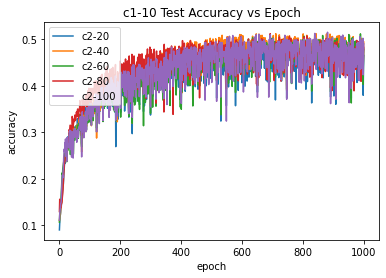

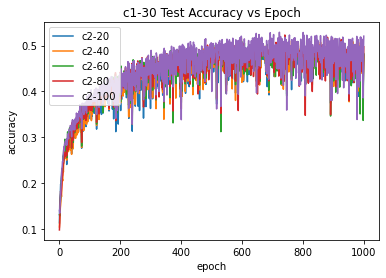

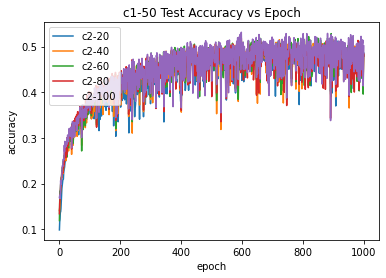

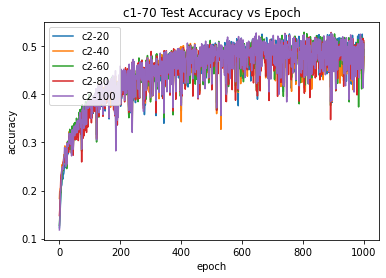

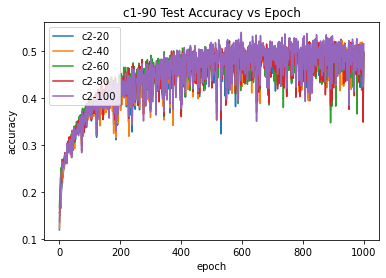

<Figure size 432x288 with 0 Axes>

In [29]:
for num_ch_c1 in c1:
    plt.plot(histories['c1-{}-c2-20'.format(num_ch_c1)].history['val_accuracy'])
    plt.plot(histories['c1-{}-c2-40'.format(num_ch_c1)].history['val_accuracy'])
    plt.plot(histories['c1-{}-c2-60'.format(num_ch_c1)].history['val_accuracy'])
    plt.plot(histories['c1-{}-c2-80'.format(num_ch_c1)].history['val_accuracy'])
    plt.plot(histories['c1-{}-c2-100'.format(num_ch_c1)].history['val_accuracy'])
    plt.title('c1-{} Test Accuracy vs Epoch'.format(num_ch_c1))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['c2-20','c2-40','c2-60','c2-80','c2-100'], loc='upper left')
    plt.show()
    plt.savefig(
        './results/partA_qn2_c1_{}_accuracies.pdf'.format(num_ch_c1)
    )

In [30]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_26 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 300)             

In [31]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.3024 - accuracy: 0.0950 - val_loss: 2.2912 - val_accuracy: 0.1135
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2859 - accuracy: 0.1392 - val_loss: 2.2802 - val_accuracy: 0.1645
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2762 - accuracy: 0.1763 - val_loss: 2.2710 - val_accuracy: 0.1925
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2673 - accuracy: 0.1930 - val_loss: 2.2624 - val_accuracy: 0.2055
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2582 - accuracy: 0.2071 - val_loss: 2.2529 - val_accuracy: 0.2250
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2486 - accuracy: 0.2187 - val_loss: 2.2432 - val_accuracy: 0.2305
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2384 - accuracy: 0.2232 - val_loss: 2.2328 - val_accuracy: 0.2390
Epoch 

Epoch 115/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6929 - accuracy: 0.4048 - val_loss: 1.7560 - val_accuracy: 0.3795
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6894 - accuracy: 0.4061 - val_loss: 1.7413 - val_accuracy: 0.3905
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6872 - accuracy: 0.4069 - val_loss: 1.7220 - val_accuracy: 0.4060
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6845 - accuracy: 0.4067 - val_loss: 1.7349 - val_accuracy: 0.3825
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6834 - accuracy: 0.4146 - val_loss: 1.7120 - val_accuracy: 0.4070
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6812 - accuracy: 0.4077 - val_loss: 1.7158 - val_accuracy: 0.3870
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6788 - accuracy: 0.4127 - val_loss: 1.7227 - val_accuracy:

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5831 - accuracy: 0.4489 - val_loss: 1.6491 - val_accuracy: 0.4220
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5829 - accuracy: 0.4482 - val_loss: 1.6739 - val_accuracy: 0.3985
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5821 - accuracy: 0.4440 - val_loss: 1.6214 - val_accuracy: 0.4445
Epoch 175/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5814 - accuracy: 0.4461 - val_loss: 1.7585 - val_accuracy: 0.3855
Epoch 176/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5827 - accuracy: 0.4453 - val_loss: 1.6438 - val_accuracy: 0.4335
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5757 - accuracy: 0.4432 - val_loss: 1.6606 - val_accuracy: 0.4180
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5759 - accuracy: 0.4475 - val_loss: 1.6548 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5017 - accuracy: 0.4777 - val_loss: 2.0913 - val_accuracy: 0.3305
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5009 - accuracy: 0.4773 - val_loss: 1.5695 - val_accuracy: 0.4700
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4934 - accuracy: 0.4827 - val_loss: 1.6313 - val_accuracy: 0.4250
Epoch 232/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4930 - accuracy: 0.4781 - val_loss: 1.6045 - val_accuracy: 0.4320
Epoch 233/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4899 - accuracy: 0.4835 - val_loss: 1.7151 - val_accuracy: 0.4050
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4903 - accuracy: 0.4855 - val_loss: 1.6749 - val_accuracy: 0.4325
Epoch 235/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4909 - accuracy: 0.4797 - val_loss: 1.8157 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4227 - accuracy: 0.5088 - val_loss: 1.5095 - val_accuracy: 0.4795
Epoch 287/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4150 - accuracy: 0.5080 - val_loss: 1.6511 - val_accuracy: 0.4260
Epoch 288/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4213 - accuracy: 0.5112 - val_loss: 1.5305 - val_accuracy: 0.4665
Epoch 289/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4133 - accuracy: 0.5092 - val_loss: 1.5296 - val_accuracy: 0.4620
Epoch 290/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4136 - accuracy: 0.5095 - val_loss: 1.5053 - val_accuracy: 0.4820
Epoch 291/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4113 - accuracy: 0.5088 - val_loss: 1.6503 - val_accuracy: 0.4370
Epoch 292/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4105 - accuracy: 0.5100 - val_loss: 1.5178 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3478 - accuracy: 0.5359 - val_loss: 1.5072 - val_accuracy: 0.4810
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3476 - accuracy: 0.5297 - val_loss: 1.8145 - val_accuracy: 0.3780
Epoch 345/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3567 - accuracy: 0.5351 - val_loss: 1.4712 - val_accuracy: 0.5035
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3467 - accuracy: 0.5338 - val_loss: 1.5149 - val_accuracy: 0.4705
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3425 - accuracy: 0.5362 - val_loss: 1.4871 - val_accuracy: 0.4815
Epoch 348/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3410 - accuracy: 0.5404 - val_loss: 1.6416 - val_accuracy: 0.4270
Epoch 349/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3439 - accuracy: 0.5364 - val_loss: 1.6418 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2871 - accuracy: 0.5552 - val_loss: 1.4526 - val_accuracy: 0.5105
Epoch 401/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2855 - accuracy: 0.5612 - val_loss: 1.7343 - val_accuracy: 0.3970
Epoch 402/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2817 - accuracy: 0.5535 - val_loss: 1.4987 - val_accuracy: 0.4830
Epoch 403/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2882 - accuracy: 0.5524 - val_loss: 1.5439 - val_accuracy: 0.4585
Epoch 404/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2863 - accuracy: 0.5582 - val_loss: 1.7475 - val_accuracy: 0.4140
Epoch 405/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.2789 - accuracy: 0.5603 - val_loss: 1.4810 - val_accuracy: 0.4970
Epoch 406/1000
79/79 [==============================] - 1s 13ms/step - loss: 1.2748 - accuracy: 0.5592 - val_loss: 1.5132 - val_accurac

Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2279 - accuracy: 0.5752 - val_loss: 1.4993 - val_accuracy: 0.4885
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2230 - accuracy: 0.5754 - val_loss: 1.6481 - val_accuracy: 0.4220
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2196 - accuracy: 0.5787 - val_loss: 1.4555 - val_accuracy: 0.4980
Epoch 460/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2170 - accuracy: 0.5781 - val_loss: 1.5700 - val_accuracy: 0.4485
Epoch 461/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2268 - accuracy: 0.5799 - val_loss: 1.7333 - val_accuracy: 0.4080
Epoch 462/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2199 - accuracy: 0.5826 - val_loss: 1.5315 - val_accuracy: 0.4825
Epoch 463/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2151 - accuracy: 0.5795 - val_loss: 1.4366 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1633 - accuracy: 0.5936 - val_loss: 1.4206 - val_accuracy: 0.5105
Epoch 515/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1599 - accuracy: 0.5982 - val_loss: 1.4542 - val_accuracy: 0.5010
Epoch 516/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1594 - accuracy: 0.5973 - val_loss: 1.4739 - val_accuracy: 0.4895
Epoch 517/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1557 - accuracy: 0.5980 - val_loss: 1.9547 - val_accuracy: 0.3530
Epoch 518/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1750 - accuracy: 0.5922 - val_loss: 1.4542 - val_accuracy: 0.4970
Epoch 519/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1511 - accuracy: 0.6020 - val_loss: 1.5056 - val_accuracy: 0.4810
Epoch 520/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1667 - accuracy: 0.5980 - val_loss: 1.4784 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1013 - accuracy: 0.6205 - val_loss: 1.4681 - val_accuracy: 0.4955
Epoch 572/1000
79/79 [==============================] - 1s 13ms/step - loss: 1.1049 - accuracy: 0.6214 - val_loss: 1.5835 - val_accuracy: 0.4580
Epoch 573/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.1030 - accuracy: 0.6166 - val_loss: 1.4108 - val_accuracy: 0.5090
Epoch 574/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0952 - accuracy: 0.6231 - val_loss: 1.5133 - val_accuracy: 0.4735
Epoch 575/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1029 - accuracy: 0.6200 - val_loss: 1.5175 - val_accuracy: 0.4720
Epoch 576/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1052 - accuracy: 0.6184 - val_loss: 1.6333 - val_accuracy: 0.4705
Epoch 577/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1016 - accuracy: 0.6166 - val_loss: 1.4823 - val_accurac

Epoch 628/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0388 - accuracy: 0.6432 - val_loss: 1.4208 - val_accuracy: 0.5070
Epoch 629/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0430 - accuracy: 0.6444 - val_loss: 1.5918 - val_accuracy: 0.4535
Epoch 630/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0434 - accuracy: 0.6412 - val_loss: 1.4731 - val_accuracy: 0.5035
Epoch 631/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0379 - accuracy: 0.6428 - val_loss: 1.4394 - val_accuracy: 0.5075
Epoch 632/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0319 - accuracy: 0.6478 - val_loss: 1.5831 - val_accuracy: 0.4445
Epoch 633/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0329 - accuracy: 0.6473 - val_loss: 1.5030 - val_accuracy: 0.4845
Epoch 634/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0309 - accuracy: 0.6447 - val_loss: 1.4700 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9748 - accuracy: 0.6657 - val_loss: 1.7178 - val_accuracy: 0.4300
Epoch 686/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9837 - accuracy: 0.6681 - val_loss: 1.5780 - val_accuracy: 0.4665
Epoch 687/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9751 - accuracy: 0.6644 - val_loss: 1.5242 - val_accuracy: 0.4895
Epoch 688/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9803 - accuracy: 0.6660 - val_loss: 1.6734 - val_accuracy: 0.4505
Epoch 689/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9712 - accuracy: 0.6719 - val_loss: 1.8727 - val_accuracy: 0.4095
Epoch 690/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9729 - accuracy: 0.6676 - val_loss: 1.4765 - val_accuracy: 0.4980
Epoch 691/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9720 - accuracy: 0.6693 - val_loss: 1.5584 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9098 - accuracy: 0.6899 - val_loss: 1.3926 - val_accuracy: 0.5260
Epoch 743/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9130 - accuracy: 0.6911 - val_loss: 1.5835 - val_accuracy: 0.4900
Epoch 744/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9139 - accuracy: 0.6890 - val_loss: 1.5306 - val_accuracy: 0.4790
Epoch 745/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9044 - accuracy: 0.6946 - val_loss: 1.4319 - val_accuracy: 0.5160
Epoch 746/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9087 - accuracy: 0.6918 - val_loss: 1.4922 - val_accuracy: 0.4950
Epoch 747/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9085 - accuracy: 0.6945 - val_loss: 1.9244 - val_accuracy: 0.3975
Epoch 748/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9170 - accuracy: 0.6875 - val_loss: 1.4666 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8441 - accuracy: 0.7138 - val_loss: 1.5667 - val_accuracy: 0.4745
Epoch 800/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8460 - accuracy: 0.7186 - val_loss: 1.5306 - val_accuracy: 0.5005
Epoch 801/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8464 - accuracy: 0.7194 - val_loss: 1.4158 - val_accuracy: 0.5245
Epoch 802/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8442 - accuracy: 0.7202 - val_loss: 1.4718 - val_accuracy: 0.5115
Epoch 803/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8355 - accuracy: 0.7260 - val_loss: 1.5223 - val_accuracy: 0.5000
Epoch 804/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8360 - accuracy: 0.7232 - val_loss: 1.4052 - val_accuracy: 0.5270
Epoch 805/1000
79/79 [==============================] - 1s 9ms/step - loss: 0.8423 - accuracy: 0.7158 - val_loss: 1.7948 - val_accuracy:

Epoch 912/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7160 - accuracy: 0.7691 - val_loss: 1.5007 - val_accuracy: 0.5055
Epoch 913/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7091 - accuracy: 0.7705 - val_loss: 1.7074 - val_accuracy: 0.4610
Epoch 914/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7139 - accuracy: 0.7691 - val_loss: 1.7286 - val_accuracy: 0.4735
Epoch 915/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7067 - accuracy: 0.7765 - val_loss: 1.7130 - val_accuracy: 0.4835
Epoch 916/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7161 - accuracy: 0.7704 - val_loss: 1.7055 - val_accuracy: 0.4530
Epoch 917/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7116 - accuracy: 0.7712 - val_loss: 1.6543 - val_accuracy: 0.4765
Epoch 918/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7061 - accuracy: 0.7760 - val_loss: 1.5235 - val_accuracy:

Epoch 969/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6391 - accuracy: 0.8047 - val_loss: 1.8200 - val_accuracy: 0.4430
Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6403 - accuracy: 0.8025 - val_loss: 1.6172 - val_accuracy: 0.4910
Epoch 971/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6296 - accuracy: 0.8024 - val_loss: 1.5070 - val_accuracy: 0.5175
Epoch 972/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6323 - accuracy: 0.8066 - val_loss: 1.6066 - val_accuracy: 0.4795
Epoch 973/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6351 - accuracy: 0.8019 - val_loss: 1.8057 - val_accuracy: 0.4645
Epoch 974/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6366 - accuracy: 0.8024 - val_loss: 1.7048 - val_accuracy: 0.4835
Epoch 975/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6340 - accuracy: 0.8050 - val_loss: 1.7451 - val_accuracy:

In [32]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 49.63499993085861%


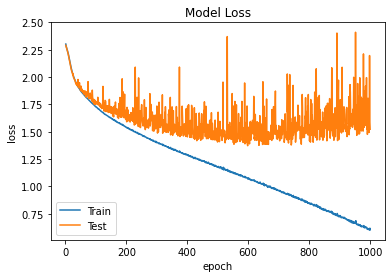

In [33]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_qn2_loss.pdf'
)

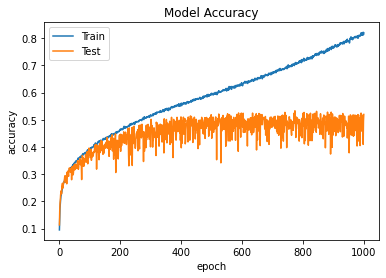

In [34]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_qn2_accuracy.pdf'
)

## Part A: Object Recognition Question 3a)

In [35]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_27 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 300)             

In [36]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.1)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3a.h5')

Epoch 1/1000
79/79 [==============================] - 2s 21ms/step - loss: 2.3014 - accuracy: 0.0972 - val_loss: 2.2898 - val_accuracy: 0.1240
Epoch 2/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2842 - accuracy: 0.1466 - val_loss: 2.2781 - val_accuracy: 0.1790
Epoch 3/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2738 - accuracy: 0.1795 - val_loss: 2.2681 - val_accuracy: 0.1935
Epoch 4/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2639 - accuracy: 0.1967 - val_loss: 2.2583 - val_accuracy: 0.2105
Epoch 5/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2536 - accuracy: 0.2130 - val_loss: 2.2475 - val_accuracy: 0.2360
Epoch 6/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2426 - accuracy: 0.2242 - val_loss: 2.2363 - val_accuracy: 0.2395
Epoch 7/1000
79/79 [==============================] - 1s 12ms/step - loss: 2.2307 - accuracy: 0.2296 - val_loss: 2.2241 - val_accuracy: 0.2440

Epoch 58/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8288 - accuracy: 0.3544 - val_loss: 1.8456 - val_accuracy: 0.3340
Epoch 59/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.8233 - accuracy: 0.3579 - val_loss: 1.8567 - val_accuracy: 0.3305
Epoch 60/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8214 - accuracy: 0.3557 - val_loss: 1.8263 - val_accuracy: 0.3500
Epoch 61/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8160 - accuracy: 0.3589 - val_loss: 1.8329 - val_accuracy: 0.3575
Epoch 62/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8134 - accuracy: 0.3638 - val_loss: 1.8355 - val_accuracy: 0.3475
Epoch 63/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8100 - accuracy: 0.3625 - val_loss: 1.8529 - val_accuracy: 0.3275
Epoch 64/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.8077 - accuracy: 0.3645 - val_loss: 1.8659 - val_accuracy:

Epoch 115/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6659 - accuracy: 0.4136 - val_loss: 1.7372 - val_accuracy: 0.3805
Epoch 116/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6625 - accuracy: 0.4160 - val_loss: 1.7198 - val_accuracy: 0.4035
Epoch 117/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6603 - accuracy: 0.4176 - val_loss: 1.6993 - val_accuracy: 0.4065
Epoch 118/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6579 - accuracy: 0.4174 - val_loss: 1.7190 - val_accuracy: 0.3865
Epoch 119/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6567 - accuracy: 0.4206 - val_loss: 1.6885 - val_accuracy: 0.4175
Epoch 120/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6541 - accuracy: 0.4167 - val_loss: 1.6967 - val_accuracy: 0.3995
Epoch 121/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.6519 - accuracy: 0.4215 - val_loss: 1.6990 - val_ac

79/79 [==============================] - 1s 12ms/step - loss: 1.4643 - accuracy: 0.4915 - val_loss: 1.5452 - val_accuracy: 0.4660
Epoch 228/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4640 - accuracy: 0.4886 - val_loss: 1.8014 - val_accuracy: 0.3765
Epoch 229/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4668 - accuracy: 0.4891 - val_loss: 2.0565 - val_accuracy: 0.3435
Epoch 230/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4660 - accuracy: 0.4890 - val_loss: 1.5471 - val_accuracy: 0.4745
Epoch 231/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4585 - accuracy: 0.4947 - val_loss: 1.6125 - val_accuracy: 0.4325
Epoch 232/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4576 - accuracy: 0.4944 - val_loss: 1.5994 - val_accuracy: 0.4285
Epoch 233/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.4558 - accuracy: 0.4960 - val_loss: 1.7017 - val_accuracy: 0.4160


79/79 [==============================] - 1s 12ms/step - loss: 1.3107 - accuracy: 0.5447 - val_loss: 1.6168 - val_accuracy: 0.4470
Epoch 340/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3126 - accuracy: 0.5458 - val_loss: 1.7091 - val_accuracy: 0.4200
Epoch 341/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3087 - accuracy: 0.5507 - val_loss: 1.6038 - val_accuracy: 0.4465
Epoch 342/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3093 - accuracy: 0.5480 - val_loss: 1.6048 - val_accuracy: 0.4275
Epoch 343/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3059 - accuracy: 0.5514 - val_loss: 1.4991 - val_accuracy: 0.4835
Epoch 344/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3051 - accuracy: 0.5436 - val_loss: 1.8302 - val_accuracy: 0.3795
Epoch 345/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.3132 - accuracy: 0.5532 - val_loss: 1.4507 - val_accuracy: 0.5120


79/79 [==============================] - 1s 12ms/step - loss: 1.1790 - accuracy: 0.5919 - val_loss: 1.4575 - val_accuracy: 0.4940
Epoch 452/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1799 - accuracy: 0.5913 - val_loss: 1.5736 - val_accuracy: 0.4640
Epoch 453/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1796 - accuracy: 0.5932 - val_loss: 1.4919 - val_accuracy: 0.4795
Epoch 454/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1774 - accuracy: 0.5943 - val_loss: 1.6801 - val_accuracy: 0.4480
Epoch 455/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1819 - accuracy: 0.5947 - val_loss: 1.5414 - val_accuracy: 0.4700
Epoch 456/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1743 - accuracy: 0.5932 - val_loss: 1.8008 - val_accuracy: 0.3890
Epoch 457/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.1747 - accuracy: 0.5954 - val_loss: 1.4668 - val_accuracy: 0.4990


79/79 [==============================] - 1s 12ms/step - loss: 1.0453 - accuracy: 0.6410 - val_loss: 1.4625 - val_accuracy: 0.4920
Epoch 564/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0426 - accuracy: 0.6406 - val_loss: 1.3966 - val_accuracy: 0.5185
Epoch 565/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0466 - accuracy: 0.6412 - val_loss: 1.4844 - val_accuracy: 0.4875
Epoch 566/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0464 - accuracy: 0.6357 - val_loss: 1.4379 - val_accuracy: 0.4980
Epoch 567/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0401 - accuracy: 0.6480 - val_loss: 1.4703 - val_accuracy: 0.4870
Epoch 568/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0372 - accuracy: 0.6450 - val_loss: 1.6886 - val_accuracy: 0.4225
Epoch 569/1000
79/79 [==============================] - 1s 12ms/step - loss: 1.0379 - accuracy: 0.6427 - val_loss: 1.4576 - val_accuracy: 0.4895


79/79 [==============================] - 1s 12ms/step - loss: 0.9025 - accuracy: 0.6949 - val_loss: 1.5958 - val_accuracy: 0.4740
Epoch 676/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9019 - accuracy: 0.6954 - val_loss: 1.5066 - val_accuracy: 0.4900
Epoch 677/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9046 - accuracy: 0.6991 - val_loss: 1.4280 - val_accuracy: 0.5125
Epoch 678/1000
79/79 [==============================] - 1s 11ms/step - loss: 0.8956 - accuracy: 0.6982 - val_loss: 1.8333 - val_accuracy: 0.4280
Epoch 679/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9060 - accuracy: 0.6952 - val_loss: 1.5613 - val_accuracy: 0.4690
Epoch 680/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9000 - accuracy: 0.6934 - val_loss: 1.6875 - val_accuracy: 0.4710
Epoch 681/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.9000 - accuracy: 0.6982 - val_loss: 1.4497 - val_accuracy: 0.5000


79/79 [==============================] - 1s 12ms/step - loss: 0.7585 - accuracy: 0.7536 - val_loss: 1.6431 - val_accuracy: 0.4835
Epoch 788/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7513 - accuracy: 0.7565 - val_loss: 1.9263 - val_accuracy: 0.4155
Epoch 789/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7659 - accuracy: 0.7551 - val_loss: 1.5214 - val_accuracy: 0.5040
Epoch 790/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7512 - accuracy: 0.7585 - val_loss: 1.6934 - val_accuracy: 0.4685
Epoch 791/1000
79/79 [==============================] - 1s 17ms/step - loss: 0.7550 - accuracy: 0.7568 - val_loss: 1.6103 - val_accuracy: 0.4875
Epoch 792/1000
79/79 [==============================] - 1s 13ms/step - loss: 0.7502 - accuracy: 0.7543 - val_loss: 1.7603 - val_accuracy: 0.4325
Epoch 793/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.7548 - accuracy: 0.7579 - val_loss: 1.5332 - val_accuracy: 0.4990


79/79 [==============================] - 1s 12ms/step - loss: 0.6041 - accuracy: 0.8155 - val_loss: 1.8108 - val_accuracy: 0.4435
Epoch 900/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.6023 - accuracy: 0.8166 - val_loss: 1.6206 - val_accuracy: 0.4975
Epoch 901/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.6099 - accuracy: 0.8112 - val_loss: 1.7914 - val_accuracy: 0.4770
Epoch 902/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.6054 - accuracy: 0.8131 - val_loss: 1.8484 - val_accuracy: 0.4605
Epoch 903/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.6004 - accuracy: 0.8204 - val_loss: 1.5700 - val_accuracy: 0.5005
Epoch 904/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.5908 - accuracy: 0.8239 - val_loss: 1.5471 - val_accuracy: 0.5110
Epoch 905/1000
79/79 [==============================] - 1s 12ms/step - loss: 0.5907 - accuracy: 0.8253 - val_loss: 1.7013 - val_accuracy: 0.4900


In [37]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 50.175000727176666%


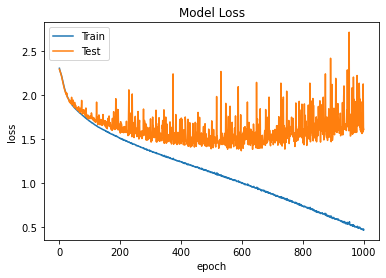

In [38]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3a_loss.pdf'
)

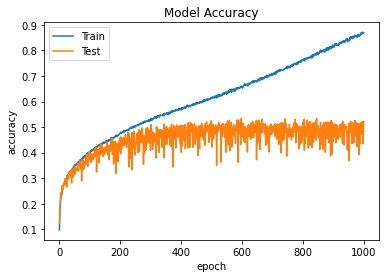

In [39]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3a_accuracy.pdf'
)

## Part A: Object Recognition Question 3b)

In [41]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_29 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 300)             

In [42]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3b.h5')

Epoch 1/1000
79/79 [==============================] - 1s 10ms/step - loss: 2.2495 - accuracy: 0.1913 - val_loss: 2.1188 - val_accuracy: 0.2320
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0678 - accuracy: 0.2447 - val_loss: 2.0426 - val_accuracy: 0.2370
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9510 - accuracy: 0.3049 - val_loss: 2.0459 - val_accuracy: 0.3080
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.8487 - accuracy: 0.3421 - val_loss: 2.1670 - val_accuracy: 0.2200
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7778 - accuracy: 0.3642 - val_loss: 2.2204 - val_accuracy: 0.2895
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7289 - accuracy: 0.3904 - val_loss: 1.7769 - val_accuracy: 0.3830
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6514 - accuracy: 0.4142 - val_loss: 1.7393 - val_accuracy: 0.3955
Epoch

79/79 [==============================] - 1s 7ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 7.8578 - val_accuracy: 0.4645
Epoch 116/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.0713 - accuracy: 0.9810 - val_loss: 8.4551 - val_accuracy: 0.4415
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 7.9883 - val_accuracy: 0.4525
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0723 - accuracy: 0.9811 - val_loss: 8.2914 - val_accuracy: 0.4510
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0630 - accuracy: 0.9835 - val_loss: 8.2099 - val_accuracy: 0.4395
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0616 - accuracy: 0.9824 - val_loss: 7.9805 - val_accuracy: 0.4325
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0638 - accuracy: 0.9824 - val_loss: 7.5474 - val_accuracy: 0.4265
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0477 - accuracy: 0.9881 - val_loss: 9.5592 - val_accuracy: 0.4520
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0528 - accuracy: 0.9886 - val_loss: 9.4730 - val_accuracy: 0.4560
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0447 - accuracy: 0.9892 - val_loss: 9.2943 - val_accuracy: 0.4480
Epoch 175/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0470 - accuracy: 0.9869 - val_loss: 9.6300 - val_accuracy: 0.4495
Epoch 176/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0564 - accuracy: 0.9847 - val_loss: 10.3139 - val_accuracy: 0.4390
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0507 - accuracy: 0.9874 - val_loss: 9.0839 - val_accuracy: 0.4535
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0421 - accuracy: 0.9897 - val_loss: 8.8009 - val_accuracy

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 10.1354 - val_accuracy: 0.4630
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0409 - accuracy: 0.9898 - val_loss: 9.9826 - val_accuracy: 0.4535
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0305 - accuracy: 0.9917 - val_loss: 11.0574 - val_accuracy: 0.4375
Epoch 232/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0409 - accuracy: 0.9900 - val_loss: 10.8185 - val_accuracy: 0.4505
Epoch 233/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 10.5088 - val_accuracy: 0.4465
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0371 - accuracy: 0.9915 - val_loss: 9.9800 - val_accuracy: 0.4460
Epoch 235/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.9917 - val_loss: 10.2231 - val_accu

79/79 [==============================] - 1s 7ms/step - loss: 0.0348 - accuracy: 0.9924 - val_loss: 13.2982 - val_accuracy: 0.4600
Epoch 342/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0355 - accuracy: 0.9920 - val_loss: 12.6373 - val_accuracy: 0.4545
Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0343 - accuracy: 0.9931 - val_loss: 12.9317 - val_accuracy: 0.4450
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.9926 - val_loss: 12.5064 - val_accuracy: 0.4575
Epoch 345/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0334 - accuracy: 0.9923 - val_loss: 12.3415 - val_accuracy: 0.4475
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0389 - accuracy: 0.9915 - val_loss: 13.2626 - val_accuracy: 0.4555
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0273 - accuracy: 0.9936 - val_loss: 13.1828 - val_accuracy: 0.4360


79/79 [==============================] - 1s 7ms/step - loss: 0.0335 - accuracy: 0.9936 - val_loss: 17.0012 - val_accuracy: 0.4480
Epoch 454/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0353 - accuracy: 0.9939 - val_loss: 16.8079 - val_accuracy: 0.4650
Epoch 455/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.9941 - val_loss: 17.0194 - val_accuracy: 0.4560
Epoch 456/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0425 - accuracy: 0.9927 - val_loss: 16.2197 - val_accuracy: 0.4485
Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0378 - accuracy: 0.9933 - val_loss: 16.0546 - val_accuracy: 0.4720
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0416 - accuracy: 0.9925 - val_loss: 17.2251 - val_accuracy: 0.4655
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0375 - accuracy: 0.9937 - val_loss: 17.0561 - val_accuracy: 0.4570


79/79 [==============================] - 1s 7ms/step - loss: 0.0445 - accuracy: 0.9943 - val_loss: 19.2679 - val_accuracy: 0.4565
Epoch 566/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0281 - accuracy: 0.9947 - val_loss: 20.8504 - val_accuracy: 0.4640
Epoch 567/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0394 - accuracy: 0.9930 - val_loss: 20.9058 - val_accuracy: 0.4835
Epoch 568/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0400 - accuracy: 0.9946 - val_loss: 20.6059 - val_accuracy: 0.4575
Epoch 569/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0490 - accuracy: 0.9939 - val_loss: 18.9586 - val_accuracy: 0.4520
Epoch 570/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0347 - accuracy: 0.9944 - val_loss: 19.2034 - val_accuracy: 0.4510
Epoch 571/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0352 - accuracy: 0.9954 - val_loss: 19.9032 - val_accuracy: 0.4565


79/79 [==============================] - 1s 7ms/step - loss: 0.0343 - accuracy: 0.9963 - val_loss: 23.6844 - val_accuracy: 0.4655
Epoch 678/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0256 - accuracy: 0.9959 - val_loss: 25.8440 - val_accuracy: 0.4655
Epoch 679/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0391 - accuracy: 0.9954 - val_loss: 23.7911 - val_accuracy: 0.4600
Epoch 680/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0247 - accuracy: 0.9958 - val_loss: 24.1413 - val_accuracy: 0.4660
Epoch 681/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0430 - accuracy: 0.9951 - val_loss: 22.9307 - val_accuracy: 0.4735
Epoch 682/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0447 - accuracy: 0.9934 - val_loss: 23.4561 - val_accuracy: 0.4655
Epoch 683/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0293 - accuracy: 0.9964 - val_loss: 23.2036 - val_accuracy: 0.4730


79/79 [==============================] - 1s 7ms/step - loss: 0.0273 - accuracy: 0.9965 - val_loss: 28.5565 - val_accuracy: 0.4490
Epoch 790/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.9954 - val_loss: 28.6046 - val_accuracy: 0.4480
Epoch 791/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0284 - accuracy: 0.9960 - val_loss: 29.8990 - val_accuracy: 0.4615
Epoch 792/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0313 - accuracy: 0.9962 - val_loss: 29.7765 - val_accuracy: 0.4715
Epoch 793/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0368 - accuracy: 0.9956 - val_loss: 30.3051 - val_accuracy: 0.4475
Epoch 794/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0440 - accuracy: 0.9946 - val_loss: 30.0207 - val_accuracy: 0.4660
Epoch 795/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0468 - accuracy: 0.9957 - val_loss: 29.6877 - val_accuracy: 0.4475


79/79 [==============================] - 1s 7ms/step - loss: 0.0487 - accuracy: 0.9961 - val_loss: 32.2681 - val_accuracy: 0.4530
Epoch 902/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0445 - accuracy: 0.9956 - val_loss: 33.9907 - val_accuracy: 0.4750
Epoch 903/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0554 - accuracy: 0.9950 - val_loss: 33.2599 - val_accuracy: 0.4575
Epoch 904/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0542 - accuracy: 0.9959 - val_loss: 33.3718 - val_accuracy: 0.4725
Epoch 905/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0397 - accuracy: 0.9959 - val_loss: 34.4046 - val_accuracy: 0.4685
Epoch 906/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0349 - accuracy: 0.9963 - val_loss: 33.1089 - val_accuracy: 0.4740
Epoch 907/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.0311 - accuracy: 0.9965 - val_loss: 34.8638 - val_accuracy: 0.4510


In [43]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 46.4900004863739%


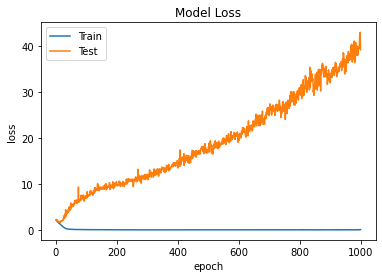

In [44]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_loss.pdf'
)

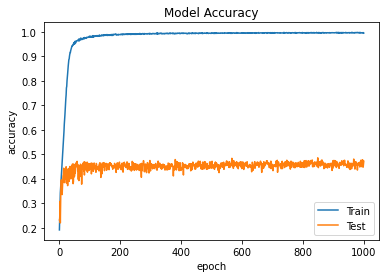

In [45]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_accuracy.pdf'
)

### Part A: Object Recognition Question 3b) Learning Rate 1e-5

In [46]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 1e-5

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_30 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 300)             

In [47]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3b_1e-5.h5')

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.2790 - accuracy: 0.1519 - val_loss: 2.2530 - val_accuracy: 0.2115
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2311 - accuracy: 0.2320 - val_loss: 2.2032 - val_accuracy: 0.2360
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1779 - accuracy: 0.2536 - val_loss: 2.1469 - val_accuracy: 0.2695
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1222 - accuracy: 0.2682 - val_loss: 2.0951 - val_accuracy: 0.2915
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0751 - accuracy: 0.2840 - val_loss: 2.0489 - val_accuracy: 0.3015
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0380 - accuracy: 0.2915 - val_loss: 2.0159 - val_accuracy: 0.3140
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0101 - accuracy: 0.2949 - val_loss: 1.9897 - val_accuracy: 0.3135
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 1.4903 - accuracy: 0.4815 - val_loss: 1.5714 - val_accuracy: 0.4480
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4874 - accuracy: 0.4825 - val_loss: 1.5700 - val_accuracy: 0.4625
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4858 - accuracy: 0.4805 - val_loss: 1.5545 - val_accuracy: 0.4720
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4834 - accuracy: 0.4875 - val_loss: 1.5586 - val_accuracy: 0.4590
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4815 - accuracy: 0.4869 - val_loss: 1.5583 - val_accuracy: 0.4730
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4798 - accuracy: 0.4846 - val_loss: 1.5617 - val_accuracy: 0.4665
Epoch 121/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.4778 - accuracy: 0.4883 - val_loss: 1.5414 - val_accuracy: 0.4835
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3852 - accuracy: 0.5224 - val_loss: 1.4878 - val_accuracy: 0.4975
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3845 - accuracy: 0.5232 - val_loss: 1.4824 - val_accuracy: 0.4910
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3840 - accuracy: 0.5241 - val_loss: 1.4761 - val_accuracy: 0.4960
Epoch 175/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3830 - accuracy: 0.5234 - val_loss: 1.5033 - val_accuracy: 0.4800
Epoch 176/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3815 - accuracy: 0.5266 - val_loss: 1.4842 - val_accuracy: 0.4970
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3780 - accuracy: 0.5261 - val_loss: 1.5072 - val_accuracy: 0.4775
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3764 - accuracy: 0.5274 - val_loss: 1.5006 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3104 - accuracy: 0.5502 - val_loss: 1.4639 - val_accuracy: 0.5020
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3061 - accuracy: 0.5526 - val_loss: 1.4357 - val_accuracy: 0.5025
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3041 - accuracy: 0.5533 - val_loss: 1.4667 - val_accuracy: 0.4970
Epoch 232/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3058 - accuracy: 0.5537 - val_loss: 1.5101 - val_accuracy: 0.4620
Epoch 233/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3033 - accuracy: 0.5548 - val_loss: 1.4943 - val_accuracy: 0.4965
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3026 - accuracy: 0.5553 - val_loss: 1.4466 - val_accuracy: 0.5075
Epoch 235/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3006 - accuracy: 0.5554 - val_loss: 1.4924 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2415 - accuracy: 0.5747 - val_loss: 1.4095 - val_accuracy: 0.5105
Epoch 287/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2398 - accuracy: 0.5779 - val_loss: 1.4735 - val_accuracy: 0.4905
Epoch 288/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2425 - accuracy: 0.5762 - val_loss: 1.4062 - val_accuracy: 0.5120
Epoch 289/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2388 - accuracy: 0.5761 - val_loss: 1.4242 - val_accuracy: 0.4995
Epoch 290/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2384 - accuracy: 0.5774 - val_loss: 1.4008 - val_accuracy: 0.5225
Epoch 291/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2355 - accuracy: 0.5779 - val_loss: 1.5096 - val_accuracy: 0.4885
Epoch 292/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2358 - accuracy: 0.5771 - val_loss: 1.4097 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1809 - accuracy: 0.5960 - val_loss: 1.4460 - val_accuracy: 0.4965
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1815 - accuracy: 0.5934 - val_loss: 1.5043 - val_accuracy: 0.4780
Epoch 345/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1828 - accuracy: 0.5958 - val_loss: 1.3765 - val_accuracy: 0.5285
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1801 - accuracy: 0.5963 - val_loss: 1.3877 - val_accuracy: 0.5270
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1784 - accuracy: 0.6005 - val_loss: 1.3822 - val_accuracy: 0.5230
Epoch 348/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1758 - accuracy: 0.5993 - val_loss: 1.4164 - val_accuracy: 0.5140
Epoch 349/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1775 - accuracy: 0.5948 - val_loss: 1.4763 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1298 - accuracy: 0.6143 - val_loss: 1.4001 - val_accuracy: 0.5165
Epoch 401/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1284 - accuracy: 0.6117 - val_loss: 1.4615 - val_accuracy: 0.4850
Epoch 402/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1254 - accuracy: 0.6133 - val_loss: 1.4199 - val_accuracy: 0.5070
Epoch 403/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1279 - accuracy: 0.6152 - val_loss: 1.3954 - val_accuracy: 0.5170
Epoch 404/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1261 - accuracy: 0.6141 - val_loss: 1.4500 - val_accuracy: 0.4925
Epoch 405/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1211 - accuracy: 0.6181 - val_loss: 1.3815 - val_accuracy: 0.5215
Epoch 406/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1221 - accuracy: 0.6132 - val_loss: 1.3655 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0750 - accuracy: 0.6324 - val_loss: 1.3898 - val_accuracy: 0.5195
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0765 - accuracy: 0.6298 - val_loss: 1.4028 - val_accuracy: 0.5095
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0729 - accuracy: 0.6316 - val_loss: 1.3900 - val_accuracy: 0.5140
Epoch 460/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0739 - accuracy: 0.6306 - val_loss: 1.4326 - val_accuracy: 0.5020
Epoch 461/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0754 - accuracy: 0.6324 - val_loss: 1.4001 - val_accuracy: 0.5195
Epoch 462/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0711 - accuracy: 0.6314 - val_loss: 1.4121 - val_accuracy: 0.5155
Epoch 463/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0699 - accuracy: 0.6338 - val_loss: 1.3698 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0272 - accuracy: 0.6468 - val_loss: 1.3504 - val_accuracy: 0.5230
Epoch 515/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0252 - accuracy: 0.6500 - val_loss: 1.3849 - val_accuracy: 0.5200
Epoch 516/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0245 - accuracy: 0.6483 - val_loss: 1.3655 - val_accuracy: 0.5260
Epoch 517/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0223 - accuracy: 0.6517 - val_loss: 1.5406 - val_accuracy: 0.4615
Epoch 518/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0248 - accuracy: 0.6476 - val_loss: 1.4147 - val_accuracy: 0.4965
Epoch 519/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0199 - accuracy: 0.6516 - val_loss: 1.4129 - val_accuracy: 0.5100
Epoch 520/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0236 - accuracy: 0.6483 - val_loss: 1.4302 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9772 - accuracy: 0.6687 - val_loss: 1.3810 - val_accuracy: 0.5260
Epoch 572/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9777 - accuracy: 0.6692 - val_loss: 1.4280 - val_accuracy: 0.5010
Epoch 573/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9785 - accuracy: 0.6686 - val_loss: 1.3690 - val_accuracy: 0.5220
Epoch 574/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9749 - accuracy: 0.6736 - val_loss: 1.4198 - val_accuracy: 0.5085
Epoch 575/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9765 - accuracy: 0.6678 - val_loss: 1.3830 - val_accuracy: 0.5125
Epoch 576/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9747 - accuracy: 0.6714 - val_loss: 1.3862 - val_accuracy: 0.5175
Epoch 577/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9738 - accuracy: 0.6725 - val_loss: 1.3774 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9306 - accuracy: 0.6870 - val_loss: 1.3839 - val_accuracy: 0.5100
Epoch 629/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9316 - accuracy: 0.6908 - val_loss: 1.4547 - val_accuracy: 0.4950
Epoch 630/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9299 - accuracy: 0.6860 - val_loss: 1.3619 - val_accuracy: 0.5250
Epoch 631/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9297 - accuracy: 0.6868 - val_loss: 1.3466 - val_accuracy: 0.5265
Epoch 632/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9256 - accuracy: 0.6903 - val_loss: 1.4580 - val_accuracy: 0.4995
Epoch 633/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9255 - accuracy: 0.6887 - val_loss: 1.3861 - val_accuracy: 0.5240
Epoch 634/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9262 - accuracy: 0.6881 - val_loss: 1.3962 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8841 - accuracy: 0.7051 - val_loss: 1.4987 - val_accuracy: 0.4915
Epoch 686/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8848 - accuracy: 0.7059 - val_loss: 1.4492 - val_accuracy: 0.5015
Epoch 687/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8825 - accuracy: 0.7064 - val_loss: 1.3756 - val_accuracy: 0.5235
Epoch 688/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8834 - accuracy: 0.7058 - val_loss: 1.4589 - val_accuracy: 0.5040
Epoch 689/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8805 - accuracy: 0.7038 - val_loss: 1.5677 - val_accuracy: 0.4675
Epoch 690/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8795 - accuracy: 0.7085 - val_loss: 1.3898 - val_accuracy: 0.5225
Epoch 691/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8815 - accuracy: 0.7080 - val_loss: 1.3683 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8373 - accuracy: 0.7265 - val_loss: 1.3665 - val_accuracy: 0.5375
Epoch 743/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8379 - accuracy: 0.7202 - val_loss: 1.4114 - val_accuracy: 0.5070
Epoch 744/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8363 - accuracy: 0.7247 - val_loss: 1.4890 - val_accuracy: 0.4925
Epoch 745/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8344 - accuracy: 0.7258 - val_loss: 1.3726 - val_accuracy: 0.5285
Epoch 746/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8355 - accuracy: 0.7246 - val_loss: 1.3836 - val_accuracy: 0.5330
Epoch 747/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8354 - accuracy: 0.7281 - val_loss: 1.4430 - val_accuracy: 0.5120
Epoch 748/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8349 - accuracy: 0.7301 - val_loss: 1.3563 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7924 - accuracy: 0.7400 - val_loss: 1.4175 - val_accuracy: 0.5105
Epoch 800/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7914 - accuracy: 0.7427 - val_loss: 1.4212 - val_accuracy: 0.5250
Epoch 801/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7915 - accuracy: 0.7447 - val_loss: 1.3642 - val_accuracy: 0.5345
Epoch 802/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7893 - accuracy: 0.7425 - val_loss: 1.4080 - val_accuracy: 0.5205
Epoch 803/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7880 - accuracy: 0.7443 - val_loss: 1.3978 - val_accuracy: 0.5345
Epoch 804/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7878 - accuracy: 0.7442 - val_loss: 1.3550 - val_accuracy: 0.5405
Epoch 805/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7879 - accuracy: 0.7432 - val_loss: 1.5192 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7480 - accuracy: 0.7615 - val_loss: 1.5438 - val_accuracy: 0.4895
Epoch 857/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7445 - accuracy: 0.7588 - val_loss: 1.4662 - val_accuracy: 0.5085
Epoch 858/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7457 - accuracy: 0.7640 - val_loss: 1.3793 - val_accuracy: 0.5325
Epoch 859/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7435 - accuracy: 0.7606 - val_loss: 1.3910 - val_accuracy: 0.5250
Epoch 860/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7431 - accuracy: 0.7626 - val_loss: 1.5007 - val_accuracy: 0.5215
Epoch 861/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7433 - accuracy: 0.7660 - val_loss: 1.4196 - val_accuracy: 0.5190
Epoch 862/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7419 - accuracy: 0.7626 - val_loss: 1.4895 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7021 - accuracy: 0.7783 - val_loss: 1.4297 - val_accuracy: 0.5345
Epoch 914/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7025 - accuracy: 0.7752 - val_loss: 1.5279 - val_accuracy: 0.4985
Epoch 915/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7019 - accuracy: 0.7812 - val_loss: 1.5120 - val_accuracy: 0.5070
Epoch 916/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7036 - accuracy: 0.7771 - val_loss: 1.4354 - val_accuracy: 0.5075
Epoch 917/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7002 - accuracy: 0.7780 - val_loss: 1.4583 - val_accuracy: 0.5225
Epoch 918/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6989 - accuracy: 0.7807 - val_loss: 1.4026 - val_accuracy: 0.5245
Epoch 919/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6992 - accuracy: 0.7804 - val_loss: 1.4239 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6566 - accuracy: 0.7973 - val_loss: 1.4631 - val_accuracy: 0.5200
Epoch 971/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6561 - accuracy: 0.7960 - val_loss: 1.4360 - val_accuracy: 0.5195
Epoch 972/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6543 - accuracy: 0.7952 - val_loss: 1.4955 - val_accuracy: 0.5010
Epoch 973/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6561 - accuracy: 0.7945 - val_loss: 1.4934 - val_accuracy: 0.5120
Epoch 974/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6568 - accuracy: 0.7948 - val_loss: 1.4581 - val_accuracy: 0.5185
Epoch 975/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6529 - accuracy: 0.7959 - val_loss: 1.5038 - val_accuracy: 0.5015
Epoch 976/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6549 - accuracy: 0.7958 - val_loss: 1.4630 - val_accuracy:

In [48]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 50.99000096321106%


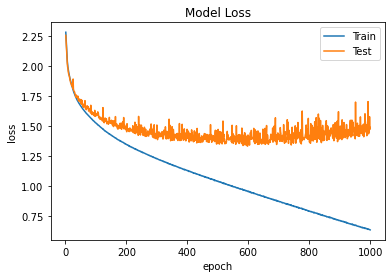

In [49]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_1e-5_loss.pdf'
)

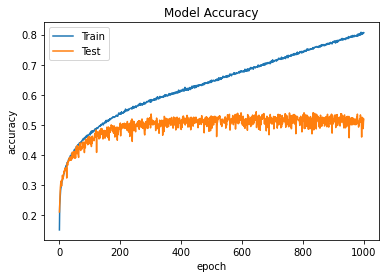

In [50]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3b_1e-5_accuracy.pdf'
)

## Part A: Object Recognition Question 3c)

In [51]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_31 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 300)             

In [52]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3c.h5')

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.0864 - accuracy: 0.2287 - val_loss: 1.9021 - val_accuracy: 0.3270
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.8555 - accuracy: 0.3280 - val_loss: 1.7618 - val_accuracy: 0.3605
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7619 - accuracy: 0.3682 - val_loss: 1.7410 - val_accuracy: 0.3885
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6562 - accuracy: 0.4153 - val_loss: 1.7834 - val_accuracy: 0.3675
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6359 - accuracy: 0.4180 - val_loss: 1.6552 - val_accuracy: 0.4100
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5758 - accuracy: 0.4402 - val_loss: 1.6442 - val_accuracy: 0.4135
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5133 - accuracy: 0.4615 - val_loss: 1.5477 - val_accuracy: 0.4540
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 8.2182e-04 - accuracy: 1.0000 - val_loss: 7.5661 - val_accuracy: 0.4365
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 8.1942e-04 - accuracy: 1.0000 - val_loss: 7.6026 - val_accuracy: 0.4365
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 7.3246e-04 - accuracy: 1.0000 - val_loss: 7.6261 - val_accuracy: 0.4345
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 6.8066e-04 - accuracy: 1.0000 - val_loss: 7.6651 - val_accuracy: 0.4335
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 6.5128e-04 - accuracy: 1.0000 - val_loss: 7.7049 - val_accuracy: 0.4370
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 6.0781e-04 - accuracy: 1.0000 - val_loss: 7.7635 - val_accuracy: 0.4350
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 5.7514e-04 - accuracy: 1.0000 - val_loss: 7.7821 - 

79/79 [==============================] - 1s 7ms/step - loss: 4.5997e-06 - accuracy: 1.0000 - val_loss: 11.6062 - val_accuracy: 0.4370
Epoch 226/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.3759e-06 - accuracy: 1.0000 - val_loss: 11.6864 - val_accuracy: 0.4345
Epoch 227/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.2307e-06 - accuracy: 1.0000 - val_loss: 11.6761 - val_accuracy: 0.4355
Epoch 228/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.0200e-06 - accuracy: 1.0000 - val_loss: 11.7359 - val_accuracy: 0.4370
Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.1025e-06 - accuracy: 1.0000 - val_loss: 11.7908 - val_accuracy: 0.4350
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.0260e-06 - accuracy: 1.0000 - val_loss: 11.8132 - val_accuracy: 0.4360
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.5331e-06 - accuracy: 1.0000 - val_loss: 11.

79/79 [==============================] - 1s 7ms/step - loss: 4.3125e-07 - accuracy: 1.0000 - val_loss: 13.5059 - val_accuracy: 0.4365
Epoch 281/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.0872e-07 - accuracy: 1.0000 - val_loss: 13.5500 - val_accuracy: 0.4360
Epoch 282/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.9533e-07 - accuracy: 1.0000 - val_loss: 13.5891 - val_accuracy: 0.4340
Epoch 283/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.8623e-07 - accuracy: 1.0000 - val_loss: 13.6059 - val_accuracy: 0.4345
Epoch 284/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.6813e-07 - accuracy: 1.0000 - val_loss: 13.6551 - val_accuracy: 0.4350
Epoch 285/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.4394e-07 - accuracy: 1.0000 - val_loss: 13.7012 - val_accuracy: 0.4335
Epoch 286/1000
79/79 [==============================] - 1s 7ms/step - loss: 3.3084e-07 - accuracy: 1.0000 - val_loss: 13.

79/79 [==============================] - 1s 7ms/step - loss: 5.0247e-08 - accuracy: 1.0000 - val_loss: 15.0520 - val_accuracy: 0.4330
Epoch 336/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.8363e-08 - accuracy: 1.0000 - val_loss: 15.0860 - val_accuracy: 0.4350
Epoch 337/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.6742e-08 - accuracy: 1.0000 - val_loss: 15.0834 - val_accuracy: 0.4330
Epoch 338/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.5085e-08 - accuracy: 1.0000 - val_loss: 15.1170 - val_accuracy: 0.4335
Epoch 339/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.2701e-08 - accuracy: 1.0000 - val_loss: 15.1155 - val_accuracy: 0.4330
Epoch 340/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.1783e-08 - accuracy: 1.0000 - val_loss: 15.1623 - val_accuracy: 0.4330
Epoch 341/1000
79/79 [==============================] - 1s 7ms/step - loss: 4.0722e-08 - accuracy: 1.0000 - val_loss: 15.

79/79 [==============================] - 1s 7ms/step - loss: 2.2867 - accuracy: 0.1084 - val_loss: 2.3085 - val_accuracy: 0.1050
Epoch 392/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2832 - accuracy: 0.1140 - val_loss: 2.3149 - val_accuracy: 0.1065
Epoch 393/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2754 - accuracy: 0.1145 - val_loss: 2.3174 - val_accuracy: 0.1080
Epoch 394/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2764 - accuracy: 0.1150 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 395/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2913 - accuracy: 0.1053 - val_loss: 2.3165 - val_accuracy: 0.1010
Epoch 396/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2790 - accuracy: 0.1140 - val_loss: 2.3129 - val_accuracy: 0.1090
Epoch 397/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2702 - accuracy: 0.1179 - val_loss: 2.3010 - val_accuracy: 0.1125
Epoch 3

Epoch 448/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4428 - accuracy: 0.4753 - val_loss: 2.0284 - val_accuracy: 0.3495
Epoch 449/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4257 - accuracy: 0.4883 - val_loss: 2.0895 - val_accuracy: 0.3440
Epoch 450/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4214 - accuracy: 0.4846 - val_loss: 2.0212 - val_accuracy: 0.3475
Epoch 451/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4129 - accuracy: 0.4886 - val_loss: 2.1124 - val_accuracy: 0.3305
Epoch 452/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4097 - accuracy: 0.4898 - val_loss: 2.0101 - val_accuracy: 0.3535
Epoch 453/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3857 - accuracy: 0.5006 - val_loss: 2.0271 - val_accuracy: 0.3480
Epoch 454/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3747 - accuracy: 0.5057 - val_loss: 2.0756 - val_accuracy:

Epoch 505/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8569 - accuracy: 0.6930 - val_loss: 3.2804 - val_accuracy: 0.3595
Epoch 506/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8593 - accuracy: 0.6951 - val_loss: 3.3691 - val_accuracy: 0.3480
Epoch 507/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8355 - accuracy: 0.7101 - val_loss: 3.6388 - val_accuracy: 0.3480
Epoch 508/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8843 - accuracy: 0.6917 - val_loss: 3.3926 - val_accuracy: 0.3495
Epoch 509/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8893 - accuracy: 0.6798 - val_loss: 3.3292 - val_accuracy: 0.3525
Epoch 510/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8598 - accuracy: 0.6977 - val_loss: 3.1772 - val_accuracy: 0.3495
Epoch 511/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8573 - accuracy: 0.6950 - val_loss: 3.4179 - val_accuracy:

Epoch 562/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.5983 - accuracy: 0.7934 - val_loss: 5.0893 - val_accuracy: 0.3285
Epoch 563/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.5697 - accuracy: 0.8006 - val_loss: 5.1135 - val_accuracy: 0.3220
Epoch 564/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6055 - accuracy: 0.7865 - val_loss: 5.1672 - val_accuracy: 0.3320
Epoch 565/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6404 - accuracy: 0.7709 - val_loss: 4.8880 - val_accuracy: 0.3265
Epoch 566/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.5483 - accuracy: 0.8105 - val_loss: 5.0980 - val_accuracy: 0.3360
Epoch 567/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.5316 - accuracy: 0.8173 - val_loss: 5.0113 - val_accuracy: 0.3195
Epoch 568/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.5466 - accuracy: 0.8098 - val_loss: 5.5000 - val_accuracy:

Epoch 619/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4507 - accuracy: 0.8401 - val_loss: 6.6901 - val_accuracy: 0.3340
Epoch 620/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4223 - accuracy: 0.8535 - val_loss: 6.9052 - val_accuracy: 0.3315
Epoch 621/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4242 - accuracy: 0.8524 - val_loss: 6.5973 - val_accuracy: 0.3345
Epoch 622/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4049 - accuracy: 0.8607 - val_loss: 6.4192 - val_accuracy: 0.3280
Epoch 623/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4236 - accuracy: 0.8489 - val_loss: 7.0493 - val_accuracy: 0.3245
Epoch 624/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4538 - accuracy: 0.8414 - val_loss: 7.7201 - val_accuracy: 0.3155
Epoch 625/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4718 - accuracy: 0.8345 - val_loss: 7.5030 - val_accuracy:

Epoch 676/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2927 - accuracy: 0.8990 - val_loss: 8.1899 - val_accuracy: 0.3350
Epoch 677/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2963 - accuracy: 0.9012 - val_loss: 8.2791 - val_accuracy: 0.3295
Epoch 678/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3107 - accuracy: 0.8919 - val_loss: 8.9523 - val_accuracy: 0.3285
Epoch 679/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3437 - accuracy: 0.8808 - val_loss: 8.5872 - val_accuracy: 0.3265
Epoch 680/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3614 - accuracy: 0.8719 - val_loss: 8.8500 - val_accuracy: 0.3275
Epoch 681/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3619 - accuracy: 0.8727 - val_loss: 8.8160 - val_accuracy: 0.3240
Epoch 682/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3314 - accuracy: 0.8860 - val_loss: 8.6134 - val_accuracy:

Epoch 733/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2269 - accuracy: 0.9241 - val_loss: 9.7792 - val_accuracy: 0.3340
Epoch 734/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2484 - accuracy: 0.9156 - val_loss: 9.9596 - val_accuracy: 0.3275
Epoch 735/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2609 - accuracy: 0.9086 - val_loss: 9.5998 - val_accuracy: 0.3300
Epoch 736/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2599 - accuracy: 0.9118 - val_loss: 9.5221 - val_accuracy: 0.3335
Epoch 737/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2788 - accuracy: 0.9038 - val_loss: 10.0070 - val_accuracy: 0.3215
Epoch 738/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3027 - accuracy: 0.8956 - val_loss: 10.2372 - val_accuracy: 0.3160
Epoch 739/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4860 - accuracy: 0.8469 - val_loss: 8.9397 - val_accurac

79/79 [==============================] - 1s 7ms/step - loss: 0.2150 - accuracy: 0.9279 - val_loss: 11.0352 - val_accuracy: 0.3335
Epoch 846/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2179 - accuracy: 0.9247 - val_loss: 14.0973 - val_accuracy: 0.3205
Epoch 847/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4303 - accuracy: 0.8604 - val_loss: 11.6156 - val_accuracy: 0.3295
Epoch 848/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.3445 - accuracy: 0.8846 - val_loss: 11.8261 - val_accuracy: 0.3225
Epoch 849/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.2317 - accuracy: 0.9177 - val_loss: 12.0026 - val_accuracy: 0.3235
Epoch 850/1000
79/79 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.93 - 1s 7ms/step - loss: 0.1989 - accuracy: 0.9331 - val_loss: 12.0393 - val_accuracy: 0.3280
Epoch 851/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1606 - accuracy: 0.9478 -

79/79 [==============================] - 1s 7ms/step - loss: 0.1015 - accuracy: 0.9685 - val_loss: 14.4917 - val_accuracy: 0.3275
Epoch 958/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1044 - accuracy: 0.9674 - val_loss: 14.5628 - val_accuracy: 0.3260
Epoch 959/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1018 - accuracy: 0.9686 - val_loss: 14.4354 - val_accuracy: 0.3265
Epoch 960/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1002 - accuracy: 0.9691 - val_loss: 14.6698 - val_accuracy: 0.3320
Epoch 961/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1108 - accuracy: 0.9652 - val_loss: 13.2443 - val_accuracy: 0.3210
Epoch 962/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.1453 - accuracy: 0.9536 - val_loss: 13.4574 - val_accuracy: 0.3235
Epoch 963/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.4343 - accuracy: 0.8690 - val_loss: 13.7129 - val_accuracy: 0.3410


In [53]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 32.264999747276306%


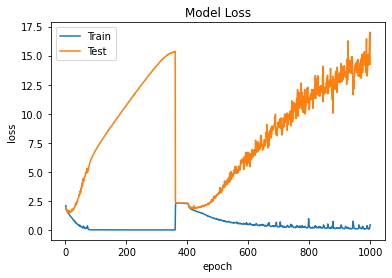

In [54]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_loss.pdf'
)

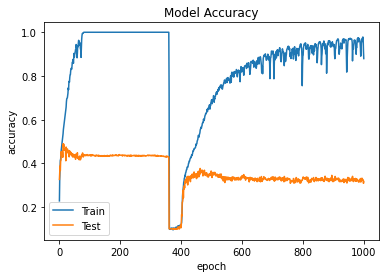

In [55]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_accuracy.pdf'
)

### Part A: Object Recognition Question 3c) Learning Rate 1e-5

In [56]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 1e-5

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_32 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 300)             

In [57]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3c_1e-5.h5')

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.2845 - accuracy: 0.1463 - val_loss: 2.2578 - val_accuracy: 0.2155
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2337 - accuracy: 0.2293 - val_loss: 2.2026 - val_accuracy: 0.2485
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1703 - accuracy: 0.2582 - val_loss: 2.1287 - val_accuracy: 0.2725
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0978 - accuracy: 0.2687 - val_loss: 2.0604 - val_accuracy: 0.3040
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0423 - accuracy: 0.2915 - val_loss: 2.0132 - val_accuracy: 0.3015
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.0046 - accuracy: 0.2950 - val_loss: 1.9804 - val_accuracy: 0.3160
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9768 - accuracy: 0.3050 - val_loss: 1.9574 - val_accuracy: 0.3150
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 1.4543 - accuracy: 0.4959 - val_loss: 1.5191 - val_accuracy: 0.4845
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4521 - accuracy: 0.4986 - val_loss: 1.5282 - val_accuracy: 0.4780
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4544 - accuracy: 0.4943 - val_loss: 1.5252 - val_accuracy: 0.4715
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4489 - accuracy: 0.4976 - val_loss: 1.5221 - val_accuracy: 0.4755
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4447 - accuracy: 0.5002 - val_loss: 1.5139 - val_accuracy: 0.4845
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4420 - accuracy: 0.4977 - val_loss: 1.5128 - val_accuracy: 0.4875
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4404 - accuracy: 0.5039 - val_loss: 1.5124 - val_accuracy: 0.4760
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3551 - accuracy: 0.5367 - val_loss: 1.4618 - val_accuracy: 0.4985
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3528 - accuracy: 0.5340 - val_loss: 1.4567 - val_accuracy: 0.5070
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3510 - accuracy: 0.5364 - val_loss: 1.4535 - val_accuracy: 0.5090
Epoch 175/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3497 - accuracy: 0.5353 - val_loss: 1.4548 - val_accuracy: 0.5065
Epoch 176/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3513 - accuracy: 0.5394 - val_loss: 1.4609 - val_accuracy: 0.5040
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3483 - accuracy: 0.5342 - val_loss: 1.4561 - val_accuracy: 0.4960
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3500 - accuracy: 0.5364 - val_loss: 1.4584 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2808 - accuracy: 0.5620 - val_loss: 1.4201 - val_accuracy: 0.5195
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2780 - accuracy: 0.5626 - val_loss: 1.4220 - val_accuracy: 0.5065
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2790 - accuracy: 0.5653 - val_loss: 1.4131 - val_accuracy: 0.5195
Epoch 232/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2769 - accuracy: 0.5608 - val_loss: 1.4285 - val_accuracy: 0.5050
Epoch 233/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2730 - accuracy: 0.5656 - val_loss: 1.4140 - val_accuracy: 0.5135
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2741 - accuracy: 0.5604 - val_loss: 1.4159 - val_accuracy: 0.5205
Epoch 235/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2748 - accuracy: 0.5648 - val_loss: 1.4157 - val_accuracy:

Epoch 342/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1575 - accuracy: 0.6061 - val_loss: 1.3757 - val_accuracy: 0.5305
Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1564 - accuracy: 0.6065 - val_loss: 1.3698 - val_accuracy: 0.5240
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1588 - accuracy: 0.6034 - val_loss: 1.3792 - val_accuracy: 0.5265
Epoch 345/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1577 - accuracy: 0.6045 - val_loss: 1.3854 - val_accuracy: 0.5260
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1511 - accuracy: 0.6078 - val_loss: 1.3752 - val_accuracy: 0.5270
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1551 - accuracy: 0.6060 - val_loss: 1.3687 - val_accuracy: 0.5320
Epoch 348/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1556 - accuracy: 0.6046 - val_loss: 1.3750 - val_accuracy:

Epoch 399/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1044 - accuracy: 0.6225 - val_loss: 1.3629 - val_accuracy: 0.5315
Epoch 400/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1065 - accuracy: 0.6228 - val_loss: 1.3684 - val_accuracy: 0.5330
Epoch 401/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1017 - accuracy: 0.6234 - val_loss: 1.3573 - val_accuracy: 0.5350
Epoch 402/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1041 - accuracy: 0.6234 - val_loss: 1.3594 - val_accuracy: 0.5230
Epoch 403/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0982 - accuracy: 0.6276 - val_loss: 1.3621 - val_accuracy: 0.5230
Epoch 404/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0976 - accuracy: 0.6264 - val_loss: 1.3690 - val_accuracy: 0.5255
Epoch 405/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1020 - accuracy: 0.6236 - val_loss: 1.3615 - val_accuracy:

Epoch 456/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0535 - accuracy: 0.6405 - val_loss: 1.3660 - val_accuracy: 0.5260
Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0538 - accuracy: 0.6429 - val_loss: 1.3443 - val_accuracy: 0.5460
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0494 - accuracy: 0.6428 - val_loss: 1.3560 - val_accuracy: 0.5340
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0514 - accuracy: 0.6416 - val_loss: 1.3555 - val_accuracy: 0.5300
Epoch 460/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0461 - accuracy: 0.6424 - val_loss: 1.3549 - val_accuracy: 0.5325
Epoch 461/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0462 - accuracy: 0.6443 - val_loss: 1.3535 - val_accuracy: 0.5360
Epoch 462/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0474 - accuracy: 0.6455 - val_loss: 1.3652 - val_accuracy:

Epoch 513/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0014 - accuracy: 0.6613 - val_loss: 1.3456 - val_accuracy: 0.5380
Epoch 514/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0004 - accuracy: 0.6615 - val_loss: 1.3399 - val_accuracy: 0.5425
Epoch 515/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9992 - accuracy: 0.6607 - val_loss: 1.3454 - val_accuracy: 0.5330
Epoch 516/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9957 - accuracy: 0.6641 - val_loss: 1.3441 - val_accuracy: 0.5330
Epoch 517/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9954 - accuracy: 0.6657 - val_loss: 1.3762 - val_accuracy: 0.5145
Epoch 518/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9994 - accuracy: 0.6654 - val_loss: 1.3434 - val_accuracy: 0.5375
Epoch 519/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9965 - accuracy: 0.6627 - val_loss: 1.3473 - val_accuracy:

Epoch 570/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9474 - accuracy: 0.6851 - val_loss: 1.3478 - val_accuracy: 0.5370
Epoch 571/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9487 - accuracy: 0.6835 - val_loss: 1.3518 - val_accuracy: 0.5295
Epoch 572/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9478 - accuracy: 0.6831 - val_loss: 1.3620 - val_accuracy: 0.5235
Epoch 573/1000
79/79 [==============================] - 1s 8ms/step - loss: 0.9518 - accuracy: 0.6800 - val_loss: 1.3724 - val_accuracy: 0.5190
Epoch 574/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9553 - accuracy: 0.6797 - val_loss: 1.3466 - val_accuracy: 0.5360
Epoch 575/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9452 - accuracy: 0.6868 - val_loss: 1.3513 - val_accuracy: 0.5310
Epoch 576/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9438 - accuracy: 0.6872 - val_loss: 1.3539 - val_accuracy:

Epoch 627/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8985 - accuracy: 0.7043 - val_loss: 1.3456 - val_accuracy: 0.5325
Epoch 628/1000
79/79 [==============================] - ETA: 0s - loss: 0.8978 - accuracy: 0.70 - 1s 7ms/step - loss: 0.9002 - accuracy: 0.6994 - val_loss: 1.3525 - val_accuracy: 0.5335
Epoch 629/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8972 - accuracy: 0.7069 - val_loss: 1.3548 - val_accuracy: 0.5265
Epoch 630/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8939 - accuracy: 0.7052 - val_loss: 1.3516 - val_accuracy: 0.5305
Epoch 631/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8960 - accuracy: 0.7030 - val_loss: 1.3372 - val_accuracy: 0.5420
Epoch 632/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8947 - accuracy: 0.7044 - val_loss: 1.3649 - val_accuracy: 0.5250
Epoch 633/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8940 - accuracy:

Epoch 740/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8034 - accuracy: 0.7433 - val_loss: 1.3530 - val_accuracy: 0.5385
Epoch 741/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8068 - accuracy: 0.7386 - val_loss: 1.4132 - val_accuracy: 0.5180
Epoch 742/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8062 - accuracy: 0.7436 - val_loss: 1.3534 - val_accuracy: 0.5380
Epoch 743/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8006 - accuracy: 0.7456 - val_loss: 1.3733 - val_accuracy: 0.5270
Epoch 744/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7995 - accuracy: 0.7440 - val_loss: 1.3769 - val_accuracy: 0.5180
Epoch 745/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8038 - accuracy: 0.7405 - val_loss: 1.3596 - val_accuracy: 0.5310
Epoch 746/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7983 - accuracy: 0.7443 - val_loss: 1.3617 - val_accuracy:

Epoch 797/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7593 - accuracy: 0.7607 - val_loss: 1.4108 - val_accuracy: 0.5205
Epoch 798/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7542 - accuracy: 0.7658 - val_loss: 1.3757 - val_accuracy: 0.5335
Epoch 799/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7568 - accuracy: 0.7598 - val_loss: 1.3598 - val_accuracy: 0.5385
Epoch 800/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7530 - accuracy: 0.7644 - val_loss: 1.3888 - val_accuracy: 0.5250
Epoch 801/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7608 - accuracy: 0.7586 - val_loss: 1.3840 - val_accuracy: 0.5300
Epoch 802/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7481 - accuracy: 0.7663 - val_loss: 1.3677 - val_accuracy: 0.5335
Epoch 803/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7488 - accuracy: 0.7674 - val_loss: 1.3761 - val_accuracy:

Epoch 854/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7108 - accuracy: 0.7813 - val_loss: 1.4274 - val_accuracy: 0.5150
Epoch 855/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7082 - accuracy: 0.7811 - val_loss: 1.3930 - val_accuracy: 0.5360
Epoch 856/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7136 - accuracy: 0.7788 - val_loss: 1.3780 - val_accuracy: 0.5340
Epoch 857/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7040 - accuracy: 0.7836 - val_loss: 1.3947 - val_accuracy: 0.5295
Epoch 858/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7001 - accuracy: 0.7860 - val_loss: 1.3764 - val_accuracy: 0.5340
Epoch 859/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7006 - accuracy: 0.7854 - val_loss: 1.4001 - val_accuracy: 0.5240
Epoch 860/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.7023 - accuracy: 0.7847 - val_loss: 1.3781 - val_accuracy:

Epoch 911/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6611 - accuracy: 0.8002 - val_loss: 1.3889 - val_accuracy: 0.5360
Epoch 912/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6564 - accuracy: 0.8015 - val_loss: 1.4434 - val_accuracy: 0.5175
Epoch 913/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6621 - accuracy: 0.8005 - val_loss: 1.3975 - val_accuracy: 0.5395
Epoch 914/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6533 - accuracy: 0.8046 - val_loss: 1.3983 - val_accuracy: 0.5335
Epoch 915/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6581 - accuracy: 0.8024 - val_loss: 1.3987 - val_accuracy: 0.5295
Epoch 916/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6546 - accuracy: 0.8006 - val_loss: 1.4153 - val_accuracy: 0.5160
Epoch 917/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6555 - accuracy: 0.8019 - val_loss: 1.3909 - val_accuracy:

Epoch 968/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6149 - accuracy: 0.8201 - val_loss: 1.4157 - val_accuracy: 0.5260
Epoch 969/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6194 - accuracy: 0.8149 - val_loss: 1.4255 - val_accuracy: 0.5275
Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6144 - accuracy: 0.8171 - val_loss: 1.4116 - val_accuracy: 0.5380
Epoch 971/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6120 - accuracy: 0.8212 - val_loss: 1.4461 - val_accuracy: 0.5215
Epoch 972/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6144 - accuracy: 0.8177 - val_loss: 1.4254 - val_accuracy: 0.5245
Epoch 973/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6117 - accuracy: 0.8193 - val_loss: 1.4123 - val_accuracy: 0.5260
Epoch 974/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.6089 - accuracy: 0.8177 - val_loss: 1.4197 - val_accuracy:

In [58]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 52.90499925613403%


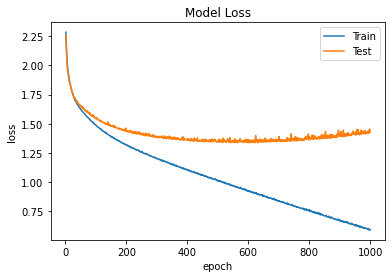

In [62]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_loss_1e-5pdf'
)

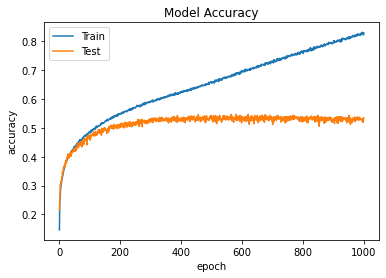

In [63]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3c_accuracy_1e-5.pdf'
)

## Part A: Object Recognition Question 3d)

In [64]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 = 90  
num_ch_c2 = 100  

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))
          
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_33 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 300)             

In [65]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

model.save('models/qn_3d.h5')

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.3147 - accuracy: 0.1037 - val_loss: 2.2919 - val_accuracy: 0.1170
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2944 - accuracy: 0.1190 - val_loss: 2.2821 - val_accuracy: 0.1730
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2848 - accuracy: 0.1320 - val_loss: 2.2738 - val_accuracy: 0.2120
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2771 - accuracy: 0.1480 - val_loss: 2.2671 - val_accuracy: 0.2230
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2720 - accuracy: 0.1565 - val_loss: 2.2600 - val_accuracy: 0.2355
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2620 - accuracy: 0.1687 - val_loss: 2.2526 - val_accuracy: 0.2450
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2528 - accuracy: 0.1873 - val_loss: 2.2444 - val_accuracy: 0.2515
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 1.7437 - accuracy: 0.3773 - val_loss: 1.7329 - val_accuracy: 0.3865
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7427 - accuracy: 0.3817 - val_loss: 1.7562 - val_accuracy: 0.3855
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7389 - accuracy: 0.3798 - val_loss: 1.7458 - val_accuracy: 0.3835
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7405 - accuracy: 0.3819 - val_loss: 1.7355 - val_accuracy: 0.3880
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7329 - accuracy: 0.3822 - val_loss: 1.7238 - val_accuracy: 0.3955
Epoch 120/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7311 - accuracy: 0.3876 - val_loss: 1.7283 - val_accuracy: 0.3935
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.7329 - accuracy: 0.3831 - val_loss: 1.7185 - val_accuracy: 0.4040
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6445 - accuracy: 0.4129 - val_loss: 1.6557 - val_accuracy: 0.4225
Epoch 173/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6454 - accuracy: 0.4161 - val_loss: 1.6692 - val_accuracy: 0.4130
Epoch 174/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6450 - accuracy: 0.4117 - val_loss: 1.6375 - val_accuracy: 0.4285
Epoch 175/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6387 - accuracy: 0.4229 - val_loss: 1.7425 - val_accuracy: 0.3840
Epoch 176/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6386 - accuracy: 0.4134 - val_loss: 1.6456 - val_accuracy: 0.4315
Epoch 177/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6364 - accuracy: 0.4155 - val_loss: 1.6649 - val_accuracy: 0.4045
Epoch 178/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.6402 - accuracy: 0.4224 - val_loss: 1.6664 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5621 - accuracy: 0.4485 - val_loss: 1.9312 - val_accuracy: 0.3640
Epoch 230/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5626 - accuracy: 0.4445 - val_loss: 1.5787 - val_accuracy: 0.4540
Epoch 231/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5529 - accuracy: 0.4518 - val_loss: 1.6024 - val_accuracy: 0.4405
Epoch 232/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5622 - accuracy: 0.4433 - val_loss: 1.5738 - val_accuracy: 0.4490
Epoch 233/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5568 - accuracy: 0.4497 - val_loss: 1.7479 - val_accuracy: 0.3975
Epoch 234/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5548 - accuracy: 0.4566 - val_loss: 1.6842 - val_accuracy: 0.4220
Epoch 235/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.5544 - accuracy: 0.4486 - val_loss: 1.7098 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4918 - accuracy: 0.4735 - val_loss: 1.5064 - val_accuracy: 0.4900
Epoch 287/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4827 - accuracy: 0.4803 - val_loss: 1.6431 - val_accuracy: 0.4210
Epoch 288/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4880 - accuracy: 0.4737 - val_loss: 1.5415 - val_accuracy: 0.4655
Epoch 289/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4826 - accuracy: 0.4748 - val_loss: 1.5204 - val_accuracy: 0.4715
Epoch 290/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4829 - accuracy: 0.4819 - val_loss: 1.5061 - val_accuracy: 0.4945
Epoch 291/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4792 - accuracy: 0.4768 - val_loss: 1.7548 - val_accuracy: 0.3975
Epoch 292/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4800 - accuracy: 0.4749 - val_loss: 1.5309 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4203 - accuracy: 0.5043 - val_loss: 1.5017 - val_accuracy: 0.4855
Epoch 344/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4200 - accuracy: 0.5006 - val_loss: 1.7119 - val_accuracy: 0.4140
Epoch 345/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4286 - accuracy: 0.4989 - val_loss: 1.4938 - val_accuracy: 0.4970
Epoch 346/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4214 - accuracy: 0.5001 - val_loss: 1.4883 - val_accuracy: 0.4860
Epoch 347/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4163 - accuracy: 0.5062 - val_loss: 1.4819 - val_accuracy: 0.4855
Epoch 348/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4189 - accuracy: 0.5048 - val_loss: 1.5257 - val_accuracy: 0.4695
Epoch 349/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.4209 - accuracy: 0.5011 - val_loss: 1.6167 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3681 - accuracy: 0.5199 - val_loss: 1.4326 - val_accuracy: 0.5060
Epoch 401/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3687 - accuracy: 0.5253 - val_loss: 1.7596 - val_accuracy: 0.3930
Epoch 402/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3623 - accuracy: 0.5192 - val_loss: 1.4721 - val_accuracy: 0.4910
Epoch 403/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3665 - accuracy: 0.5174 - val_loss: 1.4878 - val_accuracy: 0.4830
Epoch 404/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3679 - accuracy: 0.5233 - val_loss: 1.6740 - val_accuracy: 0.4360
Epoch 405/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3568 - accuracy: 0.5258 - val_loss: 1.4490 - val_accuracy: 0.4980
Epoch 406/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3586 - accuracy: 0.5259 - val_loss: 1.5082 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3121 - accuracy: 0.5377 - val_loss: 1.4812 - val_accuracy: 0.4930
Epoch 458/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3117 - accuracy: 0.5462 - val_loss: 1.4832 - val_accuracy: 0.4815
Epoch 459/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3037 - accuracy: 0.5412 - val_loss: 1.4286 - val_accuracy: 0.5095
Epoch 460/1000
79/79 [==============================] - ETA: 0s - loss: 1.3054 - accuracy: 0.54 - 1s 7ms/step - loss: 1.3037 - accuracy: 0.5426 - val_loss: 1.4924 - val_accuracy: 0.4750
Epoch 461/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3134 - accuracy: 0.5428 - val_loss: 1.7498 - val_accuracy: 0.4135
Epoch 462/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3097 - accuracy: 0.5393 - val_loss: 1.4796 - val_accuracy: 0.5000
Epoch 463/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.3019 - accuracy:

Epoch 570/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2094 - accuracy: 0.5759 - val_loss: 1.4121 - val_accuracy: 0.5155
Epoch 571/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2083 - accuracy: 0.5793 - val_loss: 1.3961 - val_accuracy: 0.5165
Epoch 572/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2113 - accuracy: 0.5742 - val_loss: 1.4080 - val_accuracy: 0.5215
Epoch 573/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2093 - accuracy: 0.5771 - val_loss: 1.3780 - val_accuracy: 0.5105
Epoch 574/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2067 - accuracy: 0.5826 - val_loss: 1.4316 - val_accuracy: 0.5050
Epoch 575/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2118 - accuracy: 0.5724 - val_loss: 1.4585 - val_accuracy: 0.4875
Epoch 576/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.2159 - accuracy: 0.5736 - val_loss: 1.5906 - val_accuracy:

Epoch 627/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1551 - accuracy: 0.5937 - val_loss: 1.3675 - val_accuracy: 0.5270
Epoch 628/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1587 - accuracy: 0.5943 - val_loss: 1.3521 - val_accuracy: 0.5240
Epoch 629/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1567 - accuracy: 0.5912 - val_loss: 1.4596 - val_accuracy: 0.4855
Epoch 630/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1588 - accuracy: 0.5966 - val_loss: 1.3845 - val_accuracy: 0.5220
Epoch 631/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1535 - accuracy: 0.5917 - val_loss: 1.3964 - val_accuracy: 0.5085
Epoch 632/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1554 - accuracy: 0.6004 - val_loss: 1.4718 - val_accuracy: 0.4820
Epoch 633/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1586 - accuracy: 0.5956 - val_loss: 1.4039 - val_accuracy:

Epoch 684/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1079 - accuracy: 0.6159 - val_loss: 1.5080 - val_accuracy: 0.4750
Epoch 685/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1102 - accuracy: 0.6131 - val_loss: 1.4753 - val_accuracy: 0.4875
Epoch 686/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1067 - accuracy: 0.6157 - val_loss: 1.4466 - val_accuracy: 0.4960
Epoch 687/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1042 - accuracy: 0.6174 - val_loss: 1.4195 - val_accuracy: 0.5115
Epoch 688/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1123 - accuracy: 0.6103 - val_loss: 1.5059 - val_accuracy: 0.4845
Epoch 689/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1069 - accuracy: 0.6145 - val_loss: 1.8174 - val_accuracy: 0.4055
Epoch 690/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.1060 - accuracy: 0.6112 - val_loss: 1.4755 - val_accuracy:

Epoch 741/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0638 - accuracy: 0.6308 - val_loss: 1.3158 - val_accuracy: 0.5350
Epoch 742/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0550 - accuracy: 0.6366 - val_loss: 1.3268 - val_accuracy: 0.5415
Epoch 743/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0553 - accuracy: 0.6324 - val_loss: 1.4131 - val_accuracy: 0.5220
Epoch 744/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0549 - accuracy: 0.6291 - val_loss: 1.4825 - val_accuracy: 0.4865
Epoch 745/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0512 - accuracy: 0.6341 - val_loss: 1.3576 - val_accuracy: 0.5390
Epoch 746/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0518 - accuracy: 0.6317 - val_loss: 1.3717 - val_accuracy: 0.5265
Epoch 747/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0555 - accuracy: 0.6326 - val_loss: 1.7481 - val_accuracy:

Epoch 798/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0074 - accuracy: 0.6518 - val_loss: 1.3457 - val_accuracy: 0.5190
Epoch 799/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9967 - accuracy: 0.6555 - val_loss: 1.3316 - val_accuracy: 0.5385
Epoch 800/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0018 - accuracy: 0.6493 - val_loss: 1.3436 - val_accuracy: 0.5425
Epoch 801/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0000 - accuracy: 0.6546 - val_loss: 1.3176 - val_accuracy: 0.5435
Epoch 802/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.0039 - accuracy: 0.6515 - val_loss: 1.3446 - val_accuracy: 0.5420
Epoch 803/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9955 - accuracy: 0.6576 - val_loss: 1.4035 - val_accuracy: 0.5290
Epoch 804/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9973 - accuracy: 0.6488 - val_loss: 1.3023 - val_accuracy:

Epoch 855/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9466 - accuracy: 0.6727 - val_loss: 1.3547 - val_accuracy: 0.5410
Epoch 856/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9479 - accuracy: 0.6758 - val_loss: 1.5653 - val_accuracy: 0.4780
Epoch 857/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9428 - accuracy: 0.6736 - val_loss: 1.4103 - val_accuracy: 0.5075
Epoch 858/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9445 - accuracy: 0.6778 - val_loss: 1.3102 - val_accuracy: 0.5435
Epoch 859/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9418 - accuracy: 0.6741 - val_loss: 1.4625 - val_accuracy: 0.5020
Epoch 860/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9439 - accuracy: 0.6735 - val_loss: 1.5147 - val_accuracy: 0.5060
Epoch 861/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9402 - accuracy: 0.6763 - val_loss: 1.4112 - val_accuracy:

Epoch 912/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8971 - accuracy: 0.6887 - val_loss: 1.3202 - val_accuracy: 0.5425
Epoch 913/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8926 - accuracy: 0.6938 - val_loss: 1.3759 - val_accuracy: 0.5270
Epoch 914/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8870 - accuracy: 0.6949 - val_loss: 1.4994 - val_accuracy: 0.4930
Epoch 915/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8910 - accuracy: 0.6952 - val_loss: 1.6672 - val_accuracy: 0.4680
Epoch 916/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.9004 - accuracy: 0.6913 - val_loss: 1.3996 - val_accuracy: 0.5150
Epoch 917/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8903 - accuracy: 0.6960 - val_loss: 1.4210 - val_accuracy: 0.5075
Epoch 918/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8887 - accuracy: 0.6923 - val_loss: 1.4231 - val_accuracy:

Epoch 969/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8386 - accuracy: 0.7169 - val_loss: 1.6029 - val_accuracy: 0.4700
Epoch 970/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8365 - accuracy: 0.7214 - val_loss: 1.4938 - val_accuracy: 0.4890
Epoch 971/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8325 - accuracy: 0.7181 - val_loss: 1.3679 - val_accuracy: 0.5365
Epoch 972/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8351 - accuracy: 0.7157 - val_loss: 1.4282 - val_accuracy: 0.5140
Epoch 973/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8352 - accuracy: 0.7121 - val_loss: 1.4847 - val_accuracy: 0.5040
Epoch 974/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8362 - accuracy: 0.7171 - val_loss: 1.3980 - val_accuracy: 0.5280
Epoch 975/1000
79/79 [==============================] - 1s 7ms/step - loss: 0.8315 - accuracy: 0.7138 - val_loss: 1.5107 - val_accuracy:

In [66]:
mean_acc = np.mean(history.history['val_accuracy'][-10:])
print("mean accuracy for last 10 epochs: " + str(mean_acc*100) +"%")

mean accuracy for last 10 epochs: 52.11500018835068%


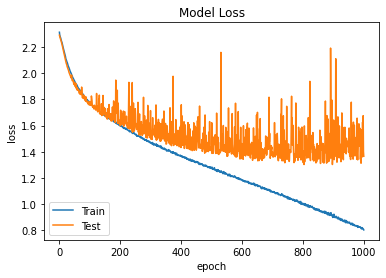

In [67]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3d_loss.pdf'
)

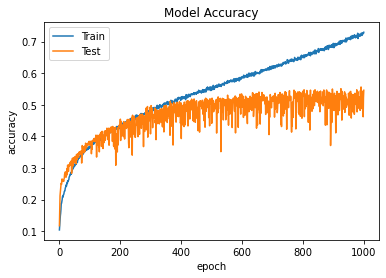

In [68]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.savefig(
    f'./results/{num_ch_c1}_{num_ch_c2}_SGD_3d_accuracy.pdf'
)